In [1]:
import sys, pandas_profiling
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from collections import OrderedDict
np.set_printoptions(suppress=True, threshold=sys.maxsize)

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.2f}'.format


In [3]:
dataset_hourly = pd.read_csv('dataset.csv')
dataset_hourly.shape

(127470, 7)

In [4]:
dataset_hourly['Formatted_Date'] = pd.to_datetime(dataset_hourly.Date + " " + dataset_hourly.Clock_Time)
dataset_hourly.Formatted_Date = dataset_hourly['Formatted_Date'].dt.round('30min')

dataset_hourly['Year'] = dataset_hourly['Formatted_Date'].dt.year
dataset_hourly['Month'] = dataset_hourly['Formatted_Date'].dt.month
dataset_hourly['Day'] = dataset_hourly['Formatted_Date'].dt.day



In [5]:
dataset_hourly.head(10)

Date Clock_Time Temperature            Weather Wind_Speed Humidity  \
0  09-Sep-09       0:40       30 °C              Haze.    15 km/h      75%   
1  09-Sep-09       1:40       30 °C              Haze.    17 km/h      75%   
2  09-Sep-09      11:40       31 °C  Scattered clouds.    17 km/h      70%   
3  09-Sep-09      13:40       33 °C             Clear.    19 km/h      59%   
4  09-Sep-09      14:40       34 °C             Clear.    17 km/h      56%   
5  09-Sep-09      15:40       35 °C             Clear.    19 km/h      53%   
6  09-Sep-09      16:40       35 °C    Passing clouds.    17 km/h      56%   
7  10-Sep-09       1:40       29 °C             Smoke.    15 km/h      66%   
8  10-Sep-09       2:40       28 °C             Smoke.    11 km/h      74%   
9  10-Sep-09       3:40       27 °C              Haze.     9 km/h      79%   

  Visibility      Formatted_Date  Year  Month  Day  
0       4 km 2009-09-09 00:30:00  2009      9    9  
1       4 km 2009-09-09 01:30:00  2009      9    9  
2       6 km 2009-09-09 11:30:00  2009      9    9  
3       6 km 2009-09-09 13:30:00  2009      9    9  
4       6 km 2009-09-09 14:30:00  2009      9    9  
5       6 km 2009-09-09 15:30:00  2009      9    9  
6       6 km 2009-09-09 16:30:00  2009      9    9  
7       4 km 2009-09-10 01:30:00  2009      9   10  
8       4 km 2009-09-10 02:30:00  2009      9   10  
9       4 km 2009-09-10 03:30:00  2009      9   10

In [6]:
dataset_hourly.describe(include='all')

Date Clock_Time Temperature Weather Wind_Speed Humidity  \
count      127470     127470      126783  126865     127188   126665   
unique       3772        144          46      96         28       89   
top     28-Jun-17      16:40       29 °C  Clear.    No wind      79%   
freq           49       2008        9632   48690      21950     4567   
first         NaN        NaN         NaN     NaN        NaN      NaN   
last          NaN        NaN         NaN     NaN        NaN      NaN   
mean          NaN        NaN         NaN     NaN        NaN      NaN   
std           NaN        NaN         NaN     NaN        NaN      NaN   
min           NaN        NaN         NaN     NaN        NaN      NaN   
25%           NaN        NaN         NaN     NaN        NaN      NaN   
50%           NaN        NaN         NaN     NaN        NaN      NaN   
75%           NaN        NaN         NaN     NaN        NaN      NaN   
max           NaN        NaN         NaN     NaN        NaN      NaN   

       Visibility       Formatted_Date      Year     Month       Day  
count      126824               127470 127470.00 127470.00 127470.00  
unique         13               127437       nan       nan       nan  
top          4 km  2016-07-27 21:30:00       nan       nan       nan  
freq        62546                    2       nan       nan       nan  
first         NaN  2009-09-09 00:30:00       nan       nan       nan  
last          NaN  2020-01-24 05:00:00       nan       nan       nan  
mean          NaN                  NaN   2014.95      6.59     15.82  
std           NaN                  NaN      3.04      3.57      8.82  
min           NaN                  NaN   2009.00      1.00      1.00  
25%           NaN                  NaN   2012.00      3.00      8.00  
50%           NaN                  NaN   2016.00      7.00     16.00  
75%           NaN                  NaN   2018.00     10.00     23.00  
max           NaN                  NaN   2020.00     12.00     31.00

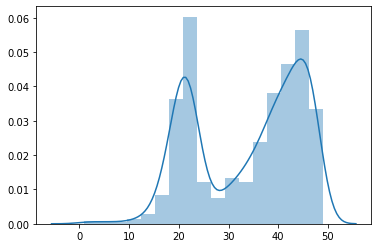

In [7]:
sns.distplot(dataset_hourly.groupby('Date').size())

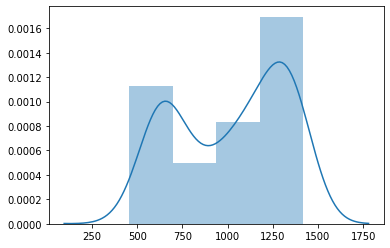

In [8]:
sns.distplot(dataset_hourly.groupby(['Year', 'Month']).size())

### `Temperatue`

In [9]:
dataset_hourly['Temperature'] = dataset_hourly.Temperature.str.rstrip('°C').astype('float64')

In [10]:
dataset_hourly.Temperature.value_counts()

29.00    9632
27.00    9458
28.00    8734
30.00    8228
31.00    8129
26.00    6690
32.00    6429
33.00    6109
25.00    5256
34.00    4271
23.00    3894
35.00    3848
24.00    3710
21.00    3531
19.00    3303
22.00    3260
20.00    3201
36.00    2960
18.00    2893
17.00    2750
37.00    2726
16.00    2185
38.00    2090
15.00    1992
39.00    1871
14.00    1422
40.00    1366
41.00    1232
13.00    1164
42.00    1047
43.00     820
12.00     762
11.00     488
44.00     434
45.00     336
10.00     245
46.00     100
9.00       94
47.00      41
8.00       32
0.00       14
48.00       9
60.00       8
50.00       8
49.00       6
7.00        5
Name: Temperature, dtype: int64

### `Weather`

#### Filling `nan` in Weather with the most frequent of the day!

In [11]:
dataset_hourly.Weather.isna().sum()

605

In [12]:
dataset_hourly['Weather'] = (dataset_hourly.groupby(['Date'])['Weather']
             .apply(lambda x: x.fillna(x.mode()[0])))
dataset_hourly.Weather.isna().sum()

0

In [13]:
dataset_hourly.groupby(['Date'])['Weather'].apply(lambda x: x.fillna(x.mode()[0]))

0                     Haze.
1                     Haze.
2         Scattered clouds.
3                    Clear.
4                    Clear.
                ...        
127465                Haze.
127466                Haze.
127467                Haze.
127468                Haze.
127469                Haze.
Name: Weather, Length: 127470, dtype: object

In [14]:
dataset_hourly['Weather_Category'] = np.nan
dataset_hourly.Weather_Category.value_counts(dropna=False)

nan    127470
Name: Weather_Category, dtype: int64

In [15]:
dataset_hourly.loc[dataset_hourly.Weather.str.contains('cloud|rain|thunder|overcast|storm|drizzle', case=False), 
                   'Weather_Category'] = 'Cloudy'
dataset_hourly.loc[dataset_hourly.Weather.str.contains('sunny|clear|hot|warm', case=False), 
                   'Weather_Category'] = 'Clear'
dataset_hourly.loc[dataset_hourly.Weather.str.contains('haze|smoke|fog|cool|mild|chilly', case=False), 
                   'Weather_Category'] = 'Foggy'

In [16]:
dataset_hourly.Weather_Category.value_counts(dropna=False)

Clear     51063
Cloudy    40583
Foggy     35824
Name: Weather_Category, dtype: int64

### `Wind_Speed`

In [17]:
dataset_hourly.loc[(dataset_hourly.Wind_Speed == 'No wind'), 
                   'Wind_Speed'] = '0 km/h'

In [18]:
dataset_hourly['Wind_Speed'] = dataset_hourly.Wind_Speed.str.rstrip(' km/h').astype('float64')

### `Humidity`

In [19]:
dataset_hourly.Humidity = dataset_hourly.Humidity.str.rstrip('%').astype('float64') * 0.01

In [20]:
dataset_hourly.Humidity.value_counts(bins=20, normalize=True)

(0.65, 0.7]      0.09
(0.55, 0.6]      0.08
(0.6, 0.65]      0.07
(0.45, 0.5]      0.07
(0.5, 0.55]      0.07
(0.7, 0.75]      0.07
(0.3, 0.35]      0.06
(0.4, 0.45]      0.06
(0.35, 0.4]      0.06
(0.25, 0.3]      0.06
(0.75, 0.8]      0.06
(0.2, 0.25]      0.05
(0.8, 0.85]      0.05
(0.85, 0.9]      0.04
(0.15, 0.2]      0.04
(0.9, 0.95]      0.03
(0.1, 0.15]      0.02
(0.95, 1.0]      0.01
(0.05, 0.1]      0.01
(-0.002, 0.05]   0.00
Name: Humidity, dtype: float64

### `Visibility`

In [21]:
dataset_hourly.Visibility = dataset_hourly.Visibility.str.rstrip(' km').astype('float64')

In [22]:
dataset_hourly.Visibility.isna().sum()

646

In [23]:
dataset_hourly.Visibility = dataset_hourly.Visibility.fillna(
    dataset_hourly.Visibility.median())
dataset_hourly.Visibility.isna().sum()

0

In [25]:
dataset_hourly.dtypes

Date                        object
Clock_Time                  object
Temperature                float64
Weather                     object
Wind_Speed                 float64
Humidity                   float64
Visibility                 float64
Formatted_Date      datetime64[ns]
Year                         int64
Month                        int64
Day                          int64
Weather_Category            object
dtype: object

In [26]:
dataset_hourly.describe(include='all')

Date Clock_Time  Temperature Weather  Wind_Speed  Humidity  \
count      127470     127470    126783.00  127470   127188.00 126665.00   
unique       3772        144          nan      96         nan       nan   
top     28-Jun-17      16:40          nan  Clear.         nan       nan   
freq           49       2008          nan   49073         nan       nan   
first         NaN        NaN          nan     NaN         nan       nan   
last          NaN        NaN          nan     NaN         nan       nan   
mean          NaN        NaN        27.81     NaN        8.56      0.54   
std           NaN        NaN         6.83     NaN        5.94      0.22   
min           NaN        NaN         0.00     NaN        0.00      0.00   
25%           NaN        NaN        24.00     NaN        6.00      0.36   
50%           NaN        NaN        28.00     NaN        7.00      0.55   
75%           NaN        NaN        32.00     NaN       11.00      0.71   
max           NaN        NaN        60.00     NaN      180.00      1.00   

        Visibility       Formatted_Date      Year     Month       Day  \
count    127470.00               127470 127470.00 127470.00 127470.00   
unique         nan               127437       nan       nan       nan   
top            nan  2016-07-27 21:30:00       nan       nan       nan   
freq           nan                    2       nan       nan       nan   
first          nan  2009-09-09 00:30:00       nan       nan       nan   
last           nan  2020-01-24 05:00:00       nan       nan       nan   
mean          4.17                  NaN   2014.95      6.59     15.82   
std           1.21                  NaN      3.04      3.57      8.82   
min           0.00                  NaN   2009.00      1.00      1.00   
25%           4.00                  NaN   2012.00      3.00      8.00   
50%           4.00                  NaN   2016.00      7.00     16.00   
75%           5.00                  NaN   2018.00     10.00     23.00   
max          35.00                  NaN   2020.00     12.00     31.00   

       Weather_Category  
count            127470  
unique                3  
top               Clear  
freq              51063  
first               NaN  
last                NaN  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [27]:
dataset_hourly

Date Clock_Time  Temperature            Weather  Wind_Speed  \
0       09-Sep-09       0:40        30.00              Haze.       15.00   
1       09-Sep-09       1:40        30.00              Haze.       17.00   
2       09-Sep-09      11:40        31.00  Scattered clouds.       17.00   
3       09-Sep-09      13:40        33.00             Clear.       19.00   
4       09-Sep-09      14:40        34.00             Clear.       17.00   
...           ...        ...          ...                ...         ...   
127465  24-Jan-20       3:00        16.00              Haze.       11.00   
127466  24-Jan-20       3:30        16.00              Haze.        9.00   
127467  24-Jan-20       4:00        15.00              Haze.       13.00   
127468  24-Jan-20       4:30        15.00              Haze.       11.00   
127469  24-Jan-20       5:00        13.00              Haze.        9.00   

        Humidity  Visibility      Formatted_Date  Year  Month  Day  \
0           0.75        4.00 2009-09-09 00:30:00  2009      9    9   
1           0.75        4.00 2009-09-09 01:30:00  2009      9    9   
2           0.70        6.00 2009-09-09 11:30:00  2009      9    9   
3           0.59        6.00 2009-09-09 13:30:00  2009      9    9   
4           0.56        6.00 2009-09-09 14:30:00  2009      9    9   
...          ...         ...                 ...   ...    ...  ...   
127465      0.48        4.00 2020-01-24 03:00:00  2020      1   24   
127466      0.48        4.00 2020-01-24 03:30:00  2020      1   24   
127467      0.48        4.00 2020-01-24 04:00:00  2020      1   24   
127468      0.51        4.00 2020-01-24 04:30:00  2020      1   24   
127469      0.59        4.00 2020-01-24 05:00:00  2020      1   24   

       Weather_Category  
0                 Foggy  
1                 Foggy  
2                Cloudy  
3                 Clear  
4                 Clear  
...                 ...  
127465            Foggy  
127466            Foggy  
127467            Foggy  
127468            Foggy  
127469            Foggy  

[127470 rows x 12 columns]

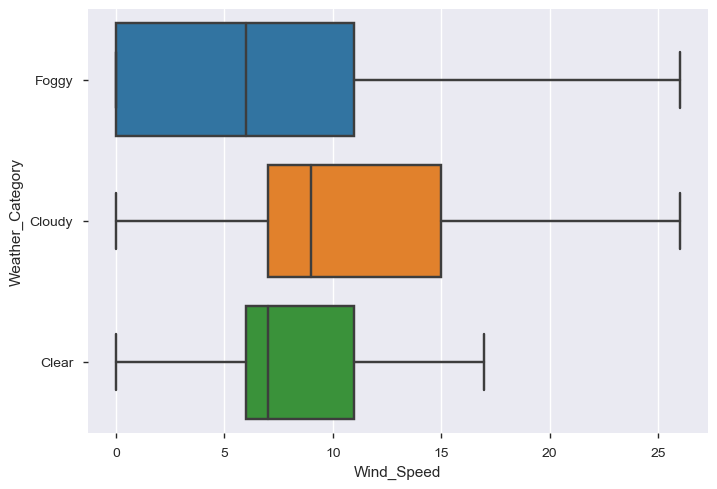

In [28]:
sns.boxplot(data=dataset_hourly,
            x='Wind_Speed', 
            y='Weather_Category',
            showfliers=False)

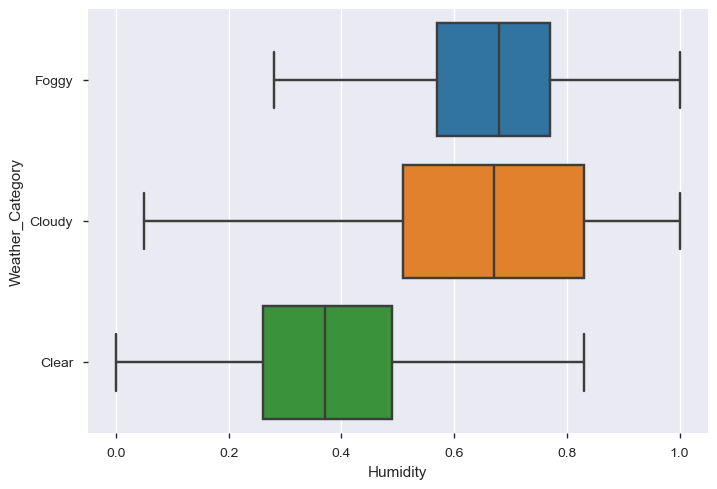

In [29]:
sns.boxplot(data=dataset_hourly,
            x='Humidity', 
            y='Weather_Category',
            showfliers=False)

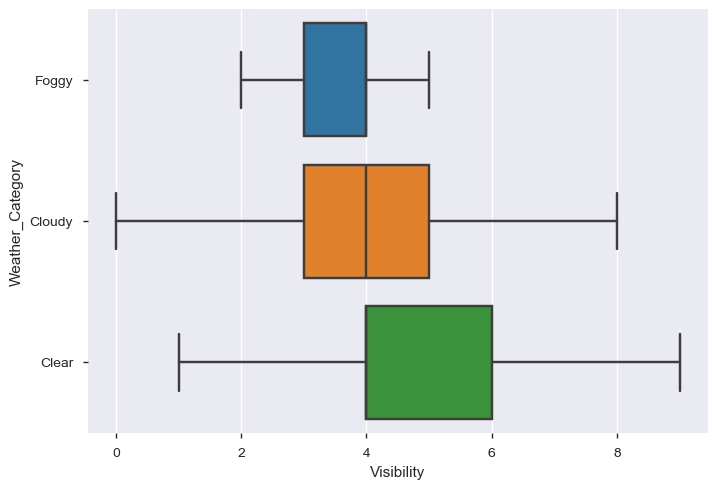

In [30]:
sns.boxplot(data=dataset_hourly,
            x='Visibility', 
            y='Weather_Category',
            showfliers=False)

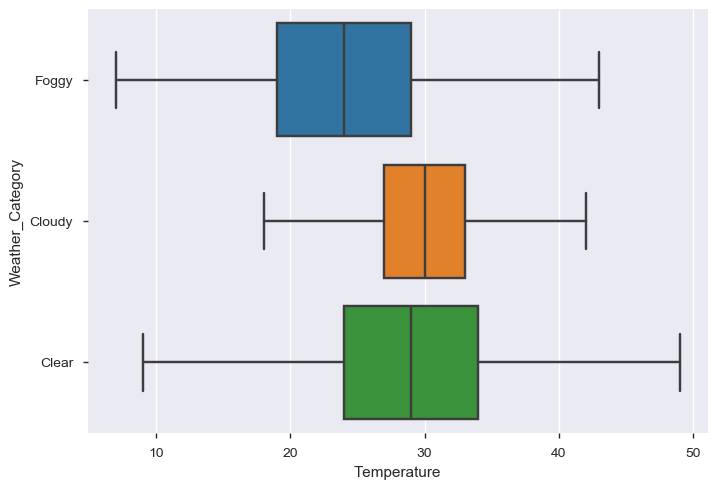

In [31]:
sns.boxplot(data=dataset_hourly,
            x='Temperature', 
            y='Weather_Category',
            showfliers=False)

In [32]:
dataset_hourly.groupby('Year').Clock_Time.value_counts()

Year  Clock_Time
2009  13:40         101
      16:40          99
      1:40           99
      22:40          99
      5:40           99
      15:40          98
      20:40          97
      21:40          95
      19:40          94
      14:40          93
      23:40          93
      3:40           93
      4:40           93
      6:40           93
      8:40           91
      0:40           90
      12:40          89
      17:40          89
      7:40           89
      16:10          86
      2:40           85
      0:10           83
      11:40          83
      22:10          83
      9:40           83
      10:40          81
      13:10          81
      18:40          81
      1:10           80
      2:10           78
      5:10           78
      6:10           78
      14:10          76
      15:10          76
      21:10          76
      17:10          74
      23:10          74
      12:10          73
      8:10           72
      20:10          71
      19:10          70

In [33]:
dataset_hourly.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category'],
      dtype='object')

In [34]:
all_var_names = ['n_3_hour', 'n_6_hour', 'n_9_hour', 'n_12_hour', 'n_1_day', 'n_1_day_mean', 'n_2_day', 
                 'n_2_day_mean', 'n_3_day', 'n_3_day_mean', 'n_1_week', 'n_1_week_mean', 'n_2_week', 
                 'n_2_week_mean', 'n_1_year', 'n_1_year_mean', 'n_2_year', 'n_2_year_mean']

In [35]:
def timeseries_supervised(df):
    """
    
    """
    supervised_df = df.copy()
    c = 0
    
    for index, row in df.iterrows():
        now = row.Formatted_Date 
        print(f"Processing {now}")
        # Calculate n-3, n-6, n-9, n-12 hours data
        n_3_hour = now - pd.Timedelta(value=3, unit='H')
        n_6_hour = now - pd.Timedelta(value=6, unit='H')
        n_9_hour = now - pd.Timedelta(value=9, unit='H')
        n_12_hour = now - pd.Timedelta(value=12, unit='H')

        # Calculate n-1 day's data & mean of (n-1) day's data (3 values)
        n_1_day = now - pd.Timedelta(value=1, unit='D')
        # below might be redundant
        n_1_day_mean = [n_1_day, n_1_day - pd.Timedelta(value=6, unit='H'),
                            n_1_day + pd.Timedelta(value=6, unit='H')]
        # Calculate n-2 day's data & mean of (n-2) day's data (3 values)
        n_2_day = now - pd.Timedelta(value=2, unit='D')
        n_2_day_mean = [n_2_day, n_2_day - pd.Timedelta(value=6, unit='H'),
                            n_2_day + pd.Timedelta(value=6, unit='H')]
        # Calculate n-3 day's data & mean of (n-3) day's data (3 values)
        n_3_day = now - pd.Timedelta(value=3, unit='D')
        n_3_day_mean = [n_3_day, n_3_day - pd.Timedelta(value=6, unit='H'),
                            n_3_day + pd.Timedelta(value=6, unit='H')]

        # Calculate n-1 week's data & mean of (n-1) week's day data (3 values)
        n_1_week = now - pd.Timedelta(value=1, unit='W')
        n_1_week_mean = [n_1_week, n_1_week - pd.Timedelta(value=6, unit='H'),
                            n_1_week + pd.Timedelta(value=6, unit='H')]
        # Calculate n-2 week's data & mean of (n-2) week's day data (3 values)
        n_2_week = now - pd.Timedelta(value=2, unit='W')
        n_2_week_mean = [n_2_week, n_2_week - pd.Timedelta(value=6, unit='H'),
                            n_2_week + pd.Timedelta(value=6, unit='H')]

        # Calculate n-1 year's data & mean of (n-1) year's day data (3 values)
        n_1_year = now - pd.Timedelta(value=1, unit='Y')
        n_1_year_mean = [n_1_year, n_1_year - pd.Timedelta(value=6, unit='H'), 
                            n_1_year + pd.Timedelta(value=6, unit='H')]

        # Calculate n-2 year's data & mean of (n-2) year's day data (3 values)
        n_2_year = now - pd.Timedelta(value=2, unit='Y')
        n_2_year_mean = [n_2_year, n_2_year - pd.Timedelta(value=6, unit='H'), 
                            n_2_year + pd.Timedelta(value=6, unit='H')]
        
        all_vars = [n_3_hour, n_6_hour, n_9_hour, n_12_hour, n_1_day, n_1_day_mean, n_2_day, n_2_day_mean,
                    n_3_day, n_3_day_mean, n_1_week, n_1_week_mean, n_2_week, n_2_week_mean, 
                    n_1_year, n_1_year_mean, n_2_year, n_2_year_mean]

        for i, current_variable in enumerate(all_vars):
            
            if type(current_variable) == list:
                continue
                '''
                current_variable = [var.replace(second=0) for var in current_variable]
                
                try:
                    supervised_df.loc[index, f"WTHR_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date >= current_variable) &
                           (df.Formatted_Date < now)].Weather_Category.mode()[0]
                except (ValueError, KeyError, IndexError):
                    supervised_df.loc[index, f"WTHR_{all_var_names[i]}"] = np.nan
                    
                try:
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date >= current_variable) &
                           (df.Formatted_Date < now)].Wind_Speed.mean()
                except (ValueError, KeyError, IndexError):
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = np.nan
                
                try:
                    supervised_df.loc[index, f"HUM_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date >= current_variable) &
                           (df.Formatted_Date < now)].Humidity.mean()
                except (ValueError, KeyError, IndexError):
                    supervised_df.loc[index, f"HUM_{all_var_names[i]}"] = np.nan
                    
                try:
                    supervised_df.loc[index, f"VIS_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date >= current_variable) &
                           (df.Formatted_Date < now)].Visibility.mean()
                except (ValueError, KeyError, IndexError):
                    supervised_df.loc[index, f"VIS_{all_var_names[i]}"] = np.nan
                ''' 
            
            else:
                current_variable = current_variable.round('30min')
                
                try:
                    supervised_df.loc[index, f"TEMP_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date == current_variable)].Temperature.values[0]
                except (ValueError, KeyError, IndexError) as e:
                    #print(e)
                    supervised_df.loc[index, f"TEMP_{all_var_names[i]}"] = np.nan
                
                try:
                    supervised_df.loc[index, f"WTHR_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date == current_variable)].Weather_Category.values[0]
                except (ValueError, KeyError, IndexError) as e:
                    #print(e)
                    supervised_df.loc[index, f"WTHR_{all_var_names[i]}"] = np.nan
                
                try:
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date == current_variable)].Wind_Speed.values[0]
                except (ValueError, KeyError, IndexError) as e:
                    #print(e)
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = np.nan
                
                try:
                    supervised_df.loc[index, f"HUM_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date == current_variable)].Humidity.values[0]
                except (ValueError, KeyError, IndexError) as e:
                    #print(e)
                    supervised_df.loc[index, f"HUM_{all_var_names[i]}"] = np.nan
                    
                try:
                    supervised_df.loc[index, f"VIS_{all_var_names[i]}"] = \
                        df[(df.Formatted_Date == current_variable)].Visibility.values[0]
                except (ValueError, KeyError, IndexError) as e:
                    #print(e)
                    supervised_df.loc[index, f"VIS_{all_var_names[i]}"] = np.nan
                    
        c += 1
        #if c == 100:
        #   break

    return supervised_df

In [36]:
%%time
supervised_df = timeseries_supervised(df=dataset_hourly.copy())

Processing 2009-09-09 00:30:00


/anaconda3/envs/aliva/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: M and Y units are deprecated and will be removed in a future version.
/anaconda3/envs/aliva/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: M and Y units are deprecated and will be removed in a future version.


Processing 2009-09-09 01:30:00
Processing 2009-09-09 11:30:00
Processing 2009-09-09 13:30:00
Processing 2009-09-09 14:30:00
Processing 2009-09-09 15:30:00
Processing 2009-09-09 16:30:00
Processing 2009-09-10 01:30:00
Processing 2009-09-10 02:30:00
Processing 2009-09-10 03:30:00
Processing 2009-09-10 04:30:00
Processing 2009-09-10 05:30:00
Processing 2009-09-10 06:30:00
Processing 2009-09-10 07:30:00
Processing 2009-09-10 08:30:00
Processing 2009-09-10 09:30:00
Processing 2009-09-10 10:30:00
Processing 2009-09-10 11:30:00
Processing 2009-09-10 12:30:00
Processing 2009-09-10 13:30:00
Processing 2009-09-10 14:30:00
Processing 2009-09-10 15:30:00
Processing 2009-09-10 16:30:00
Processing 2009-09-10 17:30:00
Processing 2009-09-10 18:30:00
Processing 2009-09-10 19:30:00
Processing 2009-09-10 20:30:00
Processing 2009-09-10 21:30:00
Processing 2009-09-10 22:30:00
Processing 2009-09-10 23:30:00
Processing 2009-09-11 01:30:00
Processing 2009-09-11 02:30:00
Processing 2009-09-11 03:30:00
Processi

Processing 2009-09-21 19:30:00
Processing 2009-09-21 20:30:00
Processing 2009-09-21 21:30:00
Processing 2009-09-21 22:30:00
Processing 2009-09-22 00:30:00
Processing 2009-09-22 01:30:00
Processing 2009-09-22 02:30:00
Processing 2009-09-22 04:30:00
Processing 2009-09-22 05:30:00
Processing 2009-09-22 06:30:00
Processing 2009-09-22 07:30:00
Processing 2009-09-22 08:30:00
Processing 2009-09-22 09:30:00
Processing 2009-09-22 10:30:00
Processing 2009-09-22 11:30:00
Processing 2009-09-22 12:30:00
Processing 2009-09-22 13:30:00
Processing 2009-09-22 14:30:00
Processing 2009-09-22 15:30:00
Processing 2009-09-22 16:30:00
Processing 2009-09-22 17:30:00
Processing 2009-09-22 18:30:00
Processing 2009-09-22 20:30:00
Processing 2009-09-22 21:30:00
Processing 2009-09-22 22:30:00
Processing 2009-09-22 23:30:00
Processing 2009-09-23 00:30:00
Processing 2009-09-23 01:30:00
Processing 2009-09-23 02:30:00
Processing 2009-09-23 03:30:00
Processing 2009-09-23 04:30:00
Processing 2009-09-23 05:30:00
Processi

Processing 2009-09-29 13:00:00
Processing 2009-09-29 13:30:00
Processing 2009-09-29 14:00:00
Processing 2009-09-29 14:30:00
Processing 2009-09-29 15:00:00
Processing 2009-09-29 15:30:00
Processing 2009-09-29 16:00:00
Processing 2009-09-29 16:30:00
Processing 2009-09-29 17:00:00
Processing 2009-09-29 17:30:00
Processing 2009-09-29 18:30:00
Processing 2009-09-29 19:00:00
Processing 2009-09-29 19:30:00
Processing 2009-09-29 20:00:00
Processing 2009-09-29 20:30:00
Processing 2009-09-29 21:00:00
Processing 2009-09-29 21:30:00
Processing 2009-09-29 22:30:00
Processing 2009-09-29 23:30:00
Processing 2009-09-30 00:00:00
Processing 2009-09-30 00:30:00
Processing 2009-09-30 01:00:00
Processing 2009-09-30 01:30:00
Processing 2009-09-30 02:00:00
Processing 2009-09-30 02:30:00
Processing 2009-09-30 03:00:00
Processing 2009-09-30 03:30:00
Processing 2009-09-30 04:00:00
Processing 2009-09-30 04:30:00
Processing 2009-09-30 05:00:00
Processing 2009-09-30 05:30:00
Processing 2009-09-30 06:00:00
Processi

Processing 2009-10-09 08:30:00
Processing 2009-10-09 09:00:00
Processing 2009-10-09 09:30:00
Processing 2009-10-09 10:00:00
Processing 2009-10-09 11:00:00
Processing 2009-10-09 11:30:00
Processing 2009-10-09 12:00:00
Processing 2009-10-09 12:30:00
Processing 2009-10-09 13:00:00
Processing 2009-10-09 13:30:00
Processing 2009-10-09 14:00:00
Processing 2009-10-09 14:30:00
Processing 2009-10-09 15:00:00
Processing 2009-10-09 15:30:00
Processing 2009-10-09 16:00:00
Processing 2009-10-09 16:30:00
Processing 2009-10-09 17:00:00
Processing 2009-10-09 17:30:00
Processing 2009-10-09 18:00:00
Processing 2009-10-09 19:30:00
Processing 2009-10-09 20:30:00
Processing 2009-10-09 21:00:00
Processing 2009-10-09 21:30:00
Processing 2009-10-09 22:00:00
Processing 2009-10-09 22:30:00
Processing 2009-10-09 23:00:00
Processing 2009-10-09 23:30:00
Processing 2009-10-10 00:00:00
Processing 2009-10-10 00:30:00
Processing 2009-10-10 01:00:00
Processing 2009-10-10 01:30:00
Processing 2009-10-10 02:00:00
Processi

Processing 2009-10-15 17:00:00
Processing 2009-10-15 18:00:00
Processing 2009-10-15 18:30:00
Processing 2009-10-15 19:00:00
Processing 2009-10-15 19:30:00
Processing 2009-10-15 20:00:00
Processing 2009-10-15 20:30:00
Processing 2009-10-15 21:00:00
Processing 2009-10-15 21:30:00
Processing 2009-10-15 22:00:00
Processing 2009-10-15 22:30:00
Processing 2009-10-15 23:00:00
Processing 2009-10-16 00:00:00
Processing 2009-10-16 01:00:00
Processing 2009-10-16 01:30:00
Processing 2009-10-16 02:00:00
Processing 2009-10-16 02:30:00
Processing 2009-10-16 03:00:00
Processing 2009-10-16 03:30:00
Processing 2009-10-16 04:00:00
Processing 2009-10-16 04:30:00
Processing 2009-10-16 05:00:00
Processing 2009-10-16 05:30:00
Processing 2009-10-16 06:00:00
Processing 2009-10-16 06:30:00
Processing 2009-10-16 07:00:00
Processing 2009-10-16 07:30:00
Processing 2009-10-16 08:00:00
Processing 2009-10-16 08:30:00
Processing 2009-10-16 09:00:00
Processing 2009-10-16 09:30:00
Processing 2009-10-16 10:30:00
Processi

Processing 2009-10-21 23:00:00
Processing 2009-10-21 23:30:00
Processing 2009-10-22 00:00:00
Processing 2009-10-22 01:00:00
Processing 2009-10-22 01:30:00
Processing 2009-10-22 02:00:00
Processing 2009-10-22 02:30:00
Processing 2009-10-22 03:00:00
Processing 2009-10-22 03:30:00
Processing 2009-10-22 04:00:00
Processing 2009-10-22 04:30:00
Processing 2009-10-22 05:00:00
Processing 2009-10-22 05:30:00
Processing 2009-10-22 06:00:00
Processing 2009-10-22 06:30:00
Processing 2009-10-22 07:00:00
Processing 2009-10-22 07:30:00
Processing 2009-10-22 08:00:00
Processing 2009-10-22 08:30:00
Processing 2009-10-22 09:00:00
Processing 2009-10-22 09:30:00
Processing 2009-10-22 10:00:00
Processing 2009-10-22 11:00:00
Processing 2009-10-22 11:30:00
Processing 2009-10-22 12:00:00
Processing 2009-10-22 12:30:00
Processing 2009-10-22 13:00:00
Processing 2009-10-22 13:30:00
Processing 2009-10-22 14:30:00
Processing 2009-10-22 16:00:00
Processing 2009-10-22 16:30:00
Processing 2009-10-22 17:00:00
Processi

Processing 2009-10-28 05:30:00
Processing 2009-10-28 06:00:00
Processing 2009-10-28 06:30:00
Processing 2009-10-28 08:00:00
Processing 2009-10-28 08:30:00
Processing 2009-10-28 09:00:00
Processing 2009-10-28 09:30:00
Processing 2009-10-28 10:00:00
Processing 2009-10-28 10:30:00
Processing 2009-10-28 11:30:00
Processing 2009-10-28 12:00:00
Processing 2009-10-28 12:30:00
Processing 2009-10-28 13:00:00
Processing 2009-10-28 13:30:00
Processing 2009-10-28 14:00:00
Processing 2009-10-28 14:30:00
Processing 2009-10-28 15:30:00
Processing 2009-10-28 16:00:00
Processing 2009-10-28 16:30:00
Processing 2009-10-28 17:00:00
Processing 2009-10-28 17:30:00
Processing 2009-10-28 19:00:00
Processing 2009-10-28 19:30:00
Processing 2009-10-28 20:30:00
Processing 2009-10-28 21:00:00
Processing 2009-10-28 21:30:00
Processing 2009-10-28 22:00:00
Processing 2009-10-28 22:30:00
Processing 2009-10-28 23:00:00
Processing 2009-10-28 23:30:00
Processing 2009-10-29 00:00:00
Processing 2009-10-29 00:30:00
Processi

Processing 2009-11-04 13:30:00
Processing 2009-11-04 14:00:00
Processing 2009-11-04 14:30:00
Processing 2009-11-04 15:00:00
Processing 2009-11-04 15:30:00
Processing 2009-11-04 16:00:00
Processing 2009-11-04 16:30:00
Processing 2009-11-04 17:00:00
Processing 2009-11-04 17:30:00
Processing 2009-11-04 18:30:00
Processing 2009-11-04 19:00:00
Processing 2009-11-04 19:30:00
Processing 2009-11-04 20:30:00
Processing 2009-11-04 21:00:00
Processing 2009-11-04 21:30:00
Processing 2009-11-04 22:00:00
Processing 2009-11-04 22:30:00
Processing 2009-11-04 23:00:00
Processing 2009-11-04 23:30:00
Processing 2009-11-05 00:00:00
Processing 2009-11-05 00:30:00
Processing 2009-11-05 01:00:00
Processing 2009-11-05 01:30:00
Processing 2009-11-05 02:00:00
Processing 2009-11-05 02:30:00
Processing 2009-11-05 03:00:00
Processing 2009-11-05 03:30:00
Processing 2009-11-05 04:00:00
Processing 2009-11-05 04:30:00
Processing 2009-11-05 05:00:00
Processing 2009-11-05 05:30:00
Processing 2009-11-05 06:00:00
Processi

Processing 2009-11-15 04:30:00
Processing 2009-11-15 05:00:00
Processing 2009-11-15 05:30:00
Processing 2009-11-15 06:00:00
Processing 2009-11-15 06:30:00
Processing 2009-11-15 07:00:00
Processing 2009-11-15 07:30:00
Processing 2009-11-15 08:00:00
Processing 2009-11-15 08:30:00
Processing 2009-11-15 09:00:00
Processing 2009-11-15 10:00:00
Processing 2009-11-15 10:30:00
Processing 2009-11-15 11:00:00
Processing 2009-11-15 12:00:00
Processing 2009-11-15 12:30:00
Processing 2009-11-15 13:00:00
Processing 2009-11-15 13:30:00
Processing 2009-11-15 14:00:00
Processing 2009-11-15 14:30:00
Processing 2009-11-15 15:00:00
Processing 2009-11-15 15:30:00
Processing 2009-11-15 16:00:00
Processing 2009-11-15 16:30:00
Processing 2009-11-15 17:00:00
Processing 2009-11-15 17:30:00
Processing 2009-11-15 19:00:00
Processing 2009-11-15 19:30:00
Processing 2009-11-15 20:00:00
Processing 2009-11-15 20:30:00
Processing 2009-11-15 21:00:00
Processing 2009-11-15 22:00:00
Processing 2009-11-15 22:30:00
Processi

Processing 2009-11-22 08:30:00
Processing 2009-11-22 09:00:00
Processing 2009-11-22 10:00:00
Processing 2009-11-22 11:00:00
Processing 2009-11-22 11:30:00
Processing 2009-11-22 12:00:00
Processing 2009-11-22 12:30:00
Processing 2009-11-22 13:00:00
Processing 2009-11-22 13:30:00
Processing 2009-11-22 14:00:00
Processing 2009-11-22 14:30:00
Processing 2009-11-22 15:00:00
Processing 2009-11-22 15:30:00
Processing 2009-11-22 16:00:00
Processing 2009-11-22 16:30:00
Processing 2009-11-22 17:00:00
Processing 2009-11-22 17:30:00
Processing 2009-11-22 18:30:00
Processing 2009-11-22 19:00:00
Processing 2009-11-22 19:30:00
Processing 2009-11-22 20:00:00
Processing 2009-11-22 20:30:00
Processing 2009-11-22 21:00:00
Processing 2009-11-22 21:30:00
Processing 2009-11-22 22:00:00
Processing 2009-11-22 22:30:00
Processing 2009-11-22 23:30:00
Processing 2009-11-23 00:00:00
Processing 2009-11-23 00:30:00
Processing 2009-11-23 01:00:00
Processing 2009-11-23 01:30:00
Processing 2009-11-23 02:00:00
Processi

Processing 2009-11-28 17:00:00
Processing 2009-11-28 17:30:00
Processing 2009-11-28 18:30:00
Processing 2009-11-28 19:00:00
Processing 2009-11-28 19:30:00
Processing 2009-11-28 20:30:00
Processing 2009-11-28 21:00:00
Processing 2009-11-28 21:30:00
Processing 2009-11-28 22:00:00
Processing 2009-11-28 22:30:00
Processing 2009-11-28 23:30:00
Processing 2009-11-29 00:00:00
Processing 2009-11-29 00:30:00
Processing 2009-11-29 01:00:00
Processing 2009-11-29 01:30:00
Processing 2009-11-29 02:00:00
Processing 2009-11-29 02:30:00
Processing 2009-11-29 03:00:00
Processing 2009-11-29 03:30:00
Processing 2009-11-29 04:00:00
Processing 2009-11-29 04:30:00
Processing 2009-11-29 05:00:00
Processing 2009-11-29 05:30:00
Processing 2009-11-29 06:00:00
Processing 2009-11-29 06:30:00
Processing 2009-11-29 07:00:00
Processing 2009-11-29 07:30:00
Processing 2009-11-29 08:00:00
Processing 2009-11-29 08:30:00
Processing 2009-11-29 09:00:00
Processing 2009-11-29 09:30:00
Processing 2009-11-29 10:00:00
Processi

Processing 2009-12-05 03:00:00
Processing 2009-12-05 03:30:00
Processing 2009-12-05 04:00:00
Processing 2009-12-05 04:30:00
Processing 2009-12-05 05:00:00
Processing 2009-12-05 05:30:00
Processing 2009-12-05 07:00:00
Processing 2009-12-05 08:00:00
Processing 2009-12-05 08:30:00
Processing 2009-12-05 09:00:00
Processing 2009-12-05 10:00:00
Processing 2009-12-05 10:30:00
Processing 2009-12-05 11:30:00
Processing 2009-12-05 12:30:00
Processing 2009-12-05 13:00:00
Processing 2009-12-05 13:30:00
Processing 2009-12-05 14:00:00
Processing 2009-12-05 14:30:00
Processing 2009-12-05 15:30:00
Processing 2009-12-05 16:00:00
Processing 2009-12-05 16:30:00
Processing 2009-12-05 17:00:00
Processing 2009-12-05 17:30:00
Processing 2009-12-05 18:00:00
Processing 2009-12-05 18:30:00
Processing 2009-12-05 19:30:00
Processing 2009-12-05 20:00:00
Processing 2009-12-05 20:30:00
Processing 2009-12-05 21:00:00
Processing 2009-12-05 21:30:00
Processing 2009-12-05 22:00:00
Processing 2009-12-05 22:30:00
Processi

Processing 2009-12-11 18:00:00
Processing 2009-12-11 18:30:00
Processing 2009-12-11 19:00:00
Processing 2009-12-11 19:30:00
Processing 2009-12-11 20:30:00
Processing 2009-12-11 21:00:00
Processing 2009-12-11 21:30:00
Processing 2009-12-11 22:00:00
Processing 2009-12-11 22:30:00
Processing 2009-12-11 23:00:00
Processing 2009-12-11 23:30:00
Processing 2009-12-12 00:00:00
Processing 2009-12-12 00:30:00
Processing 2009-12-12 01:00:00
Processing 2009-12-12 01:30:00
Processing 2009-12-12 02:00:00
Processing 2009-12-12 02:30:00
Processing 2009-12-12 04:30:00
Processing 2009-12-12 05:00:00
Processing 2009-12-12 05:30:00
Processing 2009-12-12 06:30:00
Processing 2009-12-12 07:00:00
Processing 2009-12-12 07:30:00
Processing 2009-12-12 08:30:00
Processing 2009-12-12 09:30:00
Processing 2009-12-12 10:00:00
Processing 2009-12-12 10:30:00
Processing 2009-12-12 11:00:00
Processing 2009-12-12 11:30:00
Processing 2009-12-12 12:00:00
Processing 2009-12-12 13:00:00
Processing 2009-12-12 13:30:00
Processi

Processing 2009-12-19 06:00:00
Processing 2009-12-19 07:30:00
Processing 2009-12-19 08:00:00
Processing 2009-12-19 08:30:00
Processing 2009-12-19 09:00:00
Processing 2009-12-19 10:30:00
Processing 2009-12-19 11:00:00
Processing 2009-12-19 11:30:00
Processing 2009-12-19 12:00:00
Processing 2009-12-19 13:00:00
Processing 2009-12-19 13:30:00
Processing 2009-12-19 14:00:00
Processing 2009-12-19 14:30:00
Processing 2009-12-19 15:00:00
Processing 2009-12-19 15:30:00
Processing 2009-12-19 16:00:00
Processing 2009-12-19 16:30:00
Processing 2009-12-19 17:00:00
Processing 2009-12-19 18:30:00
Processing 2009-12-19 19:00:00
Processing 2009-12-19 19:30:00
Processing 2009-12-19 20:00:00
Processing 2009-12-19 20:30:00
Processing 2009-12-19 21:00:00
Processing 2009-12-19 21:30:00
Processing 2009-12-19 22:00:00
Processing 2009-12-19 22:30:00
Processing 2009-12-19 23:00:00
Processing 2009-12-19 23:30:00
Processing 2009-12-20 01:00:00
Processing 2009-12-20 01:30:00
Processing 2009-12-20 02:00:00
Processi

Processing 2009-12-26 01:00:00
Processing 2009-12-26 01:30:00
Processing 2009-12-26 02:00:00
Processing 2009-12-26 02:30:00
Processing 2009-12-26 03:00:00
Processing 2009-12-26 03:30:00
Processing 2009-12-26 04:00:00
Processing 2009-12-26 04:30:00
Processing 2009-12-26 05:00:00
Processing 2009-12-26 05:30:00
Processing 2009-12-26 06:00:00
Processing 2009-12-26 06:30:00
Processing 2009-12-26 07:00:00
Processing 2009-12-26 07:30:00
Processing 2009-12-26 08:00:00
Processing 2009-12-26 09:30:00
Processing 2009-12-26 10:00:00
Processing 2009-12-26 10:30:00
Processing 2009-12-26 11:30:00
Processing 2009-12-26 12:00:00
Processing 2009-12-26 12:30:00
Processing 2009-12-26 13:00:00
Processing 2009-12-26 13:30:00
Processing 2009-12-26 14:30:00
Processing 2009-12-26 15:00:00
Processing 2009-12-26 15:30:00
Processing 2009-12-26 16:00:00
Processing 2009-12-26 16:30:00
Processing 2009-12-26 17:00:00
Processing 2009-12-26 17:30:00
Processing 2009-12-26 18:30:00
Processing 2009-12-26 19:00:00
Processi

Processing 2010-01-01 14:00:00
Processing 2010-01-01 14:30:00
Processing 2010-01-01 15:00:00
Processing 2010-01-01 15:30:00
Processing 2010-01-01 16:00:00
Processing 2010-01-01 16:30:00
Processing 2010-01-01 17:00:00
Processing 2010-01-01 17:30:00
Processing 2010-01-01 18:00:00
Processing 2010-01-01 18:30:00
Processing 2010-01-01 19:00:00
Processing 2010-01-01 19:30:00
Processing 2010-01-01 20:30:00
Processing 2010-01-01 21:00:00
Processing 2010-01-01 21:30:00
Processing 2010-01-01 22:30:00
Processing 2010-01-01 23:00:00
Processing 2010-01-01 23:30:00
Processing 2010-01-02 00:00:00
Processing 2010-01-02 00:30:00
Processing 2010-01-02 01:00:00
Processing 2010-01-02 01:30:00
Processing 2010-01-02 02:00:00
Processing 2010-01-02 02:30:00
Processing 2010-01-02 03:00:00
Processing 2010-01-02 03:30:00
Processing 2010-01-02 04:00:00
Processing 2010-01-02 04:30:00
Processing 2010-01-02 05:00:00
Processing 2010-01-02 05:30:00
Processing 2010-01-02 06:00:00
Processing 2010-01-02 07:00:00
Processi

Processing 2010-01-07 21:00:00
Processing 2010-01-07 21:30:00
Processing 2010-01-07 22:00:00
Processing 2010-01-07 22:30:00
Processing 2010-01-07 23:00:00
Processing 2010-01-07 23:30:00
Processing 2010-01-08 00:00:00
Processing 2010-01-08 00:30:00
Processing 2010-01-08 01:00:00
Processing 2010-01-08 01:30:00
Processing 2010-01-08 02:00:00
Processing 2010-01-08 02:30:00
Processing 2010-01-08 03:30:00
Processing 2010-01-08 04:30:00
Processing 2010-01-08 05:00:00
Processing 2010-01-08 05:30:00
Processing 2010-01-08 06:00:00
Processing 2010-01-08 06:30:00
Processing 2010-01-08 07:00:00
Processing 2010-01-08 07:30:00
Processing 2010-01-08 08:00:00
Processing 2010-01-08 08:30:00
Processing 2010-01-08 09:00:00
Processing 2010-01-08 09:30:00
Processing 2010-01-08 11:00:00
Processing 2010-01-08 11:30:00
Processing 2010-01-08 12:00:00
Processing 2010-01-08 12:30:00
Processing 2010-01-08 13:00:00
Processing 2010-01-08 13:30:00
Processing 2010-01-08 14:30:00
Processing 2010-01-08 15:00:00
Processi

Processing 2010-01-14 08:00:00
Processing 2010-01-14 08:30:00
Processing 2010-01-14 09:00:00
Processing 2010-01-14 09:30:00
Processing 2010-01-14 10:00:00
Processing 2010-01-14 10:30:00
Processing 2010-01-14 11:30:00
Processing 2010-01-14 12:00:00
Processing 2010-01-14 12:30:00
Processing 2010-01-14 13:00:00
Processing 2010-01-14 13:30:00
Processing 2010-01-14 14:00:00
Processing 2010-01-14 14:30:00
Processing 2010-01-14 15:00:00
Processing 2010-01-14 15:30:00
Processing 2010-01-14 16:00:00
Processing 2010-01-14 16:30:00
Processing 2010-01-14 17:00:00
Processing 2010-01-14 17:30:00
Processing 2010-01-14 18:00:00
Processing 2010-01-14 19:00:00
Processing 2010-01-14 19:30:00
Processing 2010-01-14 20:30:00
Processing 2010-01-14 21:30:00
Processing 2010-01-14 23:00:00
Processing 2010-01-14 23:30:00
Processing 2010-01-15 00:00:00
Processing 2010-01-15 01:00:00
Processing 2010-01-15 01:30:00
Processing 2010-01-15 02:00:00
Processing 2010-01-15 02:30:00
Processing 2010-01-15 05:00:00
Processi

Processing 2010-01-20 18:00:00
Processing 2010-01-20 18:30:00
Processing 2010-01-20 19:00:00
Processing 2010-01-20 19:30:00
Processing 2010-01-20 20:30:00
Processing 2010-01-20 21:00:00
Processing 2010-01-20 23:30:00
Processing 2010-01-21 00:00:00
Processing 2010-01-21 00:30:00
Processing 2010-01-21 01:00:00
Processing 2010-01-21 01:30:00
Processing 2010-01-21 02:00:00
Processing 2010-01-21 02:30:00
Processing 2010-01-21 03:00:00
Processing 2010-01-21 03:30:00
Processing 2010-01-21 04:00:00
Processing 2010-01-21 04:30:00
Processing 2010-01-21 05:30:00
Processing 2010-01-21 06:00:00
Processing 2010-01-21 06:30:00
Processing 2010-01-21 07:00:00
Processing 2010-01-21 07:30:00
Processing 2010-01-21 09:00:00
Processing 2010-01-21 09:30:00
Processing 2010-01-21 10:30:00
Processing 2010-01-21 11:00:00
Processing 2010-01-21 11:30:00
Processing 2010-01-21 12:00:00
Processing 2010-01-21 12:30:00
Processing 2010-01-21 13:00:00
Processing 2010-01-21 13:30:00
Processing 2010-01-21 14:00:00
Processi

Processing 2010-01-27 09:00:00
Processing 2010-01-27 09:30:00
Processing 2010-01-27 10:30:00
Processing 2010-01-27 11:00:00
Processing 2010-01-27 12:00:00
Processing 2010-01-27 12:30:00
Processing 2010-01-27 13:00:00
Processing 2010-01-27 13:30:00
Processing 2010-01-27 14:30:00
Processing 2010-01-27 16:30:00
Processing 2010-01-27 17:00:00
Processing 2010-01-27 17:30:00
Processing 2010-01-27 18:00:00
Processing 2010-01-27 18:30:00
Processing 2010-01-27 19:00:00
Processing 2010-01-27 19:30:00
Processing 2010-01-27 20:00:00
Processing 2010-01-27 20:30:00
Processing 2010-01-27 21:00:00
Processing 2010-01-27 21:30:00
Processing 2010-01-27 22:00:00
Processing 2010-01-27 22:30:00
Processing 2010-01-27 23:00:00
Processing 2010-01-27 23:30:00
Processing 2010-01-28 00:00:00
Processing 2010-01-28 00:30:00
Processing 2010-01-28 01:00:00
Processing 2010-01-28 01:30:00
Processing 2010-01-28 02:00:00
Processing 2010-01-28 02:30:00
Processing 2010-01-28 03:30:00
Processing 2010-01-28 08:00:00
Processi

Processing 2010-02-03 11:00:00
Processing 2010-02-03 11:30:00
Processing 2010-02-03 12:00:00
Processing 2010-02-03 13:00:00
Processing 2010-02-03 13:30:00
Processing 2010-02-03 14:30:00
Processing 2010-02-03 15:00:00
Processing 2010-02-03 15:30:00
Processing 2010-02-03 16:00:00
Processing 2010-02-03 16:30:00
Processing 2010-02-03 17:00:00
Processing 2010-02-03 18:00:00
Processing 2010-02-03 18:30:00
Processing 2010-02-03 19:00:00
Processing 2010-02-03 19:30:00
Processing 2010-02-03 20:00:00
Processing 2010-02-03 20:30:00
Processing 2010-02-03 21:00:00
Processing 2010-02-03 21:30:00
Processing 2010-02-03 22:00:00
Processing 2010-02-03 22:30:00
Processing 2010-02-03 23:30:00
Processing 2010-02-04 00:00:00
Processing 2010-02-04 00:30:00
Processing 2010-02-04 01:00:00
Processing 2010-02-04 01:30:00
Processing 2010-02-04 02:00:00
Processing 2010-02-04 02:30:00
Processing 2010-02-04 03:30:00
Processing 2010-02-04 04:00:00
Processing 2010-02-04 04:30:00
Processing 2010-02-04 05:00:00
Processi

Processing 2010-02-17 03:30:00
Processing 2010-02-17 04:00:00
Processing 2010-02-17 04:30:00
Processing 2010-02-17 05:00:00
Processing 2010-02-17 06:00:00
Processing 2010-02-17 06:30:00
Processing 2010-02-17 07:30:00
Processing 2010-02-17 08:00:00
Processing 2010-02-17 08:30:00
Processing 2010-02-17 09:00:00
Processing 2010-02-17 09:30:00
Processing 2010-02-17 10:00:00
Processing 2010-02-17 10:30:00
Processing 2010-02-17 11:00:00
Processing 2010-02-17 11:30:00
Processing 2010-02-17 12:30:00
Processing 2010-02-17 13:00:00
Processing 2010-02-17 13:30:00
Processing 2010-02-17 14:00:00
Processing 2010-02-17 14:30:00
Processing 2010-02-17 15:00:00
Processing 2010-02-17 15:30:00
Processing 2010-02-17 16:00:00
Processing 2010-02-17 16:30:00
Processing 2010-02-17 17:00:00
Processing 2010-02-17 17:30:00
Processing 2010-02-17 18:00:00
Processing 2010-02-17 18:30:00
Processing 2010-02-17 19:00:00
Processing 2010-02-17 19:30:00
Processing 2010-02-17 20:30:00
Processing 2010-02-17 21:00:00
Processi

Processing 2010-02-24 18:30:00
Processing 2010-02-24 19:00:00
Processing 2010-02-24 19:30:00
Processing 2010-02-24 20:30:00
Processing 2010-02-24 22:00:00
Processing 2010-02-24 22:30:00
Processing 2010-02-24 23:00:00
Processing 2010-02-24 23:30:00
Processing 2010-02-25 06:00:00
Processing 2010-02-25 06:30:00
Processing 2010-02-25 07:00:00
Processing 2010-02-25 07:30:00
Processing 2010-02-25 08:00:00
Processing 2010-02-25 08:30:00
Processing 2010-02-25 09:00:00
Processing 2010-02-25 09:30:00
Processing 2010-02-25 06:30:00
Processing 2010-02-25 07:00:00
Processing 2010-02-25 07:30:00
Processing 2010-02-25 08:30:00
Processing 2010-02-25 10:30:00
Processing 2010-02-25 11:00:00
Processing 2010-02-25 11:30:00
Processing 2010-02-25 13:30:00
Processing 2010-02-25 14:00:00
Processing 2010-02-25 15:00:00
Processing 2010-02-25 15:30:00
Processing 2010-02-25 16:30:00
Processing 2010-02-25 17:00:00
Processing 2010-02-25 17:30:00
Processing 2010-02-25 19:30:00
Processing 2010-02-25 20:30:00
Processi

Processing 2010-03-07 21:30:00
Processing 2010-03-07 22:30:00
Processing 2010-03-07 23:30:00
Processing 2010-03-08 00:30:00
Processing 2010-03-08 01:30:00
Processing 2010-03-08 02:30:00
Processing 2010-03-08 03:30:00
Processing 2010-03-08 04:30:00
Processing 2010-03-08 05:30:00
Processing 2010-03-08 06:30:00
Processing 2010-03-08 07:30:00
Processing 2010-03-08 08:30:00
Processing 2010-03-08 09:30:00
Processing 2010-03-08 10:30:00
Processing 2010-03-08 11:30:00
Processing 2010-03-08 12:30:00
Processing 2010-03-08 13:30:00
Processing 2010-03-08 14:30:00
Processing 2010-03-08 15:30:00
Processing 2010-03-08 16:30:00
Processing 2010-03-08 17:30:00
Processing 2010-03-08 18:30:00
Processing 2010-03-08 19:30:00
Processing 2010-03-08 20:30:00
Processing 2010-03-08 21:30:00
Processing 2010-03-08 22:30:00
Processing 2010-03-08 23:30:00
Processing 2010-03-09 00:30:00
Processing 2010-03-09 01:30:00
Processing 2010-03-09 03:30:00
Processing 2010-03-09 04:30:00
Processing 2010-03-09 05:30:00
Processi

Processing 2010-03-19 20:30:00
Processing 2010-03-19 21:30:00
Processing 2010-03-19 22:30:00
Processing 2010-03-20 00:30:00
Processing 2010-03-20 01:30:00
Processing 2010-03-20 02:30:00
Processing 2010-03-20 03:30:00
Processing 2010-03-20 04:30:00
Processing 2010-03-20 05:30:00
Processing 2010-03-20 06:30:00
Processing 2010-03-20 07:30:00
Processing 2010-03-20 08:30:00
Processing 2010-03-20 09:30:00
Processing 2010-03-20 10:30:00
Processing 2010-03-20 11:30:00
Processing 2010-03-20 12:30:00
Processing 2010-03-20 13:30:00
Processing 2010-03-20 14:30:00
Processing 2010-03-20 15:30:00
Processing 2010-03-20 16:30:00
Processing 2010-03-20 17:30:00
Processing 2010-03-20 18:30:00
Processing 2010-03-20 19:30:00
Processing 2010-03-20 20:30:00
Processing 2010-03-20 21:30:00
Processing 2010-03-20 22:30:00
Processing 2010-03-20 23:30:00
Processing 2010-03-21 00:30:00
Processing 2010-03-21 01:30:00
Processing 2010-03-21 02:30:00
Processing 2010-03-21 03:30:00
Processing 2010-03-21 04:30:00
Processi

Processing 2010-03-31 17:30:00
Processing 2010-03-31 18:30:00
Processing 2010-03-31 19:30:00
Processing 2010-03-31 20:30:00
Processing 2010-03-31 21:30:00
Processing 2010-03-31 22:30:00
Processing 2010-03-31 23:30:00
Processing 2010-04-01 00:30:00
Processing 2010-04-01 01:30:00
Processing 2010-04-01 02:30:00
Processing 2010-04-01 03:30:00
Processing 2010-04-01 04:30:00
Processing 2010-04-01 05:30:00
Processing 2010-04-01 06:30:00
Processing 2010-04-01 07:30:00
Processing 2010-04-01 08:30:00
Processing 2010-04-01 10:30:00
Processing 2010-04-01 12:30:00
Processing 2010-04-01 13:30:00
Processing 2010-04-01 14:30:00
Processing 2010-04-01 15:30:00
Processing 2010-04-01 16:30:00
Processing 2010-04-01 17:30:00
Processing 2010-04-01 18:30:00
Processing 2010-04-01 19:30:00
Processing 2010-04-01 20:30:00
Processing 2010-04-01 21:30:00
Processing 2010-04-01 22:30:00
Processing 2010-04-01 23:30:00
Processing 2010-04-02 00:30:00
Processing 2010-04-02 01:30:00
Processing 2010-04-02 04:30:00
Processi

Processing 2010-04-21 18:30:00
Processing 2010-04-21 19:30:00
Processing 2010-04-21 20:30:00
Processing 2010-04-21 21:30:00
Processing 2010-04-21 22:30:00
Processing 2010-04-21 23:30:00
Processing 2010-04-22 00:30:00
Processing 2010-04-22 01:30:00
Processing 2010-04-22 03:30:00
Processing 2010-04-22 04:30:00
Processing 2010-04-22 05:30:00
Processing 2010-04-22 06:30:00
Processing 2010-04-22 07:30:00
Processing 2010-04-22 08:30:00
Processing 2010-04-22 09:30:00
Processing 2010-04-22 10:30:00
Processing 2010-04-22 11:30:00
Processing 2010-04-22 12:30:00
Processing 2010-04-22 13:30:00
Processing 2010-04-22 14:30:00
Processing 2010-04-22 15:30:00
Processing 2010-04-22 16:30:00
Processing 2010-04-22 17:30:00
Processing 2010-04-22 18:30:00
Processing 2010-04-22 19:30:00
Processing 2010-04-22 20:30:00
Processing 2010-04-22 21:30:00
Processing 2010-04-22 22:30:00
Processing 2010-04-22 23:30:00
Processing 2010-04-23 00:30:00
Processing 2010-04-23 01:30:00
Processing 2010-04-23 02:30:00
Processi

Processing 2010-05-04 06:30:00
Processing 2010-05-04 07:30:00
Processing 2010-05-04 08:30:00
Processing 2010-05-04 10:30:00
Processing 2010-05-04 11:30:00
Processing 2010-05-04 14:30:00
Processing 2010-05-04 15:30:00
Processing 2010-05-04 17:30:00
Processing 2010-05-04 18:30:00
Processing 2010-05-04 19:30:00
Processing 2010-05-04 21:30:00
Processing 2010-05-04 22:30:00
Processing 2010-05-04 23:30:00
Processing 2010-05-05 00:30:00
Processing 2010-05-05 01:30:00
Processing 2010-05-05 02:30:00
Processing 2010-05-05 03:30:00
Processing 2010-05-05 04:30:00
Processing 2010-05-05 06:30:00
Processing 2010-05-05 07:30:00
Processing 2010-05-05 08:30:00
Processing 2010-05-05 09:30:00
Processing 2010-05-05 11:30:00
Processing 2010-05-05 12:30:00
Processing 2010-05-05 13:30:00
Processing 2010-05-05 14:30:00
Processing 2010-05-05 15:30:00
Processing 2010-05-05 16:30:00
Processing 2010-05-05 17:30:00
Processing 2010-05-05 18:30:00
Processing 2010-05-05 19:30:00
Processing 2010-05-05 20:30:00
Processi

Processing 2010-05-17 03:30:00
Processing 2010-05-17 04:30:00
Processing 2010-05-17 06:30:00
Processing 2010-05-17 09:30:00
Processing 2010-05-17 10:30:00
Processing 2010-05-17 11:30:00
Processing 2010-05-17 13:30:00
Processing 2010-05-17 14:30:00
Processing 2010-05-17 15:30:00
Processing 2010-05-17 16:30:00
Processing 2010-05-17 17:30:00
Processing 2010-05-17 19:30:00
Processing 2010-05-17 20:30:00
Processing 2010-05-17 22:30:00
Processing 2010-05-17 23:30:00
Processing 2010-05-18 00:30:00
Processing 2010-05-18 01:30:00
Processing 2010-05-18 02:30:00
Processing 2010-05-18 03:30:00
Processing 2010-05-18 04:30:00
Processing 2010-05-18 05:30:00
Processing 2010-05-18 06:30:00
Processing 2010-05-18 07:30:00
Processing 2010-05-18 08:30:00
Processing 2010-05-18 09:30:00
Processing 2010-05-18 10:30:00
Processing 2010-05-18 11:30:00
Processing 2010-05-18 12:30:00
Processing 2010-05-18 13:30:00
Processing 2010-05-18 14:30:00
Processing 2010-05-18 15:30:00
Processing 2010-05-18 16:00:00
Processi

Processing 2010-05-26 17:30:00
Processing 2010-05-26 18:00:00
Processing 2010-05-26 18:30:00
Processing 2010-05-26 19:00:00
Processing 2010-05-26 19:30:00
Processing 2010-05-26 20:00:00
Processing 2010-05-26 20:30:00
Processing 2010-05-26 21:00:00
Processing 2010-05-26 21:30:00
Processing 2010-05-26 22:00:00
Processing 2010-05-26 22:30:00
Processing 2010-05-26 23:30:00
Processing 2010-05-27 00:30:00
Processing 2010-05-27 01:30:00
Processing 2010-05-27 02:00:00
Processing 2010-05-27 02:30:00
Processing 2010-05-27 03:00:00
Processing 2010-05-27 04:30:00
Processing 2010-05-27 06:30:00
Processing 2010-05-27 07:00:00
Processing 2010-05-27 07:30:00
Processing 2010-05-27 08:30:00
Processing 2010-05-27 10:30:00
Processing 2010-05-27 11:00:00
Processing 2010-05-27 11:30:00
Processing 2010-05-27 12:30:00
Processing 2010-05-27 13:30:00
Processing 2010-05-27 14:30:00
Processing 2010-05-27 15:00:00
Processing 2010-05-27 15:30:00
Processing 2010-05-27 16:00:00
Processing 2010-05-27 16:30:00
Processi

Processing 2010-06-04 19:30:00
Processing 2010-06-04 20:30:00
Processing 2010-06-04 21:30:00
Processing 2010-06-04 22:30:00
Processing 2010-06-04 23:00:00
Processing 2010-06-04 23:30:00
Processing 2010-06-05 00:00:00
Processing 2010-06-05 00:30:00
Processing 2010-06-05 01:30:00
Processing 2010-06-05 02:00:00
Processing 2010-06-05 04:30:00
Processing 2010-06-05 06:30:00
Processing 2010-06-05 07:00:00
Processing 2010-06-05 07:30:00
Processing 2010-06-05 08:30:00
Processing 2010-06-05 09:30:00
Processing 2010-06-05 11:30:00
Processing 2010-06-05 12:30:00
Processing 2010-06-05 13:00:00
Processing 2010-06-05 13:30:00
Processing 2010-06-05 14:30:00
Processing 2010-06-05 15:30:00
Processing 2010-06-05 16:30:00
Processing 2010-06-05 17:30:00
Processing 2010-06-05 20:30:00
Processing 2010-06-05 21:00:00
Processing 2010-06-05 22:30:00
Processing 2010-06-05 23:30:00
Processing 2010-06-06 00:30:00
Processing 2010-06-06 01:00:00
Processing 2010-06-06 01:30:00
Processing 2010-06-06 02:30:00
Processi

Processing 2010-06-14 01:30:00
Processing 2010-06-14 02:00:00
Processing 2010-06-14 02:30:00
Processing 2010-06-14 03:30:00
Processing 2010-06-14 04:30:00
Processing 2010-06-14 05:30:00
Processing 2010-06-14 06:00:00
Processing 2010-06-14 06:30:00
Processing 2010-06-14 07:00:00
Processing 2010-06-14 07:30:00
Processing 2010-06-14 08:00:00
Processing 2010-06-14 08:30:00
Processing 2010-06-14 09:00:00
Processing 2010-06-14 09:30:00
Processing 2010-06-14 11:30:00
Processing 2010-06-14 12:30:00
Processing 2010-06-14 13:00:00
Processing 2010-06-14 13:30:00
Processing 2010-06-14 14:30:00
Processing 2010-06-14 16:30:00
Processing 2010-06-14 17:00:00
Processing 2010-06-14 17:30:00
Processing 2010-06-14 18:00:00
Processing 2010-06-14 18:30:00
Processing 2010-06-14 19:30:00
Processing 2010-06-14 20:30:00
Processing 2010-06-14 21:00:00
Processing 2010-06-14 21:30:00
Processing 2010-06-14 22:30:00
Processing 2010-06-14 23:00:00
Processing 2010-06-15 00:30:00
Processing 2010-06-15 02:30:00
Processi

Processing 2010-06-23 01:00:00
Processing 2010-06-23 01:30:00
Processing 2010-06-23 02:00:00
Processing 2010-06-23 02:30:00
Processing 2010-06-23 03:30:00
Processing 2010-06-23 04:30:00
Processing 2010-06-23 05:00:00
Processing 2010-06-23 05:30:00
Processing 2010-06-23 06:30:00
Processing 2010-06-23 07:00:00
Processing 2010-06-23 07:30:00
Processing 2010-06-23 08:30:00
Processing 2010-06-23 09:30:00
Processing 2010-06-23 10:00:00
Processing 2010-06-23 10:30:00
Processing 2010-06-23 11:30:00
Processing 2010-06-23 12:30:00
Processing 2010-06-23 13:00:00
Processing 2010-06-23 13:30:00
Processing 2010-06-23 14:30:00
Processing 2010-06-23 15:30:00
Processing 2010-06-23 16:30:00
Processing 2010-06-23 17:30:00
Processing 2010-06-23 18:30:00
Processing 2010-06-23 19:30:00
Processing 2010-06-23 20:30:00
Processing 2010-06-23 22:00:00
Processing 2010-06-23 23:30:00
Processing 2010-06-24 00:30:00
Processing 2010-06-24 01:30:00
Processing 2010-06-24 03:30:00
Processing 2010-06-24 04:00:00
Processi

Processing 2010-06-30 06:30:00
Processing 2010-06-30 07:30:00
Processing 2010-06-30 08:00:00
Processing 2010-06-30 08:30:00
Processing 2010-06-30 09:00:00
Processing 2010-06-30 09:30:00
Processing 2010-06-30 10:30:00
Processing 2010-06-30 11:00:00
Processing 2010-06-30 11:30:00
Processing 2010-06-30 12:30:00
Processing 2010-06-30 13:30:00
Processing 2010-06-30 14:00:00
Processing 2010-06-30 14:30:00
Processing 2010-06-30 15:00:00
Processing 2010-06-30 15:30:00
Processing 2010-06-30 16:30:00
Processing 2010-06-30 17:00:00
Processing 2010-06-30 17:30:00
Processing 2010-06-30 19:00:00
Processing 2010-06-30 20:30:00
Processing 2010-06-30 21:00:00
Processing 2010-06-30 21:30:00
Processing 2010-06-30 22:00:00
Processing 2010-06-30 22:30:00
Processing 2010-06-30 23:00:00
Processing 2010-07-01 00:30:00
Processing 2010-07-01 01:30:00
Processing 2010-07-01 02:00:00
Processing 2010-07-01 02:30:00
Processing 2010-07-01 03:00:00
Processing 2010-07-01 04:00:00
Processing 2010-07-01 04:30:00
Processi

Processing 2010-07-07 16:30:00
Processing 2010-07-07 17:00:00
Processing 2010-07-07 17:30:00
Processing 2010-07-07 18:00:00
Processing 2010-07-07 18:30:00
Processing 2010-07-07 19:00:00
Processing 2010-07-07 19:30:00
Processing 2010-07-07 20:00:00
Processing 2010-07-07 20:30:00
Processing 2010-07-07 21:00:00
Processing 2010-07-07 21:30:00
Processing 2010-07-07 22:30:00
Processing 2010-07-07 23:00:00
Processing 2010-07-07 23:30:00
Processing 2010-07-08 00:00:00
Processing 2010-07-08 00:30:00
Processing 2010-07-08 01:00:00
Processing 2010-07-08 01:30:00
Processing 2010-07-08 02:00:00
Processing 2010-07-08 02:30:00
Processing 2010-07-08 03:00:00
Processing 2010-07-08 04:30:00
Processing 2010-07-08 05:00:00
Processing 2010-07-08 05:30:00
Processing 2010-07-08 06:00:00
Processing 2010-07-08 06:30:00
Processing 2010-07-08 07:00:00
Processing 2010-07-08 07:30:00
Processing 2010-07-08 08:00:00
Processing 2010-07-08 09:00:00
Processing 2010-07-08 09:30:00
Processing 2010-07-08 10:30:00
Processi

Processing 2010-07-15 10:30:00
Processing 2010-07-15 11:00:00
Processing 2010-07-15 11:30:00
Processing 2010-07-15 12:30:00
Processing 2010-07-15 13:30:00
Processing 2010-07-15 14:30:00
Processing 2010-07-15 15:30:00
Processing 2010-07-15 16:30:00
Processing 2010-07-15 17:30:00
Processing 2010-07-15 18:30:00
Processing 2010-07-15 20:00:00
Processing 2010-07-15 20:30:00
Processing 2010-07-15 21:00:00
Processing 2010-07-15 21:30:00
Processing 2010-07-15 22:00:00
Processing 2010-07-15 22:30:00
Processing 2010-07-15 23:30:00
Processing 2010-07-16 00:00:00
Processing 2010-07-16 00:30:00
Processing 2010-07-16 01:30:00
Processing 2010-07-16 02:00:00
Processing 2010-07-16 02:30:00
Processing 2010-07-16 04:00:00
Processing 2010-07-16 05:00:00
Processing 2010-07-16 05:30:00
Processing 2010-07-16 06:30:00
Processing 2010-07-16 07:30:00
Processing 2010-07-16 09:30:00
Processing 2010-07-16 10:30:00
Processing 2010-07-16 11:30:00
Processing 2010-07-16 12:00:00
Processing 2010-07-16 12:30:00
Processi

Processing 2010-07-24 17:30:00
Processing 2010-07-24 18:00:00
Processing 2010-07-24 18:30:00
Processing 2010-07-24 19:00:00
Processing 2010-07-24 21:30:00
Processing 2010-07-24 22:30:00
Processing 2010-07-24 23:30:00
Processing 2010-07-25 00:00:00
Processing 2010-07-25 00:30:00
Processing 2010-07-25 01:00:00
Processing 2010-07-25 01:30:00
Processing 2010-07-25 02:00:00
Processing 2010-07-25 02:30:00
Processing 2010-07-25 03:00:00
Processing 2010-07-25 03:30:00
Processing 2010-07-25 04:00:00
Processing 2010-07-25 04:30:00
Processing 2010-07-25 05:00:00
Processing 2010-07-25 05:30:00
Processing 2010-07-25 06:00:00
Processing 2010-07-25 06:30:00
Processing 2010-07-25 07:00:00
Processing 2010-07-25 07:30:00
Processing 2010-07-25 08:30:00
Processing 2010-07-25 09:30:00
Processing 2010-07-25 10:00:00
Processing 2010-07-25 10:30:00
Processing 2010-07-25 11:00:00
Processing 2010-07-25 11:30:00
Processing 2010-07-25 12:00:00
Processing 2010-07-25 12:30:00
Processing 2010-07-25 13:00:00
Processi

Processing 2010-07-31 12:00:00
Processing 2010-07-31 12:30:00
Processing 2010-07-31 13:00:00
Processing 2010-07-31 13:30:00
Processing 2010-07-31 14:00:00
Processing 2010-07-31 14:30:00
Processing 2010-07-31 15:00:00
Processing 2010-07-31 16:00:00
Processing 2010-07-31 16:30:00
Processing 2010-07-31 17:00:00
Processing 2010-07-31 17:30:00
Processing 2010-07-31 18:00:00
Processing 2010-07-31 18:30:00
Processing 2010-07-31 19:00:00
Processing 2010-07-31 19:30:00
Processing 2010-07-31 20:00:00
Processing 2010-07-31 20:30:00
Processing 2010-07-31 21:00:00
Processing 2010-07-31 21:30:00
Processing 2010-07-31 23:00:00
Processing 2010-07-31 23:30:00
Processing 2010-08-01 00:00:00
Processing 2010-08-01 00:30:00
Processing 2010-08-01 01:30:00
Processing 2010-08-01 02:00:00
Processing 2010-08-01 02:30:00
Processing 2010-08-01 03:30:00
Processing 2010-08-01 04:30:00
Processing 2010-08-01 05:00:00
Processing 2010-08-01 05:30:00
Processing 2010-08-01 06:30:00
Processing 2010-08-01 07:00:00
Processi

Processing 2010-08-09 00:00:00
Processing 2010-08-09 00:30:00
Processing 2010-08-09 01:30:00
Processing 2010-08-09 02:00:00
Processing 2010-08-09 02:30:00
Processing 2010-08-09 03:30:00
Processing 2010-08-09 05:30:00
Processing 2010-08-09 06:00:00
Processing 2010-08-09 07:00:00
Processing 2010-08-09 07:30:00
Processing 2010-08-09 09:30:00
Processing 2010-08-09 10:30:00
Processing 2010-08-09 11:30:00
Processing 2010-08-09 12:00:00
Processing 2010-08-09 12:30:00
Processing 2010-08-09 13:30:00
Processing 2010-08-09 14:30:00
Processing 2010-08-09 15:00:00
Processing 2010-08-09 16:00:00
Processing 2010-08-09 16:30:00
Processing 2010-08-09 17:30:00
Processing 2010-08-09 18:00:00
Processing 2010-08-09 19:30:00
Processing 2010-08-09 20:30:00
Processing 2010-08-09 21:00:00
Processing 2010-08-09 21:30:00
Processing 2010-08-09 22:30:00
Processing 2010-08-09 23:00:00
Processing 2010-08-09 23:30:00
Processing 2010-08-10 00:00:00
Processing 2010-08-10 00:30:00
Processing 2010-08-10 01:00:00
Processi

Processing 2010-08-18 16:30:00
Processing 2010-08-18 17:30:00
Processing 2010-08-18 18:30:00
Processing 2010-08-18 19:30:00
Processing 2010-08-18 20:30:00
Processing 2010-08-18 21:30:00
Processing 2010-08-18 22:30:00
Processing 2010-08-18 23:30:00
Processing 2010-08-19 00:30:00
Processing 2010-08-19 01:30:00
Processing 2010-08-19 02:30:00
Processing 2010-08-19 03:30:00
Processing 2010-08-19 04:30:00
Processing 2010-08-19 05:30:00
Processing 2010-08-19 06:30:00
Processing 2010-08-19 08:30:00
Processing 2010-08-19 09:30:00
Processing 2010-08-19 10:30:00
Processing 2010-08-19 12:30:00
Processing 2010-08-19 13:30:00
Processing 2010-08-19 14:30:00
Processing 2010-08-19 16:30:00
Processing 2010-08-19 17:30:00
Processing 2010-08-19 18:30:00
Processing 2010-08-19 19:30:00
Processing 2010-08-19 20:30:00
Processing 2010-08-19 21:30:00
Processing 2010-08-19 22:30:00
Processing 2010-08-19 23:30:00
Processing 2010-08-20 00:30:00
Processing 2010-08-20 01:30:00
Processing 2010-08-20 02:30:00
Processi

Processing 2010-08-30 21:30:00
Processing 2010-08-30 22:30:00
Processing 2010-08-30 23:30:00
Processing 2010-08-31 00:30:00
Processing 2010-08-31 01:30:00
Processing 2010-08-31 02:30:00
Processing 2010-08-31 03:30:00
Processing 2010-08-31 04:30:00
Processing 2010-08-31 05:30:00
Processing 2010-08-31 06:30:00
Processing 2010-08-31 07:30:00
Processing 2010-08-31 08:30:00
Processing 2010-08-31 09:30:00
Processing 2010-08-31 10:30:00
Processing 2010-08-31 11:30:00
Processing 2010-08-31 12:30:00
Processing 2010-08-31 13:30:00
Processing 2010-08-31 14:30:00
Processing 2010-08-31 15:30:00
Processing 2010-08-31 16:30:00
Processing 2010-08-31 17:30:00
Processing 2010-08-31 19:30:00
Processing 2010-08-31 20:30:00
Processing 2010-08-31 21:30:00
Processing 2010-08-31 22:30:00
Processing 2010-08-31 23:30:00
Processing 2010-09-01 00:30:00
Processing 2010-09-01 01:30:00
Processing 2010-09-01 03:30:00
Processing 2010-09-01 04:30:00
Processing 2010-09-01 07:30:00
Processing 2010-09-01 08:30:00
Processi

Processing 2010-09-13 11:30:00
Processing 2010-09-13 12:30:00
Processing 2010-09-13 13:30:00
Processing 2010-09-13 14:30:00
Processing 2010-09-13 15:30:00
Processing 2010-09-13 16:30:00
Processing 2010-09-13 17:30:00
Processing 2010-09-13 18:30:00
Processing 2010-09-13 19:30:00
Processing 2010-09-13 20:30:00
Processing 2010-09-13 21:30:00
Processing 2010-09-13 22:30:00
Processing 2010-09-13 23:30:00
Processing 2010-09-14 00:30:00
Processing 2010-09-14 01:30:00
Processing 2010-09-14 02:30:00
Processing 2010-09-14 03:30:00
Processing 2010-09-14 04:30:00
Processing 2010-09-14 05:30:00
Processing 2010-09-14 06:30:00
Processing 2010-09-14 07:30:00
Processing 2010-09-14 08:30:00
Processing 2010-09-14 09:30:00
Processing 2010-09-14 10:30:00
Processing 2010-09-14 11:30:00
Processing 2010-09-14 13:30:00
Processing 2010-09-14 14:30:00
Processing 2010-09-14 15:30:00
Processing 2010-09-14 16:30:00
Processing 2010-09-14 17:30:00
Processing 2010-09-14 18:30:00
Processing 2010-09-14 20:30:00
Processi

Processing 2010-09-25 23:30:00
Processing 2010-09-26 00:30:00
Processing 2010-09-26 01:30:00
Processing 2010-09-26 02:30:00
Processing 2010-09-26 03:30:00
Processing 2010-09-26 04:30:00
Processing 2010-09-26 05:30:00
Processing 2010-09-26 06:30:00
Processing 2010-09-26 08:30:00
Processing 2010-09-26 09:30:00
Processing 2010-09-26 11:30:00
Processing 2010-09-26 13:30:00
Processing 2010-09-26 14:30:00
Processing 2010-09-26 15:30:00
Processing 2010-09-26 16:30:00
Processing 2010-09-26 17:30:00
Processing 2010-09-26 18:30:00
Processing 2010-09-26 19:30:00
Processing 2010-09-26 20:30:00
Processing 2010-09-26 21:30:00
Processing 2010-09-26 22:30:00
Processing 2010-09-26 23:30:00
Processing 2010-09-27 00:30:00
Processing 2010-09-27 01:30:00
Processing 2010-09-27 02:30:00
Processing 2010-09-27 04:30:00
Processing 2010-09-27 06:30:00
Processing 2010-09-27 07:30:00
Processing 2010-09-27 08:30:00
Processing 2010-09-27 10:30:00
Processing 2010-09-27 11:30:00
Processing 2010-09-27 12:30:00
Processi

Processing 2010-10-08 12:30:00
Processing 2010-10-08 13:30:00
Processing 2010-10-08 14:30:00
Processing 2010-10-08 15:30:00
Processing 2010-10-08 16:30:00
Processing 2010-10-08 17:30:00
Processing 2010-10-08 18:30:00
Processing 2010-10-08 19:30:00
Processing 2010-10-08 20:30:00
Processing 2010-10-08 21:30:00
Processing 2010-10-08 22:30:00
Processing 2010-10-08 23:30:00
Processing 2010-10-09 00:30:00
Processing 2010-10-09 01:30:00
Processing 2010-10-09 02:30:00
Processing 2010-10-09 04:30:00
Processing 2010-10-09 05:30:00
Processing 2010-10-09 06:30:00
Processing 2010-10-09 07:30:00
Processing 2010-10-09 08:30:00
Processing 2010-10-09 09:30:00
Processing 2010-10-09 10:30:00
Processing 2010-10-09 11:30:00
Processing 2010-10-09 13:30:00
Processing 2010-10-09 14:30:00
Processing 2010-10-09 16:30:00
Processing 2010-10-09 18:30:00
Processing 2010-10-09 19:30:00
Processing 2010-10-09 20:30:00
Processing 2010-10-09 21:30:00
Processing 2010-10-09 22:30:00
Processing 2010-10-09 23:30:00
Processi

Processing 2010-10-21 01:30:00
Processing 2010-10-21 02:30:00
Processing 2010-10-21 03:30:00
Processing 2010-10-21 04:30:00
Processing 2010-10-21 05:30:00
Processing 2010-10-21 08:30:00
Processing 2010-10-21 09:30:00
Processing 2010-10-21 10:30:00
Processing 2010-10-21 11:30:00
Processing 2010-10-21 12:30:00
Processing 2010-10-21 13:30:00
Processing 2010-10-21 14:30:00
Processing 2010-10-21 15:30:00
Processing 2010-10-21 16:30:00
Processing 2010-10-21 17:30:00
Processing 2010-10-21 18:30:00
Processing 2010-10-21 19:30:00
Processing 2010-10-21 20:30:00
Processing 2010-10-21 21:30:00
Processing 2010-10-21 22:30:00
Processing 2010-10-21 23:30:00
Processing 2010-10-22 00:30:00
Processing 2010-10-22 01:30:00
Processing 2010-10-22 02:30:00
Processing 2010-10-22 03:30:00
Processing 2010-10-22 04:30:00
Processing 2010-10-22 05:30:00
Processing 2010-10-22 06:30:00
Processing 2010-10-22 07:30:00
Processing 2010-10-22 08:30:00
Processing 2010-10-22 09:30:00
Processing 2010-10-22 10:30:00
Processi

Processing 2010-11-02 03:30:00
Processing 2010-11-02 04:30:00
Processing 2010-11-02 05:30:00
Processing 2010-11-02 06:30:00
Processing 2010-11-02 07:30:00
Processing 2010-11-02 09:30:00
Processing 2010-11-02 10:30:00
Processing 2010-11-02 11:30:00
Processing 2010-11-02 12:30:00
Processing 2010-11-02 13:30:00
Processing 2010-11-02 14:30:00
Processing 2010-11-02 15:30:00
Processing 2010-11-02 16:30:00
Processing 2010-11-02 17:30:00
Processing 2010-11-02 18:30:00
Processing 2010-11-02 19:30:00
Processing 2010-11-02 20:30:00
Processing 2010-11-02 21:30:00
Processing 2010-11-02 22:30:00
Processing 2010-11-02 23:30:00
Processing 2010-11-03 00:30:00
Processing 2010-11-03 01:30:00
Processing 2010-11-03 02:30:00
Processing 2010-11-03 03:30:00
Processing 2010-11-03 04:30:00
Processing 2010-11-03 05:30:00
Processing 2010-11-03 06:30:00
Processing 2010-11-03 07:30:00
Processing 2010-11-03 08:30:00
Processing 2010-11-03 09:30:00
Processing 2010-11-03 10:30:00
Processing 2010-11-03 13:30:00
Processi

Processing 2010-11-14 08:30:00
Processing 2010-11-14 10:30:00
Processing 2010-11-14 11:30:00
Processing 2010-11-14 12:30:00
Processing 2010-11-14 13:30:00
Processing 2010-11-14 14:30:00
Processing 2010-11-14 15:30:00
Processing 2010-11-14 16:30:00
Processing 2010-11-14 17:30:00
Processing 2010-11-14 18:30:00
Processing 2010-11-14 19:30:00
Processing 2010-11-14 20:30:00
Processing 2010-11-14 21:30:00
Processing 2010-11-14 22:30:00
Processing 2010-11-14 23:30:00
Processing 2010-11-15 00:30:00
Processing 2010-11-15 01:30:00
Processing 2010-11-15 02:30:00
Processing 2010-11-15 03:30:00
Processing 2010-11-15 04:30:00
Processing 2010-11-15 05:30:00
Processing 2010-11-15 06:30:00
Processing 2010-11-15 08:30:00
Processing 2010-11-15 09:30:00
Processing 2010-11-15 10:30:00
Processing 2010-11-15 11:30:00
Processing 2010-11-15 12:30:00
Processing 2010-11-15 13:30:00
Processing 2010-11-15 14:30:00
Processing 2010-11-15 15:30:00
Processing 2010-11-15 16:30:00
Processing 2010-11-15 17:30:00
Processi

Processing 2010-11-26 18:30:00
Processing 2010-11-26 19:30:00
Processing 2010-11-26 20:30:00
Processing 2010-11-26 21:30:00
Processing 2010-11-26 22:30:00
Processing 2010-11-26 23:30:00
Processing 2010-11-27 00:30:00
Processing 2010-11-27 01:30:00
Processing 2010-11-27 02:30:00
Processing 2010-11-27 03:30:00
Processing 2010-11-27 04:30:00
Processing 2010-11-27 05:30:00
Processing 2010-11-27 06:30:00
Processing 2010-11-27 07:30:00
Processing 2010-11-27 08:30:00
Processing 2010-11-27 09:30:00
Processing 2010-11-27 10:30:00
Processing 2010-11-27 11:30:00
Processing 2010-11-27 12:30:00
Processing 2010-11-27 13:30:00
Processing 2010-11-27 14:30:00
Processing 2010-11-27 15:30:00
Processing 2010-11-27 16:30:00
Processing 2010-11-27 18:30:00
Processing 2010-11-27 19:30:00
Processing 2010-11-27 20:30:00
Processing 2010-11-27 21:30:00
Processing 2010-11-27 22:30:00
Processing 2010-11-27 23:30:00
Processing 2010-11-28 00:30:00
Processing 2010-11-28 01:30:00
Processing 2010-11-28 02:30:00
Processi

Processing 2010-12-08 23:30:00
Processing 2010-12-09 00:30:00
Processing 2010-12-09 01:30:00
Processing 2010-12-09 02:30:00
Processing 2010-12-09 03:30:00
Processing 2010-12-09 05:30:00
Processing 2010-12-09 06:30:00
Processing 2010-12-09 07:30:00
Processing 2010-12-09 08:30:00
Processing 2010-12-09 10:30:00
Processing 2010-12-09 11:30:00
Processing 2010-12-09 12:30:00
Processing 2010-12-09 13:30:00
Processing 2010-12-09 14:30:00
Processing 2010-12-09 16:30:00
Processing 2010-12-09 17:30:00
Processing 2010-12-09 18:30:00
Processing 2010-12-09 19:30:00
Processing 2010-12-09 20:30:00
Processing 2010-12-09 23:30:00
Processing 2010-12-10 01:30:00
Processing 2010-12-10 05:30:00
Processing 2010-12-10 07:30:00
Processing 2010-12-10 08:30:00
Processing 2010-12-10 09:30:00
Processing 2010-12-10 10:30:00
Processing 2010-12-10 11:30:00
Processing 2010-12-10 13:30:00
Processing 2010-12-10 14:30:00
Processing 2010-12-10 15:30:00
Processing 2010-12-10 16:30:00
Processing 2010-12-10 17:30:00
Processi

Processing 2010-12-22 20:30:00
Processing 2010-12-22 21:30:00
Processing 2010-12-22 22:30:00
Processing 2010-12-22 23:30:00
Processing 2010-12-23 00:30:00
Processing 2010-12-23 02:30:00
Processing 2010-12-23 03:30:00
Processing 2010-12-23 04:30:00
Processing 2010-12-23 05:30:00
Processing 2010-12-23 08:30:00
Processing 2010-12-23 09:30:00
Processing 2010-12-23 10:30:00
Processing 2010-12-23 11:30:00
Processing 2010-12-23 12:30:00
Processing 2010-12-23 13:30:00
Processing 2010-12-23 14:30:00
Processing 2010-12-23 15:30:00
Processing 2010-12-23 16:30:00
Processing 2010-12-23 17:30:00
Processing 2010-12-23 18:30:00
Processing 2010-12-23 19:30:00
Processing 2010-12-23 20:30:00
Processing 2010-12-23 21:30:00
Processing 2010-12-23 22:30:00
Processing 2010-12-23 23:30:00
Processing 2010-12-24 00:30:00
Processing 2010-12-24 01:30:00
Processing 2010-12-24 02:30:00
Processing 2010-12-24 03:30:00
Processing 2010-12-24 04:30:00
Processing 2010-12-24 06:30:00
Processing 2010-12-24 08:30:00
Processi

Processing 2011-01-04 22:30:00
Processing 2011-01-04 23:30:00
Processing 2011-01-05 00:30:00
Processing 2011-01-05 01:30:00
Processing 2011-01-05 02:30:00
Processing 2011-01-05 03:30:00
Processing 2011-01-05 04:30:00
Processing 2011-01-05 05:30:00
Processing 2011-01-05 06:30:00
Processing 2011-01-05 07:30:00
Processing 2011-01-05 08:30:00
Processing 2011-01-05 09:30:00
Processing 2011-01-05 10:30:00
Processing 2011-01-05 11:30:00
Processing 2011-01-05 12:30:00
Processing 2011-01-05 13:30:00
Processing 2011-01-05 14:30:00
Processing 2011-01-05 15:30:00
Processing 2011-01-05 16:30:00
Processing 2011-01-05 17:30:00
Processing 2011-01-05 18:30:00
Processing 2011-01-05 19:30:00
Processing 2011-01-05 20:30:00
Processing 2011-01-05 21:30:00
Processing 2011-01-05 22:30:00
Processing 2011-01-05 23:30:00
Processing 2011-01-06 00:30:00
Processing 2011-01-06 01:30:00
Processing 2011-01-06 02:30:00
Processing 2011-01-06 03:30:00
Processing 2011-01-06 04:30:00
Processing 2011-01-06 05:30:00
Processi

Processing 2011-01-17 06:30:00
Processing 2011-01-17 07:30:00
Processing 2011-01-17 08:30:00
Processing 2011-01-17 09:30:00
Processing 2011-01-17 10:30:00
Processing 2011-01-17 12:30:00
Processing 2011-01-17 13:30:00
Processing 2011-01-17 14:30:00
Processing 2011-01-17 15:30:00
Processing 2011-01-17 16:30:00
Processing 2011-01-17 18:30:00
Processing 2011-01-17 19:30:00
Processing 2011-01-17 20:30:00
Processing 2011-01-17 21:30:00
Processing 2011-01-17 22:30:00
Processing 2011-01-18 00:30:00
Processing 2011-01-18 01:30:00
Processing 2011-01-18 02:30:00
Processing 2011-01-18 03:30:00
Processing 2011-01-18 04:30:00
Processing 2011-01-18 05:30:00
Processing 2011-01-18 06:30:00
Processing 2011-01-18 08:30:00
Processing 2011-01-18 09:30:00
Processing 2011-01-18 10:30:00
Processing 2011-01-18 11:30:00
Processing 2011-01-18 13:30:00
Processing 2011-01-18 14:30:00
Processing 2011-01-18 15:30:00
Processing 2011-01-18 16:30:00
Processing 2011-01-18 17:30:00
Processing 2011-01-18 18:30:00
Processi

Processing 2011-01-25 06:30:00
Processing 2011-01-25 07:00:00
Processing 2011-01-25 08:00:00
Processing 2011-01-25 09:00:00
Processing 2011-01-25 10:30:00
Processing 2011-01-25 11:00:00
Processing 2011-01-25 11:30:00
Processing 2011-01-25 12:00:00
Processing 2011-01-25 13:00:00
Processing 2011-01-25 14:00:00
Processing 2011-01-25 14:30:00
Processing 2011-01-25 15:00:00
Processing 2011-01-25 15:30:00
Processing 2011-01-25 16:00:00
Processing 2011-01-25 16:30:00
Processing 2011-01-25 17:30:00
Processing 2011-01-25 18:30:00
Processing 2011-01-25 19:00:00
Processing 2011-01-25 19:30:00
Processing 2011-01-25 20:00:00
Processing 2011-01-25 20:30:00
Processing 2011-01-25 21:00:00
Processing 2011-01-25 21:30:00
Processing 2011-01-25 22:00:00
Processing 2011-01-25 22:30:00
Processing 2011-01-25 23:00:00
Processing 2011-01-25 23:30:00
Processing 2011-01-26 00:00:00
Processing 2011-01-26 00:30:00
Processing 2011-01-26 01:00:00
Processing 2011-01-26 01:30:00
Processing 2011-01-26 02:00:00
Processi

Processing 2011-02-01 11:00:00
Processing 2011-02-01 12:00:00
Processing 2011-02-01 12:30:00
Processing 2011-02-01 13:00:00
Processing 2011-02-01 13:30:00
Processing 2011-02-01 14:00:00
Processing 2011-02-01 14:30:00
Processing 2011-02-01 15:00:00
Processing 2011-02-01 15:30:00
Processing 2011-02-01 16:00:00
Processing 2011-02-01 16:30:00
Processing 2011-02-01 17:30:00
Processing 2011-02-01 18:00:00
Processing 2011-02-01 18:30:00
Processing 2011-02-01 19:00:00
Processing 2011-02-01 19:30:00
Processing 2011-02-01 20:00:00
Processing 2011-02-01 20:30:00
Processing 2011-02-01 21:00:00
Processing 2011-02-01 21:30:00
Processing 2011-02-01 22:00:00
Processing 2011-02-01 22:30:00
Processing 2011-02-01 23:00:00
Processing 2011-02-01 23:30:00
Processing 2011-02-02 00:30:00
Processing 2011-02-02 01:30:00
Processing 2011-02-02 02:00:00
Processing 2011-02-02 03:00:00
Processing 2011-02-02 03:30:00
Processing 2011-02-02 04:00:00
Processing 2011-02-02 04:30:00
Processing 2011-02-02 05:00:00
Processi

Processing 2011-02-09 01:30:00
Processing 2011-02-09 02:00:00
Processing 2011-02-09 02:30:00
Processing 2011-02-09 03:00:00
Processing 2011-02-09 03:30:00
Processing 2011-02-09 04:30:00
Processing 2011-02-09 05:30:00
Processing 2011-02-09 06:00:00
Processing 2011-02-09 07:00:00
Processing 2011-02-09 07:30:00
Processing 2011-02-09 08:00:00
Processing 2011-02-09 08:30:00
Processing 2011-02-09 09:30:00
Processing 2011-02-09 10:30:00
Processing 2011-02-09 11:30:00
Processing 2011-02-09 12:30:00
Processing 2011-02-09 13:30:00
Processing 2011-02-09 14:00:00
Processing 2011-02-09 14:30:00
Processing 2011-02-09 15:00:00
Processing 2011-02-09 15:30:00
Processing 2011-02-09 16:00:00
Processing 2011-02-09 16:30:00
Processing 2011-02-09 17:30:00
Processing 2011-02-09 19:00:00
Processing 2011-02-09 19:30:00
Processing 2011-02-09 20:00:00
Processing 2011-02-09 20:30:00
Processing 2011-02-09 21:00:00
Processing 2011-02-09 21:30:00
Processing 2011-02-09 22:00:00
Processing 2011-02-09 22:30:00
Processi

Processing 2011-02-15 19:00:00
Processing 2011-02-15 19:30:00
Processing 2011-02-15 20:00:00
Processing 2011-02-15 20:30:00
Processing 2011-02-15 21:00:00
Processing 2011-02-15 21:30:00
Processing 2011-02-15 22:30:00
Processing 2011-02-15 23:00:00
Processing 2011-02-15 23:30:00
Processing 2011-02-16 00:00:00
Processing 2011-02-16 00:30:00
Processing 2011-02-16 01:00:00
Processing 2011-02-16 01:30:00
Processing 2011-02-16 02:00:00
Processing 2011-02-16 02:30:00
Processing 2011-02-16 03:30:00
Processing 2011-02-16 04:00:00
Processing 2011-02-16 04:30:00
Processing 2011-02-16 05:00:00
Processing 2011-02-16 05:30:00
Processing 2011-02-16 06:00:00
Processing 2011-02-16 07:00:00
Processing 2011-02-16 07:30:00
Processing 2011-02-16 08:00:00
Processing 2011-02-16 08:30:00
Processing 2011-02-16 09:00:00
Processing 2011-02-16 09:30:00
Processing 2011-02-16 10:00:00
Processing 2011-02-16 11:30:00
Processing 2011-02-16 12:00:00
Processing 2011-02-16 12:30:00
Processing 2011-02-16 13:00:00
Processi

Processing 2011-02-23 10:30:00
Processing 2011-02-23 11:00:00
Processing 2011-02-23 11:30:00
Processing 2011-02-23 12:00:00
Processing 2011-02-23 12:30:00
Processing 2011-02-23 13:00:00
Processing 2011-02-23 13:30:00
Processing 2011-02-23 14:00:00
Processing 2011-02-23 14:30:00
Processing 2011-02-23 15:00:00
Processing 2011-02-23 15:30:00
Processing 2011-02-23 16:00:00
Processing 2011-02-23 16:30:00
Processing 2011-02-23 17:00:00
Processing 2011-02-23 17:30:00
Processing 2011-02-23 18:30:00
Processing 2011-02-23 19:00:00
Processing 2011-02-23 19:30:00
Processing 2011-02-23 20:00:00
Processing 2011-02-23 20:30:00
Processing 2011-02-23 21:00:00
Processing 2011-02-23 21:30:00
Processing 2011-02-23 22:00:00
Processing 2011-02-23 22:30:00
Processing 2011-02-23 23:00:00
Processing 2011-02-23 23:30:00
Processing 2011-02-24 00:30:00
Processing 2011-02-24 01:30:00
Processing 2011-02-24 02:00:00
Processing 2011-02-24 03:00:00
Processing 2011-02-24 04:00:00
Processing 2011-02-24 04:30:00
Processi

Processing 2011-03-03 00:30:00
Processing 2011-03-03 01:00:00
Processing 2011-03-03 02:00:00
Processing 2011-03-03 02:30:00
Processing 2011-03-03 03:00:00
Processing 2011-03-03 03:30:00
Processing 2011-03-03 04:00:00
Processing 2011-03-03 04:30:00
Processing 2011-03-03 05:00:00
Processing 2011-03-03 05:30:00
Processing 2011-03-03 06:00:00
Processing 2011-03-03 07:30:00
Processing 2011-03-03 08:30:00
Processing 2011-03-03 10:30:00
Processing 2011-03-03 11:30:00
Processing 2011-03-03 12:00:00
Processing 2011-03-03 12:30:00
Processing 2011-03-03 13:00:00
Processing 2011-03-03 13:30:00
Processing 2011-03-03 14:00:00
Processing 2011-03-03 14:30:00
Processing 2011-03-03 15:00:00
Processing 2011-03-03 15:30:00
Processing 2011-03-03 16:00:00
Processing 2011-03-03 16:30:00
Processing 2011-03-03 17:00:00
Processing 2011-03-03 17:30:00
Processing 2011-03-03 18:30:00
Processing 2011-03-03 19:00:00
Processing 2011-03-03 19:30:00
Processing 2011-03-03 20:00:00
Processing 2011-03-03 20:30:00
Processi

Processing 2011-03-09 18:30:00
Processing 2011-03-09 20:00:00
Processing 2011-03-09 20:30:00
Processing 2011-03-09 21:00:00
Processing 2011-03-09 21:30:00
Processing 2011-03-09 22:00:00
Processing 2011-03-09 22:30:00
Processing 2011-03-09 23:00:00
Processing 2011-03-09 23:30:00
Processing 2011-03-10 00:00:00
Processing 2011-03-10 00:30:00
Processing 2011-03-10 01:00:00
Processing 2011-03-10 01:30:00
Processing 2011-03-10 02:00:00
Processing 2011-03-10 02:30:00
Processing 2011-03-10 03:00:00
Processing 2011-03-10 03:30:00
Processing 2011-03-10 04:00:00
Processing 2011-03-10 04:30:00
Processing 2011-03-10 05:30:00
Processing 2011-03-10 06:30:00
Processing 2011-03-10 07:30:00
Processing 2011-03-10 08:00:00
Processing 2011-03-10 08:30:00
Processing 2011-03-10 10:00:00
Processing 2011-03-10 10:30:00
Processing 2011-03-10 11:00:00
Processing 2011-03-10 11:30:00
Processing 2011-03-10 13:30:00
Processing 2011-03-10 14:00:00
Processing 2011-03-10 14:30:00
Processing 2011-03-10 15:00:00
Processi

Processing 2011-03-16 19:30:00
Processing 2011-03-16 20:00:00
Processing 2011-03-16 20:30:00
Processing 2011-03-16 21:00:00
Processing 2011-03-16 21:30:00
Processing 2011-03-16 23:30:00
Processing 2011-03-17 00:00:00
Processing 2011-03-17 01:00:00
Processing 2011-03-17 02:00:00
Processing 2011-03-17 04:30:00
Processing 2011-03-17 07:30:00
Processing 2011-03-17 08:30:00
Processing 2011-03-17 11:30:00
Processing 2011-03-17 12:30:00
Processing 2011-03-17 15:30:00
Processing 2011-03-17 16:30:00
Processing 2011-03-17 17:30:00
Processing 2011-03-17 18:30:00
Processing 2011-03-17 19:30:00
Processing 2011-03-17 20:00:00
Processing 2011-03-17 20:30:00
Processing 2011-03-17 22:00:00
Processing 2011-03-17 22:30:00
Processing 2011-03-17 23:30:00
Processing 2011-03-18 00:00:00
Processing 2011-03-18 00:30:00
Processing 2011-03-18 03:30:00
Processing 2011-03-18 04:00:00
Processing 2011-03-18 04:30:00
Processing 2011-03-18 05:00:00
Processing 2011-03-18 05:30:00
Processing 2011-03-18 06:00:00
Processi

Processing 2011-03-23 22:00:00
Processing 2011-03-23 22:30:00
Processing 2011-03-23 23:00:00
Processing 2011-03-23 23:30:00
Processing 2011-03-24 00:00:00
Processing 2011-03-24 00:30:00
Processing 2011-03-24 01:30:00
Processing 2011-03-24 02:00:00
Processing 2011-03-24 02:30:00
Processing 2011-03-24 03:00:00
Processing 2011-03-24 03:30:00
Processing 2011-03-24 04:00:00
Processing 2011-03-24 04:30:00
Processing 2011-03-24 05:00:00
Processing 2011-03-24 05:30:00
Processing 2011-03-24 06:30:00
Processing 2011-03-24 07:30:00
Processing 2011-03-24 08:00:00
Processing 2011-03-24 08:30:00
Processing 2011-03-24 09:00:00
Processing 2011-03-24 09:30:00
Processing 2011-03-24 10:00:00
Processing 2011-03-24 10:30:00
Processing 2011-03-24 11:00:00
Processing 2011-03-24 11:30:00
Processing 2011-03-24 12:30:00
Processing 2011-03-24 13:30:00
Processing 2011-03-24 14:00:00
Processing 2011-03-24 14:30:00
Processing 2011-03-24 15:00:00
Processing 2011-03-24 15:30:00
Processing 2011-03-24 16:00:00
Processi

Processing 2011-03-30 09:30:00
Processing 2011-03-30 10:00:00
Processing 2011-03-30 10:30:00
Processing 2011-03-30 11:30:00
Processing 2011-03-30 12:00:00
Processing 2011-03-30 13:00:00
Processing 2011-03-30 13:30:00
Processing 2011-03-30 14:00:00
Processing 2011-03-30 14:30:00
Processing 2011-03-30 15:30:00
Processing 2011-03-30 16:00:00
Processing 2011-03-30 16:30:00
Processing 2011-03-30 17:00:00
Processing 2011-03-30 17:30:00
Processing 2011-03-30 18:00:00
Processing 2011-03-30 18:30:00
Processing 2011-03-30 19:00:00
Processing 2011-03-30 19:30:00
Processing 2011-03-30 20:00:00
Processing 2011-03-30 20:30:00
Processing 2011-03-30 21:00:00
Processing 2011-03-30 21:30:00
Processing 2011-03-30 22:00:00
Processing 2011-03-30 22:30:00
Processing 2011-03-30 23:00:00
Processing 2011-03-30 23:30:00
Processing 2011-03-31 00:00:00
Processing 2011-03-31 00:30:00
Processing 2011-03-31 01:00:00
Processing 2011-03-31 01:30:00
Processing 2011-03-31 02:00:00
Processing 2011-03-31 03:00:00
Processi

Processing 2011-04-05 19:30:00
Processing 2011-04-05 20:00:00
Processing 2011-04-05 20:30:00
Processing 2011-04-05 21:00:00
Processing 2011-04-05 21:30:00
Processing 2011-04-05 22:30:00
Processing 2011-04-05 23:00:00
Processing 2011-04-05 23:30:00
Processing 2011-04-06 00:00:00
Processing 2011-04-06 00:30:00
Processing 2011-04-06 01:00:00
Processing 2011-04-06 01:30:00
Processing 2011-04-06 02:00:00
Processing 2011-04-06 02:30:00
Processing 2011-04-06 03:00:00
Processing 2011-04-06 03:30:00
Processing 2011-04-06 04:00:00
Processing 2011-04-06 04:30:00
Processing 2011-04-06 05:00:00
Processing 2011-04-06 06:00:00
Processing 2011-04-06 06:30:00
Processing 2011-04-06 07:00:00
Processing 2011-04-06 07:30:00
Processing 2011-04-06 08:00:00
Processing 2011-04-06 08:30:00
Processing 2011-04-06 09:30:00
Processing 2011-04-06 10:00:00
Processing 2011-04-06 11:30:00
Processing 2011-04-06 12:00:00
Processing 2011-04-06 13:00:00
Processing 2011-04-06 13:30:00
Processing 2011-04-06 14:00:00
Processi

Processing 2011-04-12 23:00:00
Processing 2011-04-12 23:30:00
Processing 2011-04-13 00:00:00
Processing 2011-04-13 01:30:00
Processing 2011-04-13 02:00:00
Processing 2011-04-13 02:30:00
Processing 2011-04-13 03:00:00
Processing 2011-04-13 03:30:00
Processing 2011-04-13 04:00:00
Processing 2011-04-13 04:30:00
Processing 2011-04-13 05:00:00
Processing 2011-04-13 05:30:00
Processing 2011-04-13 06:00:00
Processing 2011-04-13 07:00:00
Processing 2011-04-13 07:30:00
Processing 2011-04-13 08:00:00
Processing 2011-04-13 08:30:00
Processing 2011-04-13 09:00:00
Processing 2011-04-13 10:00:00
Processing 2011-04-13 10:30:00
Processing 2011-04-13 11:00:00
Processing 2011-04-13 12:00:00
Processing 2011-04-13 12:30:00
Processing 2011-04-13 13:30:00
Processing 2011-04-13 14:30:00
Processing 2011-04-13 15:00:00
Processing 2011-04-13 15:30:00
Processing 2011-04-13 16:00:00
Processing 2011-04-13 16:30:00
Processing 2011-04-13 17:00:00
Processing 2011-04-13 18:00:00
Processing 2011-04-13 19:30:00
Processi

Processing 2011-04-19 20:00:00
Processing 2011-04-19 20:30:00
Processing 2011-04-19 21:00:00
Processing 2011-04-19 21:30:00
Processing 2011-04-19 22:00:00
Processing 2011-04-20 00:30:00
Processing 2011-04-20 01:00:00
Processing 2011-04-20 01:30:00
Processing 2011-04-20 02:00:00
Processing 2011-04-20 02:30:00
Processing 2011-04-20 03:00:00
Processing 2011-04-20 03:30:00
Processing 2011-04-20 04:00:00
Processing 2011-04-20 04:30:00
Processing 2011-04-20 05:30:00
Processing 2011-04-20 06:00:00
Processing 2011-04-20 08:00:00
Processing 2011-04-20 08:30:00
Processing 2011-04-20 09:00:00
Processing 2011-04-20 09:30:00
Processing 2011-04-20 10:00:00
Processing 2011-04-20 10:30:00
Processing 2011-04-20 12:30:00
Processing 2011-04-20 13:00:00
Processing 2011-04-20 13:30:00
Processing 2011-04-20 14:30:00
Processing 2011-04-20 15:30:00
Processing 2011-04-20 16:00:00
Processing 2011-04-20 16:30:00
Processing 2011-04-20 17:00:00
Processing 2011-04-20 18:00:00
Processing 2011-04-20 19:30:00
Processi

Processing 2011-04-27 12:00:00
Processing 2011-04-27 12:30:00
Processing 2011-04-27 13:30:00
Processing 2011-04-27 14:00:00
Processing 2011-04-27 14:30:00
Processing 2011-04-27 15:00:00
Processing 2011-04-27 15:30:00
Processing 2011-04-27 16:00:00
Processing 2011-04-27 16:30:00
Processing 2011-04-27 17:30:00
Processing 2011-04-27 18:00:00
Processing 2011-04-27 18:30:00
Processing 2011-04-27 19:30:00
Processing 2011-04-27 20:00:00
Processing 2011-04-27 20:30:00
Processing 2011-04-27 21:00:00
Processing 2011-04-27 22:00:00
Processing 2011-04-27 22:30:00
Processing 2011-04-27 23:00:00
Processing 2011-04-28 00:00:00
Processing 2011-04-28 00:30:00
Processing 2011-04-28 01:00:00
Processing 2011-04-28 01:30:00
Processing 2011-04-28 02:00:00
Processing 2011-04-28 02:30:00
Processing 2011-04-28 03:00:00
Processing 2011-04-28 03:30:00
Processing 2011-04-28 04:00:00
Processing 2011-04-28 04:30:00
Processing 2011-04-28 05:00:00
Processing 2011-04-28 05:30:00
Processing 2011-04-28 06:30:00
Processi

Processing 2011-05-05 02:30:00
Processing 2011-05-05 03:00:00
Processing 2011-05-05 03:30:00
Processing 2011-05-05 04:30:00
Processing 2011-05-05 05:00:00
Processing 2011-05-05 05:30:00
Processing 2011-05-05 06:00:00
Processing 2011-05-05 06:30:00
Processing 2011-05-05 07:30:00
Processing 2011-05-05 08:30:00
Processing 2011-05-05 09:30:00
Processing 2011-05-05 11:30:00
Processing 2011-05-05 12:00:00
Processing 2011-05-05 12:30:00
Processing 2011-05-05 13:30:00
Processing 2011-05-05 14:30:00
Processing 2011-05-05 15:00:00
Processing 2011-05-05 15:30:00
Processing 2011-05-05 16:00:00
Processing 2011-05-05 16:30:00
Processing 2011-05-05 17:30:00
Processing 2011-05-05 18:00:00
Processing 2011-05-05 18:30:00
Processing 2011-05-05 19:30:00
Processing 2011-05-05 20:30:00
Processing 2011-05-05 21:30:00
Processing 2011-05-05 22:30:00
Processing 2011-05-05 23:30:00
Processing 2011-05-06 00:00:00
Processing 2011-05-06 00:30:00
Processing 2011-05-06 01:00:00
Processing 2011-05-06 01:30:00
Processi

Processing 2011-05-16 17:30:00
Processing 2011-05-16 19:30:00
Processing 2011-05-16 20:30:00
Processing 2011-05-16 21:30:00
Processing 2011-05-16 22:30:00
Processing 2011-05-16 23:30:00
Processing 2011-05-17 00:30:00
Processing 2011-05-17 01:30:00
Processing 2011-05-17 02:30:00
Processing 2011-05-17 03:30:00
Processing 2011-05-17 04:30:00
Processing 2011-05-17 08:30:00
Processing 2011-05-17 09:30:00
Processing 2011-05-17 10:30:00
Processing 2011-05-17 11:30:00
Processing 2011-05-17 12:30:00
Processing 2011-05-17 13:30:00
Processing 2011-05-17 14:30:00
Processing 2011-05-17 15:30:00
Processing 2011-05-17 16:30:00
Processing 2011-05-17 17:30:00
Processing 2011-05-17 19:30:00
Processing 2011-05-17 20:30:00
Processing 2011-05-17 21:30:00
Processing 2011-05-17 22:30:00
Processing 2011-05-17 23:30:00
Processing 2011-05-18 00:30:00
Processing 2011-05-18 01:30:00
Processing 2011-05-18 02:30:00
Processing 2011-05-18 03:30:00
Processing 2011-05-18 04:30:00
Processing 2011-05-18 05:30:00
Processi

Processing 2011-05-29 07:30:00
Processing 2011-05-29 08:30:00
Processing 2011-05-29 09:30:00
Processing 2011-05-29 10:30:00
Processing 2011-05-29 11:30:00
Processing 2011-05-29 12:30:00
Processing 2011-05-29 13:30:00
Processing 2011-05-29 14:30:00
Processing 2011-05-29 15:30:00
Processing 2011-05-29 16:30:00
Processing 2011-05-29 17:30:00
Processing 2011-05-29 18:30:00
Processing 2011-05-29 19:30:00
Processing 2011-05-29 20:30:00
Processing 2011-05-29 21:30:00
Processing 2011-05-29 22:30:00
Processing 2011-05-29 23:30:00
Processing 2011-05-30 00:30:00
Processing 2011-05-30 01:30:00
Processing 2011-05-30 02:30:00
Processing 2011-05-30 03:30:00
Processing 2011-05-30 04:30:00
Processing 2011-05-30 05:30:00
Processing 2011-05-30 06:30:00
Processing 2011-05-30 07:30:00
Processing 2011-05-30 08:30:00
Processing 2011-05-30 10:30:00
Processing 2011-05-30 11:30:00
Processing 2011-05-30 12:30:00
Processing 2011-05-30 13:30:00
Processing 2011-05-30 14:30:00
Processing 2011-05-30 15:30:00
Processi

Processing 2011-06-10 20:30:00
Processing 2011-06-10 21:30:00
Processing 2011-06-10 22:30:00
Processing 2011-06-10 23:30:00
Processing 2011-06-11 00:30:00
Processing 2011-06-11 01:30:00
Processing 2011-06-11 02:30:00
Processing 2011-06-11 03:30:00
Processing 2011-06-11 04:30:00
Processing 2011-06-11 05:30:00
Processing 2011-06-11 06:30:00
Processing 2011-06-11 07:30:00
Processing 2011-06-11 08:30:00
Processing 2011-06-11 09:30:00
Processing 2011-06-11 10:30:00
Processing 2011-06-11 11:30:00
Processing 2011-06-11 12:30:00
Processing 2011-06-11 13:30:00
Processing 2011-06-11 14:30:00
Processing 2011-06-11 15:30:00
Processing 2011-06-11 16:30:00
Processing 2011-06-11 17:30:00
Processing 2011-06-11 19:30:00
Processing 2011-06-11 20:30:00
Processing 2011-06-11 21:30:00
Processing 2011-06-11 22:30:00
Processing 2011-06-11 23:30:00
Processing 2011-06-12 00:30:00
Processing 2011-06-12 01:30:00
Processing 2011-06-12 02:30:00
Processing 2011-06-12 03:30:00
Processing 2011-06-12 04:30:00
Processi

Processing 2011-06-23 01:30:00
Processing 2011-06-23 02:30:00
Processing 2011-06-23 03:30:00
Processing 2011-06-23 04:30:00
Processing 2011-06-23 05:30:00
Processing 2011-06-23 06:30:00
Processing 2011-06-23 07:30:00
Processing 2011-06-23 08:30:00
Processing 2011-06-23 09:30:00
Processing 2011-06-23 10:30:00
Processing 2011-06-23 11:30:00
Processing 2011-06-23 12:30:00
Processing 2011-06-23 13:30:00
Processing 2011-06-23 14:30:00
Processing 2011-06-23 15:30:00
Processing 2011-06-23 16:30:00
Processing 2011-06-23 17:30:00
Processing 2011-06-23 18:30:00
Processing 2011-06-23 19:30:00
Processing 2011-06-23 20:30:00
Processing 2011-06-23 21:30:00
Processing 2011-06-23 22:30:00
Processing 2011-06-23 23:30:00
Processing 2011-06-24 00:30:00
Processing 2011-06-24 02:30:00
Processing 2011-06-24 03:30:00
Processing 2011-06-24 05:30:00
Processing 2011-06-24 06:30:00
Processing 2011-06-24 07:30:00
Processing 2011-06-24 08:30:00
Processing 2011-06-24 10:30:00
Processing 2011-06-24 11:30:00
Processi

Processing 2011-07-05 03:30:00
Processing 2011-07-05 04:30:00
Processing 2011-07-05 05:30:00
Processing 2011-07-05 06:30:00
Processing 2011-07-05 07:30:00
Processing 2011-07-05 08:30:00
Processing 2011-07-05 09:30:00
Processing 2011-07-05 10:30:00
Processing 2011-07-05 11:30:00
Processing 2011-07-05 12:30:00
Processing 2011-07-05 13:30:00
Processing 2011-07-05 15:30:00
Processing 2011-07-05 16:30:00
Processing 2011-07-05 17:30:00
Processing 2011-07-05 18:30:00
Processing 2011-07-05 19:30:00
Processing 2011-07-05 20:30:00
Processing 2011-07-05 21:30:00
Processing 2011-07-05 22:30:00
Processing 2011-07-05 23:30:00
Processing 2011-07-06 00:30:00
Processing 2011-07-06 01:30:00
Processing 2011-07-06 02:30:00
Processing 2011-07-06 03:30:00
Processing 2011-07-06 04:30:00
Processing 2011-07-06 05:30:00
Processing 2011-07-06 07:30:00
Processing 2011-07-06 08:30:00
Processing 2011-07-06 09:30:00
Processing 2011-07-06 10:30:00
Processing 2011-07-06 11:30:00
Processing 2011-07-06 12:30:00
Processi

Processing 2011-07-17 19:30:00
Processing 2011-07-17 20:30:00
Processing 2011-07-17 21:30:00
Processing 2011-07-17 22:30:00
Processing 2011-07-17 23:30:00
Processing 2011-07-18 00:30:00
Processing 2011-07-18 01:30:00
Processing 2011-07-18 02:30:00
Processing 2011-07-18 03:30:00
Processing 2011-07-18 04:30:00
Processing 2011-07-18 05:30:00
Processing 2011-07-18 06:30:00
Processing 2011-07-18 07:30:00
Processing 2011-07-18 09:30:00
Processing 2011-07-18 10:30:00
Processing 2011-07-18 11:30:00
Processing 2011-07-18 12:30:00
Processing 2011-07-18 13:30:00
Processing 2011-07-18 14:30:00
Processing 2011-07-18 16:30:00
Processing 2011-07-18 17:30:00
Processing 2011-07-18 18:30:00
Processing 2011-07-18 19:30:00
Processing 2011-07-18 20:30:00
Processing 2011-07-18 21:30:00
Processing 2011-07-18 22:30:00
Processing 2011-07-18 23:30:00
Processing 2011-07-19 00:30:00
Processing 2011-07-19 01:30:00
Processing 2011-07-19 02:30:00
Processing 2011-07-19 03:30:00
Processing 2011-07-19 04:30:00
Processi

Processing 2011-07-29 20:30:00
Processing 2011-07-29 21:30:00
Processing 2011-07-29 22:30:00
Processing 2011-07-29 23:30:00
Processing 2011-07-30 00:30:00
Processing 2011-07-30 01:30:00
Processing 2011-07-30 02:30:00
Processing 2011-07-30 03:30:00
Processing 2011-07-30 04:30:00
Processing 2011-07-30 05:30:00
Processing 2011-07-30 06:30:00
Processing 2011-07-30 07:30:00
Processing 2011-07-30 08:30:00
Processing 2011-07-30 09:30:00
Processing 2011-07-30 10:30:00
Processing 2011-07-30 11:30:00
Processing 2011-07-30 12:30:00
Processing 2011-07-30 14:30:00
Processing 2011-07-30 15:30:00
Processing 2011-07-30 17:30:00
Processing 2011-07-30 18:30:00
Processing 2011-07-30 19:30:00
Processing 2011-07-30 20:30:00
Processing 2011-07-30 21:30:00
Processing 2011-07-30 22:30:00
Processing 2011-07-30 23:30:00
Processing 2011-07-31 00:30:00
Processing 2011-07-31 01:30:00
Processing 2011-07-31 02:30:00
Processing 2011-07-31 03:30:00
Processing 2011-07-31 04:30:00
Processing 2011-07-31 05:30:00
Processi

Processing 2011-08-11 08:30:00
Processing 2011-08-11 09:30:00
Processing 2011-08-11 10:30:00
Processing 2011-08-11 11:30:00
Processing 2011-08-11 12:30:00
Processing 2011-08-11 13:30:00
Processing 2011-08-11 14:30:00
Processing 2011-08-11 15:30:00
Processing 2011-08-11 16:30:00
Processing 2011-08-11 17:30:00
Processing 2011-08-11 18:30:00
Processing 2011-08-11 19:30:00
Processing 2011-08-11 20:30:00
Processing 2011-08-11 21:30:00
Processing 2011-08-11 22:30:00
Processing 2011-08-11 23:30:00
Processing 2011-08-12 00:30:00
Processing 2011-08-12 01:30:00
Processing 2011-08-12 02:30:00
Processing 2011-08-12 03:30:00
Processing 2011-08-12 04:30:00
Processing 2011-08-12 05:30:00
Processing 2011-08-12 06:30:00
Processing 2011-08-12 07:30:00
Processing 2011-08-12 08:30:00
Processing 2011-08-12 09:30:00
Processing 2011-08-12 10:30:00
Processing 2011-08-12 11:30:00
Processing 2011-08-12 12:30:00
Processing 2011-08-12 13:30:00
Processing 2011-08-12 14:30:00
Processing 2011-08-12 15:30:00
Processi

Processing 2011-08-23 23:30:00
Processing 2011-08-24 00:30:00
Processing 2011-08-24 01:30:00
Processing 2011-08-24 02:30:00
Processing 2011-08-24 03:30:00
Processing 2011-08-24 04:30:00
Processing 2011-08-24 05:30:00
Processing 2011-08-24 06:30:00
Processing 2011-08-24 08:30:00
Processing 2011-08-24 10:30:00
Processing 2011-08-24 11:30:00
Processing 2011-08-24 12:30:00
Processing 2011-08-24 13:30:00
Processing 2011-08-24 14:30:00
Processing 2011-08-24 17:30:00
Processing 2011-08-24 18:30:00
Processing 2011-08-24 20:30:00
Processing 2011-08-24 22:30:00
Processing 2011-08-24 23:30:00
Processing 2011-08-25 00:30:00
Processing 2011-08-25 01:30:00
Processing 2011-08-25 02:30:00
Processing 2011-08-25 03:30:00
Processing 2011-08-25 04:30:00
Processing 2011-08-25 05:30:00
Processing 2011-08-25 06:30:00
Processing 2011-08-25 07:30:00
Processing 2011-08-25 08:30:00
Processing 2011-08-25 09:30:00
Processing 2011-08-25 10:30:00
Processing 2011-08-25 11:30:00
Processing 2011-08-25 12:30:00
Processi

Processing 2011-09-05 17:30:00
Processing 2011-09-05 18:30:00
Processing 2011-09-05 19:30:00
Processing 2011-09-05 20:30:00
Processing 2011-09-05 21:30:00
Processing 2011-09-05 22:30:00
Processing 2011-09-05 23:30:00
Processing 2011-09-06 00:30:00
Processing 2011-09-06 01:30:00
Processing 2011-09-06 02:30:00
Processing 2011-09-06 03:30:00
Processing 2011-09-06 04:30:00
Processing 2011-09-06 05:30:00
Processing 2011-09-06 06:30:00
Processing 2011-09-06 07:30:00
Processing 2011-09-06 08:30:00
Processing 2011-09-06 09:30:00
Processing 2011-09-06 10:30:00
Processing 2011-09-06 11:30:00
Processing 2011-09-06 13:30:00
Processing 2011-09-06 14:30:00
Processing 2011-09-06 15:30:00
Processing 2011-09-06 16:30:00
Processing 2011-09-06 18:30:00
Processing 2011-09-06 19:30:00
Processing 2011-09-06 20:30:00
Processing 2011-09-06 21:30:00
Processing 2011-09-06 22:30:00
Processing 2011-09-07 00:30:00
Processing 2011-09-07 01:30:00
Processing 2011-09-07 02:30:00
Processing 2011-09-07 03:30:00
Processi

Processing 2011-09-18 00:30:00
Processing 2011-09-18 01:30:00
Processing 2011-09-18 02:30:00
Processing 2011-09-18 03:30:00
Processing 2011-09-18 05:30:00
Processing 2011-09-18 06:30:00
Processing 2011-09-18 07:30:00
Processing 2011-09-18 09:30:00
Processing 2011-09-18 10:30:00
Processing 2011-09-18 11:30:00
Processing 2011-09-18 12:30:00
Processing 2011-09-18 13:30:00
Processing 2011-09-18 14:30:00
Processing 2011-09-18 15:30:00
Processing 2011-09-18 16:30:00
Processing 2011-09-18 17:30:00
Processing 2011-09-18 18:30:00
Processing 2011-09-18 19:30:00
Processing 2011-09-18 20:30:00
Processing 2011-09-18 21:30:00
Processing 2011-09-18 22:30:00
Processing 2011-09-18 23:30:00
Processing 2011-09-19 00:30:00
Processing 2011-09-19 01:30:00
Processing 2011-09-19 02:30:00
Processing 2011-09-19 03:30:00
Processing 2011-09-19 04:30:00
Processing 2011-09-19 06:00:00
Processing 2011-09-19 06:30:00
Processing 2011-09-19 07:30:00
Processing 2011-09-19 08:30:00
Processing 2011-09-19 09:30:00
Processi

Processing 2011-09-29 18:30:00
Processing 2011-09-29 19:30:00
Processing 2011-09-29 20:30:00
Processing 2011-09-29 21:30:00
Processing 2011-09-29 22:30:00
Processing 2011-09-29 23:30:00
Processing 2011-09-30 00:30:00
Processing 2011-09-30 02:30:00
Processing 2011-09-30 03:30:00
Processing 2011-09-30 04:30:00
Processing 2011-09-30 05:30:00
Processing 2011-09-30 07:30:00
Processing 2011-09-30 08:30:00
Processing 2011-09-30 09:30:00
Processing 2011-09-30 10:30:00
Processing 2011-09-30 11:30:00
Processing 2011-09-30 12:30:00
Processing 2011-09-30 13:30:00
Processing 2011-09-30 14:30:00
Processing 2011-09-30 15:30:00
Processing 2011-09-30 16:30:00
Processing 2011-09-30 17:30:00
Processing 2011-09-30 19:30:00
Processing 2011-09-30 20:30:00
Processing 2011-09-30 21:30:00
Processing 2011-09-30 22:30:00
Processing 2011-09-30 23:30:00
Processing 2011-10-01 00:30:00
Processing 2011-10-01 01:30:00
Processing 2011-10-01 02:30:00
Processing 2011-10-01 03:30:00
Processing 2011-10-01 04:30:00
Processi

Processing 2011-10-11 18:30:00
Processing 2011-10-11 19:30:00
Processing 2011-10-11 20:30:00
Processing 2011-10-11 21:30:00
Processing 2011-10-11 23:30:00
Processing 2011-10-12 00:30:00
Processing 2011-10-12 01:30:00
Processing 2011-10-12 03:30:00
Processing 2011-10-12 04:30:00
Processing 2011-10-12 05:30:00
Processing 2011-10-12 06:30:00
Processing 2011-10-12 07:30:00
Processing 2011-10-12 08:30:00
Processing 2011-10-12 09:30:00
Processing 2011-10-12 10:30:00
Processing 2011-10-12 11:30:00
Processing 2011-10-12 12:30:00
Processing 2011-10-12 13:30:00
Processing 2011-10-12 14:30:00
Processing 2011-10-12 15:30:00
Processing 2011-10-12 16:30:00
Processing 2011-10-12 18:30:00
Processing 2011-10-12 19:30:00
Processing 2011-10-12 20:30:00
Processing 2011-10-12 21:30:00
Processing 2011-10-12 22:30:00
Processing 2011-10-12 23:30:00
Processing 2011-10-13 00:30:00
Processing 2011-10-13 01:30:00
Processing 2011-10-13 02:30:00
Processing 2011-10-13 03:30:00
Processing 2011-10-13 04:30:00
Processi

Processing 2011-10-24 05:30:00
Processing 2011-10-24 06:30:00
Processing 2011-10-24 07:30:00
Processing 2011-10-24 08:30:00
Processing 2011-10-24 09:30:00
Processing 2011-10-24 10:30:00
Processing 2011-10-24 11:30:00
Processing 2011-10-24 12:30:00
Processing 2011-10-24 13:30:00
Processing 2011-10-24 14:30:00
Processing 2011-10-24 15:30:00
Processing 2011-10-24 16:30:00
Processing 2011-10-24 17:30:00
Processing 2011-10-24 18:30:00
Processing 2011-10-24 19:30:00
Processing 2011-10-24 20:30:00
Processing 2011-10-24 21:30:00
Processing 2011-10-24 22:30:00
Processing 2011-10-25 01:30:00
Processing 2011-10-25 02:30:00
Processing 2011-10-25 04:30:00
Processing 2011-10-25 05:30:00
Processing 2011-10-25 07:30:00
Processing 2011-10-25 09:30:00
Processing 2011-10-25 11:30:00
Processing 2011-10-25 12:30:00
Processing 2011-10-25 13:30:00
Processing 2011-10-25 14:30:00
Processing 2011-10-25 15:30:00
Processing 2011-10-25 16:30:00
Processing 2011-10-25 17:30:00
Processing 2011-10-25 18:30:00
Processi

Processing 2011-11-06 14:30:00
Processing 2011-11-06 15:30:00
Processing 2011-11-06 16:30:00
Processing 2011-11-06 17:30:00
Processing 2011-11-06 18:30:00
Processing 2011-11-06 19:30:00
Processing 2011-11-06 20:30:00
Processing 2011-11-06 21:30:00
Processing 2011-11-06 22:30:00
Processing 2011-11-06 23:30:00
Processing 2011-11-07 00:30:00
Processing 2011-11-07 01:30:00
Processing 2011-11-07 02:30:00
Processing 2011-11-07 03:30:00
Processing 2011-11-07 04:30:00
Processing 2011-11-07 05:30:00
Processing 2011-11-07 06:30:00
Processing 2011-11-07 07:30:00
Processing 2011-11-07 09:30:00
Processing 2011-11-07 10:30:00
Processing 2011-11-07 12:30:00
Processing 2011-11-07 13:30:00
Processing 2011-11-07 14:30:00
Processing 2011-11-07 15:30:00
Processing 2011-11-07 18:30:00
Processing 2011-11-07 19:30:00
Processing 2011-11-07 20:30:00
Processing 2011-11-07 21:30:00
Processing 2011-11-07 22:30:00
Processing 2011-11-07 23:30:00
Processing 2011-11-08 00:30:00
Processing 2011-11-08 01:30:00
Processi

Processing 2011-11-20 07:30:00
Processing 2011-11-20 08:30:00
Processing 2011-11-20 09:30:00
Processing 2011-11-20 10:30:00
Processing 2011-11-20 11:30:00
Processing 2011-11-20 12:30:00
Processing 2011-11-20 13:30:00
Processing 2011-11-20 14:30:00
Processing 2011-11-20 15:30:00
Processing 2011-11-20 16:30:00
Processing 2011-11-20 17:30:00
Processing 2011-11-20 18:30:00
Processing 2011-11-20 19:30:00
Processing 2011-11-20 20:30:00
Processing 2011-11-20 21:30:00
Processing 2011-11-20 22:30:00
Processing 2011-11-20 23:30:00
Processing 2011-11-21 00:30:00
Processing 2011-11-21 01:30:00
Processing 2011-11-21 02:30:00
Processing 2011-11-21 03:30:00
Processing 2011-11-21 04:30:00
Processing 2011-11-21 05:30:00
Processing 2011-11-21 06:30:00
Processing 2011-11-21 07:30:00
Processing 2011-11-21 08:30:00
Processing 2011-11-21 09:30:00
Processing 2011-11-21 10:30:00
Processing 2011-11-21 11:30:00
Processing 2011-11-21 12:30:00
Processing 2011-11-21 13:30:00
Processing 2011-11-21 14:30:00
Processi

Processing 2011-12-03 03:30:00
Processing 2011-12-03 04:30:00
Processing 2011-12-03 05:30:00
Processing 2011-12-03 07:30:00
Processing 2011-12-03 08:30:00
Processing 2011-12-03 09:30:00
Processing 2011-12-03 10:30:00
Processing 2011-12-03 11:30:00
Processing 2011-12-03 12:30:00
Processing 2011-12-03 13:30:00
Processing 2011-12-03 14:30:00
Processing 2011-12-03 15:30:00
Processing 2011-12-03 16:30:00
Processing 2011-12-03 17:30:00
Processing 2011-12-03 18:30:00
Processing 2011-12-03 19:30:00
Processing 2011-12-03 20:30:00
Processing 2011-12-03 21:30:00
Processing 2011-12-03 22:30:00
Processing 2011-12-03 23:30:00
Processing 2011-12-04 00:30:00
Processing 2011-12-04 01:30:00
Processing 2011-12-04 02:30:00
Processing 2011-12-04 03:30:00
Processing 2011-12-04 04:30:00
Processing 2011-12-04 05:30:00
Processing 2011-12-04 06:30:00
Processing 2011-12-04 08:30:00
Processing 2011-12-04 09:30:00
Processing 2011-12-04 11:30:00
Processing 2011-12-04 12:30:00
Processing 2011-12-04 13:30:00
Processi

Processing 2011-12-15 19:30:00
Processing 2011-12-15 20:30:00
Processing 2011-12-15 21:30:00
Processing 2011-12-15 22:30:00
Processing 2011-12-15 23:30:00
Processing 2011-12-16 00:30:00
Processing 2011-12-16 01:30:00
Processing 2011-12-16 02:30:00
Processing 2011-12-16 03:30:00
Processing 2011-12-16 04:30:00
Processing 2011-12-16 06:30:00
Processing 2011-12-16 07:30:00
Processing 2011-12-16 08:30:00
Processing 2011-12-16 09:30:00
Processing 2011-12-16 12:30:00
Processing 2011-12-16 13:30:00
Processing 2011-12-16 14:30:00
Processing 2011-12-16 15:30:00
Processing 2011-12-16 16:30:00
Processing 2011-12-16 17:30:00
Processing 2011-12-16 18:30:00
Processing 2011-12-16 19:30:00
Processing 2011-12-16 20:30:00
Processing 2011-12-16 21:30:00
Processing 2011-12-16 22:30:00
Processing 2011-12-16 23:30:00
Processing 2011-12-17 00:30:00
Processing 2011-12-17 01:30:00
Processing 2011-12-17 02:30:00
Processing 2011-12-17 03:30:00
Processing 2011-12-17 04:30:00
Processing 2011-12-17 05:30:00
Processi

Processing 2011-12-26 08:30:00
Processing 2011-12-26 11:30:00
Processing 2011-12-26 12:30:00
Processing 2011-12-26 13:00:00
Processing 2011-12-26 14:00:00
Processing 2011-12-26 14:30:00
Processing 2011-12-26 15:30:00
Processing 2011-12-26 16:00:00
Processing 2011-12-26 16:30:00
Processing 2011-12-26 17:00:00
Processing 2011-12-26 17:30:00
Processing 2011-12-26 18:00:00
Processing 2011-12-26 18:30:00
Processing 2011-12-26 19:00:00
Processing 2011-12-26 19:30:00
Processing 2011-12-26 20:00:00
Processing 2011-12-26 20:30:00
Processing 2011-12-26 21:00:00
Processing 2011-12-26 21:30:00
Processing 2011-12-26 22:00:00
Processing 2011-12-26 23:00:00
Processing 2011-12-27 01:00:00
Processing 2011-12-27 02:00:00
Processing 2011-12-27 02:30:00
Processing 2011-12-27 03:00:00
Processing 2011-12-27 03:30:00
Processing 2011-12-27 04:00:00
Processing 2011-12-27 04:30:00
Processing 2011-12-27 05:00:00
Processing 2011-12-27 05:30:00
Processing 2011-12-27 06:00:00
Processing 2011-12-27 06:30:00
Processi

Processing 2012-01-02 10:30:00
Processing 2012-01-02 11:00:00
Processing 2012-01-02 11:30:00
Processing 2012-01-02 12:30:00
Processing 2012-01-02 13:00:00
Processing 2012-01-02 13:30:00
Processing 2012-01-02 14:00:00
Processing 2012-01-02 15:00:00
Processing 2012-01-02 15:30:00
Processing 2012-01-02 16:00:00
Processing 2012-01-02 16:30:00
Processing 2012-01-02 17:00:00
Processing 2012-01-02 17:30:00
Processing 2012-01-02 19:00:00
Processing 2012-01-02 19:30:00
Processing 2012-01-02 20:00:00
Processing 2012-01-02 20:30:00
Processing 2012-01-02 21:00:00
Processing 2012-01-02 21:30:00
Processing 2012-01-02 22:00:00
Processing 2012-01-02 23:30:00
Processing 2012-01-03 00:30:00
Processing 2012-01-03 01:00:00
Processing 2012-01-03 01:30:00
Processing 2012-01-03 02:00:00
Processing 2012-01-03 02:30:00
Processing 2012-01-03 03:30:00
Processing 2012-01-03 04:30:00
Processing 2012-01-03 05:30:00
Processing 2012-01-03 06:00:00
Processing 2012-01-03 06:30:00
Processing 2012-01-03 07:00:00
Processi

Processing 2012-01-09 06:30:00
Processing 2012-01-09 07:00:00
Processing 2012-01-09 07:30:00
Processing 2012-01-09 08:00:00
Processing 2012-01-09 08:30:00
Processing 2012-01-09 09:00:00
Processing 2012-01-09 09:30:00
Processing 2012-01-09 10:00:00
Processing 2012-01-09 10:30:00
Processing 2012-01-09 11:30:00
Processing 2012-01-09 12:00:00
Processing 2012-01-09 13:00:00
Processing 2012-01-09 13:30:00
Processing 2012-01-09 14:00:00
Processing 2012-01-09 14:30:00
Processing 2012-01-09 15:00:00
Processing 2012-01-09 15:30:00
Processing 2012-01-09 16:30:00
Processing 2012-01-09 17:00:00
Processing 2012-01-09 17:30:00
Processing 2012-01-09 18:00:00
Processing 2012-01-09 18:30:00
Processing 2012-01-09 19:00:00
Processing 2012-01-09 19:30:00
Processing 2012-01-09 20:00:00
Processing 2012-01-09 20:30:00
Processing 2012-01-09 21:00:00
Processing 2012-01-09 22:00:00
Processing 2012-01-09 23:00:00
Processing 2012-01-09 23:30:00
Processing 2012-01-10 00:00:00
Processing 2012-01-10 00:30:00
Processi

Processing 2012-01-16 07:30:00
Processing 2012-01-16 08:30:00
Processing 2012-01-16 09:30:00
Processing 2012-01-16 10:00:00
Processing 2012-01-16 11:30:00
Processing 2012-01-16 12:00:00
Processing 2012-01-16 12:30:00
Processing 2012-01-16 13:00:00
Processing 2012-01-16 13:30:00
Processing 2012-01-16 14:00:00
Processing 2012-01-16 14:30:00
Processing 2012-01-16 15:00:00
Processing 2012-01-16 15:30:00
Processing 2012-01-16 16:00:00
Processing 2012-01-16 16:30:00
Processing 2012-01-16 17:00:00
Processing 2012-01-16 17:30:00
Processing 2012-01-16 18:00:00
Processing 2012-01-16 18:30:00
Processing 2012-01-16 19:00:00
Processing 2012-01-16 19:30:00
Processing 2012-01-16 20:00:00
Processing 2012-01-16 20:30:00
Processing 2012-01-16 21:00:00
Processing 2012-01-16 21:30:00
Processing 2012-01-16 22:00:00
Processing 2012-01-16 22:30:00
Processing 2012-01-16 23:00:00
Processing 2012-01-16 23:30:00
Processing 2012-01-17 00:30:00
Processing 2012-01-17 01:00:00
Processing 2012-01-17 01:30:00
Processi

Processing 2012-01-22 22:00:00
Processing 2012-01-22 22:30:00
Processing 2012-01-22 23:30:00
Processing 2012-01-23 00:00:00
Processing 2012-01-23 00:30:00
Processing 2012-01-23 01:00:00
Processing 2012-01-23 01:30:00
Processing 2012-01-23 02:00:00
Processing 2012-01-23 02:30:00
Processing 2012-01-23 03:00:00
Processing 2012-01-23 03:30:00
Processing 2012-01-23 04:00:00
Processing 2012-01-23 05:00:00
Processing 2012-01-23 05:30:00
Processing 2012-01-23 06:30:00
Processing 2012-01-23 07:00:00
Processing 2012-01-23 07:30:00
Processing 2012-01-23 08:30:00
Processing 2012-01-23 09:00:00
Processing 2012-01-23 10:00:00
Processing 2012-01-23 10:30:00
Processing 2012-01-23 11:00:00
Processing 2012-01-23 11:30:00
Processing 2012-01-23 12:30:00
Processing 2012-01-23 13:00:00
Processing 2012-01-23 13:30:00
Processing 2012-01-23 14:00:00
Processing 2012-01-23 14:30:00
Processing 2012-01-23 15:00:00
Processing 2012-01-23 15:30:00
Processing 2012-01-23 16:00:00
Processing 2012-01-23 16:30:00
Processi

Processing 2012-01-29 16:30:00
Processing 2012-01-29 17:00:00
Processing 2012-01-29 18:30:00
Processing 2012-01-29 19:00:00
Processing 2012-01-29 19:30:00
Processing 2012-01-29 20:00:00
Processing 2012-01-29 20:30:00
Processing 2012-01-29 21:00:00
Processing 2012-01-29 21:30:00
Processing 2012-01-29 22:00:00
Processing 2012-01-29 22:30:00
Processing 2012-01-29 23:30:00
Processing 2012-01-30 00:00:00
Processing 2012-01-30 00:30:00
Processing 2012-01-30 01:00:00
Processing 2012-01-30 02:00:00
Processing 2012-01-30 02:30:00
Processing 2012-01-30 03:00:00
Processing 2012-01-30 03:30:00
Processing 2012-01-30 04:00:00
Processing 2012-01-30 04:30:00
Processing 2012-01-30 05:00:00
Processing 2012-01-30 05:30:00
Processing 2012-01-30 06:00:00
Processing 2012-01-30 07:00:00
Processing 2012-01-30 07:30:00
Processing 2012-01-30 08:00:00
Processing 2012-01-30 08:30:00
Processing 2012-01-30 09:00:00
Processing 2012-01-30 10:00:00
Processing 2012-01-30 10:30:00
Processing 2012-01-30 11:30:00
Processi

Processing 2012-02-05 06:30:00
Processing 2012-02-05 07:00:00
Processing 2012-02-05 07:30:00
Processing 2012-02-05 08:00:00
Processing 2012-02-05 08:30:00
Processing 2012-02-05 09:30:00
Processing 2012-02-05 11:00:00
Processing 2012-02-05 12:00:00
Processing 2012-02-05 12:30:00
Processing 2012-02-05 13:00:00
Processing 2012-02-05 13:30:00
Processing 2012-02-05 14:00:00
Processing 2012-02-05 14:30:00
Processing 2012-02-05 15:30:00
Processing 2012-02-05 16:00:00
Processing 2012-02-05 16:30:00
Processing 2012-02-05 17:00:00
Processing 2012-02-05 17:30:00
Processing 2012-02-05 18:30:00
Processing 2012-02-05 19:00:00
Processing 2012-02-05 19:30:00
Processing 2012-02-05 20:00:00
Processing 2012-02-05 20:30:00
Processing 2012-02-05 21:00:00
Processing 2012-02-05 21:30:00
Processing 2012-02-05 22:30:00
Processing 2012-02-05 23:30:00
Processing 2012-02-06 01:00:00
Processing 2012-02-06 01:30:00
Processing 2012-02-06 02:00:00
Processing 2012-02-06 02:30:00
Processing 2012-02-06 03:00:00
Processi

Processing 2012-02-12 00:30:00
Processing 2012-02-12 01:00:00
Processing 2012-02-12 01:30:00
Processing 2012-02-12 02:00:00
Processing 2012-02-12 02:30:00
Processing 2012-02-12 03:30:00
Processing 2012-02-12 04:00:00
Processing 2012-02-12 04:30:00
Processing 2012-02-12 05:30:00
Processing 2012-02-12 06:00:00
Processing 2012-02-12 06:30:00
Processing 2012-02-12 08:00:00
Processing 2012-02-12 08:30:00
Processing 2012-02-12 09:30:00
Processing 2012-02-12 10:30:00
Processing 2012-02-12 12:00:00
Processing 2012-02-12 12:30:00
Processing 2012-02-12 13:00:00
Processing 2012-02-12 13:30:00
Processing 2012-02-12 14:00:00
Processing 2012-02-12 14:30:00
Processing 2012-02-12 15:00:00
Processing 2012-02-12 15:30:00
Processing 2012-02-12 16:00:00
Processing 2012-02-12 16:30:00
Processing 2012-02-12 17:00:00
Processing 2012-02-12 17:30:00
Processing 2012-02-12 18:00:00
Processing 2012-02-12 18:30:00
Processing 2012-02-12 19:30:00
Processing 2012-02-12 20:00:00
Processing 2012-02-12 20:30:00
Processi

Processing 2012-02-20 00:30:00
Processing 2012-02-20 01:00:00
Processing 2012-02-20 01:30:00
Processing 2012-02-20 02:00:00
Processing 2012-02-20 03:00:00
Processing 2012-02-20 03:30:00
Processing 2012-02-20 05:30:00
Processing 2012-02-20 06:00:00
Processing 2012-02-20 07:00:00
Processing 2012-02-20 08:00:00
Processing 2012-02-20 09:00:00
Processing 2012-02-20 09:30:00
Processing 2012-02-20 10:30:00
Processing 2012-02-20 11:30:00
Processing 2012-02-20 12:00:00
Processing 2012-02-20 12:30:00
Processing 2012-02-20 13:30:00
Processing 2012-02-20 14:00:00
Processing 2012-02-20 14:30:00
Processing 2012-02-20 15:00:00
Processing 2012-02-20 15:30:00
Processing 2012-02-20 16:00:00
Processing 2012-02-20 16:30:00
Processing 2012-02-20 17:00:00
Processing 2012-02-20 17:30:00
Processing 2012-02-20 19:30:00
Processing 2012-02-20 20:00:00
Processing 2012-02-20 20:30:00
Processing 2012-02-20 21:00:00
Processing 2012-02-20 21:30:00
Processing 2012-02-20 22:00:00
Processing 2012-02-20 22:30:00
Processi

Processing 2012-02-26 21:30:00
Processing 2012-02-26 22:00:00
Processing 2012-02-26 22:30:00
Processing 2012-02-26 23:00:00
Processing 2012-02-26 23:30:00
Processing 2012-02-27 00:00:00
Processing 2012-02-27 00:30:00
Processing 2012-02-27 01:00:00
Processing 2012-02-27 01:30:00
Processing 2012-02-27 02:00:00
Processing 2012-02-27 02:30:00
Processing 2012-02-27 03:00:00
Processing 2012-02-27 03:30:00
Processing 2012-02-27 04:00:00
Processing 2012-02-27 04:30:00
Processing 2012-02-27 05:00:00
Processing 2012-02-27 05:30:00
Processing 2012-02-27 06:00:00
Processing 2012-02-27 07:00:00
Processing 2012-02-27 07:30:00
Processing 2012-02-27 08:00:00
Processing 2012-02-27 08:30:00
Processing 2012-02-27 09:30:00
Processing 2012-02-27 10:00:00
Processing 2012-02-27 11:00:00
Processing 2012-02-27 12:00:00
Processing 2012-02-27 12:30:00
Processing 2012-02-27 13:00:00
Processing 2012-02-27 13:30:00
Processing 2012-02-27 14:00:00
Processing 2012-02-27 14:30:00
Processing 2012-02-27 15:00:00
Processi

Processing 2012-03-04 15:30:00
Processing 2012-03-04 16:00:00
Processing 2012-03-04 16:30:00
Processing 2012-03-04 17:00:00
Processing 2012-03-04 17:30:00
Processing 2012-03-04 18:30:00
Processing 2012-03-04 19:00:00
Processing 2012-03-04 19:30:00
Processing 2012-03-04 20:00:00
Processing 2012-03-04 20:30:00
Processing 2012-03-04 21:00:00
Processing 2012-03-04 21:30:00
Processing 2012-03-04 22:00:00
Processing 2012-03-04 22:30:00
Processing 2012-03-04 23:00:00
Processing 2012-03-04 23:30:00
Processing 2012-03-05 00:00:00
Processing 2012-03-05 00:30:00
Processing 2012-03-05 01:00:00
Processing 2012-03-05 01:30:00
Processing 2012-03-05 02:30:00
Processing 2012-03-05 03:00:00
Processing 2012-03-05 03:30:00
Processing 2012-03-05 04:00:00
Processing 2012-03-05 04:30:00
Processing 2012-03-05 05:00:00
Processing 2012-03-05 05:30:00
Processing 2012-03-05 06:00:00
Processing 2012-03-05 07:00:00
Processing 2012-03-05 07:30:00
Processing 2012-03-05 08:00:00
Processing 2012-03-05 08:30:00
Processi

Processing 2012-03-11 02:00:00
Processing 2012-03-11 02:30:00
Processing 2012-03-11 03:00:00
Processing 2012-03-11 03:30:00
Processing 2012-03-11 04:30:00
Processing 2012-03-11 05:00:00
Processing 2012-03-11 05:30:00
Processing 2012-03-11 06:00:00
Processing 2012-03-11 07:30:00
Processing 2012-03-11 08:00:00
Processing 2012-03-11 08:30:00
Processing 2012-03-11 09:30:00
Processing 2012-03-11 10:00:00
Processing 2012-03-11 10:30:00
Processing 2012-03-11 11:00:00
Processing 2012-03-11 12:00:00
Processing 2012-03-11 12:30:00
Processing 2012-03-11 13:30:00
Processing 2012-03-11 14:00:00
Processing 2012-03-11 14:30:00
Processing 2012-03-11 15:00:00
Processing 2012-03-11 15:30:00
Processing 2012-03-11 16:00:00
Processing 2012-03-11 16:30:00
Processing 2012-03-11 17:00:00
Processing 2012-03-11 17:30:00
Processing 2012-03-11 18:00:00
Processing 2012-03-11 18:30:00
Processing 2012-03-11 19:00:00
Processing 2012-03-11 19:30:00
Processing 2012-03-11 20:00:00
Processing 2012-03-11 20:30:00
Processi

Processing 2012-03-21 00:00:00
Processing 2012-03-21 00:30:00
Processing 2012-03-21 01:00:00
Processing 2012-03-21 01:30:00
Processing 2012-03-21 02:00:00
Processing 2012-03-21 02:30:00
Processing 2012-03-21 05:00:00
Processing 2012-03-21 05:30:00
Processing 2012-03-21 08:30:00
Processing 2012-03-21 09:00:00
Processing 2012-03-21 09:30:00
Processing 2012-03-21 10:00:00
Processing 2012-03-21 10:30:00
Processing 2012-03-21 11:30:00
Processing 2012-03-21 12:00:00
Processing 2012-03-21 13:30:00
Processing 2012-03-21 14:30:00
Processing 2012-03-21 15:00:00
Processing 2012-03-21 15:30:00
Processing 2012-03-21 16:00:00
Processing 2012-03-21 16:30:00
Processing 2012-03-21 17:00:00
Processing 2012-03-21 17:30:00
Processing 2012-03-21 18:30:00
Processing 2012-03-21 19:00:00
Processing 2012-03-21 19:30:00
Processing 2012-03-21 20:00:00
Processing 2012-03-21 20:30:00
Processing 2012-03-21 21:00:00
Processing 2012-03-21 21:30:00
Processing 2012-03-21 22:00:00
Processing 2012-03-21 22:30:00
Processi

Processing 2012-03-28 04:30:00
Processing 2012-03-28 05:00:00
Processing 2012-03-28 06:00:00
Processing 2012-03-28 06:30:00
Processing 2012-03-28 07:00:00
Processing 2012-03-28 07:30:00
Processing 2012-03-28 08:00:00
Processing 2012-03-28 08:30:00
Processing 2012-03-28 10:00:00
Processing 2012-03-28 10:30:00
Processing 2012-03-28 11:00:00
Processing 2012-03-28 12:00:00
Processing 2012-03-28 12:30:00
Processing 2012-03-28 13:30:00
Processing 2012-03-28 14:00:00
Processing 2012-03-28 14:30:00
Processing 2012-03-28 15:00:00
Processing 2012-03-28 15:30:00
Processing 2012-03-28 16:00:00
Processing 2012-03-28 16:30:00
Processing 2012-03-28 17:00:00
Processing 2012-03-28 17:30:00
Processing 2012-03-28 18:00:00
Processing 2012-03-28 19:00:00
Processing 2012-03-28 19:30:00
Processing 2012-03-28 20:30:00
Processing 2012-03-28 21:30:00
Processing 2012-03-28 22:00:00
Processing 2012-03-28 22:30:00
Processing 2012-03-28 23:00:00
Processing 2012-03-28 23:30:00
Processing 2012-03-29 00:00:00
Processi

Processing 2012-04-04 11:00:00
Processing 2012-04-04 11:30:00
Processing 2012-04-04 12:00:00
Processing 2012-04-04 12:30:00
Processing 2012-04-04 13:00:00
Processing 2012-04-04 13:30:00
Processing 2012-04-04 14:00:00
Processing 2012-04-04 14:30:00
Processing 2012-04-04 15:00:00
Processing 2012-04-04 15:30:00
Processing 2012-04-04 16:00:00
Processing 2012-04-04 16:30:00
Processing 2012-04-04 17:00:00
Processing 2012-04-04 17:30:00
Processing 2012-04-04 19:00:00
Processing 2012-04-04 19:30:00
Processing 2012-04-04 20:30:00
Processing 2012-04-04 21:00:00
Processing 2012-04-04 21:30:00
Processing 2012-04-04 22:00:00
Processing 2012-04-04 22:30:00
Processing 2012-04-04 23:00:00
Processing 2012-04-04 23:30:00
Processing 2012-04-05 00:00:00
Processing 2012-04-05 00:30:00
Processing 2012-04-05 01:00:00
Processing 2012-04-05 02:00:00
Processing 2012-04-05 02:30:00
Processing 2012-04-05 04:30:00
Processing 2012-04-05 07:00:00
Processing 2012-04-05 07:30:00
Processing 2012-04-05 08:00:00
Processi

Processing 2012-04-11 16:30:00
Processing 2012-04-11 17:00:00
Processing 2012-04-11 17:30:00
Processing 2012-04-11 18:00:00
Processing 2012-04-11 18:30:00
Processing 2012-04-11 19:30:00
Processing 2012-04-11 20:00:00
Processing 2012-04-11 21:00:00
Processing 2012-04-11 21:30:00
Processing 2012-04-11 22:00:00
Processing 2012-04-11 22:30:00
Processing 2012-04-11 23:00:00
Processing 2012-04-11 23:30:00
Processing 2012-04-12 00:00:00
Processing 2012-04-12 00:30:00
Processing 2012-04-12 01:00:00
Processing 2012-04-12 01:30:00
Processing 2012-04-12 02:00:00
Processing 2012-04-12 02:30:00
Processing 2012-04-12 03:00:00
Processing 2012-04-12 04:00:00
Processing 2012-04-12 04:30:00
Processing 2012-04-12 05:00:00
Processing 2012-04-12 05:30:00
Processing 2012-04-12 06:30:00
Processing 2012-04-12 07:00:00
Processing 2012-04-12 07:30:00
Processing 2012-04-12 08:00:00
Processing 2012-04-12 08:30:00
Processing 2012-04-12 09:00:00
Processing 2012-04-12 09:30:00
Processing 2012-04-12 10:30:00
Processi

Processing 2012-04-18 20:30:00
Processing 2012-04-18 21:00:00
Processing 2012-04-18 21:30:00
Processing 2012-04-18 22:00:00
Processing 2012-04-18 23:00:00
Processing 2012-04-18 23:30:00
Processing 2012-04-19 00:30:00
Processing 2012-04-19 01:00:00
Processing 2012-04-19 02:00:00
Processing 2012-04-19 02:30:00
Processing 2012-04-19 03:00:00
Processing 2012-04-19 03:30:00
Processing 2012-04-19 04:00:00
Processing 2012-04-19 04:30:00
Processing 2012-04-19 05:00:00
Processing 2012-04-19 05:30:00
Processing 2012-04-19 07:30:00
Processing 2012-04-19 08:30:00
Processing 2012-04-19 09:30:00
Processing 2012-04-19 10:30:00
Processing 2012-04-19 11:30:00
Processing 2012-04-19 12:00:00
Processing 2012-04-19 13:00:00
Processing 2012-04-19 13:30:00
Processing 2012-04-19 14:00:00
Processing 2012-04-19 14:30:00
Processing 2012-04-19 15:00:00
Processing 2012-04-19 15:30:00
Processing 2012-04-19 16:00:00
Processing 2012-04-19 16:30:00
Processing 2012-04-19 17:00:00
Processing 2012-04-19 17:30:00
Processi

Processing 2012-04-27 04:30:00
Processing 2012-04-27 05:00:00
Processing 2012-04-27 05:30:00
Processing 2012-04-27 07:00:00
Processing 2012-04-27 07:30:00
Processing 2012-04-27 08:00:00
Processing 2012-04-27 08:30:00
Processing 2012-04-27 09:00:00
Processing 2012-04-27 09:30:00
Processing 2012-04-27 10:00:00
Processing 2012-04-27 10:30:00
Processing 2012-04-27 11:30:00
Processing 2012-04-27 12:00:00
Processing 2012-04-27 12:30:00
Processing 2012-04-27 13:00:00
Processing 2012-04-27 13:30:00
Processing 2012-04-27 14:00:00
Processing 2012-04-27 14:30:00
Processing 2012-04-27 15:00:00
Processing 2012-04-27 15:30:00
Processing 2012-04-27 16:30:00
Processing 2012-04-27 18:00:00
Processing 2012-04-27 19:00:00
Processing 2012-04-27 19:30:00
Processing 2012-04-27 20:00:00
Processing 2012-04-27 20:30:00
Processing 2012-04-27 21:00:00
Processing 2012-04-27 21:30:00
Processing 2012-04-27 22:00:00
Processing 2012-04-27 22:30:00
Processing 2012-04-27 23:00:00
Processing 2012-04-27 23:30:00
Processi

Processing 2012-05-04 17:00:00
Processing 2012-05-04 17:30:00
Processing 2012-05-04 18:30:00
Processing 2012-05-04 19:00:00
Processing 2012-05-04 19:30:00
Processing 2012-05-04 20:00:00
Processing 2012-05-04 20:30:00
Processing 2012-05-04 21:30:00
Processing 2012-05-04 22:30:00
Processing 2012-05-04 23:00:00
Processing 2012-05-04 23:30:00
Processing 2012-05-05 00:00:00
Processing 2012-05-05 00:30:00
Processing 2012-05-05 01:00:00
Processing 2012-05-05 01:30:00
Processing 2012-05-05 02:00:00
Processing 2012-05-05 03:00:00
Processing 2012-05-05 03:30:00
Processing 2012-05-05 04:00:00
Processing 2012-05-05 04:30:00
Processing 2012-05-05 05:00:00
Processing 2012-05-05 05:30:00
Processing 2012-05-05 07:30:00
Processing 2012-05-05 08:00:00
Processing 2012-05-05 08:30:00
Processing 2012-05-05 11:30:00
Processing 2012-05-05 12:30:00
Processing 2012-05-05 13:00:00
Processing 2012-05-05 13:30:00
Processing 2012-05-05 14:00:00
Processing 2012-05-05 14:30:00
Processing 2012-05-05 15:00:00
Processi

Processing 2012-05-12 04:00:00
Processing 2012-05-12 04:30:00
Processing 2012-05-12 05:00:00
Processing 2012-05-12 05:30:00
Processing 2012-05-12 06:30:00
Processing 2012-05-12 07:30:00
Processing 2012-05-12 08:00:00
Processing 2012-05-12 08:30:00
Processing 2012-05-12 09:00:00
Processing 2012-05-12 09:30:00
Processing 2012-05-12 10:00:00
Processing 2012-05-12 10:30:00
Processing 2012-05-12 11:00:00
Processing 2012-05-12 11:30:00
Processing 2012-05-12 12:30:00
Processing 2012-05-12 13:00:00
Processing 2012-05-12 14:30:00
Processing 2012-05-12 15:00:00
Processing 2012-05-12 15:30:00
Processing 2012-05-12 16:00:00
Processing 2012-05-12 16:30:00
Processing 2012-05-12 17:00:00
Processing 2012-05-12 17:30:00
Processing 2012-05-12 18:30:00
Processing 2012-05-12 19:00:00
Processing 2012-05-12 19:30:00
Processing 2012-05-12 20:00:00
Processing 2012-05-12 21:00:00
Processing 2012-05-12 21:30:00
Processing 2012-05-12 22:30:00
Processing 2012-05-12 23:00:00
Processing 2012-05-12 23:30:00
Processi

Processing 2012-05-19 23:00:00
Processing 2012-05-19 23:30:00
Processing 2012-05-20 00:30:00
Processing 2012-05-20 01:00:00
Processing 2012-05-20 01:30:00
Processing 2012-05-20 02:00:00
Processing 2012-05-20 02:30:00
Processing 2012-05-20 03:00:00
Processing 2012-05-20 03:30:00
Processing 2012-05-20 04:00:00
Processing 2012-05-20 04:30:00
Processing 2012-05-20 05:00:00
Processing 2012-05-20 05:30:00
Processing 2012-05-20 06:30:00
Processing 2012-05-20 08:00:00
Processing 2012-05-20 08:30:00
Processing 2012-05-20 09:00:00
Processing 2012-05-20 10:00:00
Processing 2012-05-20 10:30:00
Processing 2012-05-20 11:00:00
Processing 2012-05-20 11:30:00
Processing 2012-05-20 12:30:00
Processing 2012-05-20 13:30:00
Processing 2012-05-20 14:30:00
Processing 2012-05-20 15:00:00
Processing 2012-05-20 15:30:00
Processing 2012-05-20 16:00:00
Processing 2012-05-20 16:30:00
Processing 2012-05-20 17:00:00
Processing 2012-05-20 18:30:00
Processing 2012-05-20 19:30:00
Processing 2012-05-20 20:30:00
Processi

Processing 2012-05-29 17:30:00
Processing 2012-05-29 18:30:00
Processing 2012-05-29 19:30:00
Processing 2012-05-29 20:30:00
Processing 2012-05-29 21:30:00
Processing 2012-05-29 22:30:00
Processing 2012-05-29 23:30:00
Processing 2012-05-30 00:30:00
Processing 2012-05-30 01:30:00
Processing 2012-05-30 02:30:00
Processing 2012-05-30 03:30:00
Processing 2012-05-30 04:30:00
Processing 2012-05-30 05:30:00
Processing 2012-05-30 06:30:00
Processing 2012-05-30 07:30:00
Processing 2012-05-30 08:30:00
Processing 2012-05-30 10:30:00
Processing 2012-05-30 11:30:00
Processing 2012-05-30 12:30:00
Processing 2012-05-30 13:30:00
Processing 2012-05-30 14:30:00
Processing 2012-05-30 15:30:00
Processing 2012-05-30 16:30:00
Processing 2012-05-30 17:30:00
Processing 2012-05-30 19:30:00
Processing 2012-05-30 20:30:00
Processing 2012-05-30 21:30:00
Processing 2012-05-30 22:30:00
Processing 2012-05-30 23:30:00
Processing 2012-05-31 00:30:00
Processing 2012-05-31 01:30:00
Processing 2012-05-31 02:30:00
Processi

Processing 2012-06-11 00:30:00
Processing 2012-06-11 01:30:00
Processing 2012-06-11 02:30:00
Processing 2012-06-11 03:30:00
Processing 2012-06-11 04:30:00
Processing 2012-06-11 05:30:00
Processing 2012-06-11 06:30:00
Processing 2012-06-11 07:30:00
Processing 2012-06-11 08:30:00
Processing 2012-06-11 09:30:00
Processing 2012-06-11 10:30:00
Processing 2012-06-11 11:30:00
Processing 2012-06-11 12:30:00
Processing 2012-06-11 13:30:00
Processing 2012-06-11 14:30:00
Processing 2012-06-11 15:30:00
Processing 2012-06-11 16:30:00
Processing 2012-06-11 17:30:00
Processing 2012-06-11 20:30:00
Processing 2012-06-11 21:30:00
Processing 2012-06-11 22:30:00
Processing 2012-06-11 23:30:00
Processing 2012-06-12 00:30:00
Processing 2012-06-12 01:30:00
Processing 2012-06-12 03:30:00
Processing 2012-06-12 04:30:00
Processing 2012-06-12 05:30:00
Processing 2012-06-12 06:30:00
Processing 2012-06-12 07:30:00
Processing 2012-06-12 09:30:00
Processing 2012-06-12 10:30:00
Processing 2012-06-12 11:30:00
Processi

Processing 2012-06-22 20:30:00
Processing 2012-06-22 21:30:00
Processing 2012-06-22 22:30:00
Processing 2012-06-22 23:30:00
Processing 2012-06-23 00:30:00
Processing 2012-06-23 01:30:00
Processing 2012-06-23 02:30:00
Processing 2012-06-23 03:30:00
Processing 2012-06-23 04:30:00
Processing 2012-06-23 05:30:00
Processing 2012-06-23 06:30:00
Processing 2012-06-23 07:30:00
Processing 2012-06-23 08:30:00
Processing 2012-06-23 09:30:00
Processing 2012-06-23 10:30:00
Processing 2012-06-23 11:30:00
Processing 2012-06-23 12:30:00
Processing 2012-06-23 13:30:00
Processing 2012-06-23 14:30:00
Processing 2012-06-23 15:30:00
Processing 2012-06-23 16:30:00
Processing 2012-06-23 17:30:00
Processing 2012-06-23 18:30:00
Processing 2012-06-23 19:30:00
Processing 2012-06-23 20:30:00
Processing 2012-06-23 21:30:00
Processing 2012-06-23 22:30:00
Processing 2012-06-23 23:30:00
Processing 2012-06-24 00:30:00
Processing 2012-06-24 01:30:00
Processing 2012-06-24 02:30:00
Processing 2012-06-24 03:30:00
Processi

Processing 2012-07-04 22:30:00
Processing 2012-07-04 23:30:00
Processing 2012-07-05 00:30:00
Processing 2012-07-05 01:30:00
Processing 2012-07-05 02:30:00
Processing 2012-07-05 03:30:00
Processing 2012-07-05 04:30:00
Processing 2012-07-05 05:30:00
Processing 2012-07-05 06:30:00
Processing 2012-07-05 07:30:00
Processing 2012-07-05 09:30:00
Processing 2012-07-05 10:30:00
Processing 2012-07-05 11:30:00
Processing 2012-07-05 12:30:00
Processing 2012-07-05 13:30:00
Processing 2012-07-05 14:30:00
Processing 2012-07-05 15:30:00
Processing 2012-07-05 16:30:00
Processing 2012-07-05 17:30:00
Processing 2012-07-05 18:30:00
Processing 2012-07-05 19:30:00
Processing 2012-07-05 20:30:00
Processing 2012-07-05 21:30:00
Processing 2012-07-05 23:30:00
Processing 2012-07-06 00:30:00
Processing 2012-07-06 02:30:00
Processing 2012-07-06 03:30:00
Processing 2012-07-06 04:30:00
Processing 2012-07-06 05:30:00
Processing 2012-07-06 07:30:00
Processing 2012-07-06 09:30:00
Processing 2012-07-06 10:30:00
Processi

Processing 2012-07-18 00:30:00
Processing 2012-07-18 01:30:00
Processing 2012-07-18 02:30:00
Processing 2012-07-18 03:30:00
Processing 2012-07-18 04:30:00
Processing 2012-07-18 05:30:00
Processing 2012-07-18 07:30:00
Processing 2012-07-18 08:30:00
Processing 2012-07-18 09:30:00
Processing 2012-07-18 10:30:00
Processing 2012-07-18 11:30:00
Processing 2012-07-18 13:30:00
Processing 2012-07-18 14:30:00
Processing 2012-07-18 15:30:00
Processing 2012-07-18 16:30:00
Processing 2012-07-18 17:30:00
Processing 2012-07-18 19:30:00
Processing 2012-07-18 20:30:00
Processing 2012-07-18 21:30:00
Processing 2012-07-18 22:30:00
Processing 2012-07-18 23:30:00
Processing 2012-07-19 00:30:00
Processing 2012-07-19 01:30:00
Processing 2012-07-19 02:30:00
Processing 2012-07-19 03:30:00
Processing 2012-07-19 04:30:00
Processing 2012-07-19 05:30:00
Processing 2012-07-19 07:30:00
Processing 2012-07-19 08:30:00
Processing 2012-07-19 09:30:00
Processing 2012-07-19 11:30:00
Processing 2012-07-19 12:30:00
Processi

Processing 2012-07-30 03:30:00
Processing 2012-07-30 04:30:00
Processing 2012-07-30 05:30:00
Processing 2012-07-30 07:30:00
Processing 2012-07-30 08:30:00
Processing 2012-07-30 09:30:00
Processing 2012-07-30 10:30:00
Processing 2012-07-30 12:30:00
Processing 2012-07-30 13:30:00
Processing 2012-07-30 14:30:00
Processing 2012-07-30 15:30:00
Processing 2012-07-30 16:30:00
Processing 2012-07-30 17:30:00
Processing 2012-07-30 21:30:00
Processing 2012-07-30 22:30:00
Processing 2012-07-30 23:30:00
Processing 2012-07-31 00:30:00
Processing 2012-07-31 01:30:00
Processing 2012-07-31 02:30:00
Processing 2012-07-31 04:30:00
Processing 2012-07-31 05:30:00
Processing 2012-07-31 10:30:00
Processing 2012-07-31 13:30:00
Processing 2012-07-31 15:30:00
Processing 2012-07-31 16:30:00
Processing 2012-07-31 17:30:00
Processing 2012-07-31 18:30:00
Processing 2012-07-31 19:30:00
Processing 2012-07-31 20:30:00
Processing 2012-07-31 21:30:00
Processing 2012-07-31 22:30:00
Processing 2012-07-31 23:30:00
Processi

Processing 2012-08-12 01:30:00
Processing 2012-08-12 02:30:00
Processing 2012-08-12 03:30:00
Processing 2012-08-12 04:30:00
Processing 2012-08-12 05:30:00
Processing 2012-08-12 06:30:00
Processing 2012-08-12 07:30:00
Processing 2012-08-12 08:30:00
Processing 2012-08-12 09:30:00
Processing 2012-08-12 10:30:00
Processing 2012-08-12 11:30:00
Processing 2012-08-12 12:30:00
Processing 2012-08-12 13:30:00
Processing 2012-08-12 14:30:00
Processing 2012-08-12 15:30:00
Processing 2012-08-12 16:30:00
Processing 2012-08-12 17:30:00
Processing 2012-08-12 18:30:00
Processing 2012-08-12 19:30:00
Processing 2012-08-12 20:30:00
Processing 2012-08-12 21:30:00
Processing 2012-08-12 22:30:00
Processing 2012-08-12 23:30:00
Processing 2012-08-13 00:30:00
Processing 2012-08-13 01:30:00
Processing 2012-08-13 02:30:00
Processing 2012-08-13 03:30:00
Processing 2012-08-13 04:30:00
Processing 2012-08-13 05:30:00
Processing 2012-08-13 06:30:00
Processing 2012-08-13 07:30:00
Processing 2012-08-13 08:30:00
Processi

Processing 2012-08-24 04:30:00
Processing 2012-08-24 05:30:00
Processing 2012-08-24 06:30:00
Processing 2012-08-24 07:30:00
Processing 2012-08-24 08:30:00
Processing 2012-08-24 09:30:00
Processing 2012-08-24 11:30:00
Processing 2012-08-24 12:30:00
Processing 2012-08-24 13:30:00
Processing 2012-08-24 14:30:00
Processing 2012-08-24 16:30:00
Processing 2012-08-24 17:30:00
Processing 2012-08-24 18:30:00
Processing 2012-08-24 20:30:00
Processing 2012-08-24 21:30:00
Processing 2012-08-24 22:30:00
Processing 2012-08-25 00:30:00
Processing 2012-08-25 01:30:00
Processing 2012-08-25 02:30:00
Processing 2012-08-25 03:30:00
Processing 2012-08-25 04:30:00
Processing 2012-08-25 05:30:00
Processing 2012-08-25 06:30:00
Processing 2012-08-25 07:30:00
Processing 2012-08-25 08:30:00
Processing 2012-08-25 09:30:00
Processing 2012-08-25 11:30:00
Processing 2012-08-25 13:30:00
Processing 2012-08-25 14:30:00
Processing 2012-08-25 16:30:00
Processing 2012-08-25 17:30:00
Processing 2012-08-25 19:30:00
Processi

Processing 2012-09-06 21:30:00
Processing 2012-09-06 22:30:00
Processing 2012-09-07 02:30:00
Processing 2012-09-07 03:30:00
Processing 2012-09-07 04:30:00
Processing 2012-09-07 05:30:00
Processing 2012-09-07 06:30:00
Processing 2012-09-07 07:30:00
Processing 2012-09-07 08:30:00
Processing 2012-09-07 09:30:00
Processing 2012-09-07 10:30:00
Processing 2012-09-07 11:30:00
Processing 2012-09-07 12:30:00
Processing 2012-09-07 13:30:00
Processing 2012-09-07 14:30:00
Processing 2012-09-07 15:30:00
Processing 2012-09-07 16:30:00
Processing 2012-09-07 17:30:00
Processing 2012-09-07 18:30:00
Processing 2012-09-07 19:30:00
Processing 2012-09-07 20:30:00
Processing 2012-09-07 23:30:00
Processing 2012-09-08 00:30:00
Processing 2012-09-08 01:30:00
Processing 2012-09-08 02:30:00
Processing 2012-09-08 05:30:00
Processing 2012-09-08 06:30:00
Processing 2012-09-08 07:30:00
Processing 2012-09-08 08:30:00
Processing 2012-09-08 09:30:00
Processing 2012-09-08 10:30:00
Processing 2012-09-08 11:30:00
Processi

Processing 2012-09-20 12:30:00
Processing 2012-09-20 13:30:00
Processing 2012-09-20 14:30:00
Processing 2012-09-20 16:30:00
Processing 2012-09-20 17:30:00
Processing 2012-09-20 19:30:00
Processing 2012-09-20 20:30:00
Processing 2012-09-20 21:30:00
Processing 2012-09-20 22:30:00
Processing 2012-09-20 23:30:00
Processing 2012-09-21 00:30:00
Processing 2012-09-21 01:30:00
Processing 2012-09-21 02:30:00
Processing 2012-09-21 03:30:00
Processing 2012-09-21 04:30:00
Processing 2012-09-21 06:30:00
Processing 2012-09-21 08:30:00
Processing 2012-09-21 09:30:00
Processing 2012-09-21 10:30:00
Processing 2012-09-21 11:30:00
Processing 2012-09-21 12:30:00
Processing 2012-09-21 13:30:00
Processing 2012-09-21 14:30:00
Processing 2012-09-21 15:30:00
Processing 2012-09-21 16:30:00
Processing 2012-09-21 17:30:00
Processing 2012-09-21 18:30:00
Processing 2012-09-21 19:30:00
Processing 2012-09-21 20:30:00
Processing 2012-09-21 21:30:00
Processing 2012-09-21 22:30:00
Processing 2012-09-21 23:30:00
Processi

Processing 2012-10-03 19:30:00
Processing 2012-10-03 20:30:00
Processing 2012-10-03 21:30:00
Processing 2012-10-03 22:30:00
Processing 2012-10-04 00:30:00
Processing 2012-10-04 01:30:00
Processing 2012-10-04 03:30:00
Processing 2012-10-04 04:30:00
Processing 2012-10-04 05:30:00
Processing 2012-10-04 06:30:00
Processing 2012-10-04 07:30:00
Processing 2012-10-04 09:30:00
Processing 2012-10-04 10:30:00
Processing 2012-10-04 11:30:00
Processing 2012-10-04 13:30:00
Processing 2012-10-04 14:30:00
Processing 2012-10-04 15:30:00
Processing 2012-10-04 16:30:00
Processing 2012-10-04 17:30:00
Processing 2012-10-04 18:30:00
Processing 2012-10-04 20:30:00
Processing 2012-10-04 21:30:00
Processing 2012-10-04 22:30:00
Processing 2012-10-04 23:30:00
Processing 2012-10-05 00:30:00
Processing 2012-10-05 01:30:00
Processing 2012-10-05 02:30:00
Processing 2012-10-05 03:30:00
Processing 2012-10-05 04:30:00
Processing 2012-10-05 05:30:00
Processing 2012-10-05 06:30:00
Processing 2012-10-05 07:30:00
Processi

Processing 2012-10-15 19:00:00
Processing 2012-10-15 19:30:00
Processing 2012-10-15 20:00:00
Processing 2012-10-15 20:30:00
Processing 2012-10-15 21:00:00
Processing 2012-10-15 22:00:00
Processing 2012-10-15 22:30:00
Processing 2012-10-15 23:00:00
Processing 2012-10-15 23:30:00
Processing 2012-10-16 00:00:00
Processing 2012-10-16 00:30:00
Processing 2012-10-16 01:00:00
Processing 2012-10-16 01:30:00
Processing 2012-10-16 02:00:00
Processing 2012-10-16 02:30:00
Processing 2012-10-16 03:00:00
Processing 2012-10-16 03:30:00
Processing 2012-10-16 04:00:00
Processing 2012-10-16 04:30:00
Processing 2012-10-16 05:00:00
Processing 2012-10-16 05:30:00
Processing 2012-10-16 06:00:00
Processing 2012-10-16 08:00:00
Processing 2012-10-16 09:00:00
Processing 2012-10-16 09:30:00
Processing 2012-10-16 10:00:00
Processing 2012-10-16 10:30:00
Processing 2012-10-16 12:00:00
Processing 2012-10-16 12:30:00
Processing 2012-10-16 13:00:00
Processing 2012-10-16 13:30:00
Processing 2012-10-16 14:00:00
Processi

Processing 2012-10-23 08:30:00
Processing 2012-10-23 09:30:00
Processing 2012-10-23 11:00:00
Processing 2012-10-23 11:30:00
Processing 2012-10-23 12:00:00
Processing 2012-10-23 13:00:00
Processing 2012-10-23 13:30:00
Processing 2012-10-23 14:00:00
Processing 2012-10-23 14:30:00
Processing 2012-10-23 15:00:00
Processing 2012-10-23 16:30:00
Processing 2012-10-23 17:00:00
Processing 2012-10-23 18:00:00
Processing 2012-10-23 18:30:00
Processing 2012-10-23 19:00:00
Processing 2012-10-23 19:30:00
Processing 2012-10-23 20:00:00
Processing 2012-10-23 20:30:00
Processing 2012-10-23 21:00:00
Processing 2012-10-23 21:30:00
Processing 2012-10-23 22:00:00
Processing 2012-10-23 22:30:00
Processing 2012-10-23 23:00:00
Processing 2012-10-23 23:30:00
Processing 2012-10-24 00:30:00
Processing 2012-10-24 02:30:00
Processing 2012-10-24 03:00:00
Processing 2012-10-24 03:30:00
Processing 2012-10-24 04:30:00
Processing 2012-10-24 05:00:00
Processing 2012-10-24 06:00:00
Processing 2012-10-24 07:30:00
Processi

Processing 2012-10-30 12:30:00
Processing 2012-10-30 13:30:00
Processing 2012-10-30 14:00:00
Processing 2012-10-30 14:30:00
Processing 2012-10-30 15:30:00
Processing 2012-10-30 16:30:00
Processing 2012-10-30 17:00:00
Processing 2012-10-30 18:30:00
Processing 2012-10-30 19:30:00
Processing 2012-10-30 20:00:00
Processing 2012-10-30 20:30:00
Processing 2012-10-30 21:00:00
Processing 2012-10-30 21:30:00
Processing 2012-10-30 22:30:00
Processing 2012-10-30 23:00:00
Processing 2012-10-31 00:00:00
Processing 2012-10-31 04:30:00
Processing 2012-10-31 05:00:00
Processing 2012-10-31 05:30:00
Processing 2012-10-31 06:00:00
Processing 2012-10-31 07:00:00
Processing 2012-10-31 07:30:00
Processing 2012-10-31 08:00:00
Processing 2012-10-31 09:00:00
Processing 2012-10-31 09:30:00
Processing 2012-10-31 10:00:00
Processing 2012-10-31 10:30:00
Processing 2012-10-31 11:30:00
Processing 2012-10-31 12:30:00
Processing 2012-10-31 14:30:00
Processing 2012-10-31 15:00:00
Processing 2012-10-31 15:30:00
Processi

Processing 2012-11-06 18:00:00
Processing 2012-11-06 18:30:00
Processing 2012-11-06 19:00:00
Processing 2012-11-06 19:30:00
Processing 2012-11-06 20:00:00
Processing 2012-11-06 20:30:00
Processing 2012-11-06 21:00:00
Processing 2012-11-06 21:30:00
Processing 2012-11-06 22:00:00
Processing 2012-11-06 22:30:00
Processing 2012-11-06 23:00:00
Processing 2012-11-06 23:30:00
Processing 2012-11-07 00:00:00
Processing 2012-11-07 00:30:00
Processing 2012-11-07 01:00:00
Processing 2012-11-07 01:30:00
Processing 2012-11-07 02:00:00
Processing 2012-11-07 02:30:00
Processing 2012-11-07 03:00:00
Processing 2012-11-07 03:30:00
Processing 2012-11-07 04:00:00
Processing 2012-11-07 04:30:00
Processing 2012-11-07 05:00:00
Processing 2012-11-07 05:30:00
Processing 2012-11-07 06:30:00
Processing 2012-11-07 07:00:00
Processing 2012-11-07 07:30:00
Processing 2012-11-07 08:30:00
Processing 2012-11-07 09:30:00
Processing 2012-11-07 10:00:00
Processing 2012-11-07 11:30:00
Processing 2012-11-07 12:30:00
Processi

Processing 2012-11-13 11:00:00
Processing 2012-11-13 11:30:00
Processing 2012-11-13 12:00:00
Processing 2012-11-13 12:30:00
Processing 2012-11-13 13:00:00
Processing 2012-11-13 13:30:00
Processing 2012-11-13 14:00:00
Processing 2012-11-13 14:30:00
Processing 2012-11-13 15:00:00
Processing 2012-11-13 15:30:00
Processing 2012-11-13 16:00:00
Processing 2012-11-13 16:30:00
Processing 2012-11-13 17:30:00
Processing 2012-11-13 18:00:00
Processing 2012-11-13 18:30:00
Processing 2012-11-13 19:00:00
Processing 2012-11-13 19:30:00
Processing 2012-11-13 20:00:00
Processing 2012-11-13 20:30:00
Processing 2012-11-13 21:00:00
Processing 2012-11-13 21:30:00
Processing 2012-11-13 22:00:00
Processing 2012-11-13 23:00:00
Processing 2012-11-13 23:30:00
Processing 2012-11-14 00:00:00
Processing 2012-11-14 00:30:00
Processing 2012-11-14 01:00:00
Processing 2012-11-14 01:30:00
Processing 2012-11-14 02:00:00
Processing 2012-11-14 02:30:00
Processing 2012-11-14 03:30:00
Processing 2012-11-14 04:30:00
Processi

Processing 2012-11-20 03:00:00
Processing 2012-11-20 03:30:00
Processing 2012-11-20 04:00:00
Processing 2012-11-20 04:30:00
Processing 2012-11-20 05:00:00
Processing 2012-11-20 06:00:00
Processing 2012-11-20 07:30:00
Processing 2012-11-20 08:00:00
Processing 2012-11-20 08:30:00
Processing 2012-11-20 10:00:00
Processing 2012-11-20 10:30:00
Processing 2012-11-20 11:00:00
Processing 2012-11-20 12:00:00
Processing 2012-11-20 12:30:00
Processing 2012-11-20 13:00:00
Processing 2012-11-20 13:30:00
Processing 2012-11-20 14:00:00
Processing 2012-11-20 15:30:00
Processing 2012-11-20 16:00:00
Processing 2012-11-20 16:30:00
Processing 2012-11-20 17:00:00
Processing 2012-11-20 17:30:00
Processing 2012-11-20 18:30:00
Processing 2012-11-20 19:00:00
Processing 2012-11-20 19:30:00
Processing 2012-11-20 20:30:00
Processing 2012-11-20 21:00:00
Processing 2012-11-20 21:30:00
Processing 2012-11-20 22:00:00
Processing 2012-11-20 22:30:00
Processing 2012-11-20 23:00:00
Processing 2012-11-20 23:30:00
Processi

Processing 2012-11-27 15:00:00
Processing 2012-11-27 15:30:00
Processing 2012-11-27 16:00:00
Processing 2012-11-27 16:30:00
Processing 2012-11-27 17:30:00
Processing 2012-11-27 18:00:00
Processing 2012-11-27 18:30:00
Processing 2012-11-27 19:30:00
Processing 2012-11-27 20:00:00
Processing 2012-11-27 20:30:00
Processing 2012-11-27 21:00:00
Processing 2012-11-27 21:30:00
Processing 2012-11-27 22:00:00
Processing 2012-11-27 22:30:00
Processing 2012-11-27 23:00:00
Processing 2012-11-27 23:30:00
Processing 2012-11-28 00:00:00
Processing 2012-11-28 00:30:00
Processing 2012-11-28 01:00:00
Processing 2012-11-28 01:30:00
Processing 2012-11-28 02:00:00
Processing 2012-11-28 02:30:00
Processing 2012-11-28 03:00:00
Processing 2012-11-28 03:30:00
Processing 2012-11-28 04:00:00
Processing 2012-11-28 04:30:00
Processing 2012-11-28 05:00:00
Processing 2012-11-28 05:30:00
Processing 2012-11-28 06:00:00
Processing 2012-11-28 07:00:00
Processing 2012-11-28 07:30:00
Processing 2012-11-28 08:00:00
Processi

Processing 2012-12-04 04:30:00
Processing 2012-12-04 05:00:00
Processing 2012-12-04 05:30:00
Processing 2012-12-04 06:30:00
Processing 2012-12-04 07:00:00
Processing 2012-12-04 07:30:00
Processing 2012-12-04 08:00:00
Processing 2012-12-04 08:30:00
Processing 2012-12-04 09:30:00
Processing 2012-12-04 10:00:00
Processing 2012-12-04 12:00:00
Processing 2012-12-04 12:30:00
Processing 2012-12-04 13:00:00
Processing 2012-12-04 13:30:00
Processing 2012-12-04 14:00:00
Processing 2012-12-04 14:30:00
Processing 2012-12-04 16:00:00
Processing 2012-12-04 16:30:00
Processing 2012-12-04 17:00:00
Processing 2012-12-04 18:30:00
Processing 2012-12-04 19:00:00
Processing 2012-12-04 19:30:00
Processing 2012-12-04 20:00:00
Processing 2012-12-04 20:30:00
Processing 2012-12-04 21:00:00
Processing 2012-12-04 21:30:00
Processing 2012-12-04 22:00:00
Processing 2012-12-04 22:30:00
Processing 2012-12-04 23:00:00
Processing 2012-12-04 23:30:00
Processing 2012-12-05 00:30:00
Processing 2012-12-05 01:00:00
Processi

Processing 2012-12-11 03:00:00
Processing 2012-12-11 03:30:00
Processing 2012-12-11 04:00:00
Processing 2012-12-11 04:30:00
Processing 2012-12-11 05:30:00
Processing 2012-12-11 06:00:00
Processing 2012-12-11 06:30:00
Processing 2012-12-11 07:30:00
Processing 2012-12-11 08:30:00
Processing 2012-12-11 10:30:00
Processing 2012-12-11 12:30:00
Processing 2012-12-11 13:00:00
Processing 2012-12-11 13:30:00
Processing 2012-12-11 14:00:00
Processing 2012-12-11 14:30:00
Processing 2012-12-11 15:00:00
Processing 2012-12-11 15:30:00
Processing 2012-12-11 16:00:00
Processing 2012-12-11 16:30:00
Processing 2012-12-11 17:00:00
Processing 2012-12-11 18:00:00
Processing 2012-12-11 18:30:00
Processing 2012-12-11 19:00:00
Processing 2012-12-11 19:30:00
Processing 2012-12-11 20:30:00
Processing 2012-12-11 22:00:00
Processing 2012-12-11 22:30:00
Processing 2012-12-11 23:00:00
Processing 2012-12-11 23:30:00
Processing 2012-12-12 00:00:00
Processing 2012-12-12 00:30:00
Processing 2012-12-12 01:00:00
Processi

Processing 2012-12-18 16:00:00
Processing 2012-12-18 16:30:00
Processing 2012-12-18 17:30:00
Processing 2012-12-18 18:00:00
Processing 2012-12-18 18:30:00
Processing 2012-12-18 19:00:00
Processing 2012-12-18 19:30:00
Processing 2012-12-18 20:00:00
Processing 2012-12-18 20:30:00
Processing 2012-12-18 21:00:00
Processing 2012-12-18 21:30:00
Processing 2012-12-18 22:00:00
Processing 2012-12-18 22:30:00
Processing 2012-12-18 23:00:00
Processing 2012-12-18 23:30:00
Processing 2012-12-19 00:00:00
Processing 2012-12-19 00:30:00
Processing 2012-12-19 01:00:00
Processing 2012-12-19 01:30:00
Processing 2012-12-19 02:00:00
Processing 2012-12-19 03:00:00
Processing 2012-12-19 03:30:00
Processing 2012-12-19 04:00:00
Processing 2012-12-19 04:30:00
Processing 2012-12-19 05:30:00
Processing 2012-12-19 06:30:00
Processing 2012-12-19 07:30:00
Processing 2012-12-19 08:00:00
Processing 2012-12-19 08:30:00
Processing 2012-12-19 09:00:00
Processing 2012-12-19 10:30:00
Processing 2012-12-19 11:00:00
Processi

Processing 2012-12-25 19:30:00
Processing 2012-12-25 20:00:00
Processing 2012-12-25 20:30:00
Processing 2012-12-25 21:00:00
Processing 2012-12-25 21:30:00
Processing 2012-12-25 22:00:00
Processing 2012-12-25 22:30:00
Processing 2012-12-25 23:00:00
Processing 2012-12-25 23:30:00
Processing 2012-12-26 00:30:00
Processing 2012-12-26 01:00:00
Processing 2012-12-26 01:30:00
Processing 2012-12-26 02:00:00
Processing 2012-12-26 04:00:00
Processing 2012-12-26 04:30:00
Processing 2012-12-26 06:30:00
Processing 2012-12-26 08:00:00
Processing 2012-12-26 08:30:00
Processing 2012-12-26 09:00:00
Processing 2012-12-26 10:00:00
Processing 2012-12-26 11:00:00
Processing 2012-12-26 12:00:00
Processing 2012-12-26 12:30:00
Processing 2012-12-26 13:00:00
Processing 2012-12-26 13:30:00
Processing 2012-12-26 14:00:00
Processing 2012-12-26 15:00:00
Processing 2012-12-26 15:30:00
Processing 2012-12-26 16:30:00
Processing 2012-12-26 17:00:00
Processing 2012-12-26 18:30:00
Processing 2012-12-26 19:00:00
Processi

Processing 2013-01-01 23:30:00
Processing 2013-01-02 00:00:00
Processing 2013-01-02 00:30:00
Processing 2013-01-02 01:00:00
Processing 2013-01-02 01:30:00
Processing 2013-01-02 02:00:00
Processing 2013-01-02 02:30:00
Processing 2013-01-02 03:00:00
Processing 2013-01-02 03:30:00
Processing 2013-01-02 04:00:00
Processing 2013-01-02 04:30:00
Processing 2013-01-02 05:00:00
Processing 2013-01-02 05:30:00
Processing 2013-01-02 06:00:00
Processing 2013-01-02 06:30:00
Processing 2013-01-02 07:30:00
Processing 2013-01-02 08:00:00
Processing 2013-01-02 08:30:00
Processing 2013-01-02 09:00:00
Processing 2013-01-02 10:00:00
Processing 2013-01-02 11:30:00
Processing 2013-01-02 12:00:00
Processing 2013-01-02 12:30:00
Processing 2013-01-02 13:00:00
Processing 2013-01-02 14:30:00
Processing 2013-01-02 15:00:00
Processing 2013-01-02 15:30:00
Processing 2013-01-02 17:00:00
Processing 2013-01-02 17:30:00
Processing 2013-01-02 18:00:00
Processing 2013-01-02 18:30:00
Processing 2013-01-02 19:00:00
Processi

Processing 2013-01-08 17:00:00
Processing 2013-01-08 17:30:00
Processing 2013-01-08 18:30:00
Processing 2013-01-08 19:00:00
Processing 2013-01-08 19:30:00
Processing 2013-01-08 20:00:00
Processing 2013-01-08 20:30:00
Processing 2013-01-08 21:00:00
Processing 2013-01-08 21:30:00
Processing 2013-01-08 22:00:00
Processing 2013-01-08 22:30:00
Processing 2013-01-08 23:00:00
Processing 2013-01-08 23:30:00
Processing 2013-01-09 00:00:00
Processing 2013-01-09 00:30:00
Processing 2013-01-09 02:30:00
Processing 2013-01-09 03:00:00
Processing 2013-01-09 03:30:00
Processing 2013-01-09 04:00:00
Processing 2013-01-09 04:30:00
Processing 2013-01-09 05:00:00
Processing 2013-01-09 05:30:00
Processing 2013-01-09 06:00:00
Processing 2013-01-09 07:00:00
Processing 2013-01-09 07:30:00
Processing 2013-01-09 08:00:00
Processing 2013-01-09 08:30:00
Processing 2013-01-09 09:00:00
Processing 2013-01-09 09:30:00
Processing 2013-01-09 10:30:00
Processing 2013-01-09 11:00:00
Processing 2013-01-09 11:30:00
Processi

Processing 2013-01-15 20:00:00
Processing 2013-01-15 20:30:00
Processing 2013-01-15 21:00:00
Processing 2013-01-15 21:30:00
Processing 2013-01-15 22:00:00
Processing 2013-01-15 22:30:00
Processing 2013-01-15 23:00:00
Processing 2013-01-15 23:30:00
Processing 2013-01-16 00:00:00
Processing 2013-01-16 00:30:00
Processing 2013-01-16 01:00:00
Processing 2013-01-16 01:30:00
Processing 2013-01-16 02:00:00
Processing 2013-01-16 02:30:00
Processing 2013-01-16 03:00:00
Processing 2013-01-16 03:30:00
Processing 2013-01-16 04:00:00
Processing 2013-01-16 04:30:00
Processing 2013-01-16 05:00:00
Processing 2013-01-16 05:30:00
Processing 2013-01-16 06:30:00
Processing 2013-01-16 07:00:00
Processing 2013-01-16 08:00:00
Processing 2013-01-16 08:30:00
Processing 2013-01-16 09:30:00
Processing 2013-01-16 10:00:00
Processing 2013-01-16 11:00:00
Processing 2013-01-16 12:30:00
Processing 2013-01-16 13:00:00
Processing 2013-01-16 13:30:00
Processing 2013-01-16 14:00:00
Processing 2013-01-16 14:30:00
Processi

Processing 2013-01-22 15:00:00
Processing 2013-01-22 15:30:00
Processing 2013-01-22 16:30:00
Processing 2013-01-22 17:00:00
Processing 2013-01-22 17:30:00
Processing 2013-01-22 18:00:00
Processing 2013-01-22 19:00:00
Processing 2013-01-22 19:30:00
Processing 2013-01-22 20:30:00
Processing 2013-01-22 21:00:00
Processing 2013-01-22 21:30:00
Processing 2013-01-22 22:00:00
Processing 2013-01-22 22:30:00
Processing 2013-01-22 23:00:00
Processing 2013-01-22 23:30:00
Processing 2013-01-23 00:00:00
Processing 2013-01-23 00:30:00
Processing 2013-01-23 01:30:00
Processing 2013-01-23 02:00:00
Processing 2013-01-23 02:30:00
Processing 2013-01-23 03:00:00
Processing 2013-01-23 03:30:00
Processing 2013-01-23 04:00:00
Processing 2013-01-23 04:30:00
Processing 2013-01-23 05:30:00
Processing 2013-01-23 06:00:00
Processing 2013-01-23 06:30:00
Processing 2013-01-23 07:00:00
Processing 2013-01-23 07:30:00
Processing 2013-01-23 08:00:00
Processing 2013-01-23 08:30:00
Processing 2013-01-23 10:30:00
Processi

Processing 2013-01-29 17:30:00
Processing 2013-01-29 18:30:00
Processing 2013-01-29 19:00:00
Processing 2013-01-29 19:30:00
Processing 2013-01-29 20:00:00
Processing 2013-01-29 20:30:00
Processing 2013-01-29 21:00:00
Processing 2013-01-29 21:30:00
Processing 2013-01-29 22:00:00
Processing 2013-01-29 22:30:00
Processing 2013-01-29 23:00:00
Processing 2013-01-29 23:30:00
Processing 2013-01-30 00:00:00
Processing 2013-01-30 00:30:00
Processing 2013-01-30 01:00:00
Processing 2013-01-30 02:00:00
Processing 2013-01-30 02:30:00
Processing 2013-01-30 03:00:00
Processing 2013-01-30 03:30:00
Processing 2013-01-30 04:00:00
Processing 2013-01-30 06:00:00
Processing 2013-01-30 06:30:00
Processing 2013-01-30 07:00:00
Processing 2013-01-30 07:30:00
Processing 2013-01-30 08:00:00
Processing 2013-01-30 08:30:00
Processing 2013-01-30 09:00:00
Processing 2013-01-30 09:30:00
Processing 2013-01-30 10:00:00
Processing 2013-01-30 11:30:00
Processing 2013-01-30 12:00:00
Processing 2013-01-30 13:00:00
Processi

Processing 2013-02-06 13:00:00
Processing 2013-02-06 13:30:00
Processing 2013-02-06 14:00:00
Processing 2013-02-06 14:30:00
Processing 2013-02-06 15:00:00
Processing 2013-02-06 15:30:00
Processing 2013-02-06 16:00:00
Processing 2013-02-06 16:30:00
Processing 2013-02-06 17:00:00
Processing 2013-02-06 17:30:00
Processing 2013-02-06 18:30:00
Processing 2013-02-06 19:00:00
Processing 2013-02-06 19:30:00
Processing 2013-02-06 20:30:00
Processing 2013-02-06 21:30:00
Processing 2013-02-06 22:00:00
Processing 2013-02-06 22:30:00
Processing 2013-02-06 23:00:00
Processing 2013-02-06 23:30:00
Processing 2013-02-07 00:30:00
Processing 2013-02-07 01:00:00
Processing 2013-02-07 01:30:00
Processing 2013-02-07 02:00:00
Processing 2013-02-07 02:30:00
Processing 2013-02-07 03:00:00
Processing 2013-02-07 03:30:00
Processing 2013-02-07 04:00:00
Processing 2013-02-07 04:30:00
Processing 2013-02-07 05:00:00
Processing 2013-02-07 05:30:00
Processing 2013-02-07 06:00:00
Processing 2013-02-07 06:30:00
Processi

Processing 2013-02-14 03:30:00
Processing 2013-02-14 04:30:00
Processing 2013-02-14 05:00:00
Processing 2013-02-14 05:30:00
Processing 2013-02-14 06:00:00
Processing 2013-02-14 06:30:00
Processing 2013-02-14 07:00:00
Processing 2013-02-14 07:30:00
Processing 2013-02-14 08:00:00
Processing 2013-02-14 08:30:00
Processing 2013-02-14 09:00:00
Processing 2013-02-14 10:00:00
Processing 2013-02-14 10:30:00
Processing 2013-02-14 11:00:00
Processing 2013-02-14 11:30:00
Processing 2013-02-14 12:30:00
Processing 2013-02-14 13:00:00
Processing 2013-02-14 13:30:00
Processing 2013-02-14 14:00:00
Processing 2013-02-14 14:30:00
Processing 2013-02-14 15:00:00
Processing 2013-02-14 15:30:00
Processing 2013-02-14 16:00:00
Processing 2013-02-14 16:30:00
Processing 2013-02-14 17:30:00
Processing 2013-02-14 18:00:00
Processing 2013-02-14 18:30:00
Processing 2013-02-14 19:00:00
Processing 2013-02-14 19:30:00
Processing 2013-02-14 20:00:00
Processing 2013-02-14 20:30:00
Processing 2013-02-14 21:00:00
Processi

Processing 2013-02-22 03:30:00
Processing 2013-02-22 04:30:00
Processing 2013-02-22 05:00:00
Processing 2013-02-22 05:30:00
Processing 2013-02-22 06:30:00
Processing 2013-02-22 08:00:00
Processing 2013-02-22 10:30:00
Processing 2013-02-22 11:00:00
Processing 2013-02-22 12:30:00
Processing 2013-02-22 13:00:00
Processing 2013-02-22 13:30:00
Processing 2013-02-22 14:00:00
Processing 2013-02-22 14:30:00
Processing 2013-02-22 15:00:00
Processing 2013-02-22 15:30:00
Processing 2013-02-22 16:30:00
Processing 2013-02-22 17:00:00
Processing 2013-02-22 17:30:00
Processing 2013-02-22 19:00:00
Processing 2013-02-22 19:30:00
Processing 2013-02-22 20:00:00
Processing 2013-02-22 20:30:00
Processing 2013-02-22 21:00:00
Processing 2013-02-22 21:30:00
Processing 2013-02-22 22:00:00
Processing 2013-02-22 22:30:00
Processing 2013-02-22 23:30:00
Processing 2013-02-23 01:30:00
Processing 2013-02-23 03:00:00
Processing 2013-02-23 03:30:00
Processing 2013-02-23 04:00:00
Processing 2013-02-23 04:30:00
Processi

Processing 2013-03-02 12:30:00
Processing 2013-03-02 13:30:00
Processing 2013-03-02 14:30:00
Processing 2013-03-02 15:00:00
Processing 2013-03-02 15:30:00
Processing 2013-03-02 16:00:00
Processing 2013-03-02 17:00:00
Processing 2013-03-02 17:30:00
Processing 2013-03-02 18:30:00
Processing 2013-03-02 19:30:00
Processing 2013-03-02 20:30:00
Processing 2013-03-02 21:30:00
Processing 2013-03-02 22:30:00
Processing 2013-03-02 23:30:00
Processing 2013-03-03 00:00:00
Processing 2013-03-03 00:30:00
Processing 2013-03-03 01:30:00
Processing 2013-03-03 02:30:00
Processing 2013-03-03 03:30:00
Processing 2013-03-03 04:30:00
Processing 2013-03-03 05:00:00
Processing 2013-03-03 05:30:00
Processing 2013-03-03 06:30:00
Processing 2013-03-03 07:30:00
Processing 2013-03-03 09:00:00
Processing 2013-03-03 10:30:00
Processing 2013-03-03 11:00:00
Processing 2013-03-03 11:30:00
Processing 2013-03-03 12:30:00
Processing 2013-03-03 13:30:00
Processing 2013-03-03 14:00:00
Processing 2013-03-03 14:30:00
Processi

Processing 2013-03-14 15:30:00
Processing 2013-03-14 16:30:00
Processing 2013-03-14 17:30:00
Processing 2013-03-14 18:30:00
Processing 2013-03-14 19:30:00
Processing 2013-03-14 20:30:00
Processing 2013-03-14 21:30:00
Processing 2013-03-14 23:30:00
Processing 2013-03-15 00:30:00
Processing 2013-03-15 01:30:00
Processing 2013-03-15 02:30:00
Processing 2013-03-15 03:30:00
Processing 2013-03-15 04:30:00
Processing 2013-03-15 05:30:00
Processing 2013-03-15 07:30:00
Processing 2013-03-15 08:30:00
Processing 2013-03-15 09:30:00
Processing 2013-03-15 11:30:00
Processing 2013-03-15 12:30:00
Processing 2013-03-15 13:30:00
Processing 2013-03-15 14:30:00
Processing 2013-03-15 15:30:00
Processing 2013-03-15 16:30:00
Processing 2013-03-15 17:30:00
Processing 2013-03-15 18:30:00
Processing 2013-03-15 19:30:00
Processing 2013-03-15 20:30:00
Processing 2013-03-15 21:30:00
Processing 2013-03-15 22:30:00
Processing 2013-03-15 23:30:00
Processing 2013-03-16 00:30:00
Processing 2013-03-16 01:30:00
Processi

Processing 2013-03-27 02:30:00
Processing 2013-03-27 03:30:00
Processing 2013-03-27 04:30:00
Processing 2013-03-27 05:30:00
Processing 2013-03-27 06:30:00
Processing 2013-03-27 07:30:00
Processing 2013-03-27 08:30:00
Processing 2013-03-27 09:30:00
Processing 2013-03-27 10:30:00
Processing 2013-03-27 11:30:00
Processing 2013-03-27 13:30:00
Processing 2013-03-27 14:30:00
Processing 2013-03-27 15:30:00
Processing 2013-03-27 16:30:00
Processing 2013-03-27 17:30:00
Processing 2013-03-27 20:30:00
Processing 2013-03-27 21:30:00
Processing 2013-03-27 22:30:00
Processing 2013-03-27 23:30:00
Processing 2013-03-28 00:30:00
Processing 2013-03-28 01:30:00
Processing 2013-03-28 02:30:00
Processing 2013-03-28 03:30:00
Processing 2013-03-28 04:30:00
Processing 2013-03-28 05:30:00
Processing 2013-03-28 06:30:00
Processing 2013-03-28 07:30:00
Processing 2013-03-28 08:30:00
Processing 2013-03-28 09:30:00
Processing 2013-03-28 10:30:00
Processing 2013-03-28 11:30:00
Processing 2013-03-28 12:30:00
Processi

Processing 2013-04-08 08:30:00
Processing 2013-04-08 10:30:00
Processing 2013-04-08 11:30:00
Processing 2013-04-08 12:30:00
Processing 2013-04-08 13:30:00
Processing 2013-04-08 14:30:00
Processing 2013-04-08 15:30:00
Processing 2013-04-08 16:30:00
Processing 2013-04-08 17:30:00
Processing 2013-04-08 19:30:00
Processing 2013-04-08 20:30:00
Processing 2013-04-08 21:30:00
Processing 2013-04-08 22:30:00
Processing 2013-04-08 23:30:00
Processing 2013-04-09 00:30:00
Processing 2013-04-09 01:30:00
Processing 2013-04-09 02:30:00
Processing 2013-04-09 03:30:00
Processing 2013-04-09 09:30:00
Processing 2013-04-09 10:30:00
Processing 2013-04-09 11:30:00
Processing 2013-04-09 12:30:00
Processing 2013-04-09 13:30:00
Processing 2013-04-09 14:30:00
Processing 2013-04-09 15:30:00
Processing 2013-04-09 16:30:00
Processing 2013-04-09 18:30:00
Processing 2013-04-09 19:30:00
Processing 2013-04-09 20:30:00
Processing 2013-04-09 21:30:00
Processing 2013-04-09 22:30:00
Processing 2013-04-09 23:30:00
Processi

Processing 2013-04-22 21:00:00
Processing 2013-04-22 21:30:00
Processing 2013-04-22 22:00:00
Processing 2013-04-22 22:30:00
Processing 2013-04-23 00:30:00
Processing 2013-04-23 01:30:00
Processing 2013-04-23 02:30:00
Processing 2013-04-23 03:30:00
Processing 2013-04-23 04:30:00
Processing 2013-04-23 05:30:00
Processing 2013-04-23 07:30:00
Processing 2013-04-23 10:30:00
Processing 2013-04-23 11:30:00
Processing 2013-04-23 12:30:00
Processing 2013-04-23 13:30:00
Processing 2013-04-23 14:30:00
Processing 2013-04-23 15:30:00
Processing 2013-04-23 16:30:00
Processing 2013-04-23 17:30:00
Processing 2013-04-23 18:30:00
Processing 2013-04-23 19:30:00
Processing 2013-04-23 21:30:00
Processing 2013-04-23 22:30:00
Processing 2013-04-23 23:30:00
Processing 2013-04-24 01:30:00
Processing 2013-04-24 02:30:00
Processing 2013-04-24 03:30:00
Processing 2013-04-24 04:30:00
Processing 2013-04-24 05:30:00
Processing 2013-04-24 06:30:00
Processing 2013-04-24 07:30:00
Processing 2013-04-24 08:30:00
Processi

Processing 2013-05-05 09:30:00
Processing 2013-05-05 10:30:00
Processing 2013-05-05 11:30:00
Processing 2013-05-05 12:30:00
Processing 2013-05-05 13:30:00
Processing 2013-05-05 14:30:00
Processing 2013-05-05 15:30:00
Processing 2013-05-05 16:30:00
Processing 2013-05-05 17:30:00
Processing 2013-05-05 19:30:00
Processing 2013-05-05 20:30:00
Processing 2013-05-05 21:30:00
Processing 2013-05-05 22:30:00
Processing 2013-05-05 23:30:00
Processing 2013-05-06 00:30:00
Processing 2013-05-06 01:30:00
Processing 2013-05-06 02:30:00
Processing 2013-05-06 03:30:00
Processing 2013-05-06 04:30:00
Processing 2013-05-06 05:30:00
Processing 2013-05-06 06:30:00
Processing 2013-05-06 07:30:00
Processing 2013-05-06 08:30:00
Processing 2013-05-06 10:30:00
Processing 2013-05-06 12:30:00
Processing 2013-05-06 13:30:00
Processing 2013-05-06 14:30:00
Processing 2013-05-06 15:30:00
Processing 2013-05-06 16:30:00
Processing 2013-05-06 18:30:00
Processing 2013-05-06 20:30:00
Processing 2013-05-06 21:30:00
Processi

Processing 2013-05-18 10:30:00
Processing 2013-05-18 11:30:00
Processing 2013-05-18 12:30:00
Processing 2013-05-18 13:30:00
Processing 2013-05-18 14:30:00
Processing 2013-05-18 15:30:00
Processing 2013-05-18 16:30:00
Processing 2013-05-18 17:30:00
Processing 2013-05-18 18:30:00
Processing 2013-05-18 20:30:00
Processing 2013-05-18 22:30:00
Processing 2013-05-18 23:30:00
Processing 2013-05-19 00:30:00
Processing 2013-05-19 01:30:00
Processing 2013-05-19 02:30:00
Processing 2013-05-19 03:30:00
Processing 2013-05-19 04:30:00
Processing 2013-05-19 05:30:00
Processing 2013-05-19 06:30:00
Processing 2013-05-19 07:30:00
Processing 2013-05-19 08:30:00
Processing 2013-05-19 09:30:00
Processing 2013-05-19 10:30:00
Processing 2013-05-19 11:30:00
Processing 2013-05-19 12:30:00
Processing 2013-05-19 13:30:00
Processing 2013-05-19 14:30:00
Processing 2013-05-19 15:30:00
Processing 2013-05-19 16:30:00
Processing 2013-05-19 17:30:00
Processing 2013-05-19 18:30:00
Processing 2013-05-19 19:30:00
Processi

Processing 2013-05-30 22:30:00
Processing 2013-05-30 23:30:00
Processing 2013-05-31 00:30:00
Processing 2013-05-31 01:30:00
Processing 2013-05-31 02:30:00
Processing 2013-05-31 03:30:00
Processing 2013-05-31 04:30:00
Processing 2013-05-31 05:30:00
Processing 2013-05-31 06:30:00
Processing 2013-05-31 07:30:00
Processing 2013-05-31 08:30:00
Processing 2013-05-31 09:30:00
Processing 2013-05-31 10:30:00
Processing 2013-05-31 11:30:00
Processing 2013-05-31 12:30:00
Processing 2013-05-31 13:30:00
Processing 2013-05-31 14:30:00
Processing 2013-05-31 15:30:00
Processing 2013-05-31 16:30:00
Processing 2013-05-31 17:30:00
Processing 2013-05-31 18:30:00
Processing 2013-05-31 19:30:00
Processing 2013-05-31 20:30:00
Processing 2013-05-31 21:30:00
Processing 2013-05-31 22:30:00
Processing 2013-05-31 23:30:00
Processing 2013-06-01 00:30:00
Processing 2013-06-01 01:30:00
Processing 2013-06-01 02:30:00
Processing 2013-06-01 03:30:00
Processing 2013-06-01 04:30:00
Processing 2013-06-01 07:30:00
Processi

Processing 2013-06-13 09:30:00
Processing 2013-06-13 10:30:00
Processing 2013-06-13 11:30:00
Processing 2013-06-13 12:30:00
Processing 2013-06-13 13:30:00
Processing 2013-06-13 14:30:00
Processing 2013-06-13 15:30:00
Processing 2013-06-13 16:30:00
Processing 2013-06-13 17:30:00
Processing 2013-06-13 18:30:00
Processing 2013-06-13 19:30:00
Processing 2013-06-13 20:30:00
Processing 2013-06-13 21:30:00
Processing 2013-06-13 22:30:00
Processing 2013-06-13 23:30:00
Processing 2013-06-14 00:30:00
Processing 2013-06-14 01:30:00
Processing 2013-06-14 02:30:00
Processing 2013-06-14 03:30:00
Processing 2013-06-14 04:30:00
Processing 2013-06-14 05:30:00
Processing 2013-06-14 07:30:00
Processing 2013-06-14 08:30:00
Processing 2013-06-14 09:30:00
Processing 2013-06-14 10:30:00
Processing 2013-06-14 11:30:00
Processing 2013-06-14 12:30:00
Processing 2013-06-14 13:30:00
Processing 2013-06-14 14:30:00
Processing 2013-06-14 15:30:00
Processing 2013-06-14 16:30:00
Processing 2013-06-14 17:30:00
Processi

Processing 2013-06-26 04:30:00
Processing 2013-06-26 05:30:00
Processing 2013-06-26 06:30:00
Processing 2013-06-26 07:30:00
Processing 2013-06-26 08:30:00
Processing 2013-06-26 09:30:00
Processing 2013-06-26 10:30:00
Processing 2013-06-26 11:30:00
Processing 2013-06-26 12:30:00
Processing 2013-06-26 13:30:00
Processing 2013-06-26 14:30:00
Processing 2013-06-26 15:30:00
Processing 2013-06-26 16:30:00
Processing 2013-06-26 17:30:00
Processing 2013-06-26 18:30:00
Processing 2013-06-26 19:30:00
Processing 2013-06-26 20:30:00
Processing 2013-06-26 21:30:00
Processing 2013-06-26 22:30:00
Processing 2013-06-26 23:30:00
Processing 2013-06-27 00:30:00
Processing 2013-06-27 01:30:00
Processing 2013-06-27 02:30:00
Processing 2013-06-27 03:30:00
Processing 2013-06-27 04:30:00
Processing 2013-06-27 07:30:00
Processing 2013-06-27 08:30:00
Processing 2013-06-27 09:30:00
Processing 2013-06-27 11:30:00
Processing 2013-06-27 12:30:00
Processing 2013-06-27 16:30:00
Processing 2013-06-27 17:30:00
Processi

Processing 2013-07-09 04:30:00
Processing 2013-07-09 05:30:00
Processing 2013-07-09 06:30:00
Processing 2013-07-09 07:30:00
Processing 2013-07-09 08:30:00
Processing 2013-07-09 09:30:00
Processing 2013-07-09 10:30:00
Processing 2013-07-09 11:30:00
Processing 2013-07-09 13:30:00
Processing 2013-07-09 14:30:00
Processing 2013-07-09 15:30:00
Processing 2013-07-09 16:30:00
Processing 2013-07-09 17:30:00
Processing 2013-07-09 19:30:00
Processing 2013-07-09 20:30:00
Processing 2013-07-09 22:30:00
Processing 2013-07-09 23:30:00
Processing 2013-07-10 00:30:00
Processing 2013-07-10 02:30:00
Processing 2013-07-10 03:30:00
Processing 2013-07-10 04:30:00
Processing 2013-07-10 05:30:00
Processing 2013-07-10 06:30:00
Processing 2013-07-10 07:30:00
Processing 2013-07-10 08:30:00
Processing 2013-07-10 09:30:00
Processing 2013-07-10 10:30:00
Processing 2013-07-10 12:30:00
Processing 2013-07-10 13:30:00
Processing 2013-07-10 16:30:00
Processing 2013-07-10 18:30:00
Processing 2013-07-10 20:30:00
Processi

Processing 2013-07-22 07:30:00
Processing 2013-07-22 08:30:00
Processing 2013-07-22 09:30:00
Processing 2013-07-22 10:30:00
Processing 2013-07-22 11:30:00
Processing 2013-07-22 12:30:00
Processing 2013-07-22 13:30:00
Processing 2013-07-22 14:30:00
Processing 2013-07-22 15:30:00
Processing 2013-07-22 16:30:00
Processing 2013-07-22 17:30:00
Processing 2013-07-22 18:30:00
Processing 2013-07-22 19:30:00
Processing 2013-07-22 20:30:00
Processing 2013-07-22 21:30:00
Processing 2013-07-22 22:30:00
Processing 2013-07-22 23:30:00
Processing 2013-07-23 00:30:00
Processing 2013-07-23 01:30:00
Processing 2013-07-23 02:30:00
Processing 2013-07-23 04:30:00
Processing 2013-07-23 05:30:00
Processing 2013-07-23 06:30:00
Processing 2013-07-23 07:30:00
Processing 2013-07-23 08:30:00
Processing 2013-07-23 10:30:00
Processing 2013-07-23 12:30:00
Processing 2013-07-23 14:30:00
Processing 2013-07-23 16:30:00
Processing 2013-07-23 17:30:00
Processing 2013-07-23 19:30:00
Processing 2013-07-23 20:30:00
Processi

Processing 2013-08-05 01:30:00
Processing 2013-08-05 02:30:00
Processing 2013-08-05 03:30:00
Processing 2013-08-05 04:30:00
Processing 2013-08-05 05:30:00
Processing 2013-08-05 06:30:00
Processing 2013-08-05 07:30:00
Processing 2013-08-05 08:30:00
Processing 2013-08-05 09:30:00
Processing 2013-08-05 10:30:00
Processing 2013-08-05 12:30:00
Processing 2013-08-05 13:30:00
Processing 2013-08-05 14:30:00
Processing 2013-08-05 15:30:00
Processing 2013-08-05 16:30:00
Processing 2013-08-05 17:30:00
Processing 2013-08-05 18:30:00
Processing 2013-08-05 19:30:00
Processing 2013-08-05 20:30:00
Processing 2013-08-05 21:30:00
Processing 2013-08-05 22:30:00
Processing 2013-08-06 03:30:00
Processing 2013-08-06 04:30:00
Processing 2013-08-06 05:30:00
Processing 2013-08-06 06:30:00
Processing 2013-08-06 07:30:00
Processing 2013-08-06 08:30:00
Processing 2013-08-06 09:30:00
Processing 2013-08-06 10:30:00
Processing 2013-08-06 12:30:00
Processing 2013-08-06 13:30:00
Processing 2013-08-06 14:30:00
Processi

Processing 2013-08-17 11:30:00
Processing 2013-08-17 12:30:00
Processing 2013-08-17 13:30:00
Processing 2013-08-17 14:30:00
Processing 2013-08-17 15:30:00
Processing 2013-08-17 16:30:00
Processing 2013-08-17 17:30:00
Processing 2013-08-17 18:30:00
Processing 2013-08-17 19:30:00
Processing 2013-08-17 20:30:00
Processing 2013-08-17 21:30:00
Processing 2013-08-18 00:30:00
Processing 2013-08-18 01:30:00
Processing 2013-08-18 02:30:00
Processing 2013-08-18 03:30:00
Processing 2013-08-18 04:30:00
Processing 2013-08-18 05:30:00
Processing 2013-08-18 06:30:00
Processing 2013-08-18 07:30:00
Processing 2013-08-18 09:30:00
Processing 2013-08-18 10:30:00
Processing 2013-08-18 11:30:00
Processing 2013-08-18 12:30:00
Processing 2013-08-18 13:30:00
Processing 2013-08-18 15:30:00
Processing 2013-08-18 16:30:00
Processing 2013-08-18 17:30:00
Processing 2013-08-18 18:30:00
Processing 2013-08-18 19:30:00
Processing 2013-08-18 20:30:00
Processing 2013-08-18 21:30:00
Processing 2013-08-18 23:30:00
Processi

Processing 2013-08-30 00:30:00
Processing 2013-08-30 01:30:00
Processing 2013-08-30 02:30:00
Processing 2013-08-30 03:30:00
Processing 2013-08-30 04:30:00
Processing 2013-08-30 05:30:00
Processing 2013-08-30 06:30:00
Processing 2013-08-30 07:30:00
Processing 2013-08-30 08:30:00
Processing 2013-08-30 10:30:00
Processing 2013-08-30 12:30:00
Processing 2013-08-30 13:30:00
Processing 2013-08-30 14:30:00
Processing 2013-08-30 15:30:00
Processing 2013-08-30 16:30:00
Processing 2013-08-30 17:30:00
Processing 2013-08-30 19:30:00
Processing 2013-08-30 20:30:00
Processing 2013-08-30 21:30:00
Processing 2013-08-31 01:30:00
Processing 2013-08-31 02:30:00
Processing 2013-08-31 03:30:00
Processing 2013-08-31 04:30:00
Processing 2013-08-31 05:30:00
Processing 2013-08-31 06:30:00
Processing 2013-08-31 07:30:00
Processing 2013-08-31 08:30:00
Processing 2013-08-31 09:30:00
Processing 2013-08-31 10:30:00
Processing 2013-08-31 11:30:00
Processing 2013-08-31 12:30:00
Processing 2013-08-31 13:30:00
Processi

Processing 2013-09-12 01:30:00
Processing 2013-09-12 02:30:00
Processing 2013-09-12 03:30:00
Processing 2013-09-12 04:30:00
Processing 2013-09-12 05:30:00
Processing 2013-09-12 06:30:00
Processing 2013-09-12 07:30:00
Processing 2013-09-12 08:30:00
Processing 2013-09-12 09:30:00
Processing 2013-09-12 10:30:00
Processing 2013-09-12 11:30:00
Processing 2013-09-12 12:30:00
Processing 2013-09-12 13:30:00
Processing 2013-09-12 14:30:00
Processing 2013-09-12 15:30:00
Processing 2013-09-12 16:30:00
Processing 2013-09-12 17:30:00
Processing 2013-09-12 19:30:00
Processing 2013-09-12 20:30:00
Processing 2013-09-12 21:30:00
Processing 2013-09-12 22:30:00
Processing 2013-09-12 23:30:00
Processing 2013-09-13 01:30:00
Processing 2013-09-13 02:30:00
Processing 2013-09-13 03:30:00
Processing 2013-09-13 04:30:00
Processing 2013-09-13 07:30:00
Processing 2013-09-13 08:30:00
Processing 2013-09-13 09:30:00
Processing 2013-09-13 11:30:00
Processing 2013-09-13 12:30:00
Processing 2013-09-13 13:30:00
Processi

Processing 2013-09-24 14:30:00
Processing 2013-09-24 16:30:00
Processing 2013-09-24 17:30:00
Processing 2013-09-24 19:30:00
Processing 2013-09-24 20:30:00
Processing 2013-09-24 21:30:00
Processing 2013-09-24 22:30:00
Processing 2013-09-25 01:30:00
Processing 2013-09-25 02:30:00
Processing 2013-09-25 03:30:00
Processing 2013-09-25 05:30:00
Processing 2013-09-25 07:30:00
Processing 2013-09-25 08:30:00
Processing 2013-09-25 09:30:00
Processing 2013-09-25 11:30:00
Processing 2013-09-25 13:30:00
Processing 2013-09-25 14:30:00
Processing 2013-09-25 15:30:00
Processing 2013-09-25 17:30:00
Processing 2013-09-25 18:30:00
Processing 2013-09-25 20:30:00
Processing 2013-09-25 22:30:00
Processing 2013-09-25 23:30:00
Processing 2013-09-26 00:30:00
Processing 2013-09-26 01:30:00
Processing 2013-09-26 02:30:00
Processing 2013-09-26 04:30:00
Processing 2013-09-26 05:30:00
Processing 2013-09-26 06:30:00
Processing 2013-09-26 07:30:00
Processing 2013-09-26 08:30:00
Processing 2013-09-26 09:30:00
Processi

Processing 2013-10-07 21:30:00
Processing 2013-10-07 22:30:00
Processing 2013-10-07 23:30:00
Processing 2013-10-08 00:30:00
Processing 2013-10-08 01:30:00
Processing 2013-10-08 02:30:00
Processing 2013-10-08 03:30:00
Processing 2013-10-08 04:30:00
Processing 2013-10-08 05:30:00
Processing 2013-10-08 06:30:00
Processing 2013-10-08 07:30:00
Processing 2013-10-08 08:30:00
Processing 2013-10-08 09:30:00
Processing 2013-10-08 12:30:00
Processing 2013-10-08 14:30:00
Processing 2013-10-08 16:30:00
Processing 2013-10-08 17:30:00
Processing 2013-10-08 18:30:00
Processing 2013-10-08 19:30:00
Processing 2013-10-08 20:30:00
Processing 2013-10-08 21:30:00
Processing 2013-10-08 22:30:00
Processing 2013-10-08 23:30:00
Processing 2013-10-09 00:30:00
Processing 2013-10-09 01:30:00
Processing 2013-10-09 02:30:00
Processing 2013-10-09 03:30:00
Processing 2013-10-09 04:30:00
Processing 2013-10-09 05:30:00
Processing 2013-10-09 06:30:00
Processing 2013-10-09 10:30:00
Processing 2013-10-09 12:30:00
Processi

Processing 2013-10-20 18:30:00
Processing 2013-10-20 19:30:00
Processing 2013-10-20 20:30:00
Processing 2013-10-20 21:30:00
Processing 2013-10-20 22:30:00
Processing 2013-10-20 23:30:00
Processing 2013-10-21 00:30:00
Processing 2013-10-21 02:30:00
Processing 2013-10-21 03:30:00
Processing 2013-10-21 05:30:00
Processing 2013-10-21 06:30:00
Processing 2013-10-21 07:30:00
Processing 2013-10-21 08:30:00
Processing 2013-10-21 09:30:00
Processing 2013-10-21 10:30:00
Processing 2013-10-21 11:30:00
Processing 2013-10-21 12:30:00
Processing 2013-10-21 13:30:00
Processing 2013-10-21 14:30:00
Processing 2013-10-21 15:30:00
Processing 2013-10-21 16:30:00
Processing 2013-10-21 17:30:00
Processing 2013-10-21 19:30:00
Processing 2013-10-21 20:30:00
Processing 2013-10-21 21:30:00
Processing 2013-10-21 22:30:00
Processing 2013-10-21 23:30:00
Processing 2013-10-22 00:30:00
Processing 2013-10-22 01:30:00
Processing 2013-10-22 02:30:00
Processing 2013-10-22 03:30:00
Processing 2013-10-22 04:30:00
Processi

Processing 2013-10-30 17:00:00
Processing 2013-10-30 17:30:00
Processing 2013-10-30 18:30:00
Processing 2013-10-30 19:00:00
Processing 2013-10-30 19:30:00
Processing 2013-10-30 20:00:00
Processing 2013-10-30 20:30:00
Processing 2013-10-30 21:00:00
Processing 2013-10-30 21:30:00
Processing 2013-10-30 22:00:00
Processing 2013-10-30 22:30:00
Processing 2013-10-30 23:30:00
Processing 2013-10-31 00:00:00
Processing 2013-10-31 00:30:00
Processing 2013-10-31 01:00:00
Processing 2013-10-31 01:30:00
Processing 2013-10-31 02:00:00
Processing 2013-10-31 02:30:00
Processing 2013-10-31 03:00:00
Processing 2013-10-31 03:30:00
Processing 2013-10-31 04:00:00
Processing 2013-10-31 04:30:00
Processing 2013-10-31 05:00:00
Processing 2013-10-31 05:30:00
Processing 2013-10-31 06:30:00
Processing 2013-10-31 07:30:00
Processing 2013-10-31 08:00:00
Processing 2013-10-31 09:00:00
Processing 2013-10-31 09:30:00
Processing 2013-10-31 10:00:00
Processing 2013-10-31 10:30:00
Processing 2013-10-31 12:00:00
Processi

Processing 2013-11-06 23:30:00
Processing 2013-11-07 00:00:00
Processing 2013-11-07 00:30:00
Processing 2013-11-07 01:00:00
Processing 2013-11-07 01:30:00
Processing 2013-11-07 02:00:00
Processing 2013-11-07 02:30:00
Processing 2013-11-07 03:00:00
Processing 2013-11-07 03:30:00
Processing 2013-11-07 04:30:00
Processing 2013-11-07 05:00:00
Processing 2013-11-07 05:30:00
Processing 2013-11-07 06:00:00
Processing 2013-11-07 07:00:00
Processing 2013-11-07 07:30:00
Processing 2013-11-07 08:00:00
Processing 2013-11-07 08:30:00
Processing 2013-11-07 09:30:00
Processing 2013-11-07 10:00:00
Processing 2013-11-07 10:30:00
Processing 2013-11-07 11:00:00
Processing 2013-11-07 11:30:00
Processing 2013-11-07 12:00:00
Processing 2013-11-07 13:00:00
Processing 2013-11-07 14:00:00
Processing 2013-11-07 14:30:00
Processing 2013-11-07 15:30:00
Processing 2013-11-07 16:00:00
Processing 2013-11-07 16:30:00
Processing 2013-11-07 17:30:00
Processing 2013-11-07 18:00:00
Processing 2013-11-07 18:30:00
Processi

Processing 2013-11-14 09:00:00
Processing 2013-11-14 10:00:00
Processing 2013-11-14 11:00:00
Processing 2013-11-14 11:30:00
Processing 2013-11-14 12:00:00
Processing 2013-11-14 12:30:00
Processing 2013-11-14 13:30:00
Processing 2013-11-14 14:00:00
Processing 2013-11-14 14:30:00
Processing 2013-11-14 15:00:00
Processing 2013-11-14 15:30:00
Processing 2013-11-14 16:00:00
Processing 2013-11-14 16:30:00
Processing 2013-11-14 17:00:00
Processing 2013-11-14 18:30:00
Processing 2013-11-14 19:00:00
Processing 2013-11-14 19:30:00
Processing 2013-11-14 20:00:00
Processing 2013-11-14 20:30:00
Processing 2013-11-14 21:00:00
Processing 2013-11-14 21:30:00
Processing 2013-11-14 22:30:00
Processing 2013-11-14 23:00:00
Processing 2013-11-14 23:30:00
Processing 2013-11-15 00:30:00
Processing 2013-11-15 01:00:00
Processing 2013-11-15 01:30:00
Processing 2013-11-15 02:00:00
Processing 2013-11-15 02:30:00
Processing 2013-11-15 03:30:00
Processing 2013-11-15 04:00:00
Processing 2013-11-15 04:30:00
Processi

Processing 2013-11-21 01:30:00
Processing 2013-11-21 02:00:00
Processing 2013-11-21 02:30:00
Processing 2013-11-21 03:00:00
Processing 2013-11-21 03:30:00
Processing 2013-11-21 04:00:00
Processing 2013-11-21 04:30:00
Processing 2013-11-21 05:30:00
Processing 2013-11-21 06:00:00
Processing 2013-11-21 07:00:00
Processing 2013-11-21 07:30:00
Processing 2013-11-21 08:00:00
Processing 2013-11-21 08:30:00
Processing 2013-11-21 09:30:00
Processing 2013-11-21 10:00:00
Processing 2013-11-21 10:30:00
Processing 2013-11-21 11:30:00
Processing 2013-11-21 12:00:00
Processing 2013-11-21 12:30:00
Processing 2013-11-21 13:00:00
Processing 2013-11-21 13:30:00
Processing 2013-11-21 14:00:00
Processing 2013-11-21 14:30:00
Processing 2013-11-21 15:00:00
Processing 2013-11-21 15:30:00
Processing 2013-11-21 16:00:00
Processing 2013-11-21 16:30:00
Processing 2013-11-21 17:00:00
Processing 2013-11-21 17:30:00
Processing 2013-11-21 18:30:00
Processing 2013-11-21 19:00:00
Processing 2013-11-21 19:30:00
Processi

Processing 2013-11-27 20:00:00
Processing 2013-11-27 20:30:00
Processing 2013-11-27 21:00:00
Processing 2013-11-27 21:30:00
Processing 2013-11-27 22:00:00
Processing 2013-11-27 22:30:00
Processing 2013-11-27 23:00:00
Processing 2013-11-27 23:30:00
Processing 2013-11-28 00:00:00
Processing 2013-11-28 00:30:00
Processing 2013-11-28 01:30:00
Processing 2013-11-28 02:00:00
Processing 2013-11-28 03:00:00
Processing 2013-11-28 03:30:00
Processing 2013-11-28 04:00:00
Processing 2013-11-28 04:30:00
Processing 2013-11-28 05:00:00
Processing 2013-11-28 05:30:00
Processing 2013-11-28 06:00:00
Processing 2013-11-28 07:00:00
Processing 2013-11-28 07:30:00
Processing 2013-11-28 08:00:00
Processing 2013-11-28 09:00:00
Processing 2013-11-28 10:00:00
Processing 2013-11-28 10:30:00
Processing 2013-11-28 11:00:00
Processing 2013-11-28 11:30:00
Processing 2013-11-28 12:00:00
Processing 2013-11-28 12:30:00
Processing 2013-11-28 13:00:00
Processing 2013-11-28 13:30:00
Processing 2013-11-28 14:00:00
Processi

Processing 2013-12-04 11:30:00
Processing 2013-12-04 12:00:00
Processing 2013-12-04 12:30:00
Processing 2013-12-04 13:30:00
Processing 2013-12-04 14:00:00
Processing 2013-12-04 15:00:00
Processing 2013-12-04 16:00:00
Processing 2013-12-04 16:30:00
Processing 2013-12-04 17:00:00
Processing 2013-12-04 19:00:00
Processing 2013-12-04 19:30:00
Processing 2013-12-04 20:00:00
Processing 2013-12-04 20:30:00
Processing 2013-12-04 21:00:00
Processing 2013-12-04 21:30:00
Processing 2013-12-04 22:00:00
Processing 2013-12-04 22:30:00
Processing 2013-12-04 23:00:00
Processing 2013-12-04 23:30:00
Processing 2013-12-05 00:00:00
Processing 2013-12-05 00:30:00
Processing 2013-12-05 01:00:00
Processing 2013-12-05 01:30:00
Processing 2013-12-05 02:00:00
Processing 2013-12-05 02:30:00
Processing 2013-12-05 03:30:00
Processing 2013-12-05 04:00:00
Processing 2013-12-05 04:30:00
Processing 2013-12-05 05:00:00
Processing 2013-12-05 06:00:00
Processing 2013-12-05 06:30:00
Processing 2013-12-05 07:30:00
Processi

Processing 2013-12-12 00:30:00
Processing 2013-12-12 01:00:00
Processing 2013-12-12 01:30:00
Processing 2013-12-12 02:00:00
Processing 2013-12-12 02:30:00
Processing 2013-12-12 03:00:00
Processing 2013-12-12 03:30:00
Processing 2013-12-12 04:00:00
Processing 2013-12-12 04:30:00
Processing 2013-12-12 05:00:00
Processing 2013-12-12 05:30:00
Processing 2013-12-12 06:30:00
Processing 2013-12-12 07:00:00
Processing 2013-12-12 08:00:00
Processing 2013-12-12 08:30:00
Processing 2013-12-12 09:00:00
Processing 2013-12-12 10:00:00
Processing 2013-12-12 10:30:00
Processing 2013-12-12 12:00:00
Processing 2013-12-12 12:30:00
Processing 2013-12-12 13:00:00
Processing 2013-12-12 13:30:00
Processing 2013-12-12 14:00:00
Processing 2013-12-12 14:30:00
Processing 2013-12-12 15:00:00
Processing 2013-12-12 15:30:00
Processing 2013-12-12 16:00:00
Processing 2013-12-12 16:30:00
Processing 2013-12-12 17:00:00
Processing 2013-12-12 19:00:00
Processing 2013-12-12 19:30:00
Processing 2013-12-12 20:00:00
Processi

Processing 2013-12-18 22:00:00
Processing 2013-12-18 23:30:00
Processing 2013-12-19 00:00:00
Processing 2013-12-19 01:00:00
Processing 2013-12-19 01:30:00
Processing 2013-12-19 02:30:00
Processing 2013-12-19 03:00:00
Processing 2013-12-19 03:30:00
Processing 2013-12-19 04:30:00
Processing 2013-12-19 05:00:00
Processing 2013-12-19 05:30:00
Processing 2013-12-19 06:30:00
Processing 2013-12-19 07:00:00
Processing 2013-12-19 08:00:00
Processing 2013-12-19 09:30:00
Processing 2013-12-19 10:00:00
Processing 2013-12-19 10:30:00
Processing 2013-12-19 11:00:00
Processing 2013-12-19 11:30:00
Processing 2013-12-19 12:00:00
Processing 2013-12-19 13:00:00
Processing 2013-12-19 13:30:00
Processing 2013-12-19 14:30:00
Processing 2013-12-19 15:00:00
Processing 2013-12-19 15:30:00
Processing 2013-12-19 16:00:00
Processing 2013-12-19 16:30:00
Processing 2013-12-19 17:00:00
Processing 2013-12-19 17:30:00
Processing 2013-12-19 18:00:00
Processing 2013-12-19 18:30:00
Processing 2013-12-19 19:00:00
Processi

Processing 2013-12-26 00:30:00
Processing 2013-12-26 01:00:00
Processing 2013-12-26 01:30:00
Processing 2013-12-26 02:00:00
Processing 2013-12-26 02:30:00
Processing 2013-12-26 03:00:00
Processing 2013-12-26 03:30:00
Processing 2013-12-26 04:00:00
Processing 2013-12-26 04:30:00
Processing 2013-12-26 05:00:00
Processing 2013-12-26 05:30:00
Processing 2013-12-26 07:00:00
Processing 2013-12-26 07:30:00
Processing 2013-12-26 08:00:00
Processing 2013-12-26 08:30:00
Processing 2013-12-26 09:00:00
Processing 2013-12-26 09:30:00
Processing 2013-12-26 10:30:00
Processing 2013-12-26 11:00:00
Processing 2013-12-26 11:30:00
Processing 2013-12-26 12:00:00
Processing 2013-12-26 12:30:00
Processing 2013-12-26 13:30:00
Processing 2013-12-26 14:00:00
Processing 2013-12-26 14:30:00
Processing 2013-12-26 15:00:00
Processing 2013-12-26 15:30:00
Processing 2013-12-26 16:00:00
Processing 2013-12-26 16:30:00
Processing 2013-12-26 17:00:00
Processing 2013-12-26 17:30:00
Processing 2013-12-26 18:00:00
Processi

Processing 2014-01-02 03:30:00
Processing 2014-01-02 04:00:00
Processing 2014-01-02 04:30:00
Processing 2014-01-02 05:00:00
Processing 2014-01-02 05:30:00
Processing 2014-01-02 06:00:00
Processing 2014-01-02 06:30:00
Processing 2014-01-02 07:00:00
Processing 2014-01-02 08:00:00
Processing 2014-01-02 08:30:00
Processing 2014-01-02 09:00:00
Processing 2014-01-02 09:30:00
Processing 2014-01-02 10:30:00
Processing 2014-01-02 11:00:00
Processing 2014-01-02 11:30:00
Processing 2014-01-02 12:00:00
Processing 2014-01-02 12:30:00
Processing 2014-01-02 13:00:00
Processing 2014-01-02 13:30:00
Processing 2014-01-02 14:00:00
Processing 2014-01-02 15:00:00
Processing 2014-01-02 15:30:00
Processing 2014-01-02 16:30:00
Processing 2014-01-02 17:30:00
Processing 2014-01-02 18:00:00
Processing 2014-01-02 18:30:00
Processing 2014-01-02 19:00:00
Processing 2014-01-02 19:30:00
Processing 2014-01-02 20:00:00
Processing 2014-01-02 21:00:00
Processing 2014-01-02 21:30:00
Processing 2014-01-02 22:00:00
Processi

Processing 2014-01-09 04:30:00
Processing 2014-01-09 05:00:00
Processing 2014-01-09 05:30:00
Processing 2014-01-09 06:30:00
Processing 2014-01-09 07:00:00
Processing 2014-01-09 07:30:00
Processing 2014-01-09 08:00:00
Processing 2014-01-09 08:30:00
Processing 2014-01-09 09:00:00
Processing 2014-01-09 09:30:00
Processing 2014-01-09 11:30:00
Processing 2014-01-09 13:00:00
Processing 2014-01-09 13:30:00
Processing 2014-01-09 14:30:00
Processing 2014-01-09 15:00:00
Processing 2014-01-09 15:30:00
Processing 2014-01-09 16:00:00
Processing 2014-01-09 16:30:00
Processing 2014-01-09 17:00:00
Processing 2014-01-09 17:30:00
Processing 2014-01-09 18:30:00
Processing 2014-01-09 19:00:00
Processing 2014-01-09 19:30:00
Processing 2014-01-09 20:00:00
Processing 2014-01-09 20:30:00
Processing 2014-01-09 21:30:00
Processing 2014-01-09 22:00:00
Processing 2014-01-09 22:30:00
Processing 2014-01-09 23:00:00
Processing 2014-01-09 23:30:00
Processing 2014-01-10 00:00:00
Processing 2014-01-10 00:30:00
Processi

Processing 2014-01-17 19:00:00
Processing 2014-01-17 19:30:00
Processing 2014-01-17 20:00:00
Processing 2014-01-17 20:30:00
Processing 2014-01-17 21:00:00
Processing 2014-01-17 21:30:00
Processing 2014-01-17 22:30:00
Processing 2014-01-17 23:00:00
Processing 2014-01-17 23:30:00
Processing 2014-01-18 00:00:00
Processing 2014-01-18 00:30:00
Processing 2014-01-18 01:00:00
Processing 2014-01-18 01:30:00
Processing 2014-01-18 02:00:00
Processing 2014-01-18 02:30:00
Processing 2014-01-18 03:00:00
Processing 2014-01-18 03:30:00
Processing 2014-01-18 04:00:00
Processing 2014-01-18 04:30:00
Processing 2014-01-18 05:00:00
Processing 2014-01-18 05:30:00
Processing 2014-01-18 06:00:00
Processing 2014-01-18 07:00:00
Processing 2014-01-18 07:30:00
Processing 2014-01-18 09:00:00
Processing 2014-01-18 09:30:00
Processing 2014-01-18 10:00:00
Processing 2014-01-18 11:00:00
Processing 2014-01-18 11:30:00
Processing 2014-01-18 12:30:00
Processing 2014-01-18 13:00:00
Processing 2014-01-18 13:30:00
Processi

Processing 2014-01-25 05:00:00
Processing 2014-01-25 05:30:00
Processing 2014-01-25 06:30:00
Processing 2014-01-25 07:00:00
Processing 2014-01-25 07:30:00
Processing 2014-01-25 08:00:00
Processing 2014-01-25 08:30:00
Processing 2014-01-25 09:00:00
Processing 2014-01-25 09:30:00
Processing 2014-01-25 10:00:00
Processing 2014-01-25 10:30:00
Processing 2014-01-25 11:00:00
Processing 2014-01-25 11:30:00
Processing 2014-01-25 12:30:00
Processing 2014-01-25 13:00:00
Processing 2014-01-25 13:30:00
Processing 2014-01-25 14:00:00
Processing 2014-01-25 14:30:00
Processing 2014-01-25 15:00:00
Processing 2014-01-25 15:30:00
Processing 2014-01-25 16:00:00
Processing 2014-01-25 16:30:00
Processing 2014-01-25 17:00:00
Processing 2014-01-25 17:30:00
Processing 2014-01-25 18:30:00
Processing 2014-01-25 19:00:00
Processing 2014-01-25 19:30:00
Processing 2014-01-25 20:00:00
Processing 2014-01-25 20:30:00
Processing 2014-01-25 21:00:00
Processing 2014-01-25 21:30:00
Processing 2014-01-25 22:30:00
Processi

Processing 2014-02-01 04:30:00
Processing 2014-02-01 05:00:00
Processing 2014-02-01 05:30:00
Processing 2014-02-01 06:00:00
Processing 2014-02-01 06:30:00
Processing 2014-02-01 08:00:00
Processing 2014-02-01 09:30:00
Processing 2014-02-01 10:30:00
Processing 2014-02-01 11:00:00
Processing 2014-02-01 11:30:00
Processing 2014-02-01 12:00:00
Processing 2014-02-01 12:30:00
Processing 2014-02-01 13:00:00
Processing 2014-02-01 13:30:00
Processing 2014-02-01 16:30:00
Processing 2014-02-01 17:30:00
Processing 2014-02-01 19:30:00
Processing 2014-02-01 20:00:00
Processing 2014-02-01 21:00:00
Processing 2014-02-01 22:00:00
Processing 2014-02-01 22:30:00
Processing 2014-02-01 23:00:00
Processing 2014-02-01 23:30:00
Processing 2014-02-02 00:30:00
Processing 2014-02-02 01:00:00
Processing 2014-02-02 01:30:00
Processing 2014-02-02 02:00:00
Processing 2014-02-02 02:30:00
Processing 2014-02-02 03:00:00
Processing 2014-02-02 04:00:00
Processing 2014-02-02 04:30:00
Processing 2014-02-02 05:00:00
Processi

Processing 2014-02-09 21:30:00
Processing 2014-02-09 22:30:00
Processing 2014-02-09 23:00:00
Processing 2014-02-09 23:30:00
Processing 2014-02-10 00:00:00
Processing 2014-02-10 01:00:00
Processing 2014-02-10 01:30:00
Processing 2014-02-10 02:30:00
Processing 2014-02-10 03:00:00
Processing 2014-02-10 04:00:00
Processing 2014-02-10 04:30:00
Processing 2014-02-10 05:00:00
Processing 2014-02-10 05:30:00
Processing 2014-02-10 07:00:00
Processing 2014-02-10 09:30:00
Processing 2014-02-10 10:00:00
Processing 2014-02-10 10:30:00
Processing 2014-02-10 11:00:00
Processing 2014-02-10 11:30:00
Processing 2014-02-10 13:30:00
Processing 2014-02-10 14:30:00
Processing 2014-02-10 15:30:00
Processing 2014-02-10 16:30:00
Processing 2014-02-10 17:30:00
Processing 2014-02-10 20:00:00
Processing 2014-02-10 21:00:00
Processing 2014-02-10 21:30:00
Processing 2014-02-10 22:30:00
Processing 2014-02-11 00:00:00
Processing 2014-02-11 00:30:00
Processing 2014-02-11 01:00:00
Processing 2014-02-11 02:00:00
Processi

Processing 2014-02-20 13:30:00
Processing 2014-02-20 14:30:00
Processing 2014-02-20 15:30:00
Processing 2014-02-20 16:30:00
Processing 2014-02-20 17:30:00
Processing 2014-02-20 18:30:00
Processing 2014-02-20 19:30:00
Processing 2014-02-20 21:30:00
Processing 2014-02-20 22:30:00
Processing 2014-02-20 23:30:00
Processing 2014-02-21 00:30:00
Processing 2014-02-21 01:30:00
Processing 2014-02-21 02:30:00
Processing 2014-02-21 03:30:00
Processing 2014-02-21 04:30:00
Processing 2014-02-21 05:30:00
Processing 2014-02-21 06:30:00
Processing 2014-02-21 08:30:00
Processing 2014-02-21 09:30:00
Processing 2014-02-21 10:30:00
Processing 2014-02-21 11:30:00
Processing 2014-02-21 12:30:00
Processing 2014-02-21 13:30:00
Processing 2014-02-21 14:30:00
Processing 2014-02-21 15:30:00
Processing 2014-02-21 16:30:00
Processing 2014-02-21 17:30:00
Processing 2014-02-21 19:30:00
Processing 2014-02-21 20:30:00
Processing 2014-02-21 21:30:00
Processing 2014-02-21 22:30:00
Processing 2014-02-21 23:30:00
Processi

Processing 2014-03-05 22:30:00
Processing 2014-03-05 23:30:00
Processing 2014-03-06 00:30:00
Processing 2014-03-06 01:30:00
Processing 2014-03-06 02:30:00
Processing 2014-03-06 03:30:00
Processing 2014-03-06 04:30:00
Processing 2014-03-06 05:30:00
Processing 2014-03-06 07:30:00
Processing 2014-03-06 09:30:00
Processing 2014-03-06 10:30:00
Processing 2014-03-06 11:30:00
Processing 2014-03-06 12:30:00
Processing 2014-03-06 13:30:00
Processing 2014-03-06 14:30:00
Processing 2014-03-06 15:30:00
Processing 2014-03-06 16:30:00
Processing 2014-03-06 18:30:00
Processing 2014-03-06 21:30:00
Processing 2014-03-06 23:30:00
Processing 2014-03-07 00:30:00
Processing 2014-03-07 03:30:00
Processing 2014-03-07 04:30:00
Processing 2014-03-07 05:30:00
Processing 2014-03-07 06:30:00
Processing 2014-03-07 08:30:00
Processing 2014-03-07 09:30:00
Processing 2014-03-07 11:30:00
Processing 2014-03-07 12:30:00
Processing 2014-03-07 13:30:00
Processing 2014-03-07 14:30:00
Processing 2014-03-07 15:30:00
Processi

Processing 2014-03-21 00:30:00
Processing 2014-03-21 01:30:00
Processing 2014-03-21 02:30:00
Processing 2014-03-21 03:30:00
Processing 2014-03-21 04:30:00
Processing 2014-03-21 08:30:00
Processing 2014-03-21 10:30:00
Processing 2014-03-21 11:30:00
Processing 2014-03-21 12:30:00
Processing 2014-03-21 13:30:00
Processing 2014-03-21 14:30:00
Processing 2014-03-21 15:30:00
Processing 2014-03-21 16:30:00
Processing 2014-03-21 17:30:00
Processing 2014-03-21 19:30:00
Processing 2014-03-21 20:30:00
Processing 2014-03-21 21:30:00
Processing 2014-03-21 22:30:00
Processing 2014-03-21 23:30:00
Processing 2014-03-22 00:30:00
Processing 2014-03-22 01:30:00
Processing 2014-03-22 03:30:00
Processing 2014-03-22 04:30:00
Processing 2014-03-22 05:30:00
Processing 2014-03-22 07:30:00
Processing 2014-03-22 10:30:00
Processing 2014-03-22 11:30:00
Processing 2014-03-22 12:30:00
Processing 2014-03-22 13:30:00
Processing 2014-03-22 14:30:00
Processing 2014-03-22 16:30:00
Processing 2014-03-22 17:30:00
Processi

Processing 2014-04-02 20:30:00
Processing 2014-04-02 21:30:00
Processing 2014-04-02 22:30:00
Processing 2014-04-02 23:30:00
Processing 2014-04-03 00:30:00
Processing 2014-04-03 01:30:00
Processing 2014-04-03 04:30:00
Processing 2014-04-03 05:30:00
Processing 2014-04-03 06:30:00
Processing 2014-04-03 07:30:00
Processing 2014-04-03 08:30:00
Processing 2014-04-03 09:30:00
Processing 2014-04-03 11:30:00
Processing 2014-04-03 12:30:00
Processing 2014-04-03 13:30:00
Processing 2014-04-03 14:30:00
Processing 2014-04-03 15:30:00
Processing 2014-04-03 16:30:00
Processing 2014-04-03 17:30:00
Processing 2014-04-03 18:30:00
Processing 2014-04-03 19:30:00
Processing 2014-04-03 20:30:00
Processing 2014-04-03 21:30:00
Processing 2014-04-03 22:30:00
Processing 2014-04-03 23:30:00
Processing 2014-04-04 00:30:00
Processing 2014-04-04 01:30:00
Processing 2014-04-04 02:30:00
Processing 2014-04-04 03:30:00
Processing 2014-04-04 04:30:00
Processing 2014-04-04 05:30:00
Processing 2014-04-04 06:30:00
Processi

Processing 2014-04-15 13:30:00
Processing 2014-04-15 14:30:00
Processing 2014-04-15 15:30:00
Processing 2014-04-15 16:30:00
Processing 2014-04-15 17:30:00
Processing 2014-04-15 18:30:00
Processing 2014-04-15 19:30:00
Processing 2014-04-15 20:30:00
Processing 2014-04-15 21:30:00
Processing 2014-04-15 22:30:00
Processing 2014-04-15 23:30:00
Processing 2014-04-16 00:30:00
Processing 2014-04-16 01:30:00
Processing 2014-04-16 03:30:00
Processing 2014-04-16 05:30:00
Processing 2014-04-16 07:30:00
Processing 2014-04-16 08:30:00
Processing 2014-04-16 09:30:00
Processing 2014-04-16 10:30:00
Processing 2014-04-16 11:30:00
Processing 2014-04-16 12:30:00
Processing 2014-04-16 14:30:00
Processing 2014-04-16 15:30:00
Processing 2014-04-16 16:30:00
Processing 2014-04-16 17:30:00
Processing 2014-04-16 18:30:00
Processing 2014-04-16 19:30:00
Processing 2014-04-16 20:30:00
Processing 2014-04-16 21:30:00
Processing 2014-04-16 22:30:00
Processing 2014-04-16 23:30:00
Processing 2014-04-17 00:30:00
Processi

Processing 2014-04-29 01:30:00
Processing 2014-04-29 02:30:00
Processing 2014-04-29 03:30:00
Processing 2014-04-29 04:30:00
Processing 2014-04-29 05:30:00
Processing 2014-04-29 06:30:00
Processing 2014-04-29 07:30:00
Processing 2014-04-29 08:30:00
Processing 2014-04-29 09:30:00
Processing 2014-04-29 10:30:00
Processing 2014-04-29 11:30:00
Processing 2014-04-29 12:30:00
Processing 2014-04-29 13:30:00
Processing 2014-04-29 14:30:00
Processing 2014-04-29 15:30:00
Processing 2014-04-29 16:30:00
Processing 2014-04-29 17:30:00
Processing 2014-04-29 18:30:00
Processing 2014-04-29 19:30:00
Processing 2014-04-29 20:30:00
Processing 2014-04-29 21:30:00
Processing 2014-04-29 22:30:00
Processing 2014-04-29 23:30:00
Processing 2014-04-30 00:30:00
Processing 2014-04-30 01:30:00
Processing 2014-04-30 02:30:00
Processing 2014-04-30 03:30:00
Processing 2014-04-30 04:30:00
Processing 2014-04-30 05:30:00
Processing 2014-04-30 06:30:00
Processing 2014-04-30 07:30:00
Processing 2014-04-30 08:30:00
Processi

Processing 2014-05-11 15:30:00
Processing 2014-05-11 16:30:00
Processing 2014-05-11 17:30:00
Processing 2014-05-11 18:30:00
Processing 2014-05-11 19:30:00
Processing 2014-05-11 20:30:00
Processing 2014-05-11 21:30:00
Processing 2014-05-11 22:30:00
Processing 2014-05-11 23:30:00
Processing 2014-05-12 00:30:00
Processing 2014-05-12 01:30:00
Processing 2014-05-12 02:30:00
Processing 2014-05-12 03:30:00
Processing 2014-05-12 05:30:00
Processing 2014-05-12 06:30:00
Processing 2014-05-12 07:30:00
Processing 2014-05-12 08:30:00
Processing 2014-05-12 11:30:00
Processing 2014-05-12 12:30:00
Processing 2014-05-12 13:30:00
Processing 2014-05-12 14:30:00
Processing 2014-05-12 15:30:00
Processing 2014-05-12 16:30:00
Processing 2014-05-12 17:30:00
Processing 2014-05-12 18:30:00
Processing 2014-05-12 19:30:00
Processing 2014-05-12 20:30:00
Processing 2014-05-12 21:30:00
Processing 2014-05-12 22:30:00
Processing 2014-05-12 23:30:00
Processing 2014-05-13 00:30:00
Processing 2014-05-13 01:30:00
Processi

Processing 2014-05-25 02:30:00
Processing 2014-05-25 03:30:00
Processing 2014-05-25 04:30:00
Processing 2014-05-25 05:30:00
Processing 2014-05-25 06:30:00
Processing 2014-05-25 07:30:00
Processing 2014-05-25 08:30:00
Processing 2014-05-25 09:30:00
Processing 2014-05-25 10:30:00
Processing 2014-05-25 11:30:00
Processing 2014-05-25 12:30:00
Processing 2014-05-25 14:30:00
Processing 2014-05-25 15:30:00
Processing 2014-05-25 16:30:00
Processing 2014-05-25 17:30:00
Processing 2014-05-25 19:30:00
Processing 2014-05-25 20:30:00
Processing 2014-05-25 21:30:00
Processing 2014-05-25 22:30:00
Processing 2014-05-26 00:30:00
Processing 2014-05-26 01:30:00
Processing 2014-05-26 02:30:00
Processing 2014-05-26 03:30:00
Processing 2014-05-26 04:30:00
Processing 2014-05-26 05:30:00
Processing 2014-05-26 06:30:00
Processing 2014-05-26 07:30:00
Processing 2014-05-26 08:30:00
Processing 2014-05-26 09:30:00
Processing 2014-05-26 10:30:00
Processing 2014-05-26 11:30:00
Processing 2014-05-26 12:30:00
Processi

Processing 2014-06-07 18:30:00
Processing 2014-06-07 20:30:00
Processing 2014-06-07 21:30:00
Processing 2014-06-07 22:30:00
Processing 2014-06-07 23:30:00
Processing 2014-06-08 00:30:00
Processing 2014-06-08 01:30:00
Processing 2014-06-08 02:30:00
Processing 2014-06-08 03:30:00
Processing 2014-06-08 04:30:00
Processing 2014-06-08 05:30:00
Processing 2014-06-08 06:30:00
Processing 2014-06-08 07:30:00
Processing 2014-06-08 08:30:00
Processing 2014-06-08 09:30:00
Processing 2014-06-08 10:30:00
Processing 2014-06-08 11:30:00
Processing 2014-06-08 12:30:00
Processing 2014-06-08 13:30:00
Processing 2014-06-08 14:30:00
Processing 2014-06-08 15:30:00
Processing 2014-06-08 16:30:00
Processing 2014-06-08 17:30:00
Processing 2014-06-08 19:30:00
Processing 2014-06-08 20:30:00
Processing 2014-06-08 21:30:00
Processing 2014-06-08 22:30:00
Processing 2014-06-08 23:30:00
Processing 2014-06-09 01:30:00
Processing 2014-06-09 02:30:00
Processing 2014-06-09 03:30:00
Processing 2014-06-09 04:30:00
Processi

Processing 2014-06-20 06:30:00
Processing 2014-06-20 08:30:00
Processing 2014-06-20 09:30:00
Processing 2014-06-20 11:30:00
Processing 2014-06-20 12:30:00
Processing 2014-06-20 13:30:00
Processing 2014-06-20 14:30:00
Processing 2014-06-20 15:30:00
Processing 2014-06-20 16:30:00
Processing 2014-06-20 17:30:00
Processing 2014-06-20 18:30:00
Processing 2014-06-20 19:30:00
Processing 2014-06-20 20:30:00
Processing 2014-06-20 21:30:00
Processing 2014-06-20 22:30:00
Processing 2014-06-20 23:30:00
Processing 2014-06-21 00:30:00
Processing 2014-06-21 01:30:00
Processing 2014-06-21 02:30:00
Processing 2014-06-21 03:30:00
Processing 2014-06-21 04:30:00
Processing 2014-06-21 05:30:00
Processing 2014-06-21 06:30:00
Processing 2014-06-21 07:30:00
Processing 2014-06-21 08:30:00
Processing 2014-06-21 10:30:00
Processing 2014-06-21 11:30:00
Processing 2014-06-21 13:30:00
Processing 2014-06-21 14:30:00
Processing 2014-06-21 15:30:00
Processing 2014-06-21 16:30:00
Processing 2014-06-21 17:30:00
Processi

Processing 2014-07-03 07:30:00
Processing 2014-07-03 08:30:00
Processing 2014-07-03 10:30:00
Processing 2014-07-03 11:30:00
Processing 2014-07-03 12:30:00
Processing 2014-07-03 13:30:00
Processing 2014-07-03 14:30:00
Processing 2014-07-03 15:30:00
Processing 2014-07-03 16:30:00
Processing 2014-07-03 17:30:00
Processing 2014-07-03 18:30:00
Processing 2014-07-03 19:30:00
Processing 2014-07-03 20:30:00
Processing 2014-07-03 21:30:00
Processing 2014-07-03 22:30:00
Processing 2014-07-03 23:30:00
Processing 2014-07-04 00:30:00
Processing 2014-07-04 01:30:00
Processing 2014-07-04 02:30:00
Processing 2014-07-04 03:30:00
Processing 2014-07-04 04:30:00
Processing 2014-07-04 06:30:00
Processing 2014-07-04 07:30:00
Processing 2014-07-04 08:30:00
Processing 2014-07-04 09:30:00
Processing 2014-07-04 10:30:00
Processing 2014-07-04 11:30:00
Processing 2014-07-04 12:30:00
Processing 2014-07-04 13:30:00
Processing 2014-07-04 14:30:00
Processing 2014-07-04 15:30:00
Processing 2014-07-04 16:30:00
Processi

Processing 2014-07-18 05:30:00
Processing 2014-07-18 06:30:00
Processing 2014-07-18 07:30:00
Processing 2014-07-18 08:30:00
Processing 2014-07-18 10:30:00
Processing 2014-07-18 12:30:00
Processing 2014-07-18 13:30:00
Processing 2014-07-18 14:30:00
Processing 2014-07-18 15:30:00
Processing 2014-07-18 16:30:00
Processing 2014-07-18 17:30:00
Processing 2014-07-18 18:30:00
Processing 2014-07-18 19:30:00
Processing 2014-07-18 20:30:00
Processing 2014-07-18 21:30:00
Processing 2014-07-18 22:30:00
Processing 2014-07-18 23:30:00
Processing 2014-07-19 00:30:00
Processing 2014-07-19 01:30:00
Processing 2014-07-19 02:30:00
Processing 2014-07-19 03:30:00
Processing 2014-07-19 04:30:00
Processing 2014-07-19 05:30:00
Processing 2014-07-19 06:30:00
Processing 2014-07-19 07:30:00
Processing 2014-07-19 08:30:00
Processing 2014-07-19 09:30:00
Processing 2014-07-19 10:30:00
Processing 2014-07-19 11:30:00
Processing 2014-07-19 13:30:00
Processing 2014-07-19 14:30:00
Processing 2014-07-19 15:30:00
Processi

Processing 2014-07-31 14:30:00
Processing 2014-07-31 15:30:00
Processing 2014-07-31 16:30:00
Processing 2014-07-31 17:30:00
Processing 2014-07-31 18:30:00
Processing 2014-07-31 19:30:00
Processing 2014-07-31 20:30:00
Processing 2014-07-31 21:30:00
Processing 2014-07-31 22:30:00
Processing 2014-07-31 23:30:00
Processing 2014-08-01 00:30:00
Processing 2014-08-01 01:30:00
Processing 2014-08-01 02:30:00
Processing 2014-08-01 03:30:00
Processing 2014-08-01 04:30:00
Processing 2014-08-01 05:30:00
Processing 2014-08-01 07:30:00
Processing 2014-08-01 08:30:00
Processing 2014-08-01 10:30:00
Processing 2014-08-01 12:30:00
Processing 2014-08-01 13:30:00
Processing 2014-08-01 14:30:00
Processing 2014-08-01 15:30:00
Processing 2014-08-01 16:30:00
Processing 2014-08-01 17:30:00
Processing 2014-08-01 19:30:00
Processing 2014-08-01 20:30:00
Processing 2014-08-01 21:30:00
Processing 2014-08-01 22:30:00
Processing 2014-08-01 23:30:00
Processing 2014-08-02 00:30:00
Processing 2014-08-02 01:30:00
Processi

Processing 2014-08-13 04:30:00
Processing 2014-08-13 05:30:00
Processing 2014-08-13 06:30:00
Processing 2014-08-13 08:30:00
Processing 2014-08-13 10:30:00
Processing 2014-08-13 11:30:00
Processing 2014-08-13 12:30:00
Processing 2014-08-13 13:30:00
Processing 2014-08-13 14:30:00
Processing 2014-08-13 15:30:00
Processing 2014-08-13 16:30:00
Processing 2014-08-13 18:30:00
Processing 2014-08-13 19:30:00
Processing 2014-08-13 21:30:00
Processing 2014-08-13 22:30:00
Processing 2014-08-13 23:30:00
Processing 2014-08-14 00:30:00
Processing 2014-08-14 01:30:00
Processing 2014-08-14 02:30:00
Processing 2014-08-14 03:30:00
Processing 2014-08-14 04:30:00
Processing 2014-08-14 05:30:00
Processing 2014-08-14 06:30:00
Processing 2014-08-14 07:30:00
Processing 2014-08-14 09:30:00
Processing 2014-08-14 10:30:00
Processing 2014-08-14 11:30:00
Processing 2014-08-14 13:30:00
Processing 2014-08-14 14:30:00
Processing 2014-08-14 15:30:00
Processing 2014-08-14 16:30:00
Processing 2014-08-14 17:30:00
Processi

Processing 2014-08-22 17:00:00
Processing 2014-08-22 17:30:00
Processing 2014-08-22 18:00:00
Processing 2014-08-22 18:30:00
Processing 2014-08-22 19:30:00
Processing 2014-08-22 20:00:00
Processing 2014-08-22 20:30:00
Processing 2014-08-22 21:00:00
Processing 2014-08-22 21:30:00
Processing 2014-08-22 22:00:00
Processing 2014-08-22 22:30:00
Processing 2014-08-22 23:00:00
Processing 2014-08-22 23:30:00
Processing 2014-08-23 01:30:00
Processing 2014-08-23 02:00:00
Processing 2014-08-23 02:30:00
Processing 2014-08-23 03:00:00
Processing 2014-08-23 03:30:00
Processing 2014-08-23 04:00:00
Processing 2014-08-23 04:30:00
Processing 2014-08-23 05:00:00
Processing 2014-08-23 05:30:00
Processing 2014-08-23 06:00:00
Processing 2014-08-23 06:30:00
Processing 2014-08-23 07:00:00
Processing 2014-08-23 07:30:00
Processing 2014-08-23 08:30:00
Processing 2014-08-23 09:00:00
Processing 2014-08-23 09:30:00
Processing 2014-08-23 10:30:00
Processing 2014-08-23 11:00:00
Processing 2014-08-23 11:30:00
Processi

Processing 2014-08-30 00:30:00
Processing 2014-08-30 02:00:00
Processing 2014-08-30 03:00:00
Processing 2014-08-30 03:30:00
Processing 2014-08-30 04:00:00
Processing 2014-08-30 04:30:00
Processing 2014-08-30 05:00:00
Processing 2014-08-30 05:30:00
Processing 2014-08-30 06:00:00
Processing 2014-08-30 07:00:00
Processing 2014-08-30 07:30:00
Processing 2014-08-30 08:00:00
Processing 2014-08-30 08:30:00
Processing 2014-08-30 10:00:00
Processing 2014-08-30 12:00:00
Processing 2014-08-30 12:30:00
Processing 2014-08-30 13:00:00
Processing 2014-08-30 13:30:00
Processing 2014-08-30 14:30:00
Processing 2014-08-30 15:30:00
Processing 2014-08-30 16:00:00
Processing 2014-08-30 16:30:00
Processing 2014-08-30 17:00:00
Processing 2014-08-30 17:30:00
Processing 2014-08-30 18:00:00
Processing 2014-08-30 19:00:00
Processing 2014-08-30 19:30:00
Processing 2014-08-30 20:30:00
Processing 2014-08-30 21:00:00
Processing 2014-08-30 22:30:00
Processing 2014-08-30 23:30:00
Processing 2014-08-31 00:00:00
Processi

Processing 2014-09-07 13:30:00
Processing 2014-09-07 14:00:00
Processing 2014-09-07 14:30:00
Processing 2014-09-07 15:00:00
Processing 2014-09-07 17:30:00
Processing 2014-09-07 20:00:00
Processing 2014-09-07 20:30:00
Processing 2014-09-07 21:00:00
Processing 2014-09-07 21:30:00
Processing 2014-09-07 22:00:00
Processing 2014-09-07 22:30:00
Processing 2014-09-07 23:00:00
Processing 2014-09-07 23:30:00
Processing 2014-09-08 00:30:00
Processing 2014-09-08 02:00:00
Processing 2014-09-08 03:00:00
Processing 2014-09-08 04:00:00
Processing 2014-09-08 08:00:00
Processing 2014-09-08 12:30:00
Processing 2014-09-08 13:30:00
Processing 2014-09-08 14:00:00
Processing 2014-09-08 14:30:00
Processing 2014-09-08 15:00:00
Processing 2014-09-08 15:30:00
Processing 2014-09-08 16:00:00
Processing 2014-09-08 16:30:00
Processing 2014-09-08 17:00:00
Processing 2014-09-08 17:30:00
Processing 2014-09-08 18:00:00
Processing 2014-09-08 18:30:00
Processing 2014-09-08 19:00:00
Processing 2014-09-08 19:30:00
Processi

Processing 2014-09-16 05:30:00
Processing 2014-09-16 07:00:00
Processing 2014-09-16 07:30:00
Processing 2014-09-16 08:00:00
Processing 2014-09-16 09:30:00
Processing 2014-09-16 10:00:00
Processing 2014-09-16 10:30:00
Processing 2014-09-16 11:00:00
Processing 2014-09-16 11:30:00
Processing 2014-09-16 12:30:00
Processing 2014-09-16 13:00:00
Processing 2014-09-16 13:30:00
Processing 2014-09-16 14:00:00
Processing 2014-09-16 14:30:00
Processing 2014-09-16 15:30:00
Processing 2014-09-16 16:00:00
Processing 2014-09-16 18:00:00
Processing 2014-09-16 18:30:00
Processing 2014-09-16 19:00:00
Processing 2014-09-16 19:30:00
Processing 2014-09-16 20:30:00
Processing 2014-09-16 21:00:00
Processing 2014-09-16 21:30:00
Processing 2014-09-16 22:30:00
Processing 2014-09-16 23:00:00
Processing 2014-09-16 23:30:00
Processing 2014-09-17 00:00:00
Processing 2014-09-17 02:30:00
Processing 2014-09-17 03:00:00
Processing 2014-09-17 03:30:00
Processing 2014-09-17 04:00:00
Processing 2014-09-17 04:30:00
Processi

Processing 2014-09-26 20:30:00
Processing 2014-09-26 21:00:00
Processing 2014-09-26 21:30:00
Processing 2014-09-26 22:00:00
Processing 2014-09-26 22:30:00
Processing 2014-09-26 23:00:00
Processing 2014-09-26 23:30:00
Processing 2014-09-27 01:00:00
Processing 2014-09-27 01:30:00
Processing 2014-09-27 02:30:00
Processing 2014-09-27 03:00:00
Processing 2014-09-27 03:30:00
Processing 2014-09-27 04:00:00
Processing 2014-09-27 04:30:00
Processing 2014-09-27 05:00:00
Processing 2014-09-27 07:30:00
Processing 2014-09-27 08:00:00
Processing 2014-09-27 10:00:00
Processing 2014-09-27 10:30:00
Processing 2014-09-27 12:00:00
Processing 2014-09-27 12:30:00
Processing 2014-09-27 13:00:00
Processing 2014-09-27 14:00:00
Processing 2014-09-27 14:30:00
Processing 2014-09-27 15:00:00
Processing 2014-09-27 15:30:00
Processing 2014-09-27 16:00:00
Processing 2014-09-27 16:30:00
Processing 2014-09-27 17:30:00
Processing 2014-09-27 18:00:00
Processing 2014-09-27 18:30:00
Processing 2014-09-27 19:00:00
Processi

Processing 2014-10-03 23:00:00
Processing 2014-10-03 23:30:00
Processing 2014-10-04 00:00:00
Processing 2014-10-04 00:30:00
Processing 2014-10-04 01:30:00
Processing 2014-10-04 02:00:00
Processing 2014-10-04 02:30:00
Processing 2014-10-04 03:00:00
Processing 2014-10-04 03:30:00
Processing 2014-10-04 04:00:00
Processing 2014-10-04 04:30:00
Processing 2014-10-04 05:00:00
Processing 2014-10-04 05:30:00
Processing 2014-10-04 06:00:00
Processing 2014-10-04 07:00:00
Processing 2014-10-04 07:30:00
Processing 2014-10-04 08:30:00
Processing 2014-10-04 09:30:00
Processing 2014-10-04 10:00:00
Processing 2014-10-04 11:00:00
Processing 2014-10-04 11:30:00
Processing 2014-10-04 12:00:00
Processing 2014-10-04 12:30:00
Processing 2014-10-04 13:00:00
Processing 2014-10-04 13:30:00
Processing 2014-10-04 14:00:00
Processing 2014-10-04 14:30:00
Processing 2014-10-04 15:30:00
Processing 2014-10-04 16:00:00
Processing 2014-10-04 16:30:00
Processing 2014-10-04 17:00:00
Processing 2014-10-04 18:30:00
Processi

Processing 2014-10-11 04:00:00
Processing 2014-10-11 04:30:00
Processing 2014-10-11 05:00:00
Processing 2014-10-11 05:30:00
Processing 2014-10-11 06:00:00
Processing 2014-10-11 07:00:00
Processing 2014-10-11 08:00:00
Processing 2014-10-11 08:30:00
Processing 2014-10-11 10:30:00
Processing 2014-10-11 11:00:00
Processing 2014-10-11 11:30:00
Processing 2014-10-11 12:00:00
Processing 2014-10-11 12:30:00
Processing 2014-10-11 13:00:00
Processing 2014-10-11 13:30:00
Processing 2014-10-11 14:00:00
Processing 2014-10-11 14:30:00
Processing 2014-10-11 15:30:00
Processing 2014-10-11 16:30:00
Processing 2014-10-11 17:00:00
Processing 2014-10-11 19:30:00
Processing 2014-10-11 20:00:00
Processing 2014-10-11 21:00:00
Processing 2014-10-11 22:00:00
Processing 2014-10-11 22:30:00
Processing 2014-10-11 23:00:00
Processing 2014-10-11 23:30:00
Processing 2014-10-12 00:00:00
Processing 2014-10-12 00:30:00
Processing 2014-10-12 01:00:00
Processing 2014-10-12 01:30:00
Processing 2014-10-12 02:00:00
Processi

Processing 2014-10-18 09:30:00
Processing 2014-10-18 10:30:00
Processing 2014-10-18 11:00:00
Processing 2014-10-18 11:30:00
Processing 2014-10-18 12:00:00
Processing 2014-10-18 12:30:00
Processing 2014-10-18 13:00:00
Processing 2014-10-18 13:30:00
Processing 2014-10-18 14:00:00
Processing 2014-10-18 14:30:00
Processing 2014-10-18 15:00:00
Processing 2014-10-18 15:30:00
Processing 2014-10-18 16:00:00
Processing 2014-10-18 16:30:00
Processing 2014-10-18 17:00:00
Processing 2014-10-18 18:30:00
Processing 2014-10-18 19:30:00
Processing 2014-10-18 20:00:00
Processing 2014-10-18 20:30:00
Processing 2014-10-18 21:00:00
Processing 2014-10-18 21:30:00
Processing 2014-10-18 22:00:00
Processing 2014-10-18 22:30:00
Processing 2014-10-18 23:00:00
Processing 2014-10-18 23:30:00
Processing 2014-10-19 00:00:00
Processing 2014-10-19 00:30:00
Processing 2014-10-19 01:00:00
Processing 2014-10-19 01:30:00
Processing 2014-10-19 02:00:00
Processing 2014-10-19 02:30:00
Processing 2014-10-19 03:00:00
Processi

Processing 2014-10-25 08:00:00
Processing 2014-10-25 08:30:00
Processing 2014-10-25 09:30:00
Processing 2014-10-25 10:30:00
Processing 2014-10-25 11:00:00
Processing 2014-10-25 11:30:00
Processing 2014-10-25 12:00:00
Processing 2014-10-25 13:00:00
Processing 2014-10-25 14:30:00
Processing 2014-10-25 15:00:00
Processing 2014-10-25 15:30:00
Processing 2014-10-25 16:00:00
Processing 2014-10-25 16:30:00
Processing 2014-10-25 17:30:00
Processing 2014-10-25 18:00:00
Processing 2014-10-25 18:30:00
Processing 2014-10-25 19:00:00
Processing 2014-10-25 19:30:00
Processing 2014-10-25 20:00:00
Processing 2014-10-25 20:30:00
Processing 2014-10-25 21:00:00
Processing 2014-10-25 21:30:00
Processing 2014-10-25 22:00:00
Processing 2014-10-25 22:30:00
Processing 2014-10-25 23:00:00
Processing 2014-10-25 23:30:00
Processing 2014-10-26 00:00:00
Processing 2014-10-26 00:30:00
Processing 2014-10-26 01:00:00
Processing 2014-10-26 01:30:00
Processing 2014-10-26 02:00:00
Processing 2014-10-26 02:30:00
Processi

Processing 2014-11-01 21:30:00
Processing 2014-11-01 22:00:00
Processing 2014-11-01 22:30:00
Processing 2014-11-01 23:00:00
Processing 2014-11-01 23:30:00
Processing 2014-11-02 00:00:00
Processing 2014-11-02 00:30:00
Processing 2014-11-02 02:30:00
Processing 2014-11-02 03:00:00
Processing 2014-11-02 03:30:00
Processing 2014-11-02 04:00:00
Processing 2014-11-02 04:30:00
Processing 2014-11-02 05:00:00
Processing 2014-11-02 05:30:00
Processing 2014-11-02 06:00:00
Processing 2014-11-02 06:30:00
Processing 2014-11-02 07:30:00
Processing 2014-11-02 08:00:00
Processing 2014-11-02 08:30:00
Processing 2014-11-02 09:00:00
Processing 2014-11-02 10:00:00
Processing 2014-11-02 10:30:00
Processing 2014-11-02 11:00:00
Processing 2014-11-02 11:30:00
Processing 2014-11-02 12:30:00
Processing 2014-11-02 13:30:00
Processing 2014-11-02 15:00:00
Processing 2014-11-02 15:30:00
Processing 2014-11-02 16:00:00
Processing 2014-11-02 16:30:00
Processing 2014-11-02 17:30:00
Processing 2014-11-02 18:30:00
Processi

Processing 2014-11-09 22:00:00
Processing 2014-11-10 00:00:00
Processing 2014-11-10 00:30:00
Processing 2014-11-10 01:00:00
Processing 2014-11-10 01:30:00
Processing 2014-11-10 02:00:00
Processing 2014-11-10 02:30:00
Processing 2014-11-10 03:00:00
Processing 2014-11-10 03:30:00
Processing 2014-11-10 04:00:00
Processing 2014-11-10 06:00:00
Processing 2014-11-10 07:00:00
Processing 2014-11-10 10:30:00
Processing 2014-11-10 11:30:00
Processing 2014-11-10 12:00:00
Processing 2014-11-10 12:30:00
Processing 2014-11-10 13:00:00
Processing 2014-11-10 13:30:00
Processing 2014-11-10 14:00:00
Processing 2014-11-10 14:30:00
Processing 2014-11-10 15:00:00
Processing 2014-11-10 15:30:00
Processing 2014-11-10 16:00:00
Processing 2014-11-10 16:30:00
Processing 2014-11-10 17:00:00
Processing 2014-11-10 17:30:00
Processing 2014-11-10 19:30:00
Processing 2014-11-10 20:00:00
Processing 2014-11-10 20:30:00
Processing 2014-11-10 21:00:00
Processing 2014-11-10 21:30:00
Processing 2014-11-10 22:00:00
Processi

Processing 2014-11-17 20:00:00
Processing 2014-11-17 20:30:00
Processing 2014-11-17 21:30:00
Processing 2014-11-17 22:00:00
Processing 2014-11-17 22:30:00
Processing 2014-11-17 23:00:00
Processing 2014-11-17 23:30:00
Processing 2014-11-18 00:00:00
Processing 2014-11-18 00:30:00
Processing 2014-11-18 01:00:00
Processing 2014-11-18 01:30:00
Processing 2014-11-18 02:30:00
Processing 2014-11-18 03:00:00
Processing 2014-11-18 03:30:00
Processing 2014-11-18 04:30:00
Processing 2014-11-18 05:00:00
Processing 2014-11-18 06:00:00
Processing 2014-11-18 07:00:00
Processing 2014-11-18 07:30:00
Processing 2014-11-18 08:00:00
Processing 2014-11-18 08:30:00
Processing 2014-11-18 09:30:00
Processing 2014-11-18 11:00:00
Processing 2014-11-18 11:30:00
Processing 2014-11-18 12:00:00
Processing 2014-11-18 12:30:00
Processing 2014-11-18 13:00:00
Processing 2014-11-18 13:30:00
Processing 2014-11-18 14:00:00
Processing 2014-11-18 14:30:00
Processing 2014-11-18 15:00:00
Processing 2014-11-18 15:30:00
Processi

Processing 2014-11-25 06:30:00
Processing 2014-11-25 07:30:00
Processing 2014-11-25 08:00:00
Processing 2014-11-25 08:30:00
Processing 2014-11-25 10:00:00
Processing 2014-11-25 12:00:00
Processing 2014-11-25 12:30:00
Processing 2014-11-25 13:00:00
Processing 2014-11-25 13:30:00
Processing 2014-11-25 14:00:00
Processing 2014-11-25 14:30:00
Processing 2014-11-25 15:00:00
Processing 2014-11-25 15:30:00
Processing 2014-11-25 16:30:00
Processing 2014-11-25 17:00:00
Processing 2014-11-25 18:00:00
Processing 2014-11-25 18:30:00
Processing 2014-11-25 19:00:00
Processing 2014-11-25 19:30:00
Processing 2014-11-25 20:00:00
Processing 2014-11-25 20:30:00
Processing 2014-11-25 21:00:00
Processing 2014-11-25 21:30:00
Processing 2014-11-25 22:00:00
Processing 2014-11-25 23:00:00
Processing 2014-11-25 23:30:00
Processing 2014-11-26 00:00:00
Processing 2014-11-26 00:30:00
Processing 2014-11-26 01:00:00
Processing 2014-11-26 01:30:00
Processing 2014-11-26 02:00:00
Processing 2014-11-26 02:30:00
Processi

Processing 2014-12-02 09:30:00
Processing 2014-12-02 10:00:00
Processing 2014-12-02 10:30:00
Processing 2014-12-02 11:30:00
Processing 2014-12-02 12:30:00
Processing 2014-12-02 13:30:00
Processing 2014-12-02 14:00:00
Processing 2014-12-02 14:30:00
Processing 2014-12-02 15:00:00
Processing 2014-12-02 15:30:00
Processing 2014-12-02 16:00:00
Processing 2014-12-02 16:30:00
Processing 2014-12-02 17:00:00
Processing 2014-12-02 18:00:00
Processing 2014-12-02 18:30:00
Processing 2014-12-02 19:00:00
Processing 2014-12-02 19:30:00
Processing 2014-12-02 20:00:00
Processing 2014-12-02 21:00:00
Processing 2014-12-02 21:30:00
Processing 2014-12-02 22:00:00
Processing 2014-12-02 22:30:00
Processing 2014-12-02 23:00:00
Processing 2014-12-02 23:30:00
Processing 2014-12-03 00:00:00
Processing 2014-12-03 00:30:00
Processing 2014-12-03 01:00:00
Processing 2014-12-03 01:30:00
Processing 2014-12-03 02:00:00
Processing 2014-12-03 02:30:00
Processing 2014-12-03 03:30:00
Processing 2014-12-03 04:00:00
Processi

Processing 2014-12-09 11:00:00
Processing 2014-12-09 11:30:00
Processing 2014-12-09 12:00:00
Processing 2014-12-09 12:30:00
Processing 2014-12-09 13:00:00
Processing 2014-12-09 13:30:00
Processing 2014-12-09 14:00:00
Processing 2014-12-09 14:30:00
Processing 2014-12-09 15:00:00
Processing 2014-12-09 15:30:00
Processing 2014-12-09 16:00:00
Processing 2014-12-09 16:30:00
Processing 2014-12-09 17:00:00
Processing 2014-12-09 17:30:00
Processing 2014-12-09 18:30:00
Processing 2014-12-09 19:00:00
Processing 2014-12-09 19:30:00
Processing 2014-12-09 20:00:00
Processing 2014-12-09 20:30:00
Processing 2014-12-09 21:30:00
Processing 2014-12-09 22:00:00
Processing 2014-12-09 23:00:00
Processing 2014-12-09 23:30:00
Processing 2014-12-10 00:00:00
Processing 2014-12-10 00:30:00
Processing 2014-12-10 01:30:00
Processing 2014-12-10 02:00:00
Processing 2014-12-10 02:30:00
Processing 2014-12-10 03:00:00
Processing 2014-12-10 03:30:00
Processing 2014-12-10 04:00:00
Processing 2014-12-10 04:30:00
Processi

Processing 2014-12-16 07:30:00
Processing 2014-12-16 08:00:00
Processing 2014-12-16 08:30:00
Processing 2014-12-16 09:00:00
Processing 2014-12-16 09:30:00
Processing 2014-12-16 10:00:00
Processing 2014-12-16 11:00:00
Processing 2014-12-16 12:00:00
Processing 2014-12-16 13:00:00
Processing 2014-12-16 13:30:00
Processing 2014-12-16 14:00:00
Processing 2014-12-16 14:30:00
Processing 2014-12-16 15:00:00
Processing 2014-12-16 15:30:00
Processing 2014-12-16 16:00:00
Processing 2014-12-16 16:30:00
Processing 2014-12-16 17:30:00
Processing 2014-12-16 18:30:00
Processing 2014-12-16 19:30:00
Processing 2014-12-16 20:30:00
Processing 2014-12-16 21:00:00
Processing 2014-12-16 21:30:00
Processing 2014-12-16 22:30:00
Processing 2014-12-16 23:00:00
Processing 2014-12-17 00:00:00
Processing 2014-12-17 00:30:00
Processing 2014-12-17 01:00:00
Processing 2014-12-17 01:30:00
Processing 2014-12-17 02:30:00
Processing 2014-12-17 03:00:00
Processing 2014-12-17 03:30:00
Processing 2014-12-17 04:30:00
Processi

Processing 2014-12-24 08:30:00
Processing 2014-12-24 09:00:00
Processing 2014-12-24 10:00:00
Processing 2014-12-24 10:30:00
Processing 2014-12-24 11:30:00
Processing 2014-12-24 12:30:00
Processing 2014-12-24 13:30:00
Processing 2014-12-24 14:30:00
Processing 2014-12-24 15:00:00
Processing 2014-12-24 15:30:00
Processing 2014-12-24 16:30:00
Processing 2014-12-24 19:30:00
Processing 2014-12-24 20:30:00
Processing 2014-12-24 21:30:00
Processing 2014-12-24 22:00:00
Processing 2014-12-24 22:30:00
Processing 2014-12-24 23:30:00
Processing 2014-12-25 00:30:00
Processing 2014-12-25 01:30:00
Processing 2014-12-25 02:00:00
Processing 2014-12-25 03:30:00
Processing 2014-12-25 04:30:00
Processing 2014-12-25 05:00:00
Processing 2014-12-25 05:30:00
Processing 2014-12-25 06:00:00
Processing 2014-12-25 07:00:00
Processing 2014-12-25 07:30:00
Processing 2014-12-25 09:00:00
Processing 2014-12-25 10:30:00
Processing 2014-12-25 13:00:00
Processing 2014-12-25 13:30:00
Processing 2014-12-25 14:30:00
Processi

Processing 2015-01-07 18:30:00
Processing 2015-01-07 19:30:00
Processing 2015-01-07 20:30:00
Processing 2015-01-07 21:30:00
Processing 2015-01-07 22:30:00
Processing 2015-01-07 23:30:00
Processing 2015-01-08 00:30:00
Processing 2015-01-08 01:30:00
Processing 2015-01-08 02:30:00
Processing 2015-01-08 03:30:00
Processing 2015-01-08 04:30:00
Processing 2015-01-08 05:30:00
Processing 2015-01-08 06:30:00
Processing 2015-01-08 08:30:00
Processing 2015-01-08 09:30:00
Processing 2015-01-08 11:30:00
Processing 2015-01-08 12:30:00
Processing 2015-01-08 13:30:00
Processing 2015-01-08 15:30:00
Processing 2015-01-08 16:30:00
Processing 2015-01-08 18:30:00
Processing 2015-01-08 19:30:00
Processing 2015-01-08 20:30:00
Processing 2015-01-08 21:30:00
Processing 2015-01-08 22:30:00
Processing 2015-01-08 23:30:00
Processing 2015-01-09 00:30:00
Processing 2015-01-09 01:30:00
Processing 2015-01-09 02:30:00
Processing 2015-01-09 03:30:00
Processing 2015-01-09 04:30:00
Processing 2015-01-09 05:30:00
Processi

Processing 2015-01-20 20:30:00
Processing 2015-01-20 23:30:00
Processing 2015-01-21 00:30:00
Processing 2015-01-21 01:30:00
Processing 2015-01-21 02:30:00
Processing 2015-01-21 03:30:00
Processing 2015-01-21 04:30:00
Processing 2015-01-21 05:30:00
Processing 2015-01-21 06:30:00
Processing 2015-01-21 09:30:00
Processing 2015-01-21 10:30:00
Processing 2015-01-21 14:30:00
Processing 2015-01-21 16:30:00
Processing 2015-01-21 17:30:00
Processing 2015-01-21 18:30:00
Processing 2015-01-21 19:30:00
Processing 2015-01-21 20:30:00
Processing 2015-01-21 21:30:00
Processing 2015-01-21 22:30:00
Processing 2015-01-21 23:30:00
Processing 2015-01-22 00:30:00
Processing 2015-01-22 01:30:00
Processing 2015-01-22 02:30:00
Processing 2015-01-22 04:30:00
Processing 2015-01-22 06:30:00
Processing 2015-01-22 07:30:00
Processing 2015-01-22 09:30:00
Processing 2015-01-22 10:30:00
Processing 2015-01-22 11:30:00
Processing 2015-01-22 12:30:00
Processing 2015-01-22 13:30:00
Processing 2015-01-22 14:30:00
Processi

Processing 2015-02-04 12:30:00
Processing 2015-02-04 13:30:00
Processing 2015-02-04 14:30:00
Processing 2015-02-04 15:30:00
Processing 2015-02-04 20:30:00
Processing 2015-02-04 21:30:00
Processing 2015-02-04 22:30:00
Processing 2015-02-04 23:30:00
Processing 2015-02-05 00:30:00
Processing 2015-02-05 01:30:00
Processing 2015-02-05 02:30:00
Processing 2015-02-05 04:30:00
Processing 2015-02-05 05:30:00
Processing 2015-02-05 06:30:00
Processing 2015-02-05 08:30:00
Processing 2015-02-05 09:30:00
Processing 2015-02-05 10:30:00
Processing 2015-02-05 11:30:00
Processing 2015-02-05 12:30:00
Processing 2015-02-05 15:30:00
Processing 2015-02-05 16:30:00
Processing 2015-02-05 17:30:00
Processing 2015-02-05 19:30:00
Processing 2015-02-05 20:30:00
Processing 2015-02-05 21:30:00
Processing 2015-02-05 22:30:00
Processing 2015-02-05 23:30:00
Processing 2015-02-06 00:30:00
Processing 2015-02-06 01:30:00
Processing 2015-02-06 02:30:00
Processing 2015-02-06 03:30:00
Processing 2015-02-06 04:30:00
Processi

Processing 2015-02-17 12:30:00
Processing 2015-02-17 13:30:00
Processing 2015-02-17 14:30:00
Processing 2015-02-17 15:30:00
Processing 2015-02-17 16:30:00
Processing 2015-02-17 17:30:00
Processing 2015-02-17 19:30:00
Processing 2015-02-17 20:30:00
Processing 2015-02-17 21:30:00
Processing 2015-02-17 22:30:00
Processing 2015-02-17 23:30:00
Processing 2015-02-18 01:30:00
Processing 2015-02-18 02:30:00
Processing 2015-02-18 07:30:00
Processing 2015-02-18 08:30:00
Processing 2015-02-18 10:30:00
Processing 2015-02-18 11:30:00
Processing 2015-02-18 12:30:00
Processing 2015-02-18 13:30:00
Processing 2015-02-18 14:30:00
Processing 2015-02-18 15:30:00
Processing 2015-02-18 16:30:00
Processing 2015-02-18 17:30:00
Processing 2015-02-18 19:30:00
Processing 2015-02-18 20:30:00
Processing 2015-02-18 21:30:00
Processing 2015-02-18 22:30:00
Processing 2015-02-19 01:30:00
Processing 2015-02-19 02:30:00
Processing 2015-02-19 04:30:00
Processing 2015-02-19 05:30:00
Processing 2015-02-19 06:30:00
Processi

Processing 2015-03-03 14:30:00
Processing 2015-03-03 15:30:00
Processing 2015-03-03 16:30:00
Processing 2015-03-03 17:30:00
Processing 2015-03-03 18:30:00
Processing 2015-03-03 19:30:00
Processing 2015-03-03 20:30:00
Processing 2015-03-03 22:30:00
Processing 2015-03-04 00:30:00
Processing 2015-03-04 01:30:00
Processing 2015-03-04 02:30:00
Processing 2015-03-04 03:30:00
Processing 2015-03-04 04:30:00
Processing 2015-03-04 05:30:00
Processing 2015-03-04 08:30:00
Processing 2015-03-04 10:30:00
Processing 2015-03-04 11:30:00
Processing 2015-03-04 12:30:00
Processing 2015-03-04 14:30:00
Processing 2015-03-04 16:30:00
Processing 2015-03-04 19:30:00
Processing 2015-03-04 20:30:00
Processing 2015-03-04 22:30:00
Processing 2015-03-04 23:30:00
Processing 2015-03-05 00:30:00
Processing 2015-03-05 01:30:00
Processing 2015-03-05 02:30:00
Processing 2015-03-05 03:30:00
Processing 2015-03-05 04:30:00
Processing 2015-03-05 05:30:00
Processing 2015-03-05 08:30:00
Processing 2015-03-05 09:30:00
Processi

Processing 2015-03-17 05:30:00
Processing 2015-03-17 07:30:00
Processing 2015-03-17 09:30:00
Processing 2015-03-17 10:30:00
Processing 2015-03-17 11:30:00
Processing 2015-03-17 12:30:00
Processing 2015-03-17 14:30:00
Processing 2015-03-17 15:30:00
Processing 2015-03-17 22:30:00
Processing 2015-03-17 23:30:00
Processing 2015-03-18 00:30:00
Processing 2015-03-18 02:30:00
Processing 2015-03-18 03:30:00
Processing 2015-03-18 04:30:00
Processing 2015-03-18 05:30:00
Processing 2015-03-18 08:30:00
Processing 2015-03-18 10:30:00
Processing 2015-03-18 12:30:00
Processing 2015-03-18 13:30:00
Processing 2015-03-18 14:30:00
Processing 2015-03-18 15:30:00
Processing 2015-03-18 16:30:00
Processing 2015-03-18 17:30:00
Processing 2015-03-18 19:30:00
Processing 2015-03-18 20:30:00
Processing 2015-03-18 21:30:00
Processing 2015-03-18 22:30:00
Processing 2015-03-19 00:30:00
Processing 2015-03-19 01:30:00
Processing 2015-03-19 02:30:00
Processing 2015-03-19 03:30:00
Processing 2015-03-19 04:30:00
Processi

Processing 2015-04-01 05:30:00
Processing 2015-04-01 07:30:00
Processing 2015-04-01 09:30:00
Processing 2015-04-01 11:30:00
Processing 2015-04-01 12:30:00
Processing 2015-04-01 13:30:00
Processing 2015-04-01 14:30:00
Processing 2015-04-01 15:30:00
Processing 2015-04-01 16:30:00
Processing 2015-04-01 17:30:00
Processing 2015-04-01 19:30:00
Processing 2015-04-01 20:30:00
Processing 2015-04-01 21:30:00
Processing 2015-04-01 22:30:00
Processing 2015-04-01 23:30:00
Processing 2015-04-02 00:30:00
Processing 2015-04-02 01:30:00
Processing 2015-04-02 02:30:00
Processing 2015-04-02 04:30:00
Processing 2015-04-02 05:30:00
Processing 2015-04-02 06:30:00
Processing 2015-04-02 07:30:00
Processing 2015-04-02 09:30:00
Processing 2015-04-02 10:30:00
Processing 2015-04-02 11:30:00
Processing 2015-04-02 12:30:00
Processing 2015-04-02 13:30:00
Processing 2015-04-02 14:30:00
Processing 2015-04-02 15:30:00
Processing 2015-04-02 16:30:00
Processing 2015-04-02 17:30:00
Processing 2015-04-02 19:30:00
Processi

Processing 2015-04-13 08:00:00
Processing 2015-04-13 13:00:00
Processing 2015-04-13 13:30:00
Processing 2015-04-13 14:00:00
Processing 2015-04-13 14:30:00
Processing 2015-04-13 18:00:00
Processing 2015-04-13 19:00:00
Processing 2015-04-13 19:30:00
Processing 2015-04-13 20:30:00
Processing 2015-04-13 22:00:00
Processing 2015-04-13 22:30:00
Processing 2015-04-13 23:30:00
Processing 2015-04-14 01:30:00
Processing 2015-04-14 03:30:00
Processing 2015-04-14 04:30:00
Processing 2015-04-14 05:30:00
Processing 2015-04-14 06:00:00
Processing 2015-04-14 06:30:00
Processing 2015-04-14 07:30:00
Processing 2015-04-14 09:00:00
Processing 2015-04-14 09:30:00
Processing 2015-04-14 10:30:00
Processing 2015-04-14 11:00:00
Processing 2015-04-14 11:30:00
Processing 2015-04-14 12:00:00
Processing 2015-04-14 13:30:00
Processing 2015-04-14 16:00:00
Processing 2015-04-14 16:30:00
Processing 2015-04-14 19:00:00
Processing 2015-04-14 19:30:00
Processing 2015-04-14 20:30:00
Processing 2015-04-14 21:30:00
Processi

Processing 2015-04-22 01:30:00
Processing 2015-04-22 02:30:00
Processing 2015-04-22 03:30:00
Processing 2015-04-22 05:30:00
Processing 2015-04-22 07:00:00
Processing 2015-04-22 07:30:00
Processing 2015-04-22 08:00:00
Processing 2015-04-22 09:00:00
Processing 2015-04-22 10:00:00
Processing 2015-04-22 10:30:00
Processing 2015-04-22 11:00:00
Processing 2015-04-22 11:30:00
Processing 2015-04-22 13:00:00
Processing 2015-04-22 13:30:00
Processing 2015-04-22 15:00:00
Processing 2015-04-22 15:30:00
Processing 2015-04-22 17:30:00
Processing 2015-04-22 18:00:00
Processing 2015-04-22 18:30:00
Processing 2015-04-22 19:30:00
Processing 2015-04-22 20:00:00
Processing 2015-04-22 20:30:00
Processing 2015-04-22 21:30:00
Processing 2015-04-22 22:00:00
Processing 2015-04-22 22:30:00
Processing 2015-04-22 23:00:00
Processing 2015-04-22 23:30:00
Processing 2015-04-23 01:30:00
Processing 2015-04-23 02:00:00
Processing 2015-04-23 02:30:00
Processing 2015-04-23 03:00:00
Processing 2015-04-23 03:30:00
Processi

Processing 2015-04-30 10:30:00
Processing 2015-04-30 11:30:00
Processing 2015-04-30 12:30:00
Processing 2015-04-30 13:00:00
Processing 2015-04-30 13:30:00
Processing 2015-04-30 14:30:00
Processing 2015-04-30 15:00:00
Processing 2015-04-30 15:30:00
Processing 2015-04-30 16:30:00
Processing 2015-04-30 17:00:00
Processing 2015-04-30 17:30:00
Processing 2015-04-30 18:30:00
Processing 2015-04-30 20:00:00
Processing 2015-04-30 20:30:00
Processing 2015-04-30 21:00:00
Processing 2015-04-30 21:30:00
Processing 2015-04-30 23:30:00
Processing 2015-05-01 00:30:00
Processing 2015-05-01 01:30:00
Processing 2015-05-01 03:30:00
Processing 2015-05-01 04:00:00
Processing 2015-05-01 04:30:00
Processing 2015-05-01 05:00:00
Processing 2015-05-01 05:30:00
Processing 2015-05-01 06:00:00
Processing 2015-05-01 07:00:00
Processing 2015-05-01 07:30:00
Processing 2015-05-01 08:00:00
Processing 2015-05-01 08:30:00
Processing 2015-05-01 09:30:00
Processing 2015-05-01 12:00:00
Processing 2015-05-01 13:30:00
Processi

Processing 2015-05-08 08:00:00
Processing 2015-05-08 08:30:00
Processing 2015-05-08 09:00:00
Processing 2015-05-08 10:00:00
Processing 2015-05-08 10:30:00
Processing 2015-05-08 11:00:00
Processing 2015-05-08 11:30:00
Processing 2015-05-08 12:00:00
Processing 2015-05-08 12:30:00
Processing 2015-05-08 13:00:00
Processing 2015-05-08 13:30:00
Processing 2015-05-08 14:00:00
Processing 2015-05-08 14:30:00
Processing 2015-05-08 15:00:00
Processing 2015-05-08 15:30:00
Processing 2015-05-08 16:00:00
Processing 2015-05-08 16:30:00
Processing 2015-05-08 17:00:00
Processing 2015-05-08 17:30:00
Processing 2015-05-08 18:00:00
Processing 2015-05-08 18:30:00
Processing 2015-05-08 19:30:00
Processing 2015-05-08 20:00:00
Processing 2015-05-08 20:30:00
Processing 2015-05-08 21:30:00
Processing 2015-05-08 22:00:00
Processing 2015-05-08 22:30:00
Processing 2015-05-08 23:30:00
Processing 2015-05-09 01:00:00
Processing 2015-05-09 02:30:00
Processing 2015-05-09 05:30:00
Processing 2015-05-09 08:00:00
Processi

Processing 2015-05-16 06:30:00
Processing 2015-05-16 07:00:00
Processing 2015-05-16 07:30:00
Processing 2015-05-16 08:00:00
Processing 2015-05-16 09:00:00
Processing 2015-05-16 10:00:00
Processing 2015-05-16 10:30:00
Processing 2015-05-16 11:00:00
Processing 2015-05-16 12:00:00
Processing 2015-05-16 13:00:00
Processing 2015-05-16 13:30:00
Processing 2015-05-16 14:00:00
Processing 2015-05-16 15:00:00
Processing 2015-05-16 15:30:00
Processing 2015-05-16 16:00:00
Processing 2015-05-16 16:30:00
Processing 2015-05-16 17:00:00
Processing 2015-05-16 18:30:00
Processing 2015-05-16 20:30:00
Processing 2015-05-16 21:00:00
Processing 2015-05-16 23:30:00
Processing 2015-05-17 00:30:00
Processing 2015-05-17 01:30:00
Processing 2015-05-17 02:30:00
Processing 2015-05-17 03:30:00
Processing 2015-05-17 04:00:00
Processing 2015-05-17 05:00:00
Processing 2015-05-17 06:30:00
Processing 2015-05-17 07:30:00
Processing 2015-05-17 08:00:00
Processing 2015-05-17 09:30:00
Processing 2015-05-17 10:00:00
Processi

Processing 2015-05-23 20:30:00
Processing 2015-05-23 21:00:00
Processing 2015-05-23 22:00:00
Processing 2015-05-23 22:30:00
Processing 2015-05-23 23:00:00
Processing 2015-05-24 00:00:00
Processing 2015-05-24 01:00:00
Processing 2015-05-24 01:30:00
Processing 2015-05-24 02:00:00
Processing 2015-05-24 02:30:00
Processing 2015-05-24 03:00:00
Processing 2015-05-24 04:00:00
Processing 2015-05-24 04:30:00
Processing 2015-05-24 05:00:00
Processing 2015-05-24 05:30:00
Processing 2015-05-24 06:30:00
Processing 2015-05-24 07:30:00
Processing 2015-05-24 08:30:00
Processing 2015-05-24 09:00:00
Processing 2015-05-24 10:30:00
Processing 2015-05-24 11:00:00
Processing 2015-05-24 11:30:00
Processing 2015-05-24 12:00:00
Processing 2015-05-24 13:00:00
Processing 2015-05-24 13:30:00
Processing 2015-05-24 15:30:00
Processing 2015-05-24 16:00:00
Processing 2015-05-24 16:30:00
Processing 2015-05-24 17:00:00
Processing 2015-05-24 17:30:00
Processing 2015-05-24 18:00:00
Processing 2015-05-24 19:30:00
Processi

Processing 2015-05-31 18:00:00
Processing 2015-05-31 19:00:00
Processing 2015-05-31 19:30:00
Processing 2015-05-31 20:00:00
Processing 2015-05-31 20:30:00
Processing 2015-05-31 21:00:00
Processing 2015-05-31 23:00:00
Processing 2015-05-31 23:30:00
Processing 2015-06-01 00:00:00
Processing 2015-06-01 00:30:00
Processing 2015-06-01 01:00:00
Processing 2015-06-01 01:30:00
Processing 2015-06-01 02:00:00
Processing 2015-06-01 02:30:00
Processing 2015-06-01 03:30:00
Processing 2015-06-01 04:00:00
Processing 2015-06-01 04:30:00
Processing 2015-06-01 05:00:00
Processing 2015-06-01 05:30:00
Processing 2015-06-01 06:00:00
Processing 2015-06-01 07:00:00
Processing 2015-06-01 07:30:00
Processing 2015-06-01 08:00:00
Processing 2015-06-01 08:30:00
Processing 2015-06-01 09:00:00
Processing 2015-06-01 09:30:00
Processing 2015-06-01 10:00:00
Processing 2015-06-01 10:30:00
Processing 2015-06-01 12:00:00
Processing 2015-06-01 12:30:00
Processing 2015-06-01 13:00:00
Processing 2015-06-01 14:30:00
Processi

Processing 2015-06-08 10:30:00
Processing 2015-06-08 11:00:00
Processing 2015-06-08 11:30:00
Processing 2015-06-08 12:00:00
Processing 2015-06-08 12:30:00
Processing 2015-06-08 14:00:00
Processing 2015-06-08 14:30:00
Processing 2015-06-08 15:00:00
Processing 2015-06-08 15:30:00
Processing 2015-06-08 16:00:00
Processing 2015-06-08 16:30:00
Processing 2015-06-08 17:00:00
Processing 2015-06-08 17:30:00
Processing 2015-06-08 18:00:00
Processing 2015-06-08 18:30:00
Processing 2015-06-08 19:30:00
Processing 2015-06-08 20:00:00
Processing 2015-06-08 20:30:00
Processing 2015-06-08 21:00:00
Processing 2015-06-08 22:30:00
Processing 2015-06-08 23:00:00
Processing 2015-06-08 23:30:00
Processing 2015-06-09 00:00:00
Processing 2015-06-09 00:30:00
Processing 2015-06-09 01:00:00
Processing 2015-06-09 02:30:00
Processing 2015-06-09 03:30:00
Processing 2015-06-09 04:00:00
Processing 2015-06-09 04:30:00
Processing 2015-06-09 05:00:00
Processing 2015-06-09 06:30:00
Processing 2015-06-09 07:00:00
Processi

Processing 2015-06-16 09:00:00
Processing 2015-06-16 09:30:00
Processing 2015-06-16 11:00:00
Processing 2015-06-16 11:30:00
Processing 2015-06-16 12:00:00
Processing 2015-06-16 12:30:00
Processing 2015-06-16 13:00:00
Processing 2015-06-16 13:30:00
Processing 2015-06-16 14:00:00
Processing 2015-06-16 14:30:00
Processing 2015-06-16 15:00:00
Processing 2015-06-16 15:30:00
Processing 2015-06-16 16:00:00
Processing 2015-06-16 16:30:00
Processing 2015-06-16 17:00:00
Processing 2015-06-16 17:30:00
Processing 2015-06-16 18:00:00
Processing 2015-06-16 19:00:00
Processing 2015-06-16 19:30:00
Processing 2015-06-16 20:00:00
Processing 2015-06-16 21:00:00
Processing 2015-06-16 22:00:00
Processing 2015-06-16 22:30:00
Processing 2015-06-16 23:00:00
Processing 2015-06-16 23:30:00
Processing 2015-06-17 00:00:00
Processing 2015-06-17 02:00:00
Processing 2015-06-17 02:30:00
Processing 2015-06-17 03:30:00
Processing 2015-06-17 04:00:00
Processing 2015-06-17 04:30:00
Processing 2015-06-17 05:00:00
Processi

Processing 2015-06-24 08:00:00
Processing 2015-06-24 08:30:00
Processing 2015-06-24 09:00:00
Processing 2015-06-24 10:30:00
Processing 2015-06-24 12:00:00
Processing 2015-06-24 13:00:00
Processing 2015-06-24 13:30:00
Processing 2015-06-24 14:00:00
Processing 2015-06-24 14:30:00
Processing 2015-06-24 15:30:00
Processing 2015-06-24 18:30:00
Processing 2015-06-24 20:30:00
Processing 2015-06-24 22:00:00
Processing 2015-06-24 23:00:00
Processing 2015-06-24 23:30:00
Processing 2015-06-25 01:00:00
Processing 2015-06-25 01:30:00
Processing 2015-06-25 02:30:00
Processing 2015-06-25 04:00:00
Processing 2015-06-25 05:00:00
Processing 2015-06-25 06:30:00
Processing 2015-06-25 07:00:00
Processing 2015-06-25 07:30:00
Processing 2015-06-25 08:00:00
Processing 2015-06-25 08:30:00
Processing 2015-06-25 09:30:00
Processing 2015-06-25 11:00:00
Processing 2015-06-25 11:30:00
Processing 2015-06-25 15:00:00
Processing 2015-06-25 15:30:00
Processing 2015-06-25 16:00:00
Processing 2015-06-25 16:30:00
Processi

Processing 2015-07-03 05:30:00
Processing 2015-07-03 06:00:00
Processing 2015-07-03 06:30:00
Processing 2015-07-03 07:00:00
Processing 2015-07-03 07:30:00
Processing 2015-07-03 08:00:00
Processing 2015-07-03 08:30:00
Processing 2015-07-03 09:00:00
Processing 2015-07-03 09:30:00
Processing 2015-07-03 10:00:00
Processing 2015-07-03 11:30:00
Processing 2015-07-03 12:00:00
Processing 2015-07-03 13:00:00
Processing 2015-07-03 13:30:00
Processing 2015-07-03 14:00:00
Processing 2015-07-03 15:00:00
Processing 2015-07-03 15:30:00
Processing 2015-07-03 16:00:00
Processing 2015-07-03 16:30:00
Processing 2015-07-03 17:00:00
Processing 2015-07-03 17:30:00
Processing 2015-07-03 18:00:00
Processing 2015-07-03 18:30:00
Processing 2015-07-03 20:00:00
Processing 2015-07-03 20:30:00
Processing 2015-07-03 21:00:00
Processing 2015-07-03 21:30:00
Processing 2015-07-03 22:00:00
Processing 2015-07-03 22:30:00
Processing 2015-07-03 23:00:00
Processing 2015-07-03 23:30:00
Processing 2015-07-04 00:00:00
Processi

Processing 2015-07-10 13:00:00
Processing 2015-07-10 13:30:00
Processing 2015-07-10 14:00:00
Processing 2015-07-10 14:30:00
Processing 2015-07-10 15:00:00
Processing 2015-07-10 15:30:00
Processing 2015-07-10 16:00:00
Processing 2015-07-10 16:30:00
Processing 2015-07-10 17:00:00
Processing 2015-07-10 17:30:00
Processing 2015-07-10 18:00:00
Processing 2015-07-10 19:30:00
Processing 2015-07-10 20:00:00
Processing 2015-07-10 20:30:00
Processing 2015-07-10 22:00:00
Processing 2015-07-10 22:30:00
Processing 2015-07-11 00:00:00
Processing 2015-07-11 01:00:00
Processing 2015-07-11 01:30:00
Processing 2015-07-11 02:00:00
Processing 2015-07-11 02:30:00
Processing 2015-07-11 03:30:00
Processing 2015-07-11 04:00:00
Processing 2015-07-11 04:30:00
Processing 2015-07-11 05:30:00
Processing 2015-07-11 06:30:00
Processing 2015-07-11 07:00:00
Processing 2015-07-11 07:30:00
Processing 2015-07-11 08:30:00
Processing 2015-07-11 09:00:00
Processing 2015-07-11 09:30:00
Processing 2015-07-11 10:00:00
Processi

Processing 2015-07-18 18:00:00
Processing 2015-07-18 18:30:00
Processing 2015-07-18 19:30:00
Processing 2015-07-18 20:00:00
Processing 2015-07-18 20:30:00
Processing 2015-07-18 21:00:00
Processing 2015-07-18 23:00:00
Processing 2015-07-19 00:00:00
Processing 2015-07-19 00:30:00
Processing 2015-07-19 01:00:00
Processing 2015-07-19 01:30:00
Processing 2015-07-19 02:30:00
Processing 2015-07-19 03:30:00
Processing 2015-07-19 04:00:00
Processing 2015-07-19 04:30:00
Processing 2015-07-19 05:00:00
Processing 2015-07-19 05:30:00
Processing 2015-07-19 06:00:00
Processing 2015-07-19 06:30:00
Processing 2015-07-19 07:00:00
Processing 2015-07-19 07:30:00
Processing 2015-07-19 08:00:00
Processing 2015-07-19 08:30:00
Processing 2015-07-19 09:30:00
Processing 2015-07-19 10:00:00
Processing 2015-07-19 12:30:00
Processing 2015-07-19 13:00:00
Processing 2015-07-19 14:00:00
Processing 2015-07-19 14:30:00
Processing 2015-07-19 15:00:00
Processing 2015-07-19 15:30:00
Processing 2015-07-19 16:00:00
Processi

Processing 2015-07-27 17:30:00
Processing 2015-07-27 20:00:00
Processing 2015-07-27 20:30:00
Processing 2015-07-27 21:00:00
Processing 2015-07-27 22:00:00
Processing 2015-07-27 22:30:00
Processing 2015-07-27 23:00:00
Processing 2015-07-27 23:30:00
Processing 2015-07-28 00:00:00
Processing 2015-07-28 02:00:00
Processing 2015-07-28 02:30:00
Processing 2015-07-28 03:00:00
Processing 2015-07-28 03:30:00
Processing 2015-07-28 04:00:00
Processing 2015-07-28 04:30:00
Processing 2015-07-28 05:00:00
Processing 2015-07-28 05:30:00
Processing 2015-07-28 06:00:00
Processing 2015-07-28 06:30:00
Processing 2015-07-28 07:30:00
Processing 2015-07-28 08:00:00
Processing 2015-07-28 10:30:00
Processing 2015-07-28 12:00:00
Processing 2015-07-28 13:00:00
Processing 2015-07-28 13:30:00
Processing 2015-07-28 14:00:00
Processing 2015-07-28 15:30:00
Processing 2015-07-28 17:00:00
Processing 2015-07-28 18:00:00
Processing 2015-07-28 18:30:00
Processing 2015-07-28 19:30:00
Processing 2015-07-28 20:00:00
Processi

Processing 2015-08-09 18:30:00
Processing 2015-08-09 19:30:00
Processing 2015-08-09 20:00:00
Processing 2015-08-09 20:30:00
Processing 2015-08-09 21:00:00
Processing 2015-08-09 22:30:00
Processing 2015-08-09 23:00:00
Processing 2015-08-09 23:30:00
Processing 2015-08-10 00:00:00
Processing 2015-08-10 00:30:00
Processing 2015-08-10 01:00:00
Processing 2015-08-10 01:30:00
Processing 2015-08-10 02:00:00
Processing 2015-08-10 02:30:00
Processing 2015-08-10 04:00:00
Processing 2015-08-10 04:30:00
Processing 2015-08-10 05:00:00
Processing 2015-08-10 06:30:00
Processing 2015-08-10 07:30:00
Processing 2015-08-10 08:30:00
Processing 2015-08-10 09:00:00
Processing 2015-08-10 09:30:00
Processing 2015-08-10 10:00:00
Processing 2015-08-10 10:30:00
Processing 2015-08-10 11:00:00
Processing 2015-08-10 11:30:00
Processing 2015-08-10 12:00:00
Processing 2015-08-10 21:30:00
Processing 2015-08-10 22:00:00
Processing 2015-08-10 22:30:00
Processing 2015-08-10 23:00:00
Processing 2015-08-10 23:30:00
Processi

Processing 2015-08-18 10:30:00
Processing 2015-08-18 11:30:00
Processing 2015-08-18 12:00:00
Processing 2015-08-18 12:30:00
Processing 2015-08-18 13:00:00
Processing 2015-08-18 13:30:00
Processing 2015-08-18 14:30:00
Processing 2015-08-18 15:00:00
Processing 2015-08-18 16:00:00
Processing 2015-08-18 16:30:00
Processing 2015-08-18 18:00:00
Processing 2015-08-18 19:30:00
Processing 2015-08-18 20:00:00
Processing 2015-08-18 22:00:00
Processing 2015-08-18 22:30:00
Processing 2015-08-18 23:30:00
Processing 2015-08-19 00:00:00
Processing 2015-08-19 00:30:00
Processing 2015-08-19 01:30:00
Processing 2015-08-19 02:30:00
Processing 2015-08-19 03:00:00
Processing 2015-08-19 03:30:00
Processing 2015-08-19 04:00:00
Processing 2015-08-19 04:30:00
Processing 2015-08-19 06:30:00
Processing 2015-08-19 07:00:00
Processing 2015-08-19 07:30:00
Processing 2015-08-19 08:00:00
Processing 2015-08-19 08:30:00
Processing 2015-08-19 09:30:00
Processing 2015-08-19 11:00:00
Processing 2015-08-19 11:30:00
Processi

Processing 2015-08-26 03:00:00
Processing 2015-08-26 04:00:00
Processing 2015-08-26 04:30:00
Processing 2015-08-26 05:00:00
Processing 2015-08-26 05:30:00
Processing 2015-08-26 06:00:00
Processing 2015-08-26 07:30:00
Processing 2015-08-26 08:30:00
Processing 2015-08-26 09:30:00
Processing 2015-08-26 10:00:00
Processing 2015-08-26 10:30:00
Processing 2015-08-26 11:30:00
Processing 2015-08-26 12:30:00
Processing 2015-08-26 13:00:00
Processing 2015-08-26 13:30:00
Processing 2015-08-26 14:00:00
Processing 2015-08-26 14:30:00
Processing 2015-08-26 15:00:00
Processing 2015-08-26 17:30:00
Processing 2015-08-26 18:00:00
Processing 2015-08-26 19:30:00
Processing 2015-08-26 20:00:00
Processing 2015-08-26 20:30:00
Processing 2015-08-26 21:00:00
Processing 2015-08-26 21:30:00
Processing 2015-08-26 22:00:00
Processing 2015-08-26 22:30:00
Processing 2015-08-27 12:00:00
Processing 2015-08-27 12:30:00
Processing 2015-08-27 14:30:00
Processing 2015-08-27 15:00:00
Processing 2015-08-27 15:30:00
Processi

Processing 2015-09-03 11:00:00
Processing 2015-09-03 11:30:00
Processing 2015-09-03 12:30:00
Processing 2015-09-03 13:00:00
Processing 2015-09-03 13:30:00
Processing 2015-09-03 14:00:00
Processing 2015-09-03 14:30:00
Processing 2015-09-03 15:00:00
Processing 2015-09-03 15:30:00
Processing 2015-09-03 16:30:00
Processing 2015-09-03 17:00:00
Processing 2015-09-03 17:30:00
Processing 2015-09-03 18:00:00
Processing 2015-09-03 18:30:00
Processing 2015-09-03 19:00:00
Processing 2015-09-03 19:30:00
Processing 2015-09-03 20:00:00
Processing 2015-09-03 20:30:00
Processing 2015-09-03 21:30:00
Processing 2015-09-03 22:30:00
Processing 2015-09-03 23:00:00
Processing 2015-09-03 23:30:00
Processing 2015-09-04 00:00:00
Processing 2015-09-04 01:00:00
Processing 2015-09-04 01:30:00
Processing 2015-09-04 02:00:00
Processing 2015-09-04 02:30:00
Processing 2015-09-04 03:30:00
Processing 2015-09-04 04:00:00
Processing 2015-09-04 04:30:00
Processing 2015-09-04 05:30:00
Processing 2015-09-04 06:00:00
Processi

Processing 2015-09-13 18:30:00
Processing 2015-09-13 19:30:00
Processing 2015-09-13 20:30:00
Processing 2015-09-13 21:30:00
Processing 2015-09-13 22:30:00
Processing 2015-09-13 23:30:00
Processing 2015-09-14 00:30:00
Processing 2015-09-14 03:30:00
Processing 2015-09-14 04:30:00
Processing 2015-09-14 05:30:00
Processing 2015-09-14 06:30:00
Processing 2015-09-14 07:30:00
Processing 2015-09-14 08:30:00
Processing 2015-09-14 10:30:00
Processing 2015-09-14 14:30:00
Processing 2015-09-14 15:30:00
Processing 2015-09-14 16:30:00
Processing 2015-09-14 17:30:00
Processing 2015-09-14 19:30:00
Processing 2015-09-14 20:30:00
Processing 2015-09-14 21:30:00
Processing 2015-09-14 22:30:00
Processing 2015-09-14 23:30:00
Processing 2015-09-15 00:30:00
Processing 2015-09-15 08:30:00
Processing 2015-09-15 09:30:00
Processing 2015-09-15 10:30:00
Processing 2015-09-15 11:30:00
Processing 2015-09-15 12:30:00
Processing 2015-09-15 13:30:00
Processing 2015-09-15 14:30:00
Processing 2015-09-15 15:30:00
Processi

Processing 2015-09-27 15:30:00
Processing 2015-09-27 16:30:00
Processing 2015-09-27 17:30:00
Processing 2015-09-27 19:30:00
Processing 2015-09-27 20:30:00
Processing 2015-09-27 21:30:00
Processing 2015-09-27 22:30:00
Processing 2015-09-27 23:30:00
Processing 2015-09-28 00:30:00
Processing 2015-09-28 01:30:00
Processing 2015-09-28 07:30:00
Processing 2015-09-28 08:30:00
Processing 2015-09-28 09:30:00
Processing 2015-09-28 10:30:00
Processing 2015-09-28 11:30:00
Processing 2015-09-28 14:30:00
Processing 2015-09-28 15:30:00
Processing 2015-09-28 16:30:00
Processing 2015-09-28 17:30:00
Processing 2015-09-28 18:30:00
Processing 2015-09-28 19:30:00
Processing 2015-09-28 20:30:00
Processing 2015-09-28 22:30:00
Processing 2015-09-28 23:30:00
Processing 2015-09-29 00:30:00
Processing 2015-09-29 01:30:00
Processing 2015-09-29 02:30:00
Processing 2015-09-29 03:30:00
Processing 2015-09-29 04:30:00
Processing 2015-09-29 06:30:00
Processing 2015-09-29 07:30:00
Processing 2015-09-29 08:30:00
Processi

Processing 2015-10-12 15:30:00
Processing 2015-10-12 16:30:00
Processing 2015-10-12 17:30:00
Processing 2015-10-12 18:30:00
Processing 2015-10-12 19:30:00
Processing 2015-10-12 20:30:00
Processing 2015-10-12 21:30:00
Processing 2015-10-12 22:30:00
Processing 2015-10-12 23:30:00
Processing 2015-10-13 00:30:00
Processing 2015-10-13 01:30:00
Processing 2015-10-13 02:30:00
Processing 2015-10-13 03:30:00
Processing 2015-10-13 04:30:00
Processing 2015-10-13 05:30:00
Processing 2015-10-13 08:30:00
Processing 2015-10-13 10:30:00
Processing 2015-10-13 11:30:00
Processing 2015-10-13 12:30:00
Processing 2015-10-13 14:30:00
Processing 2015-10-13 15:30:00
Processing 2015-10-13 16:30:00
Processing 2015-10-13 18:30:00
Processing 2015-10-13 19:30:00
Processing 2015-10-13 20:30:00
Processing 2015-10-13 23:30:00
Processing 2015-10-14 00:30:00
Processing 2015-10-14 01:30:00
Processing 2015-10-14 02:30:00
Processing 2015-10-14 03:30:00
Processing 2015-10-14 04:30:00
Processing 2015-10-14 05:30:00
Processi

Processing 2015-10-27 06:00:00
Processing 2015-10-27 06:30:00
Processing 2015-10-27 08:30:00
Processing 2015-10-27 09:00:00
Processing 2015-10-27 09:30:00
Processing 2015-10-27 10:00:00
Processing 2015-10-27 10:30:00
Processing 2015-10-27 11:00:00
Processing 2015-10-27 11:30:00
Processing 2015-10-27 12:00:00
Processing 2015-10-27 13:00:00
Processing 2015-10-27 13:30:00
Processing 2015-10-27 14:00:00
Processing 2015-10-27 14:30:00
Processing 2015-10-27 15:00:00
Processing 2015-10-27 15:30:00
Processing 2015-10-27 16:00:00
Processing 2015-10-27 16:30:00
Processing 2015-10-27 17:00:00
Processing 2015-10-27 17:30:00
Processing 2015-10-27 20:00:00
Processing 2015-10-27 20:30:00
Processing 2015-10-27 21:00:00
Processing 2015-10-27 21:30:00
Processing 2015-10-27 22:00:00
Processing 2015-10-27 22:30:00
Processing 2015-10-28 00:00:00
Processing 2015-10-28 00:30:00
Processing 2015-10-28 01:30:00
Processing 2015-10-28 02:00:00
Processing 2015-10-28 02:30:00
Processing 2015-10-28 03:00:00
Processi

Processing 2015-11-07 09:30:00
Processing 2015-11-07 10:00:00
Processing 2015-11-07 10:30:00
Processing 2015-11-07 11:00:00
Processing 2015-11-07 11:30:00
Processing 2015-11-07 12:00:00
Processing 2015-11-07 12:30:00
Processing 2015-11-07 13:00:00
Processing 2015-11-07 13:30:00
Processing 2015-11-07 14:00:00
Processing 2015-11-07 14:30:00
Processing 2015-11-07 15:00:00
Processing 2015-11-07 15:30:00
Processing 2015-11-07 16:00:00
Processing 2015-11-07 16:30:00
Processing 2015-11-07 17:00:00
Processing 2015-11-07 17:30:00
Processing 2015-11-07 18:00:00
Processing 2015-11-07 18:30:00
Processing 2015-11-07 19:00:00
Processing 2015-11-07 19:30:00
Processing 2015-11-07 20:00:00
Processing 2015-11-07 21:00:00
Processing 2015-11-07 21:30:00
Processing 2015-11-07 22:00:00
Processing 2015-11-07 22:30:00
Processing 2015-11-07 23:00:00
Processing 2015-11-07 23:30:00
Processing 2015-11-08 00:00:00
Processing 2015-11-08 01:00:00
Processing 2015-11-08 01:30:00
Processing 2015-11-08 02:00:00
Processi

Processing 2015-11-14 07:30:00
Processing 2015-11-14 08:00:00
Processing 2015-11-14 08:30:00
Processing 2015-11-14 09:00:00
Processing 2015-11-14 10:00:00
Processing 2015-11-14 10:30:00
Processing 2015-11-14 11:30:00
Processing 2015-11-14 12:30:00
Processing 2015-11-14 13:00:00
Processing 2015-11-14 14:00:00
Processing 2015-11-14 14:30:00
Processing 2015-11-14 15:00:00
Processing 2015-11-14 15:30:00
Processing 2015-11-14 16:00:00
Processing 2015-11-14 16:30:00
Processing 2015-11-14 17:00:00
Processing 2015-11-14 17:30:00
Processing 2015-11-14 18:30:00
Processing 2015-11-14 19:30:00
Processing 2015-11-14 20:00:00
Processing 2015-11-14 20:30:00
Processing 2015-11-14 21:00:00
Processing 2015-11-14 21:30:00
Processing 2015-11-14 22:00:00
Processing 2015-11-14 22:30:00
Processing 2015-11-15 06:30:00
Processing 2015-11-15 07:30:00
Processing 2015-11-15 08:00:00
Processing 2015-11-15 08:30:00
Processing 2015-11-15 09:00:00
Processing 2015-11-15 09:30:00
Processing 2015-11-15 10:00:00
Processi

Processing 2015-11-22 07:30:00
Processing 2015-11-22 08:30:00
Processing 2015-11-22 09:00:00
Processing 2015-11-22 10:00:00
Processing 2015-11-22 10:30:00
Processing 2015-11-22 11:00:00
Processing 2015-11-22 11:30:00
Processing 2015-11-22 12:00:00
Processing 2015-11-22 13:00:00
Processing 2015-11-22 13:30:00
Processing 2015-11-22 14:00:00
Processing 2015-11-22 14:30:00
Processing 2015-11-22 16:00:00
Processing 2015-11-22 16:30:00
Processing 2015-11-22 17:00:00
Processing 2015-11-22 17:30:00
Processing 2015-11-22 18:00:00
Processing 2015-11-22 18:30:00
Processing 2015-11-22 19:00:00
Processing 2015-11-22 19:30:00
Processing 2015-11-22 20:00:00
Processing 2015-11-22 20:30:00
Processing 2015-11-22 21:00:00
Processing 2015-11-22 21:30:00
Processing 2015-11-22 22:00:00
Processing 2015-11-22 22:30:00
Processing 2015-11-22 23:00:00
Processing 2015-11-22 23:30:00
Processing 2015-11-23 00:00:00
Processing 2015-11-23 00:30:00
Processing 2015-11-23 01:00:00
Processing 2015-11-23 01:30:00
Processi

Processing 2015-11-30 13:00:00
Processing 2015-11-30 13:30:00
Processing 2015-11-30 14:00:00
Processing 2015-11-30 14:30:00
Processing 2015-11-30 15:00:00
Processing 2015-11-30 15:30:00
Processing 2015-11-30 16:00:00
Processing 2015-11-30 16:30:00
Processing 2015-11-30 17:00:00
Processing 2015-11-30 17:30:00
Processing 2015-11-30 18:00:00
Processing 2015-11-30 18:30:00
Processing 2015-11-30 19:00:00
Processing 2015-11-30 19:30:00
Processing 2015-11-30 20:00:00
Processing 2015-11-30 20:30:00
Processing 2015-11-30 21:00:00
Processing 2015-11-30 21:30:00
Processing 2015-11-30 22:00:00
Processing 2015-11-30 22:30:00
Processing 2015-11-30 23:00:00
Processing 2015-11-30 23:30:00
Processing 2015-12-01 00:00:00
Processing 2015-12-01 03:30:00
Processing 2015-12-01 04:00:00
Processing 2015-12-01 04:30:00
Processing 2015-12-01 05:00:00
Processing 2015-12-01 06:00:00
Processing 2015-12-01 07:30:00
Processing 2015-12-01 08:00:00
Processing 2015-12-01 08:30:00
Processing 2015-12-01 09:30:00
Processi

Processing 2015-12-07 21:30:00
Processing 2015-12-07 22:00:00
Processing 2015-12-07 22:30:00
Processing 2015-12-07 23:00:00
Processing 2015-12-07 23:30:00
Processing 2015-12-08 00:00:00
Processing 2015-12-08 00:30:00
Processing 2015-12-08 01:00:00
Processing 2015-12-08 01:30:00
Processing 2015-12-08 02:00:00
Processing 2015-12-08 02:30:00
Processing 2015-12-08 03:00:00
Processing 2015-12-08 03:30:00
Processing 2015-12-08 05:00:00
Processing 2015-12-08 05:30:00
Processing 2015-12-08 06:00:00
Processing 2015-12-08 06:30:00
Processing 2015-12-08 07:00:00
Processing 2015-12-08 07:30:00
Processing 2015-12-08 08:30:00
Processing 2015-12-08 09:00:00
Processing 2015-12-08 09:30:00
Processing 2015-12-08 10:00:00
Processing 2015-12-08 10:30:00
Processing 2015-12-08 11:00:00
Processing 2015-12-08 11:30:00
Processing 2015-12-08 12:00:00
Processing 2015-12-08 12:30:00
Processing 2015-12-08 13:00:00
Processing 2015-12-08 13:30:00
Processing 2015-12-08 14:00:00
Processing 2015-12-08 14:30:00
Processi

Processing 2015-12-14 05:00:00
Processing 2015-12-14 05:30:00
Processing 2015-12-14 06:30:00
Processing 2015-12-14 07:30:00
Processing 2015-12-14 08:00:00
Processing 2015-12-14 09:00:00
Processing 2015-12-14 09:30:00
Processing 2015-12-14 10:00:00
Processing 2015-12-14 11:00:00
Processing 2015-12-14 12:30:00
Processing 2015-12-14 13:30:00
Processing 2015-12-14 14:00:00
Processing 2015-12-14 14:30:00
Processing 2015-12-14 15:00:00
Processing 2015-12-14 15:30:00
Processing 2015-12-14 22:00:00
Processing 2015-12-14 22:30:00
Processing 2015-12-14 23:00:00
Processing 2015-12-14 23:30:00
Processing 2015-12-15 00:00:00
Processing 2015-12-15 00:30:00
Processing 2015-12-15 01:00:00
Processing 2015-12-15 01:30:00
Processing 2015-12-15 02:00:00
Processing 2015-12-15 02:30:00
Processing 2015-12-15 03:30:00
Processing 2015-12-15 04:00:00
Processing 2015-12-15 04:30:00
Processing 2015-12-15 05:00:00
Processing 2015-12-15 05:30:00
Processing 2015-12-15 06:00:00
Processing 2015-12-15 08:00:00
Processi

Processing 2015-12-22 02:00:00
Processing 2015-12-22 02:30:00
Processing 2015-12-22 03:30:00
Processing 2015-12-22 04:30:00
Processing 2015-12-22 05:00:00
Processing 2015-12-22 05:30:00
Processing 2015-12-22 06:00:00
Processing 2015-12-22 06:30:00
Processing 2015-12-22 07:00:00
Processing 2015-12-22 07:30:00
Processing 2015-12-22 08:00:00
Processing 2015-12-22 09:00:00
Processing 2015-12-22 10:00:00
Processing 2015-12-22 11:00:00
Processing 2015-12-22 11:30:00
Processing 2015-12-22 12:00:00
Processing 2015-12-22 12:30:00
Processing 2015-12-22 15:30:00
Processing 2015-12-22 16:00:00
Processing 2015-12-22 16:30:00
Processing 2015-12-22 17:00:00
Processing 2015-12-22 17:30:00
Processing 2015-12-22 18:00:00
Processing 2015-12-22 18:30:00
Processing 2015-12-22 19:00:00
Processing 2015-12-22 19:30:00
Processing 2015-12-22 20:00:00
Processing 2015-12-22 20:30:00
Processing 2015-12-22 21:00:00
Processing 2015-12-22 21:30:00
Processing 2015-12-22 22:00:00
Processing 2015-12-22 22:30:00
Processi

Processing 2015-12-28 18:30:00
Processing 2015-12-28 19:00:00
Processing 2015-12-28 19:30:00
Processing 2015-12-28 20:00:00
Processing 2015-12-28 20:30:00
Processing 2015-12-28 21:00:00
Processing 2015-12-28 21:30:00
Processing 2015-12-28 22:30:00
Processing 2015-12-28 23:00:00
Processing 2015-12-28 23:30:00
Processing 2015-12-29 00:00:00
Processing 2015-12-29 00:30:00
Processing 2015-12-29 01:00:00
Processing 2015-12-29 01:30:00
Processing 2015-12-29 02:00:00
Processing 2015-12-29 02:30:00
Processing 2015-12-29 03:00:00
Processing 2015-12-29 04:00:00
Processing 2015-12-29 04:30:00
Processing 2015-12-29 05:00:00
Processing 2015-12-29 05:30:00
Processing 2015-12-29 06:00:00
Processing 2015-12-29 06:30:00
Processing 2015-12-29 07:00:00
Processing 2015-12-29 07:30:00
Processing 2015-12-29 09:00:00
Processing 2015-12-29 09:30:00
Processing 2015-12-29 10:00:00
Processing 2015-12-29 10:30:00
Processing 2015-12-29 11:00:00
Processing 2015-12-29 11:30:00
Processing 2015-12-29 12:00:00
Processi

Processing 2016-01-04 22:30:00
Processing 2016-01-04 23:00:00
Processing 2016-01-04 23:30:00
Processing 2016-01-05 00:00:00
Processing 2016-01-05 00:30:00
Processing 2016-01-05 01:00:00
Processing 2016-01-05 01:30:00
Processing 2016-01-05 02:00:00
Processing 2016-01-05 02:30:00
Processing 2016-01-05 03:00:00
Processing 2016-01-05 03:30:00
Processing 2016-01-05 04:00:00
Processing 2016-01-05 04:30:00
Processing 2016-01-05 05:00:00
Processing 2016-01-05 05:30:00
Processing 2016-01-05 06:00:00
Processing 2016-01-05 06:30:00
Processing 2016-01-05 07:00:00
Processing 2016-01-05 07:30:00
Processing 2016-01-05 08:00:00
Processing 2016-01-05 08:30:00
Processing 2016-01-05 09:00:00
Processing 2016-01-05 09:30:00
Processing 2016-01-05 10:00:00
Processing 2016-01-05 10:30:00
Processing 2016-01-05 11:00:00
Processing 2016-01-05 11:30:00
Processing 2016-01-05 12:00:00
Processing 2016-01-05 13:30:00
Processing 2016-01-05 14:00:00
Processing 2016-01-05 14:30:00
Processing 2016-01-05 15:00:00
Processi

Processing 2016-01-12 03:00:00
Processing 2016-01-12 03:30:00
Processing 2016-01-12 04:00:00
Processing 2016-01-12 04:30:00
Processing 2016-01-12 05:00:00
Processing 2016-01-12 05:30:00
Processing 2016-01-12 06:00:00
Processing 2016-01-12 06:30:00
Processing 2016-01-12 07:00:00
Processing 2016-01-12 07:30:00
Processing 2016-01-12 08:00:00
Processing 2016-01-12 08:30:00
Processing 2016-01-12 09:00:00
Processing 2016-01-12 09:30:00
Processing 2016-01-12 10:00:00
Processing 2016-01-12 10:30:00
Processing 2016-01-12 11:30:00
Processing 2016-01-12 12:00:00
Processing 2016-01-12 13:00:00
Processing 2016-01-12 13:30:00
Processing 2016-01-12 14:00:00
Processing 2016-01-12 15:00:00
Processing 2016-01-12 15:30:00
Processing 2016-01-12 16:00:00
Processing 2016-01-12 16:30:00
Processing 2016-01-12 17:30:00
Processing 2016-01-12 18:30:00
Processing 2016-01-12 19:00:00
Processing 2016-01-12 19:30:00
Processing 2016-01-12 20:30:00
Processing 2016-01-12 21:00:00
Processing 2016-01-12 21:30:00
Processi

Processing 2016-01-18 05:30:00
Processing 2016-01-18 06:30:00
Processing 2016-01-18 07:00:00
Processing 2016-01-18 07:30:00
Processing 2016-01-18 08:30:00
Processing 2016-01-18 09:00:00
Processing 2016-01-18 09:30:00
Processing 2016-01-18 10:00:00
Processing 2016-01-18 10:30:00
Processing 2016-01-18 11:00:00
Processing 2016-01-18 11:30:00
Processing 2016-01-18 12:00:00
Processing 2016-01-18 12:30:00
Processing 2016-01-18 13:00:00
Processing 2016-01-18 13:30:00
Processing 2016-01-18 14:30:00
Processing 2016-01-18 15:00:00
Processing 2016-01-18 16:30:00
Processing 2016-01-18 17:00:00
Processing 2016-01-18 17:30:00
Processing 2016-01-18 18:00:00
Processing 2016-01-18 18:30:00
Processing 2016-01-18 19:00:00
Processing 2016-01-18 19:30:00
Processing 2016-01-18 20:00:00
Processing 2016-01-18 20:30:00
Processing 2016-01-18 21:00:00
Processing 2016-01-18 21:30:00
Processing 2016-01-18 22:00:00
Processing 2016-01-18 22:30:00
Processing 2016-01-18 23:00:00
Processing 2016-01-18 23:30:00
Processi

Processing 2016-01-24 10:00:00
Processing 2016-01-24 11:30:00
Processing 2016-01-24 12:00:00
Processing 2016-01-24 12:30:00
Processing 2016-01-24 13:00:00
Processing 2016-01-24 13:30:00
Processing 2016-01-24 14:00:00
Processing 2016-01-24 14:30:00
Processing 2016-01-24 15:00:00
Processing 2016-01-24 16:00:00
Processing 2016-01-24 16:30:00
Processing 2016-01-24 17:00:00
Processing 2016-01-24 17:30:00
Processing 2016-01-24 18:00:00
Processing 2016-01-24 18:30:00
Processing 2016-01-24 19:00:00
Processing 2016-01-24 19:30:00
Processing 2016-01-24 20:00:00
Processing 2016-01-24 20:30:00
Processing 2016-01-24 21:00:00
Processing 2016-01-24 21:30:00
Processing 2016-01-24 22:00:00
Processing 2016-01-24 22:30:00
Processing 2016-01-24 23:00:00
Processing 2016-01-24 23:30:00
Processing 2016-01-25 00:00:00
Processing 2016-01-25 00:30:00
Processing 2016-01-25 01:30:00
Processing 2016-01-25 02:00:00
Processing 2016-01-25 02:30:00
Processing 2016-01-25 03:00:00
Processing 2016-01-25 03:30:00
Processi

Processing 2016-01-31 09:00:00
Processing 2016-01-31 09:30:00
Processing 2016-01-31 10:00:00
Processing 2016-01-31 10:30:00
Processing 2016-01-31 11:00:00
Processing 2016-01-31 11:30:00
Processing 2016-01-31 12:00:00
Processing 2016-01-31 12:30:00
Processing 2016-01-31 13:00:00
Processing 2016-01-31 13:30:00
Processing 2016-01-31 14:00:00
Processing 2016-01-31 14:30:00
Processing 2016-01-31 15:00:00
Processing 2016-01-31 15:30:00
Processing 2016-01-31 16:00:00
Processing 2016-01-31 16:30:00
Processing 2016-01-31 17:00:00
Processing 2016-01-31 17:30:00
Processing 2016-01-31 18:00:00
Processing 2016-01-31 18:30:00
Processing 2016-01-31 19:00:00
Processing 2016-01-31 19:30:00
Processing 2016-01-31 20:00:00
Processing 2016-01-31 20:30:00
Processing 2016-01-31 21:00:00
Processing 2016-01-31 21:30:00
Processing 2016-01-31 22:00:00
Processing 2016-01-31 22:30:00
Processing 2016-01-31 23:00:00
Processing 2016-01-31 23:30:00
Processing 2016-02-01 00:00:00
Processing 2016-02-01 00:30:00
Processi

Processing 2016-02-06 17:00:00
Processing 2016-02-06 17:30:00
Processing 2016-02-06 18:00:00
Processing 2016-02-06 18:30:00
Processing 2016-02-06 19:00:00
Processing 2016-02-06 19:30:00
Processing 2016-02-06 20:00:00
Processing 2016-02-06 20:30:00
Processing 2016-02-06 21:00:00
Processing 2016-02-06 21:30:00
Processing 2016-02-06 22:00:00
Processing 2016-02-06 22:30:00
Processing 2016-02-06 23:00:00
Processing 2016-02-06 23:30:00
Processing 2016-02-07 00:00:00
Processing 2016-02-07 00:30:00
Processing 2016-02-07 01:00:00
Processing 2016-02-07 01:30:00
Processing 2016-02-07 02:00:00
Processing 2016-02-07 09:00:00
Processing 2016-02-07 09:30:00
Processing 2016-02-07 10:00:00
Processing 2016-02-07 10:30:00
Processing 2016-02-07 11:00:00
Processing 2016-02-07 11:30:00
Processing 2016-02-07 12:00:00
Processing 2016-02-07 12:30:00
Processing 2016-02-07 13:00:00
Processing 2016-02-07 13:30:00
Processing 2016-02-07 14:00:00
Processing 2016-02-07 14:30:00
Processing 2016-02-07 15:00:00
Processi

Processing 2016-02-13 01:30:00
Processing 2016-02-13 02:00:00
Processing 2016-02-13 02:30:00
Processing 2016-02-13 03:00:00
Processing 2016-02-13 03:30:00
Processing 2016-02-13 04:00:00
Processing 2016-02-13 04:30:00
Processing 2016-02-13 05:00:00
Processing 2016-02-13 05:30:00
Processing 2016-02-13 06:00:00
Processing 2016-02-13 06:30:00
Processing 2016-02-13 07:00:00
Processing 2016-02-13 07:30:00
Processing 2016-02-13 08:00:00
Processing 2016-02-13 08:30:00
Processing 2016-02-13 09:00:00
Processing 2016-02-13 09:30:00
Processing 2016-02-13 10:00:00
Processing 2016-02-13 10:30:00
Processing 2016-02-13 11:00:00
Processing 2016-02-13 11:30:00
Processing 2016-02-13 12:00:00
Processing 2016-02-13 12:30:00
Processing 2016-02-13 13:00:00
Processing 2016-02-13 13:30:00
Processing 2016-02-13 14:00:00
Processing 2016-02-13 14:30:00
Processing 2016-02-13 15:00:00
Processing 2016-02-13 15:30:00
Processing 2016-02-13 16:00:00
Processing 2016-02-13 16:30:00
Processing 2016-02-13 17:00:00
Processi

Processing 2016-02-19 03:30:00
Processing 2016-02-19 04:00:00
Processing 2016-02-19 05:00:00
Processing 2016-02-19 05:30:00
Processing 2016-02-19 06:30:00
Processing 2016-02-19 07:00:00
Processing 2016-02-19 07:30:00
Processing 2016-02-19 08:00:00
Processing 2016-02-19 08:30:00
Processing 2016-02-19 09:00:00
Processing 2016-02-19 10:30:00
Processing 2016-02-19 11:00:00
Processing 2016-02-19 11:30:00
Processing 2016-02-19 12:30:00
Processing 2016-02-19 13:00:00
Processing 2016-02-19 13:30:00
Processing 2016-02-19 14:00:00
Processing 2016-02-19 14:30:00
Processing 2016-02-19 15:00:00
Processing 2016-02-19 15:30:00
Processing 2016-02-19 17:00:00
Processing 2016-02-19 17:30:00
Processing 2016-02-19 18:00:00
Processing 2016-02-19 18:30:00
Processing 2016-02-19 19:00:00
Processing 2016-02-19 19:30:00
Processing 2016-02-19 20:00:00
Processing 2016-02-19 20:30:00
Processing 2016-02-19 21:00:00
Processing 2016-02-19 21:30:00
Processing 2016-02-19 22:00:00
Processing 2016-02-20 00:30:00
Processi

Processing 2016-02-25 08:00:00
Processing 2016-02-25 08:30:00
Processing 2016-02-25 09:00:00
Processing 2016-02-25 09:30:00
Processing 2016-02-25 10:30:00
Processing 2016-02-25 11:00:00
Processing 2016-02-25 11:30:00
Processing 2016-02-25 12:00:00
Processing 2016-02-25 12:30:00
Processing 2016-02-25 13:30:00
Processing 2016-02-25 14:00:00
Processing 2016-02-25 14:30:00
Processing 2016-02-25 15:00:00
Processing 2016-02-25 15:30:00
Processing 2016-02-25 16:30:00
Processing 2016-02-25 17:30:00
Processing 2016-02-25 18:00:00
Processing 2016-02-25 19:00:00
Processing 2016-02-25 19:30:00
Processing 2016-02-25 20:00:00
Processing 2016-02-25 20:30:00
Processing 2016-02-25 21:30:00
Processing 2016-02-25 22:00:00
Processing 2016-02-25 22:30:00
Processing 2016-02-25 23:30:00
Processing 2016-02-26 00:30:00
Processing 2016-02-26 01:00:00
Processing 2016-02-26 02:00:00
Processing 2016-02-26 02:30:00
Processing 2016-02-26 03:00:00
Processing 2016-02-26 03:30:00
Processing 2016-02-26 04:00:00
Processi

Processing 2016-03-02 19:00:00
Processing 2016-03-02 19:30:00
Processing 2016-03-02 20:00:00
Processing 2016-03-02 20:30:00
Processing 2016-03-02 21:00:00
Processing 2016-03-02 21:30:00
Processing 2016-03-02 22:00:00
Processing 2016-03-02 22:30:00
Processing 2016-03-02 23:00:00
Processing 2016-03-02 23:30:00
Processing 2016-03-03 00:00:00
Processing 2016-03-03 00:30:00
Processing 2016-03-03 01:00:00
Processing 2016-03-03 01:30:00
Processing 2016-03-03 02:00:00
Processing 2016-03-03 02:30:00
Processing 2016-03-03 03:00:00
Processing 2016-03-03 04:00:00
Processing 2016-03-03 04:30:00
Processing 2016-03-03 05:30:00
Processing 2016-03-03 06:30:00
Processing 2016-03-03 07:30:00
Processing 2016-03-03 08:00:00
Processing 2016-03-03 08:30:00
Processing 2016-03-03 09:00:00
Processing 2016-03-03 10:00:00
Processing 2016-03-03 10:30:00
Processing 2016-03-03 11:30:00
Processing 2016-03-03 12:00:00
Processing 2016-03-03 12:30:00
Processing 2016-03-03 14:00:00
Processing 2016-03-03 14:30:00
Processi

Processing 2016-03-09 12:00:00
Processing 2016-03-09 12:30:00
Processing 2016-03-09 13:00:00
Processing 2016-03-09 14:30:00
Processing 2016-03-09 15:00:00
Processing 2016-03-09 15:30:00
Processing 2016-03-09 17:30:00
Processing 2016-03-09 18:00:00
Processing 2016-03-09 18:30:00
Processing 2016-03-09 19:00:00
Processing 2016-03-09 19:30:00
Processing 2016-03-09 20:00:00
Processing 2016-03-09 20:30:00
Processing 2016-03-09 21:00:00
Processing 2016-03-09 21:30:00
Processing 2016-03-09 22:00:00
Processing 2016-03-09 22:30:00
Processing 2016-03-09 23:00:00
Processing 2016-03-09 23:30:00
Processing 2016-03-10 00:00:00
Processing 2016-03-10 00:30:00
Processing 2016-03-10 01:00:00
Processing 2016-03-10 01:30:00
Processing 2016-03-10 02:00:00
Processing 2016-03-10 02:30:00
Processing 2016-03-10 03:00:00
Processing 2016-03-10 03:30:00
Processing 2016-03-10 04:30:00
Processing 2016-03-10 05:00:00
Processing 2016-03-10 05:30:00
Processing 2016-03-10 06:30:00
Processing 2016-03-10 07:00:00
Processi

Processing 2016-03-16 00:30:00
Processing 2016-03-16 01:30:00
Processing 2016-03-16 02:00:00
Processing 2016-03-16 02:30:00
Processing 2016-03-16 03:00:00
Processing 2016-03-16 03:30:00
Processing 2016-03-16 04:00:00
Processing 2016-03-16 04:30:00
Processing 2016-03-16 05:00:00
Processing 2016-03-16 06:00:00
Processing 2016-03-16 07:00:00
Processing 2016-03-16 07:30:00
Processing 2016-03-16 08:00:00
Processing 2016-03-16 08:30:00
Processing 2016-03-16 09:00:00
Processing 2016-03-16 09:30:00
Processing 2016-03-16 10:00:00
Processing 2016-03-16 11:30:00
Processing 2016-03-16 12:00:00
Processing 2016-03-16 12:30:00
Processing 2016-03-16 13:00:00
Processing 2016-03-16 14:00:00
Processing 2016-03-16 14:30:00
Processing 2016-03-16 15:00:00
Processing 2016-03-16 15:30:00
Processing 2016-03-16 16:00:00
Processing 2016-03-16 16:30:00
Processing 2016-03-16 17:00:00
Processing 2016-03-16 17:30:00
Processing 2016-03-16 18:00:00
Processing 2016-03-16 19:00:00
Processing 2016-03-16 19:30:00
Processi

Processing 2016-03-22 07:00:00
Processing 2016-03-22 07:30:00
Processing 2016-03-22 08:00:00
Processing 2016-03-22 09:00:00
Processing 2016-03-22 10:00:00
Processing 2016-03-22 10:30:00
Processing 2016-03-22 11:30:00
Processing 2016-03-22 12:00:00
Processing 2016-03-22 12:30:00
Processing 2016-03-22 13:00:00
Processing 2016-03-22 13:30:00
Processing 2016-03-22 14:00:00
Processing 2016-03-22 14:30:00
Processing 2016-03-22 15:30:00
Processing 2016-03-22 17:30:00
Processing 2016-03-22 18:00:00
Processing 2016-03-22 19:00:00
Processing 2016-03-22 19:30:00
Processing 2016-03-22 20:00:00
Processing 2016-03-22 20:30:00
Processing 2016-03-22 21:00:00
Processing 2016-03-22 21:30:00
Processing 2016-03-22 22:00:00
Processing 2016-03-22 22:30:00
Processing 2016-03-22 23:00:00
Processing 2016-03-22 23:30:00
Processing 2016-03-23 00:00:00
Processing 2016-03-23 00:30:00
Processing 2016-03-23 01:00:00
Processing 2016-03-23 01:30:00
Processing 2016-03-23 02:00:00
Processing 2016-03-23 02:30:00
Processi

Processing 2016-03-28 23:30:00
Processing 2016-03-29 00:00:00
Processing 2016-03-29 00:30:00
Processing 2016-03-29 01:00:00
Processing 2016-03-29 01:30:00
Processing 2016-03-29 02:00:00
Processing 2016-03-29 02:30:00
Processing 2016-03-29 03:00:00
Processing 2016-03-29 04:00:00
Processing 2016-03-29 04:30:00
Processing 2016-03-29 05:30:00
Processing 2016-03-29 06:00:00
Processing 2016-03-29 06:30:00
Processing 2016-03-29 07:00:00
Processing 2016-03-29 08:00:00
Processing 2016-03-29 09:00:00
Processing 2016-03-29 09:30:00
Processing 2016-03-29 11:00:00
Processing 2016-03-29 11:30:00
Processing 2016-03-29 12:30:00
Processing 2016-03-29 13:00:00
Processing 2016-03-29 13:30:00
Processing 2016-03-29 14:00:00
Processing 2016-03-29 14:30:00
Processing 2016-03-29 15:00:00
Processing 2016-03-29 15:30:00
Processing 2016-03-29 16:00:00
Processing 2016-03-29 16:30:00
Processing 2016-03-29 17:00:00
Processing 2016-03-29 17:30:00
Processing 2016-03-29 18:00:00
Processing 2016-03-29 18:30:00
Processi

Processing 2016-04-04 13:30:00
Processing 2016-04-04 14:00:00
Processing 2016-04-04 14:30:00
Processing 2016-04-04 15:00:00
Processing 2016-04-04 15:30:00
Processing 2016-04-04 17:30:00
Processing 2016-04-04 18:00:00
Processing 2016-04-04 18:30:00
Processing 2016-04-04 19:00:00
Processing 2016-04-04 20:00:00
Processing 2016-04-04 20:30:00
Processing 2016-04-04 21:00:00
Processing 2016-04-04 21:30:00
Processing 2016-04-04 22:00:00
Processing 2016-04-04 22:30:00
Processing 2016-04-04 23:00:00
Processing 2016-04-04 23:30:00
Processing 2016-04-05 00:30:00
Processing 2016-04-05 01:00:00
Processing 2016-04-05 01:30:00
Processing 2016-04-05 02:00:00
Processing 2016-04-05 02:30:00
Processing 2016-04-05 03:30:00
Processing 2016-04-05 04:00:00
Processing 2016-04-05 05:00:00
Processing 2016-04-05 05:30:00
Processing 2016-04-05 06:30:00
Processing 2016-04-05 07:00:00
Processing 2016-04-05 07:30:00
Processing 2016-04-05 08:30:00
Processing 2016-04-05 09:00:00
Processing 2016-04-05 09:30:00
Processi

Processing 2016-04-11 02:00:00
Processing 2016-04-11 02:30:00
Processing 2016-04-11 03:00:00
Processing 2016-04-11 03:30:00
Processing 2016-04-11 04:00:00
Processing 2016-04-11 04:30:00
Processing 2016-04-11 05:00:00
Processing 2016-04-11 05:30:00
Processing 2016-04-11 06:00:00
Processing 2016-04-11 06:30:00
Processing 2016-04-11 07:00:00
Processing 2016-04-11 07:30:00
Processing 2016-04-11 08:00:00
Processing 2016-04-11 08:30:00
Processing 2016-04-11 09:00:00
Processing 2016-04-11 09:30:00
Processing 2016-04-11 10:30:00
Processing 2016-04-11 11:30:00
Processing 2016-04-11 12:00:00
Processing 2016-04-11 12:30:00
Processing 2016-04-11 13:00:00
Processing 2016-04-11 13:30:00
Processing 2016-04-11 14:00:00
Processing 2016-04-11 14:30:00
Processing 2016-04-11 15:00:00
Processing 2016-04-11 15:30:00
Processing 2016-04-11 16:30:00
Processing 2016-04-11 17:00:00
Processing 2016-04-11 17:30:00
Processing 2016-04-11 18:00:00
Processing 2016-04-11 19:00:00
Processing 2016-04-11 19:30:00
Processi

Processing 2016-04-17 15:30:00
Processing 2016-04-17 16:00:00
Processing 2016-04-17 16:30:00
Processing 2016-04-17 17:00:00
Processing 2016-04-17 17:30:00
Processing 2016-04-17 18:00:00
Processing 2016-04-17 19:00:00
Processing 2016-04-17 20:00:00
Processing 2016-04-17 20:30:00
Processing 2016-04-17 21:00:00
Processing 2016-04-17 21:30:00
Processing 2016-04-17 22:00:00
Processing 2016-04-17 22:30:00
Processing 2016-04-17 23:00:00
Processing 2016-04-17 23:30:00
Processing 2016-04-18 00:00:00
Processing 2016-04-18 00:30:00
Processing 2016-04-18 01:00:00
Processing 2016-04-18 01:30:00
Processing 2016-04-18 02:00:00
Processing 2016-04-18 02:30:00
Processing 2016-04-18 03:00:00
Processing 2016-04-18 03:30:00
Processing 2016-04-18 04:00:00
Processing 2016-04-18 04:30:00
Processing 2016-04-18 05:30:00
Processing 2016-04-18 06:00:00
Processing 2016-04-18 06:30:00
Processing 2016-04-18 07:00:00
Processing 2016-04-18 07:30:00
Processing 2016-04-18 08:00:00
Processing 2016-04-18 08:30:00
Processi

Processing 2016-04-24 03:00:00
Processing 2016-04-24 03:30:00
Processing 2016-04-24 04:00:00
Processing 2016-04-24 04:30:00
Processing 2016-04-24 05:00:00
Processing 2016-04-24 05:30:00
Processing 2016-04-24 07:00:00
Processing 2016-04-24 08:00:00
Processing 2016-04-24 09:00:00
Processing 2016-04-24 09:30:00
Processing 2016-04-24 10:00:00
Processing 2016-04-24 11:00:00
Processing 2016-04-24 11:30:00
Processing 2016-04-24 12:00:00
Processing 2016-04-24 12:30:00
Processing 2016-04-24 13:00:00
Processing 2016-04-24 14:00:00
Processing 2016-04-24 14:30:00
Processing 2016-04-24 15:00:00
Processing 2016-04-24 15:30:00
Processing 2016-04-24 16:30:00
Processing 2016-04-24 17:00:00
Processing 2016-04-24 17:30:00
Processing 2016-04-24 18:00:00
Processing 2016-04-24 18:30:00
Processing 2016-04-24 19:00:00
Processing 2016-04-24 19:30:00
Processing 2016-04-24 20:00:00
Processing 2016-04-24 20:30:00
Processing 2016-04-24 21:00:00
Processing 2016-04-24 21:30:00
Processing 2016-04-24 22:00:00
Processi

Processing 2016-04-30 21:00:00
Processing 2016-04-30 21:30:00
Processing 2016-04-30 22:00:00
Processing 2016-04-30 22:30:00
Processing 2016-04-30 23:00:00
Processing 2016-04-30 23:30:00
Processing 2016-05-01 00:00:00
Processing 2016-05-01 00:30:00
Processing 2016-05-01 01:00:00
Processing 2016-05-01 01:30:00
Processing 2016-05-01 02:00:00
Processing 2016-05-01 02:30:00
Processing 2016-05-01 03:00:00
Processing 2016-05-01 03:30:00
Processing 2016-05-01 04:00:00
Processing 2016-05-01 04:30:00
Processing 2016-05-01 05:00:00
Processing 2016-05-01 05:30:00
Processing 2016-05-01 06:00:00
Processing 2016-05-01 06:30:00
Processing 2016-05-01 07:00:00
Processing 2016-05-01 07:30:00
Processing 2016-05-01 08:00:00
Processing 2016-05-01 09:00:00
Processing 2016-05-01 09:30:00
Processing 2016-05-01 10:00:00
Processing 2016-05-01 11:00:00
Processing 2016-05-01 11:30:00
Processing 2016-05-01 12:00:00
Processing 2016-05-01 12:30:00
Processing 2016-05-01 13:30:00
Processing 2016-05-01 14:00:00
Processi

Processing 2016-05-06 18:30:00
Processing 2016-05-06 19:30:00
Processing 2016-05-06 20:00:00
Processing 2016-05-06 20:30:00
Processing 2016-05-06 21:00:00
Processing 2016-05-06 21:30:00
Processing 2016-05-06 22:00:00
Processing 2016-05-06 22:30:00
Processing 2016-05-06 23:00:00
Processing 2016-05-06 23:30:00
Processing 2016-05-07 00:00:00
Processing 2016-05-07 00:30:00
Processing 2016-05-07 01:30:00
Processing 2016-05-07 02:00:00
Processing 2016-05-07 02:30:00
Processing 2016-05-07 03:00:00
Processing 2016-05-07 03:30:00
Processing 2016-05-07 04:00:00
Processing 2016-05-07 04:30:00
Processing 2016-05-07 05:00:00
Processing 2016-05-07 05:30:00
Processing 2016-05-07 06:00:00
Processing 2016-05-07 07:00:00
Processing 2016-05-07 07:30:00
Processing 2016-05-07 08:00:00
Processing 2016-05-07 08:30:00
Processing 2016-05-07 09:00:00
Processing 2016-05-07 09:30:00
Processing 2016-05-07 10:00:00
Processing 2016-05-07 11:00:00
Processing 2016-05-07 12:00:00
Processing 2016-05-07 12:30:00
Processi

Processing 2016-05-12 15:00:00
Processing 2016-05-12 15:30:00
Processing 2016-05-12 16:00:00
Processing 2016-05-12 16:30:00
Processing 2016-05-12 17:00:00
Processing 2016-05-12 17:30:00
Processing 2016-05-12 18:00:00
Processing 2016-05-12 18:30:00
Processing 2016-05-12 19:00:00
Processing 2016-05-12 19:30:00
Processing 2016-05-12 20:00:00
Processing 2016-05-12 20:30:00
Processing 2016-05-12 21:00:00
Processing 2016-05-12 21:30:00
Processing 2016-05-12 22:00:00
Processing 2016-05-12 22:30:00
Processing 2016-05-12 23:00:00
Processing 2016-05-12 23:30:00
Processing 2016-05-13 00:00:00
Processing 2016-05-13 00:30:00
Processing 2016-05-13 01:00:00
Processing 2016-05-13 01:30:00
Processing 2016-05-13 02:00:00
Processing 2016-05-13 02:30:00
Processing 2016-05-13 03:00:00
Processing 2016-05-13 03:30:00
Processing 2016-05-13 04:00:00
Processing 2016-05-13 04:30:00
Processing 2016-05-13 05:30:00
Processing 2016-05-13 06:00:00
Processing 2016-05-13 06:30:00
Processing 2016-05-13 07:30:00
Processi

Processing 2016-05-18 18:00:00
Processing 2016-05-18 18:30:00
Processing 2016-05-18 19:00:00
Processing 2016-05-18 19:30:00
Processing 2016-05-18 20:00:00
Processing 2016-05-18 20:30:00
Processing 2016-05-18 21:00:00
Processing 2016-05-18 21:30:00
Processing 2016-05-18 22:30:00
Processing 2016-05-18 23:00:00
Processing 2016-05-18 23:30:00
Processing 2016-05-19 00:00:00
Processing 2016-05-19 00:30:00
Processing 2016-05-19 01:00:00
Processing 2016-05-19 01:30:00
Processing 2016-05-19 02:00:00
Processing 2016-05-19 02:30:00
Processing 2016-05-19 03:00:00
Processing 2016-05-19 03:30:00
Processing 2016-05-19 04:00:00
Processing 2016-05-19 04:30:00
Processing 2016-05-19 05:00:00
Processing 2016-05-19 05:30:00
Processing 2016-05-19 06:00:00
Processing 2016-05-19 06:30:00
Processing 2016-05-19 07:00:00
Processing 2016-05-19 07:30:00
Processing 2016-05-19 08:00:00
Processing 2016-05-19 08:30:00
Processing 2016-05-19 09:00:00
Processing 2016-05-19 09:30:00
Processing 2016-05-19 10:00:00
Processi

Processing 2016-05-24 15:30:00
Processing 2016-05-24 16:30:00
Processing 2016-05-24 17:00:00
Processing 2016-05-24 17:30:00
Processing 2016-05-24 18:00:00
Processing 2016-05-24 18:30:00
Processing 2016-05-24 19:00:00
Processing 2016-05-24 19:30:00
Processing 2016-05-24 20:00:00
Processing 2016-05-24 20:30:00
Processing 2016-05-24 21:00:00
Processing 2016-05-24 21:30:00
Processing 2016-05-24 22:00:00
Processing 2016-05-24 22:30:00
Processing 2016-05-24 23:00:00
Processing 2016-05-24 23:30:00
Processing 2016-05-25 00:00:00
Processing 2016-05-25 00:30:00
Processing 2016-05-25 01:00:00
Processing 2016-05-25 02:00:00
Processing 2016-05-25 02:30:00
Processing 2016-05-25 03:00:00
Processing 2016-05-25 03:30:00
Processing 2016-05-25 04:30:00
Processing 2016-05-25 05:30:00
Processing 2016-05-25 06:00:00
Processing 2016-05-25 06:30:00
Processing 2016-05-25 07:00:00
Processing 2016-05-25 07:30:00
Processing 2016-05-25 08:00:00
Processing 2016-05-25 08:30:00
Processing 2016-05-25 09:00:00
Processi

Processing 2016-05-30 21:00:00
Processing 2016-05-30 21:30:00
Processing 2016-05-30 22:00:00
Processing 2016-05-30 22:30:00
Processing 2016-05-30 23:00:00
Processing 2016-05-31 00:00:00
Processing 2016-05-31 00:30:00
Processing 2016-05-31 01:00:00
Processing 2016-05-31 01:30:00
Processing 2016-05-31 02:00:00
Processing 2016-05-31 02:30:00
Processing 2016-05-31 03:00:00
Processing 2016-05-31 03:30:00
Processing 2016-05-31 04:00:00
Processing 2016-05-31 04:30:00
Processing 2016-05-31 05:00:00
Processing 2016-05-31 05:30:00
Processing 2016-05-31 06:00:00
Processing 2016-05-31 06:30:00
Processing 2016-05-31 07:00:00
Processing 2016-05-31 07:30:00
Processing 2016-05-31 08:00:00
Processing 2016-05-31 08:30:00
Processing 2016-05-31 09:00:00
Processing 2016-05-31 09:30:00
Processing 2016-05-31 10:00:00
Processing 2016-05-31 10:30:00
Processing 2016-05-31 12:00:00
Processing 2016-05-31 12:30:00
Processing 2016-05-31 13:00:00
Processing 2016-05-31 13:30:00
Processing 2016-05-31 14:00:00
Processi

Processing 2016-06-05 22:30:00
Processing 2016-06-05 23:00:00
Processing 2016-06-05 23:30:00
Processing 2016-06-06 00:00:00
Processing 2016-06-06 00:30:00
Processing 2016-06-06 01:00:00
Processing 2016-06-06 01:30:00
Processing 2016-06-06 02:00:00
Processing 2016-06-06 02:30:00
Processing 2016-06-06 03:00:00
Processing 2016-06-06 03:30:00
Processing 2016-06-06 04:00:00
Processing 2016-06-06 04:30:00
Processing 2016-06-06 05:00:00
Processing 2016-06-06 05:30:00
Processing 2016-06-06 06:00:00
Processing 2016-06-06 06:30:00
Processing 2016-06-06 07:00:00
Processing 2016-06-06 07:30:00
Processing 2016-06-06 08:00:00
Processing 2016-06-06 08:30:00
Processing 2016-06-06 09:30:00
Processing 2016-06-06 10:00:00
Processing 2016-06-06 10:30:00
Processing 2016-06-06 11:00:00
Processing 2016-06-06 11:30:00
Processing 2016-06-06 12:00:00
Processing 2016-06-06 12:30:00
Processing 2016-06-06 13:00:00
Processing 2016-06-06 13:30:00
Processing 2016-06-06 14:00:00
Processing 2016-06-06 14:30:00
Processi

Processing 2016-06-12 00:00:00
Processing 2016-06-12 00:30:00
Processing 2016-06-12 01:00:00
Processing 2016-06-12 01:30:00
Processing 2016-06-12 02:00:00
Processing 2016-06-12 02:30:00
Processing 2016-06-12 03:00:00
Processing 2016-06-12 04:00:00
Processing 2016-06-12 04:30:00
Processing 2016-06-12 05:00:00
Processing 2016-06-12 05:30:00
Processing 2016-06-12 06:00:00
Processing 2016-06-12 06:30:00
Processing 2016-06-12 07:00:00
Processing 2016-06-12 07:30:00
Processing 2016-06-12 08:00:00
Processing 2016-06-12 09:00:00
Processing 2016-06-12 09:30:00
Processing 2016-06-12 10:00:00
Processing 2016-06-12 10:30:00
Processing 2016-06-12 11:00:00
Processing 2016-06-12 11:30:00
Processing 2016-06-12 12:00:00
Processing 2016-06-12 12:30:00
Processing 2016-06-12 13:00:00
Processing 2016-06-12 13:30:00
Processing 2016-06-12 14:00:00
Processing 2016-06-12 14:30:00
Processing 2016-06-12 15:00:00
Processing 2016-06-12 15:30:00
Processing 2016-06-12 16:00:00
Processing 2016-06-12 16:30:00
Processi

Processing 2016-06-18 03:30:00
Processing 2016-06-18 04:00:00
Processing 2016-06-18 04:30:00
Processing 2016-06-18 05:00:00
Processing 2016-06-18 05:30:00
Processing 2016-06-18 06:00:00
Processing 2016-06-18 06:30:00
Processing 2016-06-18 07:00:00
Processing 2016-06-18 07:30:00
Processing 2016-06-18 08:00:00
Processing 2016-06-18 08:30:00
Processing 2016-06-18 09:00:00
Processing 2016-06-18 09:30:00
Processing 2016-06-18 10:00:00
Processing 2016-06-18 10:30:00
Processing 2016-06-18 11:30:00
Processing 2016-06-18 12:00:00
Processing 2016-06-18 12:30:00
Processing 2016-06-18 13:00:00
Processing 2016-06-18 13:30:00
Processing 2016-06-18 14:00:00
Processing 2016-06-18 14:30:00
Processing 2016-06-18 15:00:00
Processing 2016-06-18 15:30:00
Processing 2016-06-18 17:30:00
Processing 2016-06-18 18:00:00
Processing 2016-06-18 19:00:00
Processing 2016-06-18 19:30:00
Processing 2016-06-18 20:00:00
Processing 2016-06-18 20:30:00
Processing 2016-06-18 21:00:00
Processing 2016-06-18 22:00:00
Processi

Processing 2016-06-25 06:00:00
Processing 2016-06-25 06:30:00
Processing 2016-06-25 07:00:00
Processing 2016-06-25 07:30:00
Processing 2016-06-25 08:00:00
Processing 2016-06-25 08:30:00
Processing 2016-06-25 09:00:00
Processing 2016-06-25 09:30:00
Processing 2016-06-25 10:30:00
Processing 2016-06-25 11:00:00
Processing 2016-06-25 11:30:00
Processing 2016-06-25 12:00:00
Processing 2016-06-25 12:30:00
Processing 2016-06-25 13:00:00
Processing 2016-06-25 13:30:00
Processing 2016-06-25 14:00:00
Processing 2016-06-25 14:30:00
Processing 2016-06-25 15:00:00
Processing 2016-06-25 15:30:00
Processing 2016-06-25 16:00:00
Processing 2016-06-25 16:30:00
Processing 2016-06-25 17:00:00
Processing 2016-06-25 18:30:00
Processing 2016-06-25 19:00:00
Processing 2016-06-25 20:00:00
Processing 2016-06-25 20:30:00
Processing 2016-06-25 21:00:00
Processing 2016-06-25 21:30:00
Processing 2016-06-25 22:00:00
Processing 2016-06-25 22:30:00
Processing 2016-06-25 23:00:00
Processing 2016-06-25 23:30:00
Processi

Processing 2016-07-01 09:30:00
Processing 2016-07-01 10:00:00
Processing 2016-07-01 10:30:00
Processing 2016-07-01 11:00:00
Processing 2016-07-01 11:30:00
Processing 2016-07-01 12:00:00
Processing 2016-07-01 12:30:00
Processing 2016-07-01 13:00:00
Processing 2016-07-01 13:30:00
Processing 2016-07-01 14:00:00
Processing 2016-07-01 14:30:00
Processing 2016-07-01 15:00:00
Processing 2016-07-01 15:30:00
Processing 2016-07-01 16:00:00
Processing 2016-07-01 17:00:00
Processing 2016-07-01 17:30:00
Processing 2016-07-01 18:00:00
Processing 2016-07-01 18:30:00
Processing 2016-07-01 19:00:00
Processing 2016-07-01 19:30:00
Processing 2016-07-01 20:30:00
Processing 2016-07-01 21:00:00
Processing 2016-07-01 21:30:00
Processing 2016-07-01 22:00:00
Processing 2016-07-01 22:30:00
Processing 2016-07-01 23:00:00
Processing 2016-07-01 23:30:00
Processing 2016-07-02 00:00:00
Processing 2016-07-02 00:30:00
Processing 2016-07-02 01:00:00
Processing 2016-07-02 01:30:00
Processing 2016-07-02 02:00:00
Processi

Processing 2016-07-07 15:30:00
Processing 2016-07-07 16:00:00
Processing 2016-07-07 16:30:00
Processing 2016-07-07 17:00:00
Processing 2016-07-07 17:30:00
Processing 2016-07-07 18:00:00
Processing 2016-07-07 18:30:00
Processing 2016-07-07 19:00:00
Processing 2016-07-07 19:30:00
Processing 2016-07-07 20:00:00
Processing 2016-07-07 20:30:00
Processing 2016-07-07 21:00:00
Processing 2016-07-07 21:30:00
Processing 2016-07-07 22:00:00
Processing 2016-07-07 22:30:00
Processing 2016-07-07 23:00:00
Processing 2016-07-07 23:30:00
Processing 2016-07-08 00:00:00
Processing 2016-07-08 00:30:00
Processing 2016-07-08 01:00:00
Processing 2016-07-08 01:30:00
Processing 2016-07-08 02:00:00
Processing 2016-07-08 02:30:00
Processing 2016-07-08 03:00:00
Processing 2016-07-08 03:30:00
Processing 2016-07-08 04:00:00
Processing 2016-07-08 04:30:00
Processing 2016-07-08 05:00:00
Processing 2016-07-08 05:30:00
Processing 2016-07-08 06:00:00
Processing 2016-07-08 06:30:00
Processing 2016-07-08 07:00:00
Processi

Processing 2016-07-13 18:30:00
Processing 2016-07-13 19:00:00
Processing 2016-07-13 19:30:00
Processing 2016-07-13 20:00:00
Processing 2016-07-13 22:30:00
Processing 2016-07-13 23:30:00
Processing 2016-07-14 00:30:00
Processing 2016-07-14 01:00:00
Processing 2016-07-14 01:30:00
Processing 2016-07-14 02:00:00
Processing 2016-07-14 02:30:00
Processing 2016-07-14 03:00:00
Processing 2016-07-14 03:30:00
Processing 2016-07-14 04:00:00
Processing 2016-07-14 04:30:00
Processing 2016-07-14 05:00:00
Processing 2016-07-14 05:30:00
Processing 2016-07-14 06:00:00
Processing 2016-07-14 06:30:00
Processing 2016-07-14 07:00:00
Processing 2016-07-14 07:30:00
Processing 2016-07-14 08:00:00
Processing 2016-07-14 08:30:00
Processing 2016-07-14 09:00:00
Processing 2016-07-14 09:30:00
Processing 2016-07-14 10:00:00
Processing 2016-07-14 10:30:00
Processing 2016-07-14 11:00:00
Processing 2016-07-14 11:30:00
Processing 2016-07-14 12:00:00
Processing 2016-07-14 12:30:00
Processing 2016-07-14 13:00:00
Processi

Processing 2016-07-19 20:30:00
Processing 2016-07-19 21:00:00
Processing 2016-07-19 21:30:00
Processing 2016-07-19 22:00:00
Processing 2016-07-19 22:30:00
Processing 2016-07-19 23:00:00
Processing 2016-07-19 23:30:00
Processing 2016-07-20 00:00:00
Processing 2016-07-20 00:30:00
Processing 2016-07-20 01:00:00
Processing 2016-07-20 01:30:00
Processing 2016-07-20 02:00:00
Processing 2016-07-20 03:00:00
Processing 2016-07-20 03:30:00
Processing 2016-07-20 04:00:00
Processing 2016-07-20 04:30:00
Processing 2016-07-20 05:00:00
Processing 2016-07-20 05:30:00
Processing 2016-07-20 06:00:00
Processing 2016-07-20 06:30:00
Processing 2016-07-20 07:00:00
Processing 2016-07-20 07:30:00
Processing 2016-07-20 08:00:00
Processing 2016-07-20 08:30:00
Processing 2016-07-20 09:00:00
Processing 2016-07-20 09:30:00
Processing 2016-07-20 10:00:00
Processing 2016-07-20 10:30:00
Processing 2016-07-20 11:00:00
Processing 2016-07-20 11:30:00
Processing 2016-07-20 12:00:00
Processing 2016-07-20 12:30:00
Processi

Processing 2016-07-25 16:00:00
Processing 2016-07-25 16:30:00
Processing 2016-07-25 17:00:00
Processing 2016-07-25 17:30:00
Processing 2016-07-25 18:00:00
Processing 2016-07-25 18:30:00
Processing 2016-07-25 19:00:00
Processing 2016-07-25 19:30:00
Processing 2016-07-25 20:00:00
Processing 2016-07-25 20:30:00
Processing 2016-07-25 21:00:00
Processing 2016-07-25 22:00:00
Processing 2016-07-25 22:30:00
Processing 2016-07-25 23:00:00
Processing 2016-07-25 23:30:00
Processing 2016-07-26 00:00:00
Processing 2016-07-26 00:30:00
Processing 2016-07-26 01:00:00
Processing 2016-07-26 01:30:00
Processing 2016-07-26 02:00:00
Processing 2016-07-26 02:30:00
Processing 2016-07-26 03:00:00
Processing 2016-07-26 03:30:00
Processing 2016-07-26 04:00:00
Processing 2016-07-26 04:30:00
Processing 2016-07-26 05:00:00
Processing 2016-07-26 05:30:00
Processing 2016-07-26 06:00:00
Processing 2016-07-26 06:30:00
Processing 2016-07-26 07:00:00
Processing 2016-07-26 07:30:00
Processing 2016-07-26 08:00:00
Processi

Processing 2016-07-31 11:00:00
Processing 2016-07-31 11:30:00
Processing 2016-07-31 12:00:00
Processing 2016-07-31 12:30:00
Processing 2016-07-31 13:00:00
Processing 2016-07-31 13:30:00
Processing 2016-07-31 14:00:00
Processing 2016-07-31 14:30:00
Processing 2016-07-31 15:00:00
Processing 2016-07-31 15:30:00
Processing 2016-07-31 16:00:00
Processing 2016-07-31 16:30:00
Processing 2016-07-31 17:00:00
Processing 2016-07-31 17:30:00
Processing 2016-07-31 18:00:00
Processing 2016-07-31 18:30:00
Processing 2016-07-31 19:00:00
Processing 2016-07-31 19:30:00
Processing 2016-07-31 20:00:00
Processing 2016-07-31 20:30:00
Processing 2016-07-31 21:00:00
Processing 2016-07-31 21:30:00
Processing 2016-07-31 22:00:00
Processing 2016-07-31 22:30:00
Processing 2016-07-31 23:00:00
Processing 2016-08-01 00:30:00
Processing 2016-08-01 01:00:00
Processing 2016-08-01 01:30:00
Processing 2016-08-01 02:00:00
Processing 2016-08-01 02:30:00
Processing 2016-08-01 03:00:00
Processing 2016-08-01 04:00:00
Processi

Processing 2016-08-06 19:00:00
Processing 2016-08-06 19:30:00
Processing 2016-08-06 20:00:00
Processing 2016-08-06 20:30:00
Processing 2016-08-06 21:00:00
Processing 2016-08-06 21:30:00
Processing 2016-08-06 22:00:00
Processing 2016-08-06 22:30:00
Processing 2016-08-06 23:00:00
Processing 2016-08-07 00:00:00
Processing 2016-08-07 01:30:00
Processing 2016-08-07 02:00:00
Processing 2016-08-07 02:30:00
Processing 2016-08-07 03:00:00
Processing 2016-08-07 03:30:00
Processing 2016-08-07 04:00:00
Processing 2016-08-07 04:30:00
Processing 2016-08-07 05:00:00
Processing 2016-08-07 05:30:00
Processing 2016-08-07 06:00:00
Processing 2016-08-07 06:30:00
Processing 2016-08-07 07:00:00
Processing 2016-08-07 07:30:00
Processing 2016-08-07 08:00:00
Processing 2016-08-07 08:30:00
Processing 2016-08-07 09:00:00
Processing 2016-08-07 09:30:00
Processing 2016-08-07 10:00:00
Processing 2016-08-07 11:00:00
Processing 2016-08-07 11:30:00
Processing 2016-08-07 12:00:00
Processing 2016-08-07 12:30:00
Processi

Processing 2016-08-12 10:30:00
Processing 2016-08-12 11:00:00
Processing 2016-08-12 11:30:00
Processing 2016-08-12 12:00:00
Processing 2016-08-12 12:30:00
Processing 2016-08-12 13:30:00
Processing 2016-08-12 14:00:00
Processing 2016-08-12 14:30:00
Processing 2016-08-12 15:00:00
Processing 2016-08-12 15:30:00
Processing 2016-08-12 16:00:00
Processing 2016-08-12 17:30:00
Processing 2016-08-12 18:00:00
Processing 2016-08-12 18:30:00
Processing 2016-08-12 19:00:00
Processing 2016-08-12 19:30:00
Processing 2016-08-12 20:00:00
Processing 2016-08-12 20:30:00
Processing 2016-08-12 21:00:00
Processing 2016-08-12 21:30:00
Processing 2016-08-12 22:00:00
Processing 2016-08-12 22:30:00
Processing 2016-08-12 23:00:00
Processing 2016-08-12 23:30:00
Processing 2016-08-13 00:00:00
Processing 2016-08-13 00:30:00
Processing 2016-08-13 01:00:00
Processing 2016-08-13 01:30:00
Processing 2016-08-13 02:00:00
Processing 2016-08-13 02:30:00
Processing 2016-08-13 03:00:00
Processing 2016-08-13 03:30:00
Processi

Processing 2016-08-18 13:00:00
Processing 2016-08-18 13:30:00
Processing 2016-08-18 14:00:00
Processing 2016-08-18 15:00:00
Processing 2016-08-18 15:30:00
Processing 2016-08-18 16:00:00
Processing 2016-08-18 16:30:00
Processing 2016-08-18 17:00:00
Processing 2016-08-18 17:30:00
Processing 2016-08-18 18:00:00
Processing 2016-08-18 19:00:00
Processing 2016-08-18 19:30:00
Processing 2016-08-18 20:00:00
Processing 2016-08-18 20:30:00
Processing 2016-08-18 21:00:00
Processing 2016-08-18 21:30:00
Processing 2016-08-18 22:00:00
Processing 2016-08-18 22:30:00
Processing 2016-08-18 23:30:00
Processing 2016-08-19 00:00:00
Processing 2016-08-19 00:30:00
Processing 2016-08-19 01:00:00
Processing 2016-08-19 01:30:00
Processing 2016-08-19 02:00:00
Processing 2016-08-19 02:30:00
Processing 2016-08-19 03:00:00
Processing 2016-08-19 03:30:00
Processing 2016-08-19 04:00:00
Processing 2016-08-19 04:30:00
Processing 2016-08-19 05:00:00
Processing 2016-08-19 05:30:00
Processing 2016-08-19 06:00:00
Processi

Processing 2016-08-24 21:30:00
Processing 2016-08-24 22:00:00
Processing 2016-08-24 22:30:00
Processing 2016-08-24 23:30:00
Processing 2016-08-25 00:30:00
Processing 2016-08-25 01:00:00
Processing 2016-08-25 01:30:00
Processing 2016-08-25 02:00:00
Processing 2016-08-25 02:30:00
Processing 2016-08-25 03:00:00
Processing 2016-08-25 03:30:00
Processing 2016-08-25 04:00:00
Processing 2016-08-25 04:30:00
Processing 2016-08-25 05:00:00
Processing 2016-08-25 05:30:00
Processing 2016-08-25 06:00:00
Processing 2016-08-25 06:30:00
Processing 2016-08-25 07:00:00
Processing 2016-08-25 07:30:00
Processing 2016-08-25 08:00:00
Processing 2016-08-25 08:30:00
Processing 2016-08-25 09:00:00
Processing 2016-08-25 09:30:00
Processing 2016-08-25 10:00:00
Processing 2016-08-25 10:30:00
Processing 2016-08-25 11:00:00
Processing 2016-08-25 11:30:00
Processing 2016-08-25 12:00:00
Processing 2016-08-25 12:30:00
Processing 2016-08-25 13:00:00
Processing 2016-08-25 13:30:00
Processing 2016-08-25 14:00:00
Processi

Processing 2016-08-31 16:00:00
Processing 2016-08-31 17:00:00
Processing 2016-08-31 17:30:00
Processing 2016-08-31 18:00:00
Processing 2016-08-31 18:30:00
Processing 2016-08-31 19:00:00
Processing 2016-08-31 19:30:00
Processing 2016-08-31 20:00:00
Processing 2016-08-31 20:30:00
Processing 2016-08-31 21:00:00
Processing 2016-08-31 21:30:00
Processing 2016-08-31 22:00:00
Processing 2016-08-31 22:30:00
Processing 2016-08-31 23:30:00
Processing 2016-09-01 00:30:00
Processing 2016-09-01 01:00:00
Processing 2016-09-01 01:30:00
Processing 2016-09-01 02:00:00
Processing 2016-09-01 02:30:00
Processing 2016-09-01 03:00:00
Processing 2016-09-01 03:30:00
Processing 2016-09-01 04:00:00
Processing 2016-09-01 04:30:00
Processing 2016-09-01 05:30:00
Processing 2016-09-01 06:00:00
Processing 2016-09-01 07:30:00
Processing 2016-09-01 08:00:00
Processing 2016-09-01 08:30:00
Processing 2016-09-01 09:00:00
Processing 2016-09-01 09:30:00
Processing 2016-09-01 10:00:00
Processing 2016-09-01 10:30:00
Processi

Processing 2016-09-06 17:30:00
Processing 2016-09-06 18:30:00
Processing 2016-09-06 19:00:00
Processing 2016-09-06 20:00:00
Processing 2016-09-06 20:30:00
Processing 2016-09-06 21:00:00
Processing 2016-09-06 21:30:00
Processing 2016-09-06 22:00:00
Processing 2016-09-06 22:30:00
Processing 2016-09-06 23:00:00
Processing 2016-09-06 23:30:00
Processing 2016-09-07 00:00:00
Processing 2016-09-07 00:30:00
Processing 2016-09-07 01:00:00
Processing 2016-09-07 01:30:00
Processing 2016-09-07 02:00:00
Processing 2016-09-07 02:30:00
Processing 2016-09-07 03:00:00
Processing 2016-09-07 03:30:00
Processing 2016-09-07 04:00:00
Processing 2016-09-07 04:30:00
Processing 2016-09-07 05:00:00
Processing 2016-09-07 05:30:00
Processing 2016-09-07 06:00:00
Processing 2016-09-07 07:00:00
Processing 2016-09-07 07:30:00
Processing 2016-09-07 08:00:00
Processing 2016-09-07 08:30:00
Processing 2016-09-07 09:00:00
Processing 2016-09-07 09:30:00
Processing 2016-09-07 10:00:00
Processing 2016-09-07 10:30:00
Processi

Processing 2016-09-12 12:00:00
Processing 2016-09-12 12:30:00
Processing 2016-09-12 13:00:00
Processing 2016-09-12 13:30:00
Processing 2016-09-12 14:00:00
Processing 2016-09-12 14:30:00
Processing 2016-09-12 15:00:00
Processing 2016-09-12 15:30:00
Processing 2016-09-12 16:30:00
Processing 2016-09-12 17:00:00
Processing 2016-09-12 17:30:00
Processing 2016-09-12 18:00:00
Processing 2016-09-12 18:30:00
Processing 2016-09-12 19:00:00
Processing 2016-09-12 19:30:00
Processing 2016-09-12 20:00:00
Processing 2016-09-12 20:30:00
Processing 2016-09-12 21:00:00
Processing 2016-09-12 21:30:00
Processing 2016-09-12 22:00:00
Processing 2016-09-12 22:30:00
Processing 2016-09-12 23:00:00
Processing 2016-09-12 23:30:00
Processing 2016-09-13 00:00:00
Processing 2016-09-13 00:30:00
Processing 2016-09-13 01:00:00
Processing 2016-09-13 01:30:00
Processing 2016-09-13 02:00:00
Processing 2016-09-13 02:30:00
Processing 2016-09-13 03:00:00
Processing 2016-09-13 03:30:00
Processing 2016-09-13 04:00:00
Processi

Processing 2016-09-18 17:00:00
Processing 2016-09-18 17:30:00
Processing 2016-09-18 18:30:00
Processing 2016-09-18 19:30:00
Processing 2016-09-18 20:30:00
Processing 2016-09-18 22:00:00
Processing 2016-09-18 22:30:00
Processing 2016-09-18 23:00:00
Processing 2016-09-18 23:30:00
Processing 2016-09-19 00:00:00
Processing 2016-09-19 00:30:00
Processing 2016-09-19 01:00:00
Processing 2016-09-19 01:30:00
Processing 2016-09-19 02:00:00
Processing 2016-09-19 02:30:00
Processing 2016-09-19 03:00:00
Processing 2016-09-19 03:30:00
Processing 2016-09-19 04:00:00
Processing 2016-09-19 04:30:00
Processing 2016-09-19 05:00:00
Processing 2016-09-19 05:30:00
Processing 2016-09-19 06:00:00
Processing 2016-09-19 06:30:00
Processing 2016-09-19 07:00:00
Processing 2016-09-19 07:30:00
Processing 2016-09-19 08:00:00
Processing 2016-09-19 08:30:00
Processing 2016-09-19 09:00:00
Processing 2016-09-19 09:30:00
Processing 2016-09-19 10:00:00
Processing 2016-09-19 10:30:00
Processing 2016-09-19 11:00:00
Processi

Processing 2016-09-24 20:00:00
Processing 2016-09-24 20:30:00
Processing 2016-09-24 21:00:00
Processing 2016-09-24 21:30:00
Processing 2016-09-24 22:00:00
Processing 2016-09-24 22:30:00
Processing 2016-09-24 23:00:00
Processing 2016-09-24 23:30:00
Processing 2016-09-25 00:00:00
Processing 2016-09-25 00:30:00
Processing 2016-09-25 01:00:00
Processing 2016-09-25 01:30:00
Processing 2016-09-25 02:00:00
Processing 2016-09-25 02:30:00
Processing 2016-09-25 03:00:00
Processing 2016-09-25 03:30:00
Processing 2016-09-25 04:00:00
Processing 2016-09-25 04:30:00
Processing 2016-09-25 05:00:00
Processing 2016-09-25 05:30:00
Processing 2016-09-25 06:00:00
Processing 2016-09-25 06:30:00
Processing 2016-09-25 07:00:00
Processing 2016-09-25 07:30:00
Processing 2016-09-25 08:00:00
Processing 2016-09-25 08:30:00
Processing 2016-09-25 09:00:00
Processing 2016-09-25 09:30:00
Processing 2016-09-25 10:00:00
Processing 2016-09-25 10:30:00
Processing 2016-09-25 11:30:00
Processing 2016-09-25 12:00:00
Processi

Processing 2016-09-30 18:00:00
Processing 2016-09-30 18:30:00
Processing 2016-09-30 19:00:00
Processing 2016-09-30 19:30:00
Processing 2016-09-30 20:00:00
Processing 2016-09-30 20:30:00
Processing 2016-09-30 21:00:00
Processing 2016-09-30 21:30:00
Processing 2016-09-30 22:00:00
Processing 2016-09-30 22:30:00
Processing 2016-09-30 23:00:00
Processing 2016-09-30 23:30:00
Processing 2016-10-01 00:00:00
Processing 2016-10-01 00:30:00
Processing 2016-10-01 01:00:00
Processing 2016-10-01 01:30:00
Processing 2016-10-01 02:00:00
Processing 2016-10-01 02:30:00
Processing 2016-10-01 03:00:00
Processing 2016-10-01 03:30:00
Processing 2016-10-01 04:00:00
Processing 2016-10-01 04:30:00
Processing 2016-10-01 05:00:00
Processing 2016-10-01 05:30:00
Processing 2016-10-01 06:00:00
Processing 2016-10-01 06:30:00
Processing 2016-10-01 07:00:00
Processing 2016-10-01 07:30:00
Processing 2016-10-01 08:00:00
Processing 2016-10-01 09:00:00
Processing 2016-10-01 09:30:00
Processing 2016-10-01 10:00:00
Processi

Processing 2016-10-06 20:00:00
Processing 2016-10-06 20:30:00
Processing 2016-10-06 21:00:00
Processing 2016-10-06 21:30:00
Processing 2016-10-06 22:00:00
Processing 2016-10-06 22:30:00
Processing 2016-10-06 23:00:00
Processing 2016-10-06 23:30:00
Processing 2016-10-07 00:00:00
Processing 2016-10-07 00:30:00
Processing 2016-10-07 01:00:00
Processing 2016-10-07 01:30:00
Processing 2016-10-07 02:00:00
Processing 2016-10-07 02:30:00
Processing 2016-10-07 03:00:00
Processing 2016-10-07 03:30:00
Processing 2016-10-07 04:00:00
Processing 2016-10-07 04:30:00
Processing 2016-10-07 05:00:00
Processing 2016-10-07 05:30:00
Processing 2016-10-07 06:00:00
Processing 2016-10-07 06:30:00
Processing 2016-10-07 07:00:00
Processing 2016-10-07 07:30:00
Processing 2016-10-07 08:00:00
Processing 2016-10-07 08:30:00
Processing 2016-10-07 09:00:00
Processing 2016-10-07 09:30:00
Processing 2016-10-07 10:00:00
Processing 2016-10-07 10:30:00
Processing 2016-10-07 11:00:00
Processing 2016-10-07 11:30:00
Processi

Processing 2016-10-12 19:00:00
Processing 2016-10-12 19:30:00
Processing 2016-10-12 20:00:00
Processing 2016-10-12 20:30:00
Processing 2016-10-12 21:00:00
Processing 2016-10-12 21:30:00
Processing 2016-10-12 22:30:00
Processing 2016-10-12 23:00:00
Processing 2016-10-12 23:30:00
Processing 2016-10-13 00:00:00
Processing 2016-10-13 00:30:00
Processing 2016-10-13 01:00:00
Processing 2016-10-13 01:30:00
Processing 2016-10-13 02:30:00
Processing 2016-10-13 03:00:00
Processing 2016-10-13 03:30:00
Processing 2016-10-13 04:00:00
Processing 2016-10-13 04:30:00
Processing 2016-10-13 05:00:00
Processing 2016-10-13 05:30:00
Processing 2016-10-13 06:00:00
Processing 2016-10-13 06:30:00
Processing 2016-10-13 07:00:00
Processing 2016-10-13 07:30:00
Processing 2016-10-13 08:00:00
Processing 2016-10-13 08:30:00
Processing 2016-10-13 09:30:00
Processing 2016-10-13 10:00:00
Processing 2016-10-13 10:30:00
Processing 2016-10-13 11:00:00
Processing 2016-10-13 11:30:00
Processing 2016-10-13 12:30:00
Processi

Processing 2016-10-18 22:30:00
Processing 2016-10-18 23:00:00
Processing 2016-10-18 23:30:00
Processing 2016-10-19 00:00:00
Processing 2016-10-19 00:30:00
Processing 2016-10-19 01:00:00
Processing 2016-10-19 01:30:00
Processing 2016-10-19 02:00:00
Processing 2016-10-19 02:30:00
Processing 2016-10-19 03:00:00
Processing 2016-10-19 03:30:00
Processing 2016-10-19 04:00:00
Processing 2016-10-19 04:30:00
Processing 2016-10-19 05:00:00
Processing 2016-10-19 05:30:00
Processing 2016-10-19 06:00:00
Processing 2016-10-19 07:00:00
Processing 2016-10-19 07:30:00
Processing 2016-10-19 08:30:00
Processing 2016-10-19 09:00:00
Processing 2016-10-19 09:30:00
Processing 2016-10-19 10:00:00
Processing 2016-10-19 10:30:00
Processing 2016-10-19 11:00:00
Processing 2016-10-19 11:30:00
Processing 2016-10-19 12:00:00
Processing 2016-10-19 12:30:00
Processing 2016-10-19 13:00:00
Processing 2016-10-19 13:30:00
Processing 2016-10-19 14:00:00
Processing 2016-10-19 14:30:00
Processing 2016-10-19 15:00:00
Processi

Processing 2016-10-25 05:00:00
Processing 2016-10-25 05:30:00
Processing 2016-10-25 06:00:00
Processing 2016-10-25 06:30:00
Processing 2016-10-25 07:00:00
Processing 2016-10-25 07:30:00
Processing 2016-10-25 08:00:00
Processing 2016-10-25 08:30:00
Processing 2016-10-25 09:30:00
Processing 2016-10-25 10:30:00
Processing 2016-10-25 11:00:00
Processing 2016-10-25 11:30:00
Processing 2016-10-25 12:00:00
Processing 2016-10-25 12:30:00
Processing 2016-10-25 13:00:00
Processing 2016-10-25 13:30:00
Processing 2016-10-25 14:00:00
Processing 2016-10-25 14:30:00
Processing 2016-10-25 15:00:00
Processing 2016-10-25 15:30:00
Processing 2016-10-25 16:00:00
Processing 2016-10-25 16:30:00
Processing 2016-10-25 17:00:00
Processing 2016-10-25 17:30:00
Processing 2016-10-25 18:00:00
Processing 2016-10-25 18:30:00
Processing 2016-10-25 19:00:00
Processing 2016-10-25 19:30:00
Processing 2016-10-25 20:00:00
Processing 2016-10-25 20:30:00
Processing 2016-10-25 21:00:00
Processing 2016-10-25 21:30:00
Processi

Processing 2016-10-31 05:00:00
Processing 2016-10-31 05:30:00
Processing 2016-10-31 06:00:00
Processing 2016-10-31 07:00:00
Processing 2016-10-31 07:30:00
Processing 2016-10-31 08:00:00
Processing 2016-10-31 08:30:00
Processing 2016-10-31 09:00:00
Processing 2016-10-31 09:30:00
Processing 2016-10-31 10:00:00
Processing 2016-10-31 10:30:00
Processing 2016-10-31 11:00:00
Processing 2016-10-31 11:30:00
Processing 2016-10-31 12:00:00
Processing 2016-10-31 12:30:00
Processing 2016-10-31 13:00:00
Processing 2016-10-31 13:30:00
Processing 2016-10-31 14:00:00
Processing 2016-10-31 14:30:00
Processing 2016-10-31 15:00:00
Processing 2016-10-31 15:30:00
Processing 2016-10-31 16:00:00
Processing 2016-10-31 16:30:00
Processing 2016-10-31 17:00:00
Processing 2016-10-31 17:30:00
Processing 2016-10-31 18:00:00
Processing 2016-10-31 18:30:00
Processing 2016-10-31 19:00:00
Processing 2016-10-31 19:30:00
Processing 2016-10-31 20:00:00
Processing 2016-10-31 20:30:00
Processing 2016-10-31 21:00:00
Processi

Processing 2016-11-06 06:30:00
Processing 2016-11-06 07:00:00
Processing 2016-11-06 07:30:00
Processing 2016-11-06 08:00:00
Processing 2016-11-06 08:30:00
Processing 2016-11-06 09:30:00
Processing 2016-11-06 10:00:00
Processing 2016-11-06 10:30:00
Processing 2016-11-06 11:00:00
Processing 2016-11-06 11:30:00
Processing 2016-11-06 12:00:00
Processing 2016-11-06 12:30:00
Processing 2016-11-06 13:00:00
Processing 2016-11-06 14:00:00
Processing 2016-11-06 14:30:00
Processing 2016-11-06 15:00:00
Processing 2016-11-06 15:30:00
Processing 2016-11-06 16:00:00
Processing 2016-11-06 16:30:00
Processing 2016-11-06 17:00:00
Processing 2016-11-06 17:30:00
Processing 2016-11-06 18:00:00
Processing 2016-11-06 18:30:00
Processing 2016-11-06 19:00:00
Processing 2016-11-06 19:30:00
Processing 2016-11-06 20:00:00
Processing 2016-11-06 20:30:00
Processing 2016-11-06 21:00:00
Processing 2016-11-06 21:30:00
Processing 2016-11-06 22:00:00
Processing 2016-11-06 22:30:00
Processing 2016-11-06 23:30:00
Processi

Processing 2016-11-17 21:00:00
Processing 2016-11-17 21:30:00
Processing 2016-11-17 22:00:00
Processing 2016-11-17 22:30:00
Processing 2016-11-17 23:00:00
Processing 2016-11-17 23:30:00
Processing 2016-11-18 00:00:00
Processing 2016-11-18 00:30:00
Processing 2016-11-18 01:00:00
Processing 2016-11-18 01:30:00
Processing 2016-11-18 02:00:00
Processing 2016-11-18 02:30:00
Processing 2016-11-18 03:00:00
Processing 2016-11-18 03:30:00
Processing 2016-11-18 04:00:00
Processing 2016-11-18 04:30:00
Processing 2016-11-18 05:00:00
Processing 2016-11-18 05:30:00
Processing 2016-11-18 06:00:00
Processing 2016-11-18 06:30:00
Processing 2016-11-18 07:00:00
Processing 2016-11-18 07:30:00
Processing 2016-11-18 08:00:00
Processing 2016-11-18 08:30:00
Processing 2016-11-18 09:00:00
Processing 2016-11-18 09:30:00
Processing 2016-11-18 10:00:00
Processing 2016-11-18 10:30:00
Processing 2016-11-18 11:00:00
Processing 2016-11-18 11:30:00
Processing 2016-11-18 12:30:00
Processing 2016-11-18 13:00:00
Processi

Processing 2016-11-24 02:00:00
Processing 2016-11-24 02:30:00
Processing 2016-11-24 03:00:00
Processing 2016-11-24 03:30:00
Processing 2016-11-24 04:00:00
Processing 2016-11-24 04:30:00
Processing 2016-11-24 05:00:00
Processing 2016-11-24 05:30:00
Processing 2016-11-24 06:00:00
Processing 2016-11-24 06:30:00
Processing 2016-11-24 07:00:00
Processing 2016-11-24 07:30:00
Processing 2016-11-24 08:00:00
Processing 2016-11-24 08:30:00
Processing 2016-11-24 09:00:00
Processing 2016-11-24 09:30:00
Processing 2016-11-24 10:00:00
Processing 2016-11-24 10:30:00
Processing 2016-11-24 11:00:00
Processing 2016-11-24 11:30:00
Processing 2016-11-24 12:00:00
Processing 2016-11-24 12:30:00
Processing 2016-11-24 13:00:00
Processing 2016-11-24 13:30:00
Processing 2016-11-24 14:00:00
Processing 2016-11-24 14:30:00
Processing 2016-11-24 15:00:00
Processing 2016-11-24 17:00:00
Processing 2016-11-24 17:30:00
Processing 2016-11-24 18:00:00
Processing 2016-11-24 18:30:00
Processing 2016-11-24 19:00:00
Processi

Processing 2016-11-30 12:30:00
Processing 2016-11-30 13:00:00
Processing 2016-11-30 13:30:00
Processing 2016-11-30 14:30:00
Processing 2016-11-30 16:30:00
Processing 2016-11-30 17:00:00
Processing 2016-11-30 17:30:00
Processing 2016-11-30 18:00:00
Processing 2016-11-30 18:30:00
Processing 2016-11-30 19:00:00
Processing 2016-11-30 19:30:00
Processing 2016-11-30 20:00:00
Processing 2016-11-30 20:30:00
Processing 2016-11-30 21:00:00
Processing 2016-11-30 21:30:00
Processing 2016-11-30 22:00:00
Processing 2016-11-30 22:30:00
Processing 2016-11-30 23:00:00
Processing 2016-11-30 23:30:00
Processing 2016-12-01 00:00:00
Processing 2016-12-01 00:30:00
Processing 2016-12-01 01:00:00
Processing 2016-12-01 01:30:00
Processing 2016-12-01 02:00:00
Processing 2016-12-01 03:30:00
Processing 2016-12-01 04:30:00
Processing 2016-12-01 05:00:00
Processing 2016-12-01 05:30:00
Processing 2016-12-01 06:00:00
Processing 2016-12-01 06:30:00
Processing 2016-12-01 07:00:00
Processing 2016-12-01 07:30:00
Processi

Processing 2016-12-07 01:00:00
Processing 2016-12-07 01:30:00
Processing 2016-12-07 02:00:00
Processing 2016-12-07 02:30:00
Processing 2016-12-07 03:00:00
Processing 2016-12-07 03:30:00
Processing 2016-12-07 04:00:00
Processing 2016-12-07 04:30:00
Processing 2016-12-07 05:00:00
Processing 2016-12-07 05:30:00
Processing 2016-12-07 06:00:00
Processing 2016-12-07 06:30:00
Processing 2016-12-07 07:00:00
Processing 2016-12-07 07:30:00
Processing 2016-12-07 08:00:00
Processing 2016-12-07 08:30:00
Processing 2016-12-07 09:00:00
Processing 2016-12-07 09:30:00
Processing 2016-12-07 10:00:00
Processing 2016-12-07 10:30:00
Processing 2016-12-07 11:00:00
Processing 2016-12-07 11:30:00
Processing 2016-12-07 12:30:00
Processing 2016-12-07 13:00:00
Processing 2016-12-07 13:30:00
Processing 2016-12-07 14:00:00
Processing 2016-12-07 14:30:00
Processing 2016-12-07 15:00:00
Processing 2016-12-07 16:30:00
Processing 2016-12-07 17:00:00
Processing 2016-12-07 17:30:00
Processing 2016-12-07 18:00:00
Processi

Processing 2016-12-13 19:00:00
Processing 2016-12-13 19:30:00
Processing 2016-12-13 20:00:00
Processing 2016-12-13 20:30:00
Processing 2016-12-13 21:00:00
Processing 2016-12-13 21:30:00
Processing 2016-12-13 22:00:00
Processing 2016-12-13 22:30:00
Processing 2016-12-13 23:00:00
Processing 2016-12-13 23:30:00
Processing 2016-12-14 00:00:00
Processing 2016-12-14 00:30:00
Processing 2016-12-14 01:00:00
Processing 2016-12-14 01:30:00
Processing 2016-12-14 02:00:00
Processing 2016-12-14 02:30:00
Processing 2016-12-14 03:00:00
Processing 2016-12-14 03:30:00
Processing 2016-12-14 04:00:00
Processing 2016-12-14 04:30:00
Processing 2016-12-14 05:00:00
Processing 2016-12-14 05:30:00
Processing 2016-12-14 06:00:00
Processing 2016-12-14 06:30:00
Processing 2016-12-14 07:30:00
Processing 2016-12-14 08:00:00
Processing 2016-12-14 08:30:00
Processing 2016-12-14 09:00:00
Processing 2016-12-14 09:30:00
Processing 2016-12-14 10:00:00
Processing 2016-12-14 10:30:00
Processing 2016-12-14 11:00:00
Processi

Processing 2016-12-19 23:30:00
Processing 2016-12-20 00:30:00
Processing 2016-12-20 01:00:00
Processing 2016-12-20 01:30:00
Processing 2016-12-20 02:00:00
Processing 2016-12-20 02:30:00
Processing 2016-12-20 03:00:00
Processing 2016-12-20 03:30:00
Processing 2016-12-20 04:00:00
Processing 2016-12-20 04:30:00
Processing 2016-12-20 05:00:00
Processing 2016-12-20 05:30:00
Processing 2016-12-20 06:00:00
Processing 2016-12-20 06:30:00
Processing 2016-12-20 07:00:00
Processing 2016-12-20 07:30:00
Processing 2016-12-20 08:00:00
Processing 2016-12-20 08:30:00
Processing 2016-12-20 09:00:00
Processing 2016-12-20 09:30:00
Processing 2016-12-20 10:00:00
Processing 2016-12-20 10:30:00
Processing 2016-12-20 11:00:00
Processing 2016-12-20 11:30:00
Processing 2016-12-20 12:00:00
Processing 2016-12-20 13:00:00
Processing 2016-12-20 13:30:00
Processing 2016-12-20 14:00:00
Processing 2016-12-20 14:30:00
Processing 2016-12-20 15:30:00
Processing 2016-12-20 16:30:00
Processing 2016-12-20 17:00:00
Processi

Processing 2016-12-26 09:00:00
Processing 2016-12-26 09:30:00
Processing 2016-12-26 10:00:00
Processing 2016-12-26 10:30:00
Processing 2016-12-26 11:00:00
Processing 2016-12-26 11:30:00
Processing 2016-12-26 12:00:00
Processing 2016-12-26 12:30:00
Processing 2016-12-26 13:30:00
Processing 2016-12-26 14:00:00
Processing 2016-12-26 14:30:00
Processing 2016-12-26 15:00:00
Processing 2016-12-26 15:30:00
Processing 2016-12-26 16:00:00
Processing 2016-12-26 16:30:00
Processing 2016-12-26 17:00:00
Processing 2016-12-26 17:30:00
Processing 2016-12-26 18:00:00
Processing 2016-12-26 19:00:00
Processing 2016-12-26 20:00:00
Processing 2016-12-26 20:30:00
Processing 2016-12-26 21:00:00
Processing 2016-12-26 21:30:00
Processing 2016-12-26 22:00:00
Processing 2016-12-26 22:30:00
Processing 2016-12-26 23:00:00
Processing 2016-12-26 23:30:00
Processing 2016-12-27 00:00:00
Processing 2016-12-27 00:30:00
Processing 2016-12-27 01:00:00
Processing 2016-12-27 01:30:00
Processing 2016-12-27 02:00:00
Processi

Processing 2017-01-01 08:00:00
Processing 2017-01-01 08:30:00
Processing 2017-01-01 09:00:00
Processing 2017-01-01 09:30:00
Processing 2017-01-01 10:00:00
Processing 2017-01-01 10:30:00
Processing 2017-01-01 11:00:00
Processing 2017-01-01 12:00:00
Processing 2017-01-01 12:30:00
Processing 2017-01-01 13:00:00
Processing 2017-01-01 13:30:00
Processing 2017-01-01 14:00:00
Processing 2017-01-01 14:30:00
Processing 2017-01-01 15:00:00
Processing 2017-01-01 15:30:00
Processing 2017-01-01 16:00:00
Processing 2017-01-01 16:30:00
Processing 2017-01-01 17:00:00
Processing 2017-01-01 17:30:00
Processing 2017-01-01 18:00:00
Processing 2017-01-01 18:30:00
Processing 2017-01-01 19:00:00
Processing 2017-01-01 19:30:00
Processing 2017-01-01 20:00:00
Processing 2017-01-01 20:30:00
Processing 2017-01-01 21:00:00
Processing 2017-01-01 21:30:00
Processing 2017-01-01 22:00:00
Processing 2017-01-01 22:30:00
Processing 2017-01-01 23:00:00
Processing 2017-01-01 23:30:00
Processing 2017-01-02 00:00:00
Processi

Processing 2017-01-07 21:30:00
Processing 2017-01-07 22:00:00
Processing 2017-01-07 22:30:00
Processing 2017-01-07 23:00:00
Processing 2017-01-07 23:30:00
Processing 2017-01-08 00:00:00
Processing 2017-01-08 00:30:00
Processing 2017-01-08 01:00:00
Processing 2017-01-08 01:30:00
Processing 2017-01-08 02:00:00
Processing 2017-01-08 02:30:00
Processing 2017-01-08 03:00:00
Processing 2017-01-08 03:30:00
Processing 2017-01-08 04:00:00
Processing 2017-01-08 04:30:00
Processing 2017-01-08 05:00:00
Processing 2017-01-08 05:30:00
Processing 2017-01-08 06:00:00
Processing 2017-01-08 06:30:00
Processing 2017-01-08 07:00:00
Processing 2017-01-08 07:30:00
Processing 2017-01-08 08:00:00
Processing 2017-01-08 08:30:00
Processing 2017-01-08 09:00:00
Processing 2017-01-08 09:30:00
Processing 2017-01-08 10:00:00
Processing 2017-01-08 10:30:00
Processing 2017-01-08 11:00:00
Processing 2017-01-08 11:30:00
Processing 2017-01-08 12:00:00
Processing 2017-01-08 12:30:00
Processing 2017-01-08 13:00:00
Processi

Processing 2017-01-14 01:00:00
Processing 2017-01-14 01:30:00
Processing 2017-01-14 02:00:00
Processing 2017-01-14 02:30:00
Processing 2017-01-14 03:00:00
Processing 2017-01-14 03:30:00
Processing 2017-01-14 04:00:00
Processing 2017-01-14 04:30:00
Processing 2017-01-14 05:00:00
Processing 2017-01-14 05:30:00
Processing 2017-01-14 06:00:00
Processing 2017-01-14 06:30:00
Processing 2017-01-14 07:00:00
Processing 2017-01-14 07:30:00
Processing 2017-01-14 08:00:00
Processing 2017-01-14 08:30:00
Processing 2017-01-14 09:00:00
Processing 2017-01-14 09:30:00
Processing 2017-01-14 10:00:00
Processing 2017-01-14 10:30:00
Processing 2017-01-14 11:00:00
Processing 2017-01-14 11:30:00
Processing 2017-01-14 12:00:00
Processing 2017-01-14 12:30:00
Processing 2017-01-14 13:00:00
Processing 2017-01-14 13:30:00
Processing 2017-01-14 14:00:00
Processing 2017-01-14 14:30:00
Processing 2017-01-14 15:00:00
Processing 2017-01-14 15:30:00
Processing 2017-01-14 17:30:00
Processing 2017-01-14 18:00:00
Processi

Processing 2017-01-20 06:30:00
Processing 2017-01-20 07:00:00
Processing 2017-01-20 07:30:00
Processing 2017-01-20 08:00:00
Processing 2017-01-20 08:30:00
Processing 2017-01-20 09:00:00
Processing 2017-01-20 09:30:00
Processing 2017-01-20 10:00:00
Processing 2017-01-20 10:30:00
Processing 2017-01-20 11:00:00
Processing 2017-01-20 11:30:00
Processing 2017-01-20 12:00:00
Processing 2017-01-20 12:30:00
Processing 2017-01-20 13:00:00
Processing 2017-01-20 13:30:00
Processing 2017-01-20 14:00:00
Processing 2017-01-20 14:30:00
Processing 2017-01-20 15:00:00
Processing 2017-01-20 17:00:00
Processing 2017-01-20 17:30:00
Processing 2017-01-20 18:00:00
Processing 2017-01-20 18:30:00
Processing 2017-01-20 19:00:00
Processing 2017-01-20 19:30:00
Processing 2017-01-20 20:00:00
Processing 2017-01-20 20:30:00
Processing 2017-01-20 21:00:00
Processing 2017-01-20 21:30:00
Processing 2017-01-20 22:00:00
Processing 2017-01-20 22:30:00
Processing 2017-01-20 23:00:00
Processing 2017-01-20 23:30:00
Processi

Processing 2017-01-26 06:30:00
Processing 2017-01-26 07:00:00
Processing 2017-01-26 07:30:00
Processing 2017-01-26 08:00:00
Processing 2017-01-26 08:30:00
Processing 2017-01-26 09:00:00
Processing 2017-01-26 09:30:00
Processing 2017-01-26 10:00:00
Processing 2017-01-26 10:30:00
Processing 2017-01-26 11:30:00
Processing 2017-01-26 12:00:00
Processing 2017-01-26 13:00:00
Processing 2017-01-26 14:30:00
Processing 2017-01-26 15:00:00
Processing 2017-01-26 15:30:00
Processing 2017-01-26 16:00:00
Processing 2017-01-26 16:30:00
Processing 2017-01-26 21:00:00
Processing 2017-01-26 21:30:00
Processing 2017-01-26 22:00:00
Processing 2017-01-26 23:30:00
Processing 2017-01-27 00:00:00
Processing 2017-01-27 00:30:00
Processing 2017-01-27 01:00:00
Processing 2017-01-27 01:30:00
Processing 2017-01-27 02:00:00
Processing 2017-01-27 02:30:00
Processing 2017-01-27 03:00:00
Processing 2017-01-27 03:30:00
Processing 2017-01-27 04:00:00
Processing 2017-01-27 05:00:00
Processing 2017-01-27 05:30:00
Processi

Processing 2017-02-01 14:30:00
Processing 2017-02-01 15:00:00
Processing 2017-02-01 15:30:00
Processing 2017-02-01 16:30:00
Processing 2017-02-01 17:30:00
Processing 2017-02-01 18:00:00
Processing 2017-02-01 19:00:00
Processing 2017-02-01 19:30:00
Processing 2017-02-01 20:00:00
Processing 2017-02-01 20:30:00
Processing 2017-02-01 21:00:00
Processing 2017-02-01 21:30:00
Processing 2017-02-01 22:00:00
Processing 2017-02-01 22:30:00
Processing 2017-02-01 23:00:00
Processing 2017-02-01 23:30:00
Processing 2017-02-02 00:00:00
Processing 2017-02-02 01:00:00
Processing 2017-02-02 01:30:00
Processing 2017-02-02 02:00:00
Processing 2017-02-02 02:30:00
Processing 2017-02-02 11:30:00
Processing 2017-02-02 12:00:00
Processing 2017-02-02 12:30:00
Processing 2017-02-02 13:00:00
Processing 2017-02-02 13:30:00
Processing 2017-02-02 14:00:00
Processing 2017-02-02 14:30:00
Processing 2017-02-02 15:00:00
Processing 2017-02-02 15:30:00
Processing 2017-02-02 16:00:00
Processing 2017-02-02 17:00:00
Processi

Processing 2017-02-08 07:30:00
Processing 2017-02-08 08:00:00
Processing 2017-02-08 08:30:00
Processing 2017-02-08 09:00:00
Processing 2017-02-08 09:30:00
Processing 2017-02-08 10:00:00
Processing 2017-02-08 10:30:00
Processing 2017-02-08 11:00:00
Processing 2017-02-08 12:00:00
Processing 2017-02-08 12:30:00
Processing 2017-02-08 13:00:00
Processing 2017-02-08 13:30:00
Processing 2017-02-08 14:00:00
Processing 2017-02-08 14:30:00
Processing 2017-02-08 15:00:00
Processing 2017-02-08 15:30:00
Processing 2017-02-08 16:00:00
Processing 2017-02-08 16:30:00
Processing 2017-02-08 17:30:00
Processing 2017-02-08 19:00:00
Processing 2017-02-08 20:00:00
Processing 2017-02-08 20:30:00
Processing 2017-02-08 21:00:00
Processing 2017-02-08 21:30:00
Processing 2017-02-08 22:00:00
Processing 2017-02-08 22:30:00
Processing 2017-02-08 23:00:00
Processing 2017-02-09 00:00:00
Processing 2017-02-09 00:30:00
Processing 2017-02-09 01:00:00
Processing 2017-02-09 01:30:00
Processing 2017-02-09 02:00:00
Processi

Processing 2017-02-14 16:30:00
Processing 2017-02-14 17:30:00
Processing 2017-02-14 18:00:00
Processing 2017-02-14 18:30:00
Processing 2017-02-14 19:00:00
Processing 2017-02-14 19:30:00
Processing 2017-02-14 20:00:00
Processing 2017-02-14 20:30:00
Processing 2017-02-14 21:00:00
Processing 2017-02-14 21:30:00
Processing 2017-02-14 22:30:00
Processing 2017-02-14 23:00:00
Processing 2017-02-14 23:30:00
Processing 2017-02-15 00:00:00
Processing 2017-02-15 00:30:00
Processing 2017-02-15 01:00:00
Processing 2017-02-15 01:30:00
Processing 2017-02-15 02:00:00
Processing 2017-02-15 02:30:00
Processing 2017-02-15 03:00:00
Processing 2017-02-15 03:30:00
Processing 2017-02-15 04:00:00
Processing 2017-02-15 04:30:00
Processing 2017-02-15 05:00:00
Processing 2017-02-15 05:30:00
Processing 2017-02-15 06:00:00
Processing 2017-02-15 06:30:00
Processing 2017-02-15 07:00:00
Processing 2017-02-15 07:30:00
Processing 2017-02-15 08:00:00
Processing 2017-02-15 08:30:00
Processing 2017-02-15 09:00:00
Processi

Processing 2017-02-20 12:30:00
Processing 2017-02-20 13:00:00
Processing 2017-02-20 13:30:00
Processing 2017-02-20 14:00:00
Processing 2017-02-20 14:30:00
Processing 2017-02-20 15:00:00
Processing 2017-02-20 15:30:00
Processing 2017-02-20 16:00:00
Processing 2017-02-20 16:30:00
Processing 2017-02-20 17:00:00
Processing 2017-02-20 17:30:00
Processing 2017-02-20 18:00:00
Processing 2017-02-20 18:30:00
Processing 2017-02-20 19:00:00
Processing 2017-02-20 19:30:00
Processing 2017-02-20 20:00:00
Processing 2017-02-20 20:30:00
Processing 2017-02-20 21:00:00
Processing 2017-02-20 22:00:00
Processing 2017-02-20 22:30:00
Processing 2017-02-20 23:00:00
Processing 2017-02-20 23:30:00
Processing 2017-02-21 00:00:00
Processing 2017-02-21 00:30:00
Processing 2017-02-21 01:00:00
Processing 2017-02-21 01:30:00
Processing 2017-02-21 02:00:00
Processing 2017-02-21 02:30:00
Processing 2017-02-21 03:00:00
Processing 2017-02-21 03:30:00
Processing 2017-02-21 04:00:00
Processing 2017-02-21 04:30:00
Processi

Processing 2017-02-26 19:30:00
Processing 2017-02-26 20:00:00
Processing 2017-02-26 20:30:00
Processing 2017-02-26 21:00:00
Processing 2017-02-26 21:30:00
Processing 2017-02-26 22:00:00
Processing 2017-02-26 22:30:00
Processing 2017-02-26 23:00:00
Processing 2017-02-26 23:30:00
Processing 2017-02-27 00:00:00
Processing 2017-02-27 00:30:00
Processing 2017-02-27 01:30:00
Processing 2017-02-27 02:00:00
Processing 2017-02-27 02:30:00
Processing 2017-02-27 03:00:00
Processing 2017-02-27 03:30:00
Processing 2017-02-27 04:00:00
Processing 2017-02-27 04:30:00
Processing 2017-02-27 05:00:00
Processing 2017-02-27 05:30:00
Processing 2017-02-27 06:00:00
Processing 2017-02-27 07:00:00
Processing 2017-02-27 07:30:00
Processing 2017-02-27 08:00:00
Processing 2017-02-27 08:30:00
Processing 2017-02-27 09:00:00
Processing 2017-02-27 09:30:00
Processing 2017-02-27 10:00:00
Processing 2017-02-27 10:30:00
Processing 2017-02-27 11:00:00
Processing 2017-02-27 11:30:00
Processing 2017-02-27 12:00:00
Processi

Processing 2017-03-05 17:30:00
Processing 2017-03-05 18:00:00
Processing 2017-03-05 19:30:00
Processing 2017-03-05 20:00:00
Processing 2017-03-05 20:30:00
Processing 2017-03-05 21:00:00
Processing 2017-03-05 21:30:00
Processing 2017-03-05 22:00:00
Processing 2017-03-05 22:30:00
Processing 2017-03-06 00:00:00
Processing 2017-03-06 00:30:00
Processing 2017-03-06 01:00:00
Processing 2017-03-06 01:30:00
Processing 2017-03-06 02:00:00
Processing 2017-03-06 02:30:00
Processing 2017-03-06 03:00:00
Processing 2017-03-06 03:30:00
Processing 2017-03-06 04:00:00
Processing 2017-03-06 04:30:00
Processing 2017-03-06 05:00:00
Processing 2017-03-06 05:30:00
Processing 2017-03-06 06:00:00
Processing 2017-03-06 06:30:00
Processing 2017-03-06 07:00:00
Processing 2017-03-06 07:30:00
Processing 2017-03-06 08:00:00
Processing 2017-03-06 10:00:00
Processing 2017-03-06 10:30:00
Processing 2017-03-06 11:00:00
Processing 2017-03-06 11:30:00
Processing 2017-03-06 12:00:00
Processing 2017-03-06 12:30:00
Processi

Processing 2017-03-11 21:00:00
Processing 2017-03-11 21:30:00
Processing 2017-03-11 22:00:00
Processing 2017-03-11 22:30:00
Processing 2017-03-11 23:00:00
Processing 2017-03-11 23:30:00
Processing 2017-03-12 00:30:00
Processing 2017-03-12 01:00:00
Processing 2017-03-12 01:30:00
Processing 2017-03-12 02:00:00
Processing 2017-03-12 02:30:00
Processing 2017-03-12 03:00:00
Processing 2017-03-12 03:30:00
Processing 2017-03-12 04:00:00
Processing 2017-03-12 05:00:00
Processing 2017-03-12 05:30:00
Processing 2017-03-12 06:00:00
Processing 2017-03-12 06:30:00
Processing 2017-03-12 07:00:00
Processing 2017-03-12 07:30:00
Processing 2017-03-12 08:00:00
Processing 2017-03-12 08:30:00
Processing 2017-03-12 09:00:00
Processing 2017-03-12 09:30:00
Processing 2017-03-12 10:00:00
Processing 2017-03-12 10:30:00
Processing 2017-03-12 11:00:00
Processing 2017-03-12 11:30:00
Processing 2017-03-12 12:00:00
Processing 2017-03-12 12:30:00
Processing 2017-03-12 13:00:00
Processing 2017-03-12 13:30:00
Processi

Processing 2017-03-17 23:30:00
Processing 2017-03-18 00:00:00
Processing 2017-03-18 00:30:00
Processing 2017-03-18 01:00:00
Processing 2017-03-18 01:30:00
Processing 2017-03-18 02:00:00
Processing 2017-03-18 02:30:00
Processing 2017-03-18 03:00:00
Processing 2017-03-18 03:30:00
Processing 2017-03-18 04:00:00
Processing 2017-03-18 04:30:00
Processing 2017-03-18 05:00:00
Processing 2017-03-18 05:30:00
Processing 2017-03-18 06:00:00
Processing 2017-03-18 06:30:00
Processing 2017-03-18 07:00:00
Processing 2017-03-18 07:30:00
Processing 2017-03-18 08:00:00
Processing 2017-03-18 09:00:00
Processing 2017-03-18 09:30:00
Processing 2017-03-18 10:00:00
Processing 2017-03-18 10:30:00
Processing 2017-03-18 11:00:00
Processing 2017-03-18 12:00:00
Processing 2017-03-18 12:30:00
Processing 2017-03-18 13:00:00
Processing 2017-03-18 13:30:00
Processing 2017-03-18 14:00:00
Processing 2017-03-18 14:30:00
Processing 2017-03-18 15:00:00
Processing 2017-03-18 15:30:00
Processing 2017-03-18 16:00:00
Processi

Processing 2017-03-24 11:00:00
Processing 2017-03-24 11:30:00
Processing 2017-03-24 12:00:00
Processing 2017-03-24 12:30:00
Processing 2017-03-24 13:00:00
Processing 2017-03-24 14:00:00
Processing 2017-03-24 14:30:00
Processing 2017-03-24 15:00:00
Processing 2017-03-24 15:30:00
Processing 2017-03-24 16:00:00
Processing 2017-03-24 16:30:00
Processing 2017-03-24 17:00:00
Processing 2017-03-24 17:30:00
Processing 2017-03-24 18:00:00
Processing 2017-03-24 18:30:00
Processing 2017-03-24 19:30:00
Processing 2017-03-24 20:00:00
Processing 2017-03-24 20:30:00
Processing 2017-03-24 21:00:00
Processing 2017-03-24 21:30:00
Processing 2017-03-24 22:00:00
Processing 2017-03-24 22:30:00
Processing 2017-03-24 23:00:00
Processing 2017-03-24 23:30:00
Processing 2017-03-25 00:00:00
Processing 2017-03-25 00:30:00
Processing 2017-03-25 01:00:00
Processing 2017-03-25 01:30:00
Processing 2017-03-25 02:00:00
Processing 2017-03-25 02:30:00
Processing 2017-03-25 03:00:00
Processing 2017-03-25 03:30:00
Processi

Processing 2017-03-30 11:30:00
Processing 2017-03-30 12:00:00
Processing 2017-03-30 12:30:00
Processing 2017-03-30 13:00:00
Processing 2017-03-30 14:00:00
Processing 2017-03-30 14:30:00
Processing 2017-03-30 15:00:00
Processing 2017-03-30 15:30:00
Processing 2017-03-30 16:00:00
Processing 2017-03-30 16:30:00
Processing 2017-03-30 17:00:00
Processing 2017-03-30 17:30:00
Processing 2017-03-30 18:00:00
Processing 2017-03-30 18:30:00
Processing 2017-03-30 19:00:00
Processing 2017-03-30 20:00:00
Processing 2017-03-30 20:30:00
Processing 2017-03-30 21:00:00
Processing 2017-03-30 21:30:00
Processing 2017-03-30 22:00:00
Processing 2017-03-30 22:30:00
Processing 2017-03-30 23:00:00
Processing 2017-03-30 23:30:00
Processing 2017-03-31 00:00:00
Processing 2017-03-31 00:30:00
Processing 2017-03-31 01:00:00
Processing 2017-03-31 01:30:00
Processing 2017-03-31 02:00:00
Processing 2017-03-31 02:30:00
Processing 2017-03-31 03:00:00
Processing 2017-03-31 03:30:00
Processing 2017-03-31 04:00:00
Processi

Processing 2017-04-05 11:00:00
Processing 2017-04-05 11:30:00
Processing 2017-04-05 12:00:00
Processing 2017-04-05 12:30:00
Processing 2017-04-05 13:00:00
Processing 2017-04-05 13:30:00
Processing 2017-04-05 14:00:00
Processing 2017-04-05 14:30:00
Processing 2017-04-05 15:00:00
Processing 2017-04-05 15:30:00
Processing 2017-04-05 16:00:00
Processing 2017-04-05 17:30:00
Processing 2017-04-05 18:00:00
Processing 2017-04-05 18:30:00
Processing 2017-04-05 19:00:00
Processing 2017-04-05 19:30:00
Processing 2017-04-05 20:00:00
Processing 2017-04-05 20:30:00
Processing 2017-04-05 21:00:00
Processing 2017-04-05 21:30:00
Processing 2017-04-05 22:00:00
Processing 2017-04-05 22:30:00
Processing 2017-04-05 23:00:00
Processing 2017-04-05 23:30:00
Processing 2017-04-06 00:00:00
Processing 2017-04-06 00:30:00
Processing 2017-04-06 01:00:00
Processing 2017-04-06 01:30:00
Processing 2017-04-06 02:00:00
Processing 2017-04-06 02:30:00
Processing 2017-04-06 03:00:00
Processing 2017-04-06 03:30:00
Processi

Processing 2017-04-11 11:30:00
Processing 2017-04-11 12:30:00
Processing 2017-04-11 13:00:00
Processing 2017-04-11 13:30:00
Processing 2017-04-11 14:00:00
Processing 2017-04-11 15:00:00
Processing 2017-04-11 15:30:00
Processing 2017-04-11 16:00:00
Processing 2017-04-11 16:30:00
Processing 2017-04-11 17:00:00
Processing 2017-04-11 17:30:00
Processing 2017-04-11 18:30:00
Processing 2017-04-11 19:30:00
Processing 2017-04-11 20:00:00
Processing 2017-04-11 20:30:00
Processing 2017-04-11 21:00:00
Processing 2017-04-11 21:30:00
Processing 2017-04-11 22:00:00
Processing 2017-04-11 22:30:00
Processing 2017-04-11 23:00:00
Processing 2017-04-11 23:30:00
Processing 2017-04-12 00:00:00
Processing 2017-04-12 00:30:00
Processing 2017-04-12 01:00:00
Processing 2017-04-12 01:30:00
Processing 2017-04-12 02:00:00
Processing 2017-04-12 02:30:00
Processing 2017-04-12 03:00:00
Processing 2017-04-12 03:30:00
Processing 2017-04-12 05:00:00
Processing 2017-04-12 06:00:00
Processing 2017-04-12 06:30:00
Processi

Processing 2017-04-17 11:30:00
Processing 2017-04-17 12:00:00
Processing 2017-04-17 12:30:00
Processing 2017-04-17 13:00:00
Processing 2017-04-17 13:30:00
Processing 2017-04-17 14:00:00
Processing 2017-04-17 14:30:00
Processing 2017-04-17 15:00:00
Processing 2017-04-17 15:30:00
Processing 2017-04-17 16:00:00
Processing 2017-04-17 16:30:00
Processing 2017-04-17 17:00:00
Processing 2017-04-17 17:30:00
Processing 2017-04-17 18:00:00
Processing 2017-04-17 18:30:00
Processing 2017-04-17 19:00:00
Processing 2017-04-17 19:30:00
Processing 2017-04-17 20:00:00
Processing 2017-04-17 20:30:00
Processing 2017-04-17 21:00:00
Processing 2017-04-17 21:30:00
Processing 2017-04-17 22:00:00
Processing 2017-04-17 22:30:00
Processing 2017-04-17 23:00:00
Processing 2017-04-17 23:30:00
Processing 2017-04-18 00:00:00
Processing 2017-04-18 00:30:00
Processing 2017-04-18 01:00:00
Processing 2017-04-18 01:30:00
Processing 2017-04-18 02:00:00
Processing 2017-04-18 02:30:00
Processing 2017-04-18 03:00:00
Processi

Processing 2017-04-23 09:30:00
Processing 2017-04-23 10:00:00
Processing 2017-04-23 10:30:00
Processing 2017-04-23 11:00:00
Processing 2017-04-23 11:30:00
Processing 2017-04-23 12:00:00
Processing 2017-04-23 12:30:00
Processing 2017-04-23 13:00:00
Processing 2017-04-23 13:30:00
Processing 2017-04-23 14:00:00
Processing 2017-04-23 14:30:00
Processing 2017-04-23 15:00:00
Processing 2017-04-23 15:30:00
Processing 2017-04-23 16:00:00
Processing 2017-04-23 16:30:00
Processing 2017-04-23 17:00:00
Processing 2017-04-23 17:30:00
Processing 2017-04-23 18:30:00
Processing 2017-04-23 19:30:00
Processing 2017-04-23 20:00:00
Processing 2017-04-23 20:30:00
Processing 2017-04-23 21:00:00
Processing 2017-04-23 21:30:00
Processing 2017-04-23 22:00:00
Processing 2017-04-23 22:30:00
Processing 2017-04-23 23:00:00
Processing 2017-04-23 23:30:00
Processing 2017-04-24 00:00:00
Processing 2017-04-24 00:30:00
Processing 2017-04-24 01:00:00
Processing 2017-04-24 02:00:00
Processing 2017-04-24 02:30:00
Processi

Processing 2017-04-29 09:30:00
Processing 2017-04-29 10:00:00
Processing 2017-04-29 10:30:00
Processing 2017-04-29 11:00:00
Processing 2017-04-29 11:30:00
Processing 2017-04-29 12:00:00
Processing 2017-04-29 12:30:00
Processing 2017-04-29 13:00:00
Processing 2017-04-29 14:00:00
Processing 2017-04-29 14:30:00
Processing 2017-04-29 15:00:00
Processing 2017-04-29 15:30:00
Processing 2017-04-29 16:00:00
Processing 2017-04-29 16:30:00
Processing 2017-04-29 17:00:00
Processing 2017-04-29 17:30:00
Processing 2017-04-29 18:00:00
Processing 2017-04-29 19:00:00
Processing 2017-04-29 19:30:00
Processing 2017-04-29 20:00:00
Processing 2017-04-29 20:30:00
Processing 2017-04-29 21:00:00
Processing 2017-04-29 21:30:00
Processing 2017-04-29 22:00:00
Processing 2017-04-29 22:30:00
Processing 2017-04-29 23:00:00
Processing 2017-04-29 23:30:00
Processing 2017-04-30 00:30:00
Processing 2017-04-30 01:00:00
Processing 2017-04-30 02:00:00
Processing 2017-04-30 02:30:00
Processing 2017-04-30 03:00:00
Processi

Processing 2017-05-05 10:00:00
Processing 2017-05-05 10:30:00
Processing 2017-05-05 11:00:00
Processing 2017-05-05 11:30:00
Processing 2017-05-05 12:00:00
Processing 2017-05-05 12:30:00
Processing 2017-05-05 13:00:00
Processing 2017-05-05 13:30:00
Processing 2017-05-05 14:00:00
Processing 2017-05-05 14:30:00
Processing 2017-05-05 15:00:00
Processing 2017-05-05 15:30:00
Processing 2017-05-05 16:00:00
Processing 2017-05-05 16:30:00
Processing 2017-05-05 17:00:00
Processing 2017-05-05 17:30:00
Processing 2017-05-05 18:00:00
Processing 2017-05-05 18:30:00
Processing 2017-05-05 19:00:00
Processing 2017-05-05 19:30:00
Processing 2017-05-05 20:00:00
Processing 2017-05-05 20:30:00
Processing 2017-05-05 21:00:00
Processing 2017-05-05 21:30:00
Processing 2017-05-05 22:00:00
Processing 2017-05-05 22:30:00
Processing 2017-05-05 23:00:00
Processing 2017-05-05 23:30:00
Processing 2017-05-06 00:00:00
Processing 2017-05-06 00:30:00
Processing 2017-05-06 01:00:00
Processing 2017-05-06 01:30:00
Processi

Processing 2017-05-11 03:00:00
Processing 2017-05-11 03:30:00
Processing 2017-05-11 04:00:00
Processing 2017-05-11 04:30:00
Processing 2017-05-11 05:00:00
Processing 2017-05-11 05:30:00
Processing 2017-05-11 06:00:00
Processing 2017-05-11 06:30:00
Processing 2017-05-11 07:00:00
Processing 2017-05-11 07:30:00
Processing 2017-05-11 08:00:00
Processing 2017-05-11 08:30:00
Processing 2017-05-11 09:00:00
Processing 2017-05-11 09:30:00
Processing 2017-05-11 10:00:00
Processing 2017-05-11 10:30:00
Processing 2017-05-11 11:00:00
Processing 2017-05-11 11:30:00
Processing 2017-05-11 12:00:00
Processing 2017-05-11 12:30:00
Processing 2017-05-11 13:00:00
Processing 2017-05-11 13:30:00
Processing 2017-05-11 14:00:00
Processing 2017-05-11 15:00:00
Processing 2017-05-11 15:30:00
Processing 2017-05-11 16:00:00
Processing 2017-05-11 16:30:00
Processing 2017-05-11 17:00:00
Processing 2017-05-11 17:30:00
Processing 2017-05-11 18:30:00
Processing 2017-05-11 19:30:00
Processing 2017-05-11 20:00:00
Processi

Processing 2017-05-17 08:00:00
Processing 2017-05-17 09:00:00
Processing 2017-05-17 09:30:00
Processing 2017-05-17 10:00:00
Processing 2017-05-17 10:30:00
Processing 2017-05-17 11:00:00
Processing 2017-05-17 11:30:00
Processing 2017-05-17 12:00:00
Processing 2017-05-17 12:30:00
Processing 2017-05-17 13:00:00
Processing 2017-05-17 13:30:00
Processing 2017-05-17 14:00:00
Processing 2017-05-17 14:30:00
Processing 2017-05-17 15:00:00
Processing 2017-05-17 15:30:00
Processing 2017-05-17 16:00:00
Processing 2017-05-17 16:30:00
Processing 2017-05-17 17:00:00
Processing 2017-05-17 17:30:00
Processing 2017-05-17 18:00:00
Processing 2017-05-17 18:30:00
Processing 2017-05-17 19:00:00
Processing 2017-05-17 19:30:00
Processing 2017-05-17 20:00:00
Processing 2017-05-17 20:30:00
Processing 2017-05-17 21:00:00
Processing 2017-05-17 21:30:00
Processing 2017-05-17 22:00:00
Processing 2017-05-17 22:30:00
Processing 2017-05-17 23:00:00
Processing 2017-05-17 23:30:00
Processing 2017-05-18 00:00:00
Processi

Processing 2017-05-23 01:00:00
Processing 2017-05-23 01:30:00
Processing 2017-05-23 02:00:00
Processing 2017-05-23 02:30:00
Processing 2017-05-23 03:00:00
Processing 2017-05-23 03:30:00
Processing 2017-05-23 04:00:00
Processing 2017-05-23 04:30:00
Processing 2017-05-23 05:30:00
Processing 2017-05-23 06:00:00
Processing 2017-05-23 06:30:00
Processing 2017-05-23 07:30:00
Processing 2017-05-23 08:00:00
Processing 2017-05-23 08:30:00
Processing 2017-05-23 09:00:00
Processing 2017-05-23 10:00:00
Processing 2017-05-23 10:30:00
Processing 2017-05-23 11:00:00
Processing 2017-05-23 11:30:00
Processing 2017-05-23 12:00:00
Processing 2017-05-23 12:30:00
Processing 2017-05-23 13:00:00
Processing 2017-05-23 13:30:00
Processing 2017-05-23 14:00:00
Processing 2017-05-23 14:30:00
Processing 2017-05-23 15:00:00
Processing 2017-05-23 15:30:00
Processing 2017-05-23 16:00:00
Processing 2017-05-23 16:30:00
Processing 2017-05-23 17:00:00
Processing 2017-05-23 17:30:00
Processing 2017-05-23 18:30:00
Processi

Processing 2017-05-29 00:00:00
Processing 2017-05-29 00:30:00
Processing 2017-05-29 01:00:00
Processing 2017-05-29 02:00:00
Processing 2017-05-29 02:30:00
Processing 2017-05-29 03:00:00
Processing 2017-05-29 03:30:00
Processing 2017-05-29 04:00:00
Processing 2017-05-29 05:00:00
Processing 2017-05-29 05:30:00
Processing 2017-05-29 06:00:00
Processing 2017-05-29 07:00:00
Processing 2017-05-29 07:30:00
Processing 2017-05-29 08:00:00
Processing 2017-05-29 09:00:00
Processing 2017-05-29 09:30:00
Processing 2017-05-29 10:00:00
Processing 2017-05-29 10:30:00
Processing 2017-05-29 11:00:00
Processing 2017-05-29 11:30:00
Processing 2017-05-29 12:00:00
Processing 2017-05-29 12:30:00
Processing 2017-05-29 13:00:00
Processing 2017-05-29 14:00:00
Processing 2017-05-29 14:30:00
Processing 2017-05-29 15:00:00
Processing 2017-05-29 15:30:00
Processing 2017-05-29 16:00:00
Processing 2017-05-29 16:30:00
Processing 2017-05-29 17:00:00
Processing 2017-05-29 17:30:00
Processing 2017-05-29 18:00:00
Processi

Processing 2017-06-04 00:30:00
Processing 2017-06-04 01:00:00
Processing 2017-06-04 01:30:00
Processing 2017-06-04 02:00:00
Processing 2017-06-04 02:30:00
Processing 2017-06-04 03:00:00
Processing 2017-06-04 03:30:00
Processing 2017-06-04 04:00:00
Processing 2017-06-04 04:30:00
Processing 2017-06-04 05:00:00
Processing 2017-06-04 05:30:00
Processing 2017-06-04 06:00:00
Processing 2017-06-04 06:30:00
Processing 2017-06-04 07:00:00
Processing 2017-06-04 07:30:00
Processing 2017-06-04 08:00:00
Processing 2017-06-04 09:00:00
Processing 2017-06-04 09:30:00
Processing 2017-06-04 10:00:00
Processing 2017-06-04 10:30:00
Processing 2017-06-04 11:00:00
Processing 2017-06-04 11:30:00
Processing 2017-06-04 12:00:00
Processing 2017-06-04 12:30:00
Processing 2017-06-04 13:00:00
Processing 2017-06-04 13:30:00
Processing 2017-06-04 14:00:00
Processing 2017-06-04 14:30:00
Processing 2017-06-04 15:00:00
Processing 2017-06-04 15:30:00
Processing 2017-06-04 16:00:00
Processing 2017-06-04 16:30:00
Processi

Processing 2017-06-10 00:30:00
Processing 2017-06-10 01:00:00
Processing 2017-06-10 01:30:00
Processing 2017-06-10 02:00:00
Processing 2017-06-10 02:30:00
Processing 2017-06-10 03:00:00
Processing 2017-06-10 04:00:00
Processing 2017-06-10 04:30:00
Processing 2017-06-10 05:00:00
Processing 2017-06-10 05:30:00
Processing 2017-06-10 06:00:00
Processing 2017-06-10 06:30:00
Processing 2017-06-10 07:00:00
Processing 2017-06-10 07:30:00
Processing 2017-06-10 08:00:00
Processing 2017-06-10 08:30:00
Processing 2017-06-10 09:00:00
Processing 2017-06-10 09:30:00
Processing 2017-06-10 10:00:00
Processing 2017-06-10 10:30:00
Processing 2017-06-10 11:00:00
Processing 2017-06-10 11:30:00
Processing 2017-06-10 12:00:00
Processing 2017-06-10 12:30:00
Processing 2017-06-10 13:30:00
Processing 2017-06-10 14:00:00
Processing 2017-06-10 14:30:00
Processing 2017-06-10 15:00:00
Processing 2017-06-10 15:30:00
Processing 2017-06-10 16:00:00
Processing 2017-06-10 16:30:00
Processing 2017-06-10 17:00:00
Processi

Processing 2017-06-15 22:00:00
Processing 2017-06-15 22:30:00
Processing 2017-06-15 23:00:00
Processing 2017-06-15 23:30:00
Processing 2017-06-16 00:30:00
Processing 2017-06-16 01:00:00
Processing 2017-06-16 01:30:00
Processing 2017-06-16 02:00:00
Processing 2017-06-16 02:30:00
Processing 2017-06-16 03:00:00
Processing 2017-06-16 03:30:00
Processing 2017-06-16 04:00:00
Processing 2017-06-16 04:30:00
Processing 2017-06-16 05:00:00
Processing 2017-06-16 05:30:00
Processing 2017-06-16 06:00:00
Processing 2017-06-16 06:30:00
Processing 2017-06-16 07:00:00
Processing 2017-06-16 07:30:00
Processing 2017-06-16 08:00:00
Processing 2017-06-16 08:30:00
Processing 2017-06-16 09:00:00
Processing 2017-06-16 09:30:00
Processing 2017-06-16 10:00:00
Processing 2017-06-16 10:30:00
Processing 2017-06-16 11:00:00
Processing 2017-06-16 11:30:00
Processing 2017-06-16 12:00:00
Processing 2017-06-16 12:30:00
Processing 2017-06-16 13:00:00
Processing 2017-06-16 13:30:00
Processing 2017-06-16 14:00:00
Processi

Processing 2017-06-21 15:00:00
Processing 2017-06-21 15:30:00
Processing 2017-06-21 16:00:00
Processing 2017-06-21 16:30:00
Processing 2017-06-21 17:00:00
Processing 2017-06-21 17:30:00
Processing 2017-06-21 18:00:00
Processing 2017-06-21 18:30:00
Processing 2017-06-21 19:00:00
Processing 2017-06-21 19:30:00
Processing 2017-06-21 20:00:00
Processing 2017-06-21 20:30:00
Processing 2017-06-21 21:00:00
Processing 2017-06-21 21:30:00
Processing 2017-06-21 22:00:00
Processing 2017-06-21 22:30:00
Processing 2017-06-21 23:00:00
Processing 2017-06-21 23:30:00
Processing 2017-06-22 00:00:00
Processing 2017-06-22 00:30:00
Processing 2017-06-22 01:00:00
Processing 2017-06-22 01:30:00
Processing 2017-06-22 02:00:00
Processing 2017-06-22 02:30:00
Processing 2017-06-22 03:00:00
Processing 2017-06-22 03:30:00
Processing 2017-06-22 04:00:00
Processing 2017-06-22 04:30:00
Processing 2017-06-22 05:00:00
Processing 2017-06-22 05:30:00
Processing 2017-06-22 06:00:00
Processing 2017-06-22 06:30:00
Processi

Processing 2017-06-27 12:30:00
Processing 2017-06-27 13:00:00
Processing 2017-06-27 13:30:00
Processing 2017-06-27 14:00:00
Processing 2017-06-27 14:30:00
Processing 2017-06-27 15:00:00
Processing 2017-06-27 15:30:00
Processing 2017-06-27 16:00:00
Processing 2017-06-27 16:30:00
Processing 2017-06-27 17:00:00
Processing 2017-06-27 17:30:00
Processing 2017-06-27 18:00:00
Processing 2017-06-27 18:30:00
Processing 2017-06-27 19:00:00
Processing 2017-06-27 19:30:00
Processing 2017-06-27 20:00:00
Processing 2017-06-27 20:30:00
Processing 2017-06-27 21:00:00
Processing 2017-06-27 21:30:00
Processing 2017-06-27 22:00:00
Processing 2017-06-27 22:30:00
Processing 2017-06-27 23:00:00
Processing 2017-06-27 23:30:00
Processing 2017-06-28 00:00:00
Processing 2017-06-28 00:30:00
Processing 2017-06-28 01:00:00
Processing 2017-06-28 01:30:00
Processing 2017-06-28 02:00:00
Processing 2017-06-28 02:30:00
Processing 2017-06-28 03:00:00
Processing 2017-06-28 03:30:00
Processing 2017-06-28 04:00:00
Processi

Processing 2017-07-03 04:00:00
Processing 2017-07-03 04:30:00
Processing 2017-07-03 05:00:00
Processing 2017-07-03 05:30:00
Processing 2017-07-03 06:00:00
Processing 2017-07-03 06:30:00
Processing 2017-07-03 07:00:00
Processing 2017-07-03 07:30:00
Processing 2017-07-03 08:00:00
Processing 2017-07-03 08:30:00
Processing 2017-07-03 09:00:00
Processing 2017-07-03 09:30:00
Processing 2017-07-03 10:00:00
Processing 2017-07-03 10:30:00
Processing 2017-07-03 11:00:00
Processing 2017-07-03 11:30:00
Processing 2017-07-03 12:00:00
Processing 2017-07-03 12:30:00
Processing 2017-07-03 13:00:00
Processing 2017-07-03 13:30:00
Processing 2017-07-03 14:00:00
Processing 2017-07-03 14:30:00
Processing 2017-07-03 15:00:00
Processing 2017-07-03 15:30:00
Processing 2017-07-03 16:00:00
Processing 2017-07-03 16:30:00
Processing 2017-07-03 17:00:00
Processing 2017-07-03 17:30:00
Processing 2017-07-03 18:00:00
Processing 2017-07-03 18:30:00
Processing 2017-07-03 19:00:00
Processing 2017-07-03 19:30:00
Processi

Processing 2017-07-08 19:30:00
Processing 2017-07-08 20:00:00
Processing 2017-07-08 20:30:00
Processing 2017-07-08 21:00:00
Processing 2017-07-08 21:30:00
Processing 2017-07-08 22:00:00
Processing 2017-07-08 22:30:00
Processing 2017-07-08 23:00:00
Processing 2017-07-08 23:30:00
Processing 2017-07-09 00:00:00
Processing 2017-07-09 00:30:00
Processing 2017-07-09 01:00:00
Processing 2017-07-09 01:30:00
Processing 2017-07-09 02:00:00
Processing 2017-07-09 02:30:00
Processing 2017-07-09 03:00:00
Processing 2017-07-09 03:30:00
Processing 2017-07-09 04:00:00
Processing 2017-07-09 04:30:00
Processing 2017-07-09 05:00:00
Processing 2017-07-09 05:30:00
Processing 2017-07-09 06:00:00
Processing 2017-07-09 06:30:00
Processing 2017-07-09 07:00:00
Processing 2017-07-09 07:30:00
Processing 2017-07-09 08:00:00
Processing 2017-07-09 08:30:00
Processing 2017-07-09 09:00:00
Processing 2017-07-09 09:30:00
Processing 2017-07-09 10:00:00
Processing 2017-07-09 10:30:00
Processing 2017-07-09 11:00:00
Processi

Processing 2017-07-14 19:00:00
Processing 2017-07-14 19:30:00
Processing 2017-07-14 20:00:00
Processing 2017-07-14 20:30:00
Processing 2017-07-14 21:00:00
Processing 2017-07-14 21:30:00
Processing 2017-07-14 22:00:00
Processing 2017-07-14 22:30:00
Processing 2017-07-14 23:00:00
Processing 2017-07-14 23:30:00
Processing 2017-07-15 00:00:00
Processing 2017-07-15 00:30:00
Processing 2017-07-15 01:00:00
Processing 2017-07-15 01:30:00
Processing 2017-07-15 02:00:00
Processing 2017-07-15 02:30:00
Processing 2017-07-15 03:00:00
Processing 2017-07-15 03:30:00
Processing 2017-07-15 04:00:00
Processing 2017-07-15 04:30:00
Processing 2017-07-15 05:00:00
Processing 2017-07-15 05:30:00
Processing 2017-07-15 06:00:00
Processing 2017-07-15 06:30:00
Processing 2017-07-15 07:00:00
Processing 2017-07-15 07:30:00
Processing 2017-07-15 08:00:00
Processing 2017-07-15 08:30:00
Processing 2017-07-15 09:00:00
Processing 2017-07-15 09:30:00
Processing 2017-07-15 10:00:00
Processing 2017-07-15 10:30:00
Processi

Processing 2017-07-20 13:30:00
Processing 2017-07-20 14:00:00
Processing 2017-07-20 14:30:00
Processing 2017-07-20 15:00:00
Processing 2017-07-20 15:30:00
Processing 2017-07-20 16:00:00
Processing 2017-07-20 16:30:00
Processing 2017-07-20 17:00:00
Processing 2017-07-20 17:30:00
Processing 2017-07-20 19:30:00
Processing 2017-07-20 20:00:00
Processing 2017-07-20 20:30:00
Processing 2017-07-20 21:00:00
Processing 2017-07-20 21:30:00
Processing 2017-07-20 22:00:00
Processing 2017-07-20 22:30:00
Processing 2017-07-20 23:00:00
Processing 2017-07-20 23:30:00
Processing 2017-07-21 00:00:00
Processing 2017-07-21 00:30:00
Processing 2017-07-21 01:00:00
Processing 2017-07-21 01:30:00
Processing 2017-07-21 02:00:00
Processing 2017-07-21 02:30:00
Processing 2017-07-21 03:00:00
Processing 2017-07-21 03:30:00
Processing 2017-07-21 04:00:00
Processing 2017-07-21 04:30:00
Processing 2017-07-21 05:00:00
Processing 2017-07-21 05:30:00
Processing 2017-07-21 06:00:00
Processing 2017-07-21 06:30:00
Processi

Processing 2017-07-26 15:30:00
Processing 2017-07-26 16:00:00
Processing 2017-07-26 16:30:00
Processing 2017-07-26 17:00:00
Processing 2017-07-26 17:30:00
Processing 2017-07-26 18:00:00
Processing 2017-07-26 18:30:00
Processing 2017-07-26 19:00:00
Processing 2017-07-26 19:30:00
Processing 2017-07-26 20:00:00
Processing 2017-07-26 20:30:00
Processing 2017-07-26 21:00:00
Processing 2017-07-26 21:30:00
Processing 2017-07-26 22:00:00
Processing 2017-07-26 22:30:00
Processing 2017-07-26 23:00:00
Processing 2017-07-26 23:30:00
Processing 2017-07-27 00:00:00
Processing 2017-07-27 00:30:00
Processing 2017-07-27 01:00:00
Processing 2017-07-27 01:30:00
Processing 2017-07-27 02:00:00
Processing 2017-07-27 02:30:00
Processing 2017-07-27 03:00:00
Processing 2017-07-27 03:30:00
Processing 2017-07-27 04:00:00
Processing 2017-07-27 04:30:00
Processing 2017-07-27 05:00:00
Processing 2017-07-27 05:30:00
Processing 2017-07-27 06:00:00
Processing 2017-07-27 06:30:00
Processing 2017-07-27 07:00:00
Processi

Processing 2017-08-01 10:30:00
Processing 2017-08-01 11:00:00
Processing 2017-08-01 12:00:00
Processing 2017-08-01 12:30:00
Processing 2017-08-01 13:00:00
Processing 2017-08-01 13:30:00
Processing 2017-08-01 14:00:00
Processing 2017-08-01 14:30:00
Processing 2017-08-01 15:00:00
Processing 2017-08-01 15:30:00
Processing 2017-08-01 16:00:00
Processing 2017-08-01 16:30:00
Processing 2017-08-01 17:00:00
Processing 2017-08-01 17:30:00
Processing 2017-08-01 18:00:00
Processing 2017-08-01 18:30:00
Processing 2017-08-01 19:00:00
Processing 2017-08-01 19:30:00
Processing 2017-08-01 20:00:00
Processing 2017-08-01 20:30:00
Processing 2017-08-01 21:00:00
Processing 2017-08-01 21:30:00
Processing 2017-08-01 22:30:00
Processing 2017-08-01 23:00:00
Processing 2017-08-01 23:30:00
Processing 2017-08-02 00:00:00
Processing 2017-08-02 00:30:00
Processing 2017-08-02 01:00:00
Processing 2017-08-02 01:30:00
Processing 2017-08-02 02:00:00
Processing 2017-08-02 02:30:00
Processing 2017-08-02 03:00:00
Processi

Processing 2017-08-07 12:30:00
Processing 2017-08-07 13:00:00
Processing 2017-08-07 13:30:00
Processing 2017-08-07 14:00:00
Processing 2017-08-07 14:30:00
Processing 2017-08-07 15:00:00
Processing 2017-08-07 15:30:00
Processing 2017-08-07 16:00:00
Processing 2017-08-07 16:30:00
Processing 2017-08-07 17:00:00
Processing 2017-08-07 17:30:00
Processing 2017-08-07 18:00:00
Processing 2017-08-07 18:30:00
Processing 2017-08-07 19:00:00
Processing 2017-08-07 19:30:00
Processing 2017-08-07 20:00:00
Processing 2017-08-07 20:30:00
Processing 2017-08-07 21:00:00
Processing 2017-08-07 21:30:00
Processing 2017-08-07 22:00:00
Processing 2017-08-07 22:30:00
Processing 2017-08-07 23:00:00
Processing 2017-08-07 23:30:00
Processing 2017-08-08 00:00:00
Processing 2017-08-08 00:30:00
Processing 2017-08-08 01:00:00
Processing 2017-08-08 01:30:00
Processing 2017-08-08 02:00:00
Processing 2017-08-08 02:30:00
Processing 2017-08-08 03:00:00
Processing 2017-08-08 03:30:00
Processing 2017-08-08 04:00:00
Processi

Processing 2017-08-13 05:00:00
Processing 2017-08-13 05:30:00
Processing 2017-08-13 06:00:00
Processing 2017-08-13 06:30:00
Processing 2017-08-13 07:00:00
Processing 2017-08-13 07:30:00
Processing 2017-08-13 08:00:00
Processing 2017-08-13 08:30:00
Processing 2017-08-13 09:00:00
Processing 2017-08-13 09:30:00
Processing 2017-08-13 10:00:00
Processing 2017-08-13 10:30:00
Processing 2017-08-13 11:00:00
Processing 2017-08-13 11:30:00
Processing 2017-08-13 12:00:00
Processing 2017-08-13 12:30:00
Processing 2017-08-13 13:00:00
Processing 2017-08-13 13:30:00
Processing 2017-08-13 14:00:00
Processing 2017-08-13 14:30:00
Processing 2017-08-13 15:00:00
Processing 2017-08-13 15:30:00
Processing 2017-08-13 16:00:00
Processing 2017-08-13 16:30:00
Processing 2017-08-13 17:00:00
Processing 2017-08-13 17:30:00
Processing 2017-08-13 18:00:00
Processing 2017-08-13 18:30:00
Processing 2017-08-13 19:00:00
Processing 2017-08-13 19:30:00
Processing 2017-08-13 20:00:00
Processing 2017-08-13 20:30:00
Processi

Processing 2017-08-18 21:00:00
Processing 2017-08-18 21:30:00
Processing 2017-08-18 22:00:00
Processing 2017-08-18 22:30:00
Processing 2017-08-18 23:00:00
Processing 2017-08-18 23:30:00
Processing 2017-08-19 00:00:00
Processing 2017-08-19 00:30:00
Processing 2017-08-19 01:00:00
Processing 2017-08-19 01:30:00
Processing 2017-08-19 02:00:00
Processing 2017-08-19 02:30:00
Processing 2017-08-19 03:00:00
Processing 2017-08-19 03:30:00
Processing 2017-08-19 04:00:00
Processing 2017-08-19 04:30:00
Processing 2017-08-19 05:00:00
Processing 2017-08-19 05:30:00
Processing 2017-08-19 06:00:00
Processing 2017-08-19 06:30:00
Processing 2017-08-19 07:00:00
Processing 2017-08-19 07:30:00
Processing 2017-08-19 08:00:00
Processing 2017-08-19 08:30:00
Processing 2017-08-19 09:00:00
Processing 2017-08-19 09:30:00
Processing 2017-08-19 10:00:00
Processing 2017-08-19 10:30:00
Processing 2017-08-19 11:00:00
Processing 2017-08-19 11:30:00
Processing 2017-08-19 12:00:00
Processing 2017-08-19 12:30:00
Processi

Processing 2017-08-25 01:00:00
Processing 2017-08-25 01:30:00
Processing 2017-08-25 02:00:00
Processing 2017-08-25 02:30:00
Processing 2017-08-25 03:00:00
Processing 2017-08-25 03:30:00
Processing 2017-08-25 04:00:00
Processing 2017-08-25 04:30:00
Processing 2017-08-25 05:00:00
Processing 2017-08-25 05:30:00
Processing 2017-08-25 06:30:00
Processing 2017-08-25 07:00:00
Processing 2017-08-25 07:30:00
Processing 2017-08-25 08:00:00
Processing 2017-08-25 08:30:00
Processing 2017-08-25 09:00:00
Processing 2017-08-25 09:30:00
Processing 2017-08-25 10:00:00
Processing 2017-08-25 10:30:00
Processing 2017-08-25 11:00:00
Processing 2017-08-25 11:30:00
Processing 2017-08-25 12:30:00
Processing 2017-08-25 13:30:00
Processing 2017-08-25 14:30:00
Processing 2017-08-25 15:00:00
Processing 2017-08-25 15:30:00
Processing 2017-08-25 16:00:00
Processing 2017-08-25 16:30:00
Processing 2017-08-25 17:00:00
Processing 2017-08-25 17:30:00
Processing 2017-08-25 18:00:00
Processing 2017-08-25 19:00:00
Processi

Processing 2017-08-31 07:00:00
Processing 2017-08-31 07:30:00
Processing 2017-08-31 08:00:00
Processing 2017-08-31 08:30:00
Processing 2017-08-31 09:00:00
Processing 2017-08-31 09:30:00
Processing 2017-08-31 10:00:00
Processing 2017-08-31 10:30:00
Processing 2017-08-31 11:00:00
Processing 2017-08-31 11:30:00
Processing 2017-08-31 12:00:00
Processing 2017-08-31 12:30:00
Processing 2017-08-31 13:00:00
Processing 2017-08-31 14:30:00
Processing 2017-08-31 15:00:00
Processing 2017-08-31 15:30:00
Processing 2017-08-31 16:00:00
Processing 2017-08-31 16:30:00
Processing 2017-08-31 17:00:00
Processing 2017-08-31 17:30:00
Processing 2017-08-31 18:00:00
Processing 2017-08-31 18:30:00
Processing 2017-08-31 19:00:00
Processing 2017-08-31 19:30:00
Processing 2017-08-31 20:00:00
Processing 2017-08-31 20:30:00
Processing 2017-08-31 21:00:00
Processing 2017-08-31 21:30:00
Processing 2017-08-31 22:00:00
Processing 2017-08-31 22:30:00
Processing 2017-08-31 23:00:00
Processing 2017-09-01 00:00:00
Processi

Processing 2017-09-06 01:00:00
Processing 2017-09-06 01:30:00
Processing 2017-09-06 02:00:00
Processing 2017-09-06 02:30:00
Processing 2017-09-06 03:00:00
Processing 2017-09-06 03:30:00
Processing 2017-09-06 04:00:00
Processing 2017-09-06 04:30:00
Processing 2017-09-06 05:00:00
Processing 2017-09-06 05:30:00
Processing 2017-09-06 06:30:00
Processing 2017-09-06 07:00:00
Processing 2017-09-06 07:30:00
Processing 2017-09-06 08:00:00
Processing 2017-09-06 08:30:00
Processing 2017-09-06 09:00:00
Processing 2017-09-06 09:30:00
Processing 2017-09-06 10:00:00
Processing 2017-09-06 10:30:00
Processing 2017-09-06 11:00:00
Processing 2017-09-06 11:30:00
Processing 2017-09-06 12:30:00
Processing 2017-09-06 13:00:00
Processing 2017-09-06 13:30:00
Processing 2017-09-06 14:00:00
Processing 2017-09-06 15:00:00
Processing 2017-09-06 15:30:00
Processing 2017-09-06 16:00:00
Processing 2017-09-06 16:30:00
Processing 2017-09-06 17:00:00
Processing 2017-09-06 17:30:00
Processing 2017-09-06 18:00:00
Processi

Processing 2017-09-11 19:30:00
Processing 2017-09-11 20:00:00
Processing 2017-09-11 20:30:00
Processing 2017-09-11 21:00:00
Processing 2017-09-11 21:30:00
Processing 2017-09-11 22:00:00
Processing 2017-09-11 22:30:00
Processing 2017-09-11 23:00:00
Processing 2017-09-11 23:30:00
Processing 2017-09-12 00:00:00
Processing 2017-09-12 00:30:00
Processing 2017-09-12 01:00:00
Processing 2017-09-12 01:30:00
Processing 2017-09-12 02:00:00
Processing 2017-09-12 02:30:00
Processing 2017-09-12 03:00:00
Processing 2017-09-12 03:30:00
Processing 2017-09-12 04:00:00
Processing 2017-09-12 04:30:00
Processing 2017-09-12 05:00:00
Processing 2017-09-12 05:30:00
Processing 2017-09-12 06:00:00
Processing 2017-09-12 06:30:00
Processing 2017-09-12 07:00:00
Processing 2017-09-12 07:30:00
Processing 2017-09-12 08:00:00
Processing 2017-09-12 08:30:00
Processing 2017-09-12 09:00:00
Processing 2017-09-12 09:30:00
Processing 2017-09-12 10:00:00
Processing 2017-09-12 10:30:00
Processing 2017-09-12 11:00:00
Processi

Processing 2017-09-17 13:00:00
Processing 2017-09-17 13:30:00
Processing 2017-09-17 14:00:00
Processing 2017-09-17 14:30:00
Processing 2017-09-17 15:00:00
Processing 2017-09-17 15:30:00
Processing 2017-09-17 16:00:00
Processing 2017-09-17 16:30:00
Processing 2017-09-17 17:00:00
Processing 2017-09-17 17:30:00
Processing 2017-09-17 18:00:00
Processing 2017-09-17 18:30:00
Processing 2017-09-17 19:00:00
Processing 2017-09-17 19:30:00
Processing 2017-09-17 20:00:00
Processing 2017-09-17 20:30:00
Processing 2017-09-17 21:00:00
Processing 2017-09-17 21:30:00
Processing 2017-09-17 22:00:00
Processing 2017-09-17 22:30:00
Processing 2017-09-17 23:00:00
Processing 2017-09-17 23:30:00
Processing 2017-09-18 00:00:00
Processing 2017-09-18 00:30:00
Processing 2017-09-18 01:00:00
Processing 2017-09-18 01:30:00
Processing 2017-09-18 02:00:00
Processing 2017-09-18 02:30:00
Processing 2017-09-18 03:00:00
Processing 2017-09-18 03:30:00
Processing 2017-09-18 04:00:00
Processing 2017-09-18 04:30:00
Processi

Processing 2017-09-23 05:30:00
Processing 2017-09-23 06:00:00
Processing 2017-09-23 07:00:00
Processing 2017-09-23 07:30:00
Processing 2017-09-23 08:00:00
Processing 2017-09-23 08:30:00
Processing 2017-09-23 09:00:00
Processing 2017-09-23 09:30:00
Processing 2017-09-23 10:00:00
Processing 2017-09-23 10:30:00
Processing 2017-09-23 11:00:00
Processing 2017-09-23 11:30:00
Processing 2017-09-23 12:00:00
Processing 2017-09-23 12:30:00
Processing 2017-09-23 13:00:00
Processing 2017-09-23 13:30:00
Processing 2017-09-23 14:00:00
Processing 2017-09-23 14:30:00
Processing 2017-09-23 15:00:00
Processing 2017-09-23 15:30:00
Processing 2017-09-23 16:00:00
Processing 2017-09-23 16:30:00
Processing 2017-09-23 17:00:00
Processing 2017-09-23 17:30:00
Processing 2017-09-23 18:00:00
Processing 2017-09-23 18:30:00
Processing 2017-09-23 19:00:00
Processing 2017-09-23 20:00:00
Processing 2017-09-23 20:30:00
Processing 2017-09-23 21:00:00
Processing 2017-09-23 21:30:00
Processing 2017-09-23 22:00:00
Processi

Processing 2017-09-29 06:00:00
Processing 2017-09-29 06:30:00
Processing 2017-09-29 07:00:00
Processing 2017-09-29 07:30:00
Processing 2017-09-29 08:00:00
Processing 2017-09-29 09:00:00
Processing 2017-09-29 09:30:00
Processing 2017-09-29 10:00:00
Processing 2017-09-29 10:30:00
Processing 2017-09-29 11:00:00
Processing 2017-09-29 11:30:00
Processing 2017-09-29 12:00:00
Processing 2017-09-29 13:00:00
Processing 2017-09-29 13:30:00
Processing 2017-09-29 14:00:00
Processing 2017-09-29 14:30:00
Processing 2017-09-29 15:00:00
Processing 2017-09-29 15:30:00
Processing 2017-09-29 16:00:00
Processing 2017-09-29 16:30:00
Processing 2017-09-29 17:00:00
Processing 2017-09-29 17:30:00
Processing 2017-09-29 18:00:00
Processing 2017-09-29 18:30:00
Processing 2017-09-29 19:00:00
Processing 2017-09-29 19:30:00
Processing 2017-09-29 20:00:00
Processing 2017-09-29 20:30:00
Processing 2017-09-29 21:00:00
Processing 2017-09-29 21:30:00
Processing 2017-09-29 23:30:00
Processing 2017-09-30 00:00:00
Processi

Processing 2017-10-05 05:00:00
Processing 2017-10-05 05:30:00
Processing 2017-10-05 06:00:00
Processing 2017-10-05 06:30:00
Processing 2017-10-05 07:00:00
Processing 2017-10-05 07:30:00
Processing 2017-10-05 08:30:00
Processing 2017-10-05 09:00:00
Processing 2017-10-05 09:30:00
Processing 2017-10-05 10:00:00
Processing 2017-10-05 10:30:00
Processing 2017-10-05 11:00:00
Processing 2017-10-05 11:30:00
Processing 2017-10-05 12:00:00
Processing 2017-10-05 12:30:00
Processing 2017-10-05 13:00:00
Processing 2017-10-05 13:30:00
Processing 2017-10-05 14:00:00
Processing 2017-10-05 14:30:00
Processing 2017-10-05 15:00:00
Processing 2017-10-05 15:30:00
Processing 2017-10-05 16:00:00
Processing 2017-10-05 16:30:00
Processing 2017-10-05 17:00:00
Processing 2017-10-05 17:30:00
Processing 2017-10-05 18:00:00
Processing 2017-10-05 18:30:00
Processing 2017-10-05 19:00:00
Processing 2017-10-05 19:30:00
Processing 2017-10-05 20:00:00
Processing 2017-10-05 20:30:00
Processing 2017-10-05 21:00:00
Processi

Processing 2017-10-11 04:30:00
Processing 2017-10-11 05:00:00
Processing 2017-10-11 06:00:00
Processing 2017-10-11 06:30:00
Processing 2017-10-11 08:00:00
Processing 2017-10-11 08:30:00
Processing 2017-10-11 09:00:00
Processing 2017-10-11 09:30:00
Processing 2017-10-11 11:30:00
Processing 2017-10-11 12:00:00
Processing 2017-10-11 12:30:00
Processing 2017-10-11 13:00:00
Processing 2017-10-11 13:30:00
Processing 2017-10-11 14:00:00
Processing 2017-10-11 14:30:00
Processing 2017-10-11 15:00:00
Processing 2017-10-11 15:30:00
Processing 2017-10-11 16:00:00
Processing 2017-10-11 16:30:00
Processing 2017-10-11 17:00:00
Processing 2017-10-11 17:30:00
Processing 2017-10-11 18:00:00
Processing 2017-10-11 18:30:00
Processing 2017-10-11 19:00:00
Processing 2017-10-11 19:30:00
Processing 2017-10-11 20:00:00
Processing 2017-10-11 20:30:00
Processing 2017-10-11 21:00:00
Processing 2017-10-11 21:30:00
Processing 2017-10-11 22:00:00
Processing 2017-10-11 22:30:00
Processing 2017-10-11 23:00:00
Processi

Processing 2017-10-17 09:30:00
Processing 2017-10-17 10:00:00
Processing 2017-10-17 10:30:00
Processing 2017-10-17 12:00:00
Processing 2017-10-17 12:30:00
Processing 2017-10-17 13:00:00
Processing 2017-10-17 14:00:00
Processing 2017-10-17 14:30:00
Processing 2017-10-17 15:00:00
Processing 2017-10-17 15:30:00
Processing 2017-10-17 16:00:00
Processing 2017-10-17 16:30:00
Processing 2017-10-17 17:00:00
Processing 2017-10-17 17:30:00
Processing 2017-10-17 18:00:00
Processing 2017-10-17 18:30:00
Processing 2017-10-17 19:00:00
Processing 2017-10-17 19:30:00
Processing 2017-10-17 20:00:00
Processing 2017-10-17 20:30:00
Processing 2017-10-17 21:00:00
Processing 2017-10-17 21:30:00
Processing 2017-10-17 22:00:00
Processing 2017-10-17 22:30:00
Processing 2017-10-17 23:00:00
Processing 2017-10-17 23:30:00
Processing 2017-10-18 00:00:00
Processing 2017-10-18 01:00:00
Processing 2017-10-18 01:30:00
Processing 2017-10-18 02:00:00
Processing 2017-10-18 02:30:00
Processing 2017-10-18 03:00:00
Processi

Processing 2017-10-23 16:00:00
Processing 2017-10-23 16:30:00
Processing 2017-10-23 17:00:00
Processing 2017-10-23 17:30:00
Processing 2017-10-23 18:00:00
Processing 2017-10-23 18:30:00
Processing 2017-10-23 19:00:00
Processing 2017-10-23 20:00:00
Processing 2017-10-23 20:30:00
Processing 2017-10-23 21:00:00
Processing 2017-10-23 21:30:00
Processing 2017-10-23 22:00:00
Processing 2017-10-23 22:30:00
Processing 2017-10-23 23:00:00
Processing 2017-10-23 23:30:00
Processing 2017-10-24 00:00:00
Processing 2017-10-24 00:30:00
Processing 2017-10-24 01:00:00
Processing 2017-10-24 01:30:00
Processing 2017-10-24 02:00:00
Processing 2017-10-24 02:30:00
Processing 2017-10-24 03:00:00
Processing 2017-10-24 03:30:00
Processing 2017-10-24 04:00:00
Processing 2017-10-24 04:30:00
Processing 2017-10-24 05:00:00
Processing 2017-10-24 05:30:00
Processing 2017-10-24 06:00:00
Processing 2017-10-24 06:30:00
Processing 2017-10-24 07:00:00
Processing 2017-10-24 07:30:00
Processing 2017-10-24 08:00:00
Processi

Processing 2017-10-29 18:30:00
Processing 2017-10-29 19:00:00
Processing 2017-10-29 19:30:00
Processing 2017-10-29 20:00:00
Processing 2017-10-29 20:30:00
Processing 2017-10-29 21:00:00
Processing 2017-10-29 21:30:00
Processing 2017-10-29 22:00:00
Processing 2017-10-29 22:30:00
Processing 2017-10-29 23:00:00
Processing 2017-10-29 23:30:00
Processing 2017-10-30 00:00:00
Processing 2017-10-30 00:30:00
Processing 2017-10-30 01:00:00
Processing 2017-10-30 01:30:00
Processing 2017-10-30 02:00:00
Processing 2017-10-30 02:30:00
Processing 2017-10-30 03:00:00
Processing 2017-10-30 04:00:00
Processing 2017-10-30 04:30:00
Processing 2017-10-30 05:00:00
Processing 2017-10-30 05:30:00
Processing 2017-10-30 06:00:00
Processing 2017-10-30 06:30:00
Processing 2017-10-30 07:00:00
Processing 2017-10-30 07:30:00
Processing 2017-10-30 08:00:00
Processing 2017-10-30 08:30:00
Processing 2017-10-30 09:00:00
Processing 2017-10-30 09:30:00
Processing 2017-10-30 10:00:00
Processing 2017-10-30 10:30:00
Processi

Processing 2017-11-04 16:30:00
Processing 2017-11-04 17:00:00
Processing 2017-11-04 17:30:00
Processing 2017-11-04 18:00:00
Processing 2017-11-04 18:30:00
Processing 2017-11-04 19:00:00
Processing 2017-11-04 19:30:00
Processing 2017-11-04 20:00:00
Processing 2017-11-04 20:30:00
Processing 2017-11-04 21:00:00
Processing 2017-11-04 21:30:00
Processing 2017-11-04 22:00:00
Processing 2017-11-04 22:30:00
Processing 2017-11-04 23:00:00
Processing 2017-11-04 23:30:00
Processing 2017-11-05 00:00:00
Processing 2017-11-05 00:30:00
Processing 2017-11-05 01:30:00
Processing 2017-11-05 02:00:00
Processing 2017-11-05 02:30:00
Processing 2017-11-05 03:00:00
Processing 2017-11-05 03:30:00
Processing 2017-11-05 04:00:00
Processing 2017-11-05 04:30:00
Processing 2017-11-05 05:00:00
Processing 2017-11-05 05:30:00
Processing 2017-11-05 06:00:00
Processing 2017-11-05 06:30:00
Processing 2017-11-05 07:00:00
Processing 2017-11-05 08:00:00
Processing 2017-11-05 08:30:00
Processing 2017-11-05 09:00:00
Processi

Processing 2017-11-10 20:00:00
Processing 2017-11-10 20:30:00
Processing 2017-11-10 21:00:00
Processing 2017-11-10 21:30:00
Processing 2017-11-10 22:00:00
Processing 2017-11-10 22:30:00
Processing 2017-11-10 23:00:00
Processing 2017-11-10 23:30:00
Processing 2017-11-11 00:00:00
Processing 2017-11-11 00:30:00
Processing 2017-11-11 01:00:00
Processing 2017-11-11 02:00:00
Processing 2017-11-11 02:30:00
Processing 2017-11-11 03:00:00
Processing 2017-11-11 03:30:00
Processing 2017-11-11 04:00:00
Processing 2017-11-11 04:30:00
Processing 2017-11-11 05:00:00
Processing 2017-11-11 05:30:00
Processing 2017-11-11 06:00:00
Processing 2017-11-11 07:00:00
Processing 2017-11-11 07:30:00
Processing 2017-11-11 08:00:00
Processing 2017-11-11 08:30:00
Processing 2017-11-11 09:00:00
Processing 2017-11-11 09:30:00
Processing 2017-11-11 10:00:00
Processing 2017-11-11 10:30:00
Processing 2017-11-11 11:00:00
Processing 2017-11-11 11:30:00
Processing 2017-11-11 12:00:00
Processing 2017-11-11 12:30:00
Processi

Processing 2017-11-17 02:30:00
Processing 2017-11-17 03:00:00
Processing 2017-11-17 04:00:00
Processing 2017-11-17 04:30:00
Processing 2017-11-17 05:00:00
Processing 2017-11-17 05:30:00
Processing 2017-11-17 06:00:00
Processing 2017-11-17 06:30:00
Processing 2017-11-17 07:00:00
Processing 2017-11-17 07:30:00
Processing 2017-11-17 08:00:00
Processing 2017-11-17 08:30:00
Processing 2017-11-17 09:00:00
Processing 2017-11-17 09:30:00
Processing 2017-11-17 10:00:00
Processing 2017-11-17 10:30:00
Processing 2017-11-17 11:00:00
Processing 2017-11-17 11:30:00
Processing 2017-11-17 12:00:00
Processing 2017-11-17 12:30:00
Processing 2017-11-17 13:00:00
Processing 2017-11-17 14:00:00
Processing 2017-11-17 14:30:00
Processing 2017-11-17 15:00:00
Processing 2017-11-17 15:30:00
Processing 2017-11-17 16:00:00
Processing 2017-11-17 16:30:00
Processing 2017-11-17 17:00:00
Processing 2017-11-17 17:30:00
Processing 2017-11-17 18:30:00
Processing 2017-11-17 19:00:00
Processing 2017-11-17 19:30:00
Processi

Processing 2017-11-23 05:30:00
Processing 2017-11-23 06:00:00
Processing 2017-11-23 06:30:00
Processing 2017-11-23 07:00:00
Processing 2017-11-23 07:30:00
Processing 2017-11-23 08:00:00
Processing 2017-11-23 08:30:00
Processing 2017-11-23 09:00:00
Processing 2017-11-23 09:30:00
Processing 2017-11-23 10:00:00
Processing 2017-11-23 10:30:00
Processing 2017-11-23 11:00:00
Processing 2017-11-23 11:30:00
Processing 2017-11-23 12:00:00
Processing 2017-11-23 13:00:00
Processing 2017-11-23 13:30:00
Processing 2017-11-23 14:00:00
Processing 2017-11-23 15:00:00
Processing 2017-11-23 15:30:00
Processing 2017-11-23 16:00:00
Processing 2017-11-23 16:30:00
Processing 2017-11-23 17:00:00
Processing 2017-11-23 17:30:00
Processing 2017-11-23 18:30:00
Processing 2017-11-23 19:00:00
Processing 2017-11-23 19:30:00
Processing 2017-11-23 20:00:00
Processing 2017-11-23 20:30:00
Processing 2017-11-23 21:00:00
Processing 2017-11-23 21:30:00
Processing 2017-11-23 22:00:00
Processing 2017-11-23 22:30:00
Processi

Processing 2017-11-29 15:30:00
Processing 2017-11-29 16:00:00
Processing 2017-11-29 16:30:00
Processing 2017-11-29 17:00:00
Processing 2017-11-29 17:30:00
Processing 2017-11-29 18:00:00
Processing 2017-11-29 18:30:00
Processing 2017-11-29 19:00:00
Processing 2017-11-29 19:30:00
Processing 2017-11-29 20:00:00
Processing 2017-11-29 20:30:00
Processing 2017-11-29 21:00:00
Processing 2017-11-29 21:30:00
Processing 2017-11-29 22:00:00
Processing 2017-11-29 22:30:00
Processing 2017-11-29 23:00:00
Processing 2017-11-29 23:30:00
Processing 2017-11-30 00:00:00
Processing 2017-11-30 00:30:00
Processing 2017-11-30 01:00:00
Processing 2017-11-30 02:30:00
Processing 2017-11-30 03:00:00
Processing 2017-11-30 04:00:00
Processing 2017-11-30 04:30:00
Processing 2017-11-30 05:00:00
Processing 2017-11-30 05:30:00
Processing 2017-11-30 06:00:00
Processing 2017-11-30 07:30:00
Processing 2017-11-30 08:00:00
Processing 2017-11-30 08:30:00
Processing 2017-11-30 09:00:00
Processing 2017-11-30 09:30:00
Processi

Processing 2017-12-06 02:00:00
Processing 2017-12-06 02:30:00
Processing 2017-12-06 03:00:00
Processing 2017-12-06 03:30:00
Processing 2017-12-06 04:00:00
Processing 2017-12-06 04:30:00
Processing 2017-12-06 05:00:00
Processing 2017-12-06 05:30:00
Processing 2017-12-06 06:00:00
Processing 2017-12-06 07:00:00
Processing 2017-12-06 07:30:00
Processing 2017-12-06 08:30:00
Processing 2017-12-06 09:00:00
Processing 2017-12-06 09:30:00
Processing 2017-12-06 10:00:00
Processing 2017-12-06 10:30:00
Processing 2017-12-06 11:00:00
Processing 2017-12-06 11:30:00
Processing 2017-12-06 12:00:00
Processing 2017-12-06 12:30:00
Processing 2017-12-06 13:00:00
Processing 2017-12-06 13:30:00
Processing 2017-12-06 14:00:00
Processing 2017-12-06 14:30:00
Processing 2017-12-06 15:30:00
Processing 2017-12-06 16:00:00
Processing 2017-12-06 16:30:00
Processing 2017-12-06 17:00:00
Processing 2017-12-06 17:30:00
Processing 2017-12-06 18:00:00
Processing 2017-12-06 18:30:00
Processing 2017-12-06 19:00:00
Processi

Processing 2017-12-12 00:00:00
Processing 2017-12-12 00:30:00
Processing 2017-12-12 01:00:00
Processing 2017-12-12 01:30:00
Processing 2017-12-12 02:00:00
Processing 2017-12-12 02:30:00
Processing 2017-12-12 03:00:00
Processing 2017-12-12 03:30:00
Processing 2017-12-12 04:00:00
Processing 2017-12-12 04:30:00
Processing 2017-12-12 05:00:00
Processing 2017-12-12 05:30:00
Processing 2017-12-12 06:00:00
Processing 2017-12-12 06:30:00
Processing 2017-12-12 07:00:00
Processing 2017-12-12 07:30:00
Processing 2017-12-12 08:00:00
Processing 2017-12-12 08:30:00
Processing 2017-12-12 09:00:00
Processing 2017-12-12 09:30:00
Processing 2017-12-12 10:30:00
Processing 2017-12-12 11:00:00
Processing 2017-12-12 12:00:00
Processing 2017-12-12 12:30:00
Processing 2017-12-12 13:00:00
Processing 2017-12-12 13:30:00
Processing 2017-12-12 14:00:00
Processing 2017-12-12 14:30:00
Processing 2017-12-12 15:00:00
Processing 2017-12-12 15:30:00
Processing 2017-12-12 16:00:00
Processing 2017-12-12 16:30:00
Processi

Processing 2017-12-17 21:00:00
Processing 2017-12-17 21:30:00
Processing 2017-12-17 22:00:00
Processing 2017-12-17 22:30:00
Processing 2017-12-17 23:00:00
Processing 2017-12-17 23:30:00
Processing 2017-12-18 00:00:00
Processing 2017-12-18 00:30:00
Processing 2017-12-18 01:00:00
Processing 2017-12-18 01:30:00
Processing 2017-12-18 02:00:00
Processing 2017-12-18 02:30:00
Processing 2017-12-18 03:00:00
Processing 2017-12-18 03:30:00
Processing 2017-12-18 04:00:00
Processing 2017-12-18 05:00:00
Processing 2017-12-18 06:00:00
Processing 2017-12-18 06:30:00
Processing 2017-12-18 09:00:00
Processing 2017-12-18 10:00:00
Processing 2017-12-18 10:30:00
Processing 2017-12-18 11:30:00
Processing 2017-12-18 12:30:00
Processing 2017-12-18 13:00:00
Processing 2017-12-18 13:30:00
Processing 2017-12-18 14:30:00
Processing 2017-12-18 15:00:00
Processing 2017-12-18 15:30:00
Processing 2017-12-18 16:00:00
Processing 2017-12-18 17:00:00
Processing 2017-12-18 17:30:00
Processing 2017-12-18 18:00:00
Processi

Processing 2017-12-23 20:30:00
Processing 2017-12-23 21:00:00
Processing 2017-12-23 21:30:00
Processing 2017-12-23 22:00:00
Processing 2017-12-23 22:30:00
Processing 2017-12-23 23:00:00
Processing 2017-12-23 23:30:00
Processing 2017-12-24 00:00:00
Processing 2017-12-24 00:30:00
Processing 2017-12-24 01:00:00
Processing 2017-12-24 01:30:00
Processing 2017-12-24 02:00:00
Processing 2017-12-24 02:30:00
Processing 2017-12-24 03:00:00
Processing 2017-12-24 03:30:00
Processing 2017-12-24 04:00:00
Processing 2017-12-24 04:30:00
Processing 2017-12-24 05:00:00
Processing 2017-12-24 05:30:00
Processing 2017-12-24 06:00:00
Processing 2017-12-24 06:30:00
Processing 2017-12-24 07:00:00
Processing 2017-12-24 07:30:00
Processing 2017-12-24 08:00:00
Processing 2017-12-24 08:30:00
Processing 2017-12-24 09:00:00
Processing 2017-12-24 09:30:00
Processing 2017-12-24 10:00:00
Processing 2017-12-24 10:30:00
Processing 2017-12-24 11:00:00
Processing 2017-12-24 11:30:00
Processing 2017-12-24 12:00:00
Processi

Processing 2017-12-29 19:30:00
Processing 2017-12-29 20:00:00
Processing 2017-12-29 21:00:00
Processing 2017-12-29 21:30:00
Processing 2017-12-29 22:00:00
Processing 2017-12-29 22:30:00
Processing 2017-12-29 23:00:00
Processing 2017-12-29 23:30:00
Processing 2017-12-30 00:00:00
Processing 2017-12-30 00:30:00
Processing 2017-12-30 01:00:00
Processing 2017-12-30 01:30:00
Processing 2017-12-30 02:00:00
Processing 2017-12-30 02:30:00
Processing 2017-12-30 03:00:00
Processing 2017-12-30 03:30:00
Processing 2017-12-30 04:00:00
Processing 2017-12-30 04:30:00
Processing 2017-12-30 05:00:00
Processing 2017-12-30 06:00:00
Processing 2017-12-30 06:30:00
Processing 2017-12-30 08:00:00
Processing 2017-12-30 08:30:00
Processing 2017-12-30 09:00:00
Processing 2017-12-30 10:00:00
Processing 2017-12-30 10:30:00
Processing 2017-12-30 11:30:00
Processing 2017-12-30 12:30:00
Processing 2017-12-30 13:00:00
Processing 2017-12-30 13:30:00
Processing 2017-12-30 14:00:00
Processing 2017-12-30 14:30:00
Processi

Processing 2018-01-04 21:30:00
Processing 2018-01-04 22:00:00
Processing 2018-01-04 22:30:00
Processing 2018-01-04 23:00:00
Processing 2018-01-04 23:30:00
Processing 2018-01-05 00:00:00
Processing 2018-01-05 00:30:00
Processing 2018-01-05 01:00:00
Processing 2018-01-05 01:30:00
Processing 2018-01-05 02:00:00
Processing 2018-01-05 02:30:00
Processing 2018-01-05 03:00:00
Processing 2018-01-05 04:00:00
Processing 2018-01-05 04:00:00
Processing 2018-01-05 04:30:00
Processing 2018-01-05 05:00:00
Processing 2018-01-05 05:30:00
Processing 2018-01-05 06:00:00
Processing 2018-01-05 06:30:00
Processing 2018-01-05 07:30:00
Processing 2018-01-05 08:00:00
Processing 2018-01-05 09:30:00
Processing 2018-01-05 10:00:00
Processing 2018-01-05 11:00:00
Processing 2018-01-05 11:30:00
Processing 2018-01-05 13:00:00
Processing 2018-01-05 13:30:00
Processing 2018-01-05 14:00:00
Processing 2018-01-05 14:30:00
Processing 2018-01-05 15:00:00
Processing 2018-01-05 15:30:00
Processing 2018-01-05 16:00:00
Processi

Processing 2018-01-11 05:00:00
Processing 2018-01-11 06:00:00
Processing 2018-01-11 06:30:00
Processing 2018-01-11 08:00:00
Processing 2018-01-11 08:30:00
Processing 2018-01-11 09:00:00
Processing 2018-01-11 09:30:00
Processing 2018-01-11 11:00:00
Processing 2018-01-11 11:30:00
Processing 2018-01-11 12:00:00
Processing 2018-01-11 12:30:00
Processing 2018-01-11 13:00:00
Processing 2018-01-11 13:30:00
Processing 2018-01-11 14:00:00
Processing 2018-01-11 15:30:00
Processing 2018-01-11 16:30:00
Processing 2018-01-11 17:00:00
Processing 2018-01-11 17:30:00
Processing 2018-01-11 18:00:00
Processing 2018-01-11 18:30:00
Processing 2018-01-11 19:00:00
Processing 2018-01-11 19:30:00
Processing 2018-01-11 20:00:00
Processing 2018-01-11 20:30:00
Processing 2018-01-11 21:00:00
Processing 2018-01-11 21:30:00
Processing 2018-01-11 22:30:00
Processing 2018-01-11 23:00:00
Processing 2018-01-11 23:30:00
Processing 2018-01-12 00:00:00
Processing 2018-01-12 00:30:00
Processing 2018-01-12 01:00:00
Processi

Processing 2018-01-17 13:00:00
Processing 2018-01-17 13:30:00
Processing 2018-01-17 14:00:00
Processing 2018-01-17 14:30:00
Processing 2018-01-17 15:00:00
Processing 2018-01-17 15:30:00
Processing 2018-01-17 16:00:00
Processing 2018-01-17 16:30:00
Processing 2018-01-17 17:00:00
Processing 2018-01-17 17:30:00
Processing 2018-01-17 18:00:00
Processing 2018-01-17 18:30:00
Processing 2018-01-17 19:00:00
Processing 2018-01-17 19:30:00
Processing 2018-01-17 20:00:00
Processing 2018-01-17 20:30:00
Processing 2018-01-17 21:00:00
Processing 2018-01-17 21:30:00
Processing 2018-01-17 22:00:00
Processing 2018-01-17 22:30:00
Processing 2018-01-17 23:00:00
Processing 2018-01-17 23:30:00
Processing 2018-01-18 00:00:00
Processing 2018-01-18 00:30:00
Processing 2018-01-18 01:00:00
Processing 2018-01-18 01:30:00
Processing 2018-01-18 02:30:00
Processing 2018-01-18 03:00:00
Processing 2018-01-18 03:30:00
Processing 2018-01-18 04:30:00
Processing 2018-01-18 05:00:00
Processing 2018-01-18 05:30:00
Processi

Processing 2018-01-23 21:30:00
Processing 2018-01-23 22:00:00
Processing 2018-01-23 22:30:00
Processing 2018-01-23 23:00:00
Processing 2018-01-24 00:00:00
Processing 2018-01-24 00:30:00
Processing 2018-01-24 01:30:00
Processing 2018-01-24 02:00:00
Processing 2018-01-24 02:30:00
Processing 2018-01-24 03:00:00
Processing 2018-01-24 03:30:00
Processing 2018-01-24 04:00:00
Processing 2018-01-24 04:30:00
Processing 2018-01-24 05:00:00
Processing 2018-01-24 05:30:00
Processing 2018-01-24 07:00:00
Processing 2018-01-24 07:30:00
Processing 2018-01-24 08:00:00
Processing 2018-01-24 09:00:00
Processing 2018-01-24 09:30:00
Processing 2018-01-24 10:00:00
Processing 2018-01-24 10:30:00
Processing 2018-01-24 11:00:00
Processing 2018-01-24 11:30:00
Processing 2018-01-24 12:00:00
Processing 2018-01-24 12:30:00
Processing 2018-01-24 13:00:00
Processing 2018-01-24 13:30:00
Processing 2018-01-24 14:00:00
Processing 2018-01-24 14:30:00
Processing 2018-01-24 15:00:00
Processing 2018-01-24 15:30:00
Processi

Processing 2018-01-30 07:30:00
Processing 2018-01-30 08:30:00
Processing 2018-01-30 09:00:00
Processing 2018-01-30 09:30:00
Processing 2018-01-30 10:00:00
Processing 2018-01-30 10:30:00
Processing 2018-01-30 11:00:00
Processing 2018-01-30 11:30:00
Processing 2018-01-30 12:00:00
Processing 2018-01-30 12:30:00
Processing 2018-01-30 13:00:00
Processing 2018-01-30 13:30:00
Processing 2018-01-30 14:00:00
Processing 2018-01-30 14:30:00
Processing 2018-01-30 15:00:00
Processing 2018-01-30 15:30:00
Processing 2018-01-30 16:00:00
Processing 2018-01-30 16:30:00
Processing 2018-01-30 17:00:00
Processing 2018-01-30 17:30:00
Processing 2018-01-30 18:00:00
Processing 2018-01-30 18:30:00
Processing 2018-01-30 19:00:00
Processing 2018-01-30 19:30:00
Processing 2018-01-30 20:00:00
Processing 2018-01-30 20:30:00
Processing 2018-01-30 21:00:00
Processing 2018-01-30 21:30:00
Processing 2018-01-30 22:00:00
Processing 2018-01-30 22:30:00
Processing 2018-01-30 23:00:00
Processing 2018-01-30 23:30:00
Processi

Processing 2018-02-05 04:00:00
Processing 2018-02-05 04:30:00
Processing 2018-02-05 05:00:00
Processing 2018-02-05 05:30:00
Processing 2018-02-05 06:00:00
Processing 2018-02-05 06:30:00
Processing 2018-02-05 07:00:00
Processing 2018-02-05 07:30:00
Processing 2018-02-05 08:00:00
Processing 2018-02-05 08:30:00
Processing 2018-02-05 09:00:00
Processing 2018-02-05 09:30:00
Processing 2018-02-05 10:00:00
Processing 2018-02-05 10:30:00
Processing 2018-02-05 11:00:00
Processing 2018-02-05 11:30:00
Processing 2018-02-05 12:00:00
Processing 2018-02-05 12:30:00
Processing 2018-02-05 13:00:00
Processing 2018-02-05 13:30:00
Processing 2018-02-05 14:00:00
Processing 2018-02-05 14:30:00
Processing 2018-02-05 15:00:00
Processing 2018-02-05 15:30:00
Processing 2018-02-05 16:00:00
Processing 2018-02-05 16:30:00
Processing 2018-02-05 17:00:00
Processing 2018-02-05 17:30:00
Processing 2018-02-05 18:00:00
Processing 2018-02-05 18:30:00
Processing 2018-02-05 19:00:00
Processing 2018-02-05 19:30:00
Processi

Processing 2018-02-10 21:00:00
Processing 2018-02-10 21:30:00
Processing 2018-02-10 22:00:00
Processing 2018-02-10 22:30:00
Processing 2018-02-10 23:00:00
Processing 2018-02-10 23:30:00
Processing 2018-02-11 00:00:00
Processing 2018-02-11 00:30:00
Processing 2018-02-11 01:00:00
Processing 2018-02-11 01:30:00
Processing 2018-02-11 02:00:00
Processing 2018-02-11 02:30:00
Processing 2018-02-11 03:00:00
Processing 2018-02-11 03:30:00
Processing 2018-02-11 04:00:00
Processing 2018-02-11 04:30:00
Processing 2018-02-11 05:00:00
Processing 2018-02-11 05:30:00
Processing 2018-02-11 06:00:00
Processing 2018-02-11 06:30:00
Processing 2018-02-11 07:00:00
Processing 2018-02-11 07:30:00
Processing 2018-02-11 08:00:00
Processing 2018-02-11 08:30:00
Processing 2018-02-11 09:00:00
Processing 2018-02-11 09:30:00
Processing 2018-02-11 10:00:00
Processing 2018-02-11 10:30:00
Processing 2018-02-11 11:00:00
Processing 2018-02-11 11:30:00
Processing 2018-02-11 12:00:00
Processing 2018-02-11 12:30:00
Processi

Processing 2018-02-16 16:30:00
Processing 2018-02-16 17:00:00
Processing 2018-02-16 17:30:00
Processing 2018-02-16 18:00:00
Processing 2018-02-16 18:30:00
Processing 2018-02-16 19:00:00
Processing 2018-02-16 19:30:00
Processing 2018-02-16 20:00:00
Processing 2018-02-16 20:30:00
Processing 2018-02-16 21:00:00
Processing 2018-02-16 21:30:00
Processing 2018-02-16 22:00:00
Processing 2018-02-16 22:30:00
Processing 2018-02-16 23:00:00
Processing 2018-02-16 23:30:00
Processing 2018-02-17 00:00:00
Processing 2018-02-17 00:30:00
Processing 2018-02-17 01:00:00
Processing 2018-02-17 01:30:00
Processing 2018-02-17 02:00:00
Processing 2018-02-17 02:30:00
Processing 2018-02-17 03:00:00
Processing 2018-02-17 03:30:00
Processing 2018-02-17 04:00:00
Processing 2018-02-17 04:30:00
Processing 2018-02-17 05:00:00
Processing 2018-02-17 05:30:00
Processing 2018-02-17 06:00:00
Processing 2018-02-17 06:30:00
Processing 2018-02-17 07:00:00
Processing 2018-02-17 07:30:00
Processing 2018-02-17 08:00:00
Processi

Processing 2018-02-22 16:30:00
Processing 2018-02-22 18:00:00
Processing 2018-02-22 18:30:00
Processing 2018-02-22 19:00:00
Processing 2018-02-22 20:00:00
Processing 2018-02-22 20:30:00
Processing 2018-02-22 21:00:00
Processing 2018-02-22 21:30:00
Processing 2018-02-22 22:00:00
Processing 2018-02-22 22:30:00
Processing 2018-02-22 23:00:00
Processing 2018-02-22 23:30:00
Processing 2018-02-23 00:00:00
Processing 2018-02-23 00:30:00
Processing 2018-02-23 02:00:00
Processing 2018-02-23 02:30:00
Processing 2018-02-23 03:00:00
Processing 2018-02-23 04:00:00
Processing 2018-02-23 04:30:00
Processing 2018-02-23 05:00:00
Processing 2018-02-23 05:30:00
Processing 2018-02-23 06:00:00
Processing 2018-02-23 07:00:00
Processing 2018-02-23 07:30:00
Processing 2018-02-23 08:00:00
Processing 2018-02-23 08:30:00
Processing 2018-02-23 09:00:00
Processing 2018-02-23 09:30:00
Processing 2018-02-23 10:00:00
Processing 2018-02-23 10:30:00
Processing 2018-02-23 11:00:00
Processing 2018-02-23 11:30:00
Processi

Processing 2018-02-28 13:30:00
Processing 2018-02-28 14:00:00
Processing 2018-02-28 14:30:00
Processing 2018-02-28 15:00:00
Processing 2018-02-28 15:30:00
Processing 2018-02-28 16:00:00
Processing 2018-02-28 16:30:00
Processing 2018-02-28 17:00:00
Processing 2018-02-28 17:30:00
Processing 2018-02-28 18:30:00
Processing 2018-02-28 19:00:00
Processing 2018-02-28 19:30:00
Processing 2018-02-28 20:00:00
Processing 2018-02-28 20:30:00
Processing 2018-02-28 21:00:00
Processing 2018-02-28 21:30:00
Processing 2018-02-28 22:00:00
Processing 2018-02-28 22:30:00
Processing 2018-02-28 23:00:00
Processing 2018-02-28 23:30:00
Processing 2018-03-01 00:00:00
Processing 2018-03-01 00:30:00
Processing 2018-03-01 01:00:00
Processing 2018-03-01 01:30:00
Processing 2018-03-01 02:30:00
Processing 2018-03-01 03:00:00
Processing 2018-03-01 03:30:00
Processing 2018-03-01 04:00:00
Processing 2018-03-01 04:30:00
Processing 2018-03-01 05:00:00
Processing 2018-03-01 05:30:00
Processing 2018-03-01 06:00:00
Processi

Processing 2018-03-06 08:30:00
Processing 2018-03-06 09:00:00
Processing 2018-03-06 09:30:00
Processing 2018-03-06 10:00:00
Processing 2018-03-06 10:30:00
Processing 2018-03-06 11:00:00
Processing 2018-03-06 11:30:00
Processing 2018-03-06 12:00:00
Processing 2018-03-06 12:30:00
Processing 2018-03-06 13:00:00
Processing 2018-03-06 13:30:00
Processing 2018-03-06 14:00:00
Processing 2018-03-06 14:30:00
Processing 2018-03-06 15:00:00
Processing 2018-03-06 15:30:00
Processing 2018-03-06 16:00:00
Processing 2018-03-06 16:30:00
Processing 2018-03-06 17:00:00
Processing 2018-03-06 17:30:00
Processing 2018-03-06 18:00:00
Processing 2018-03-06 18:30:00
Processing 2018-03-06 19:00:00
Processing 2018-03-06 19:30:00
Processing 2018-03-06 20:00:00
Processing 2018-03-06 20:30:00
Processing 2018-03-06 21:00:00
Processing 2018-03-06 21:30:00
Processing 2018-03-06 22:00:00
Processing 2018-03-06 22:30:00
Processing 2018-03-06 23:00:00
Processing 2018-03-06 23:30:00
Processing 2018-03-07 00:00:00
Processi

Processing 2018-03-12 03:30:00
Processing 2018-03-12 04:00:00
Processing 2018-03-12 04:30:00
Processing 2018-03-12 05:00:00
Processing 2018-03-12 05:30:00
Processing 2018-03-12 06:30:00
Processing 2018-03-12 07:00:00
Processing 2018-03-12 07:30:00
Processing 2018-03-12 08:00:00
Processing 2018-03-12 08:30:00
Processing 2018-03-12 09:00:00
Processing 2018-03-12 09:30:00
Processing 2018-03-12 10:00:00
Processing 2018-03-12 10:30:00
Processing 2018-03-12 11:00:00
Processing 2018-03-12 11:30:00
Processing 2018-03-12 12:00:00
Processing 2018-03-12 12:30:00
Processing 2018-03-12 13:00:00
Processing 2018-03-12 13:30:00
Processing 2018-03-12 14:00:00
Processing 2018-03-12 14:30:00
Processing 2018-03-12 15:00:00
Processing 2018-03-12 15:30:00
Processing 2018-03-12 16:00:00
Processing 2018-03-12 16:30:00
Processing 2018-03-12 17:00:00
Processing 2018-03-12 17:30:00
Processing 2018-03-12 18:00:00
Processing 2018-03-12 18:30:00
Processing 2018-03-12 19:00:00
Processing 2018-03-12 19:30:00
Processi

Processing 2018-03-17 20:00:00
Processing 2018-03-17 20:30:00
Processing 2018-03-17 21:00:00
Processing 2018-03-17 22:00:00
Processing 2018-03-17 22:30:00
Processing 2018-03-17 23:00:00
Processing 2018-03-17 23:30:00
Processing 2018-03-18 00:00:00
Processing 2018-03-18 00:30:00
Processing 2018-03-18 01:00:00
Processing 2018-03-18 01:30:00
Processing 2018-03-18 02:00:00
Processing 2018-03-18 02:30:00
Processing 2018-03-18 03:00:00
Processing 2018-03-18 03:30:00
Processing 2018-03-18 04:00:00
Processing 2018-03-18 04:30:00
Processing 2018-03-18 05:00:00
Processing 2018-03-18 05:30:00
Processing 2018-03-18 06:00:00
Processing 2018-03-18 06:30:00
Processing 2018-03-18 07:00:00
Processing 2018-03-18 07:30:00
Processing 2018-03-18 08:00:00
Processing 2018-03-18 08:30:00
Processing 2018-03-18 09:00:00
Processing 2018-03-18 09:30:00
Processing 2018-03-18 10:00:00
Processing 2018-03-18 10:30:00
Processing 2018-03-18 11:00:00
Processing 2018-03-18 11:30:00
Processing 2018-03-18 12:00:00
Processi

Processing 2018-03-23 16:00:00
Processing 2018-03-23 16:30:00
Processing 2018-03-23 17:00:00
Processing 2018-03-23 17:30:00
Processing 2018-03-23 18:00:00
Processing 2018-03-23 19:00:00
Processing 2018-03-23 19:30:00
Processing 2018-03-23 20:00:00
Processing 2018-03-23 20:30:00
Processing 2018-03-23 21:00:00
Processing 2018-03-23 22:00:00
Processing 2018-03-23 22:30:00
Processing 2018-03-23 23:00:00
Processing 2018-03-23 23:30:00
Processing 2018-03-24 00:00:00
Processing 2018-03-24 00:30:00
Processing 2018-03-24 01:00:00
Processing 2018-03-24 01:30:00
Processing 2018-03-24 02:00:00
Processing 2018-03-24 02:30:00
Processing 2018-03-24 03:00:00
Processing 2018-03-24 03:30:00
Processing 2018-03-24 04:30:00
Processing 2018-03-24 05:00:00
Processing 2018-03-24 05:30:00
Processing 2018-03-24 06:00:00
Processing 2018-03-24 06:30:00
Processing 2018-03-24 07:30:00
Processing 2018-03-24 08:00:00
Processing 2018-03-24 08:30:00
Processing 2018-03-24 09:00:00
Processing 2018-03-24 09:30:00
Processi

Processing 2018-03-29 19:00:00
Processing 2018-03-29 19:30:00
Processing 2018-03-29 20:00:00
Processing 2018-03-29 20:30:00
Processing 2018-03-29 21:30:00
Processing 2018-03-29 22:00:00
Processing 2018-03-29 22:30:00
Processing 2018-03-29 23:00:00
Processing 2018-03-29 23:30:00
Processing 2018-03-30 00:00:00
Processing 2018-03-30 00:30:00
Processing 2018-03-30 01:00:00
Processing 2018-03-30 01:30:00
Processing 2018-03-30 02:00:00
Processing 2018-03-30 02:30:00
Processing 2018-03-30 03:00:00
Processing 2018-03-30 03:30:00
Processing 2018-03-30 04:00:00
Processing 2018-03-30 04:30:00
Processing 2018-03-30 05:00:00
Processing 2018-03-30 05:30:00
Processing 2018-03-30 06:00:00
Processing 2018-03-30 06:30:00
Processing 2018-03-30 07:00:00
Processing 2018-03-30 07:30:00
Processing 2018-03-30 08:00:00
Processing 2018-03-30 08:30:00
Processing 2018-03-30 09:00:00
Processing 2018-03-30 09:30:00
Processing 2018-03-30 10:00:00
Processing 2018-03-30 10:30:00
Processing 2018-03-30 11:00:00
Processi

Processing 2018-04-04 18:00:00
Processing 2018-04-04 18:30:00
Processing 2018-04-04 19:00:00
Processing 2018-04-04 19:30:00
Processing 2018-04-04 20:00:00
Processing 2018-04-04 20:30:00
Processing 2018-04-04 21:00:00
Processing 2018-04-04 21:30:00
Processing 2018-04-04 22:00:00
Processing 2018-04-04 22:30:00
Processing 2018-04-04 23:00:00
Processing 2018-04-04 23:30:00
Processing 2018-04-05 00:00:00
Processing 2018-04-05 00:30:00
Processing 2018-04-05 01:00:00
Processing 2018-04-05 02:00:00
Processing 2018-04-05 02:30:00
Processing 2018-04-05 03:00:00
Processing 2018-04-05 03:30:00
Processing 2018-04-05 04:00:00
Processing 2018-04-05 05:00:00
Processing 2018-04-05 05:30:00
Processing 2018-04-05 06:00:00
Processing 2018-04-05 06:30:00
Processing 2018-04-05 07:00:00
Processing 2018-04-05 07:30:00
Processing 2018-04-05 08:00:00
Processing 2018-04-05 08:30:00
Processing 2018-04-05 09:00:00
Processing 2018-04-05 09:30:00
Processing 2018-04-05 10:00:00
Processing 2018-04-05 10:30:00
Processi

Processing 2018-04-10 22:00:00
Processing 2018-04-10 22:30:00
Processing 2018-04-10 23:00:00
Processing 2018-04-11 00:00:00
Processing 2018-04-11 00:30:00
Processing 2018-04-11 01:00:00
Processing 2018-04-11 01:30:00
Processing 2018-04-11 02:00:00
Processing 2018-04-11 02:30:00
Processing 2018-04-11 03:00:00
Processing 2018-04-11 03:30:00
Processing 2018-04-11 04:00:00
Processing 2018-04-11 04:30:00
Processing 2018-04-11 05:00:00
Processing 2018-04-11 05:30:00
Processing 2018-04-11 06:00:00
Processing 2018-04-11 06:30:00
Processing 2018-04-11 07:00:00
Processing 2018-04-11 07:30:00
Processing 2018-04-11 08:00:00
Processing 2018-04-11 08:30:00
Processing 2018-04-11 09:00:00
Processing 2018-04-11 09:30:00
Processing 2018-04-11 10:00:00
Processing 2018-04-11 10:30:00
Processing 2018-04-11 11:00:00
Processing 2018-04-11 11:30:00
Processing 2018-04-11 12:00:00
Processing 2018-04-11 12:30:00
Processing 2018-04-11 13:00:00
Processing 2018-04-11 13:30:00
Processing 2018-04-11 14:00:00
Processi

Processing 2018-04-17 08:00:00
Processing 2018-04-17 08:30:00
Processing 2018-04-17 09:00:00
Processing 2018-04-17 09:30:00
Processing 2018-04-17 10:00:00
Processing 2018-04-17 10:30:00
Processing 2018-04-17 11:00:00
Processing 2018-04-17 12:00:00
Processing 2018-04-17 12:30:00
Processing 2018-04-17 13:00:00
Processing 2018-04-17 13:30:00
Processing 2018-04-17 14:00:00
Processing 2018-04-17 14:30:00
Processing 2018-04-17 15:00:00
Processing 2018-04-17 15:30:00
Processing 2018-04-17 16:00:00
Processing 2018-04-17 16:30:00
Processing 2018-04-17 17:00:00
Processing 2018-04-17 17:30:00
Processing 2018-04-17 18:00:00
Processing 2018-04-17 18:30:00
Processing 2018-04-17 19:00:00
Processing 2018-04-17 19:30:00
Processing 2018-04-17 20:00:00
Processing 2018-04-17 20:30:00
Processing 2018-04-17 21:00:00
Processing 2018-04-17 22:30:00
Processing 2018-04-17 23:30:00
Processing 2018-04-18 00:00:00
Processing 2018-04-18 00:30:00
Processing 2018-04-18 02:00:00
Processing 2018-04-18 02:30:00
Processi

Processing 2018-04-23 13:30:00
Processing 2018-04-23 14:00:00
Processing 2018-04-23 14:30:00
Processing 2018-04-23 15:00:00
Processing 2018-04-23 15:30:00
Processing 2018-04-23 16:00:00
Processing 2018-04-23 16:30:00
Processing 2018-04-23 17:00:00
Processing 2018-04-23 17:30:00
Processing 2018-04-23 18:00:00
Processing 2018-04-23 19:00:00
Processing 2018-04-23 19:30:00
Processing 2018-04-23 20:00:00
Processing 2018-04-23 20:30:00
Processing 2018-04-23 21:30:00
Processing 2018-04-23 22:00:00
Processing 2018-04-23 22:30:00
Processing 2018-04-23 23:00:00
Processing 2018-04-23 23:30:00
Processing 2018-04-24 00:00:00
Processing 2018-04-24 01:00:00
Processing 2018-04-24 01:30:00
Processing 2018-04-24 02:00:00
Processing 2018-04-24 02:30:00
Processing 2018-04-24 03:00:00
Processing 2018-04-24 03:30:00
Processing 2018-04-24 04:00:00
Processing 2018-04-24 04:30:00
Processing 2018-04-24 05:00:00
Processing 2018-04-24 05:30:00
Processing 2018-04-24 06:30:00
Processing 2018-04-24 07:00:00
Processi

Processing 2018-04-29 18:00:00
Processing 2018-04-29 18:30:00
Processing 2018-04-29 20:00:00
Processing 2018-04-29 21:00:00
Processing 2018-04-29 21:30:00
Processing 2018-04-29 22:00:00
Processing 2018-04-29 22:30:00
Processing 2018-04-29 23:00:00
Processing 2018-04-29 23:30:00
Processing 2018-04-30 00:00:00
Processing 2018-04-30 00:30:00
Processing 2018-04-30 01:00:00
Processing 2018-04-30 01:30:00
Processing 2018-04-30 02:00:00
Processing 2018-04-30 02:30:00
Processing 2018-04-30 03:00:00
Processing 2018-04-30 03:30:00
Processing 2018-04-30 04:00:00
Processing 2018-04-30 04:30:00
Processing 2018-04-30 05:00:00
Processing 2018-04-30 05:30:00
Processing 2018-04-30 06:00:00
Processing 2018-04-30 06:30:00
Processing 2018-04-30 07:00:00
Processing 2018-04-30 07:30:00
Processing 2018-04-30 08:00:00
Processing 2018-04-30 08:30:00
Processing 2018-04-30 09:00:00
Processing 2018-04-30 09:30:00
Processing 2018-04-30 10:00:00
Processing 2018-04-30 10:30:00
Processing 2018-04-30 11:00:00
Processi

Processing 2018-05-06 04:30:00
Processing 2018-05-06 05:00:00
Processing 2018-05-06 06:00:00
Processing 2018-05-06 06:30:00
Processing 2018-05-06 07:00:00
Processing 2018-05-06 07:30:00
Processing 2018-05-06 08:00:00
Processing 2018-05-06 08:30:00
Processing 2018-05-06 09:00:00
Processing 2018-05-06 09:30:00
Processing 2018-05-06 10:00:00
Processing 2018-05-06 10:30:00
Processing 2018-05-06 11:00:00
Processing 2018-05-06 11:30:00
Processing 2018-05-06 12:00:00
Processing 2018-05-06 12:30:00
Processing 2018-05-06 13:00:00
Processing 2018-05-06 13:30:00
Processing 2018-05-06 14:00:00
Processing 2018-05-06 14:30:00
Processing 2018-05-06 15:00:00
Processing 2018-05-06 15:30:00
Processing 2018-05-06 16:00:00
Processing 2018-05-06 16:30:00
Processing 2018-05-06 17:00:00
Processing 2018-05-06 17:30:00
Processing 2018-05-06 18:00:00
Processing 2018-05-06 18:30:00
Processing 2018-05-06 19:00:00
Processing 2018-05-06 19:30:00
Processing 2018-05-06 20:00:00
Processing 2018-05-06 20:30:00
Processi

Processing 2018-05-12 12:30:00
Processing 2018-05-12 13:00:00
Processing 2018-05-12 13:30:00
Processing 2018-05-12 14:00:00
Processing 2018-05-12 14:30:00
Processing 2018-05-12 15:00:00
Processing 2018-05-12 15:30:00
Processing 2018-05-12 16:00:00
Processing 2018-05-12 16:30:00
Processing 2018-05-12 17:00:00
Processing 2018-05-12 17:30:00
Processing 2018-05-12 18:00:00
Processing 2018-05-12 18:30:00
Processing 2018-05-12 19:00:00
Processing 2018-05-12 19:30:00
Processing 2018-05-12 20:00:00
Processing 2018-05-12 21:00:00
Processing 2018-05-12 21:30:00
Processing 2018-05-12 22:00:00
Processing 2018-05-12 22:30:00
Processing 2018-05-12 23:00:00
Processing 2018-05-12 23:30:00
Processing 2018-05-13 00:00:00
Processing 2018-05-13 00:30:00
Processing 2018-05-13 01:00:00
Processing 2018-05-13 01:30:00
Processing 2018-05-13 02:00:00
Processing 2018-05-13 02:30:00
Processing 2018-05-13 03:00:00
Processing 2018-05-13 03:30:00
Processing 2018-05-13 04:00:00
Processing 2018-05-13 04:30:00
Processi

Processing 2018-05-18 22:00:00
Processing 2018-05-18 22:30:00
Processing 2018-05-18 23:00:00
Processing 2018-05-18 23:30:00
Processing 2018-05-19 00:00:00
Processing 2018-05-19 00:30:00
Processing 2018-05-19 01:00:00
Processing 2018-05-19 01:30:00
Processing 2018-05-19 02:00:00
Processing 2018-05-19 02:30:00
Processing 2018-05-19 03:00:00
Processing 2018-05-19 03:30:00
Processing 2018-05-19 04:00:00
Processing 2018-05-19 04:30:00
Processing 2018-05-19 05:00:00
Processing 2018-05-19 05:30:00
Processing 2018-05-19 06:00:00
Processing 2018-05-19 07:00:00
Processing 2018-05-19 08:00:00
Processing 2018-05-19 08:30:00
Processing 2018-05-19 09:00:00
Processing 2018-05-19 09:30:00
Processing 2018-05-19 10:00:00
Processing 2018-05-19 10:30:00
Processing 2018-05-19 11:30:00
Processing 2018-05-19 12:00:00
Processing 2018-05-19 12:30:00
Processing 2018-05-19 13:00:00
Processing 2018-05-19 13:30:00
Processing 2018-05-19 14:00:00
Processing 2018-05-19 14:30:00
Processing 2018-05-19 15:00:00
Processi

Processing 2018-05-25 00:00:00
Processing 2018-05-25 00:30:00
Processing 2018-05-25 01:00:00
Processing 2018-05-25 01:30:00
Processing 2018-05-25 02:00:00
Processing 2018-05-25 02:30:00
Processing 2018-05-25 03:00:00
Processing 2018-05-25 03:30:00
Processing 2018-05-25 04:00:00
Processing 2018-05-25 04:30:00
Processing 2018-05-25 05:00:00
Processing 2018-05-25 05:30:00
Processing 2018-05-25 07:00:00
Processing 2018-05-25 07:30:00
Processing 2018-05-25 08:00:00
Processing 2018-05-25 08:30:00
Processing 2018-05-25 09:00:00
Processing 2018-05-25 09:30:00
Processing 2018-05-25 10:00:00
Processing 2018-05-25 10:30:00
Processing 2018-05-25 11:00:00
Processing 2018-05-25 11:30:00
Processing 2018-05-25 12:00:00
Processing 2018-05-25 12:30:00
Processing 2018-05-25 13:00:00
Processing 2018-05-25 13:30:00
Processing 2018-05-25 14:00:00
Processing 2018-05-25 14:30:00
Processing 2018-05-25 15:00:00
Processing 2018-05-25 15:30:00
Processing 2018-05-25 16:00:00
Processing 2018-05-25 16:30:00
Processi

Processing 2018-05-31 02:00:00
Processing 2018-05-31 02:30:00
Processing 2018-05-31 03:00:00
Processing 2018-05-31 03:30:00
Processing 2018-05-31 04:00:00
Processing 2018-05-31 04:30:00
Processing 2018-05-31 05:00:00
Processing 2018-05-31 05:30:00
Processing 2018-05-31 06:00:00
Processing 2018-05-31 07:00:00
Processing 2018-05-31 07:30:00
Processing 2018-05-31 09:00:00
Processing 2018-05-31 09:30:00
Processing 2018-05-31 10:00:00
Processing 2018-05-31 10:30:00
Processing 2018-05-31 11:00:00
Processing 2018-05-31 12:00:00
Processing 2018-05-31 12:30:00
Processing 2018-05-31 13:30:00
Processing 2018-05-31 14:00:00
Processing 2018-05-31 14:30:00
Processing 2018-05-31 15:00:00
Processing 2018-05-31 15:30:00
Processing 2018-05-31 16:00:00
Processing 2018-05-31 16:30:00
Processing 2018-05-31 17:00:00
Processing 2018-05-31 17:30:00
Processing 2018-05-31 18:00:00
Processing 2018-05-31 19:00:00
Processing 2018-05-31 20:00:00
Processing 2018-05-31 20:30:00
Processing 2018-05-31 21:00:00
Processi

Processing 2018-06-06 04:30:00
Processing 2018-06-06 05:00:00
Processing 2018-06-06 05:30:00
Processing 2018-06-06 06:00:00
Processing 2018-06-06 07:00:00
Processing 2018-06-06 07:30:00
Processing 2018-06-06 08:00:00
Processing 2018-06-06 09:00:00
Processing 2018-06-06 10:00:00
Processing 2018-06-06 10:30:00
Processing 2018-06-06 11:00:00
Processing 2018-06-06 11:30:00
Processing 2018-06-06 12:00:00
Processing 2018-06-06 12:30:00
Processing 2018-06-06 13:00:00
Processing 2018-06-06 13:30:00
Processing 2018-06-06 14:00:00
Processing 2018-06-06 14:30:00
Processing 2018-06-06 15:00:00
Processing 2018-06-06 15:30:00
Processing 2018-06-06 16:00:00
Processing 2018-06-06 16:30:00
Processing 2018-06-06 17:00:00
Processing 2018-06-06 17:30:00
Processing 2018-06-06 18:00:00
Processing 2018-06-06 18:30:00
Processing 2018-06-06 19:00:00
Processing 2018-06-06 19:30:00
Processing 2018-06-06 20:00:00
Processing 2018-06-06 20:30:00
Processing 2018-06-06 21:00:00
Processing 2018-06-06 21:30:00
Processi

Processing 2018-06-12 05:00:00
Processing 2018-06-12 05:30:00
Processing 2018-06-12 06:00:00
Processing 2018-06-12 06:30:00
Processing 2018-06-12 07:00:00
Processing 2018-06-12 07:30:00
Processing 2018-06-12 08:00:00
Processing 2018-06-12 08:30:00
Processing 2018-06-12 09:00:00
Processing 2018-06-12 09:30:00
Processing 2018-06-12 10:00:00
Processing 2018-06-12 10:30:00
Processing 2018-06-12 11:00:00
Processing 2018-06-12 11:30:00
Processing 2018-06-12 12:00:00
Processing 2018-06-12 12:30:00
Processing 2018-06-12 13:00:00
Processing 2018-06-12 13:30:00
Processing 2018-06-12 14:00:00
Processing 2018-06-12 14:30:00
Processing 2018-06-12 15:00:00
Processing 2018-06-12 15:30:00
Processing 2018-06-12 16:00:00
Processing 2018-06-12 16:30:00
Processing 2018-06-12 17:00:00
Processing 2018-06-12 17:30:00
Processing 2018-06-12 18:00:00
Processing 2018-06-12 18:30:00
Processing 2018-06-12 19:00:00
Processing 2018-06-12 19:30:00
Processing 2018-06-12 20:00:00
Processing 2018-06-12 20:30:00
Processi

Processing 2018-06-18 09:00:00
Processing 2018-06-18 09:30:00
Processing 2018-06-18 10:00:00
Processing 2018-06-18 10:30:00
Processing 2018-06-18 11:00:00
Processing 2018-06-18 11:30:00
Processing 2018-06-18 12:00:00
Processing 2018-06-18 12:30:00
Processing 2018-06-18 13:00:00
Processing 2018-06-18 13:30:00
Processing 2018-06-18 14:00:00
Processing 2018-06-18 14:30:00
Processing 2018-06-18 15:00:00
Processing 2018-06-18 15:30:00
Processing 2018-06-18 16:00:00
Processing 2018-06-18 17:00:00
Processing 2018-06-18 17:30:00
Processing 2018-06-18 18:00:00
Processing 2018-06-18 18:30:00
Processing 2018-06-18 19:00:00
Processing 2018-06-18 19:30:00
Processing 2018-06-18 20:00:00
Processing 2018-06-18 20:30:00
Processing 2018-06-18 21:00:00
Processing 2018-06-18 21:30:00
Processing 2018-06-18 22:00:00
Processing 2018-06-18 22:30:00
Processing 2018-06-18 23:00:00
Processing 2018-06-18 23:30:00
Processing 2018-06-19 00:30:00
Processing 2018-06-19 01:00:00
Processing 2018-06-19 02:00:00
Processi

Processing 2018-06-24 15:00:00
Processing 2018-06-24 15:30:00
Processing 2018-06-24 16:00:00
Processing 2018-06-24 16:30:00
Processing 2018-06-24 17:00:00
Processing 2018-06-24 17:30:00
Processing 2018-06-24 18:00:00
Processing 2018-06-24 18:30:00
Processing 2018-06-24 19:00:00
Processing 2018-06-24 19:30:00
Processing 2018-06-24 20:00:00
Processing 2018-06-24 20:30:00
Processing 2018-06-24 21:00:00
Processing 2018-06-24 21:30:00
Processing 2018-06-24 22:00:00
Processing 2018-06-24 22:30:00
Processing 2018-06-24 23:00:00
Processing 2018-06-24 23:30:00
Processing 2018-06-25 00:00:00
Processing 2018-06-25 00:30:00
Processing 2018-06-25 01:00:00
Processing 2018-06-25 01:30:00
Processing 2018-06-25 02:00:00
Processing 2018-06-25 02:30:00
Processing 2018-06-25 03:00:00
Processing 2018-06-25 03:30:00
Processing 2018-06-25 04:00:00
Processing 2018-06-25 04:30:00
Processing 2018-06-25 05:00:00
Processing 2018-06-25 06:00:00
Processing 2018-06-25 06:30:00
Processing 2018-06-25 07:00:00
Processi

Processing 2018-06-30 15:30:00
Processing 2018-06-30 16:00:00
Processing 2018-06-30 16:30:00
Processing 2018-06-30 17:00:00
Processing 2018-06-30 17:30:00
Processing 2018-06-30 18:00:00
Processing 2018-06-30 18:30:00
Processing 2018-06-30 19:00:00
Processing 2018-06-30 20:00:00
Processing 2018-06-30 20:30:00
Processing 2018-06-30 21:00:00
Processing 2018-06-30 21:30:00
Processing 2018-06-30 22:00:00
Processing 2018-06-30 22:30:00
Processing 2018-06-30 23:00:00
Processing 2018-06-30 23:30:00
Processing 2018-07-01 00:00:00
Processing 2018-07-01 00:30:00
Processing 2018-07-01 01:00:00
Processing 2018-07-01 01:30:00
Processing 2018-07-01 02:00:00
Processing 2018-07-01 02:30:00
Processing 2018-07-01 03:00:00
Processing 2018-07-01 03:30:00
Processing 2018-07-01 04:00:00
Processing 2018-07-01 04:30:00
Processing 2018-07-01 05:00:00
Processing 2018-07-01 05:30:00
Processing 2018-07-01 06:00:00
Processing 2018-07-01 06:30:00
Processing 2018-07-01 07:00:00
Processing 2018-07-01 08:00:00
Processi

Processing 2018-07-06 16:00:00
Processing 2018-07-06 16:30:00
Processing 2018-07-06 17:00:00
Processing 2018-07-06 17:30:00
Processing 2018-07-06 18:00:00
Processing 2018-07-06 18:30:00
Processing 2018-07-06 19:00:00
Processing 2018-07-06 19:30:00
Processing 2018-07-06 20:00:00
Processing 2018-07-06 20:30:00
Processing 2018-07-06 21:00:00
Processing 2018-07-06 21:30:00
Processing 2018-07-06 22:00:00
Processing 2018-07-06 22:30:00
Processing 2018-07-06 23:00:00
Processing 2018-07-06 23:30:00
Processing 2018-07-07 00:00:00
Processing 2018-07-07 00:30:00
Processing 2018-07-07 01:00:00
Processing 2018-07-07 02:00:00
Processing 2018-07-07 03:00:00
Processing 2018-07-07 03:30:00
Processing 2018-07-07 04:00:00
Processing 2018-07-07 05:00:00
Processing 2018-07-07 05:30:00
Processing 2018-07-07 06:00:00
Processing 2018-07-07 06:30:00
Processing 2018-07-07 07:00:00
Processing 2018-07-07 07:30:00
Processing 2018-07-07 08:00:00
Processing 2018-07-07 09:00:00
Processing 2018-07-07 10:00:00
Processi

Processing 2018-07-13 05:00:00
Processing 2018-07-13 05:30:00
Processing 2018-07-13 06:00:00
Processing 2018-07-13 06:30:00
Processing 2018-07-13 07:00:00
Processing 2018-07-13 07:30:00
Processing 2018-07-13 08:00:00
Processing 2018-07-13 08:30:00
Processing 2018-07-13 09:00:00
Processing 2018-07-13 09:30:00
Processing 2018-07-13 10:00:00
Processing 2018-07-13 10:30:00
Processing 2018-07-13 11:00:00
Processing 2018-07-13 11:30:00
Processing 2018-07-13 12:00:00
Processing 2018-07-13 12:30:00
Processing 2018-07-13 13:00:00
Processing 2018-07-13 13:30:00
Processing 2018-07-13 14:00:00
Processing 2018-07-13 14:30:00
Processing 2018-07-13 15:00:00
Processing 2018-07-13 15:30:00
Processing 2018-07-13 16:00:00
Processing 2018-07-13 16:30:00
Processing 2018-07-13 17:00:00
Processing 2018-07-13 17:30:00
Processing 2018-07-13 18:00:00
Processing 2018-07-13 18:30:00
Processing 2018-07-13 19:00:00
Processing 2018-07-13 19:30:00
Processing 2018-07-13 20:00:00
Processing 2018-07-13 20:30:00
Processi

Processing 2018-07-19 07:30:00
Processing 2018-07-19 08:00:00
Processing 2018-07-19 08:30:00
Processing 2018-07-19 09:00:00
Processing 2018-07-19 09:30:00
Processing 2018-07-19 10:00:00
Processing 2018-07-19 10:30:00
Processing 2018-07-19 11:00:00
Processing 2018-07-19 11:30:00
Processing 2018-07-19 12:00:00
Processing 2018-07-19 12:30:00
Processing 2018-07-19 13:00:00
Processing 2018-07-19 13:30:00
Processing 2018-07-19 14:00:00
Processing 2018-07-19 14:30:00
Processing 2018-07-19 15:00:00
Processing 2018-07-19 15:30:00
Processing 2018-07-19 16:00:00
Processing 2018-07-19 16:30:00
Processing 2018-07-19 17:00:00
Processing 2018-07-19 17:30:00
Processing 2018-07-19 18:00:00
Processing 2018-07-19 18:30:00
Processing 2018-07-19 19:30:00
Processing 2018-07-19 20:00:00
Processing 2018-07-19 20:30:00
Processing 2018-07-19 21:00:00
Processing 2018-07-19 21:30:00
Processing 2018-07-19 22:00:00
Processing 2018-07-19 22:30:00
Processing 2018-07-19 23:00:00
Processing 2018-07-19 23:30:00
Processi

Processing 2018-07-25 07:00:00
Processing 2018-07-25 07:30:00
Processing 2018-07-25 08:00:00
Processing 2018-07-25 08:30:00
Processing 2018-07-25 09:00:00
Processing 2018-07-25 09:30:00
Processing 2018-07-25 10:00:00
Processing 2018-07-25 10:30:00
Processing 2018-07-25 11:00:00
Processing 2018-07-25 11:30:00
Processing 2018-07-25 12:00:00
Processing 2018-07-25 12:30:00
Processing 2018-07-25 13:00:00
Processing 2018-07-25 13:30:00
Processing 2018-07-25 14:00:00
Processing 2018-07-25 14:30:00
Processing 2018-07-25 15:00:00
Processing 2018-07-25 15:30:00
Processing 2018-07-25 16:00:00
Processing 2018-07-25 16:30:00
Processing 2018-07-25 17:00:00
Processing 2018-07-25 17:30:00
Processing 2018-07-25 18:00:00
Processing 2018-07-25 18:30:00
Processing 2018-07-25 19:00:00
Processing 2018-07-25 19:30:00
Processing 2018-07-25 20:00:00
Processing 2018-07-25 20:30:00
Processing 2018-07-25 21:00:00
Processing 2018-07-25 21:30:00
Processing 2018-07-25 22:00:00
Processing 2018-07-25 22:30:00
Processi

Processing 2018-07-31 06:00:00
Processing 2018-07-31 07:00:00
Processing 2018-07-31 07:30:00
Processing 2018-07-31 08:00:00
Processing 2018-07-31 08:30:00
Processing 2018-07-31 09:00:00
Processing 2018-07-31 09:30:00
Processing 2018-07-31 10:00:00
Processing 2018-07-31 10:30:00
Processing 2018-07-31 11:00:00
Processing 2018-07-31 11:30:00
Processing 2018-07-31 12:00:00
Processing 2018-07-31 12:30:00
Processing 2018-07-31 13:00:00
Processing 2018-07-31 13:30:00
Processing 2018-07-31 14:30:00
Processing 2018-07-31 15:00:00
Processing 2018-07-31 15:30:00
Processing 2018-07-31 16:00:00
Processing 2018-07-31 16:30:00
Processing 2018-07-31 17:00:00
Processing 2018-07-31 17:30:00
Processing 2018-07-31 18:00:00
Processing 2018-07-31 18:30:00
Processing 2018-07-31 19:00:00
Processing 2018-07-31 19:30:00
Processing 2018-07-31 20:00:00
Processing 2018-07-31 20:30:00
Processing 2018-07-31 21:00:00
Processing 2018-07-31 21:30:00
Processing 2018-07-31 22:00:00
Processing 2018-07-31 22:30:00
Processi

Processing 2018-08-06 00:00:00
Processing 2018-08-06 00:30:00
Processing 2018-08-06 01:00:00
Processing 2018-08-06 01:30:00
Processing 2018-08-06 02:00:00
Processing 2018-08-06 02:30:00
Processing 2018-08-06 03:00:00
Processing 2018-08-06 03:30:00
Processing 2018-08-06 04:00:00
Processing 2018-08-06 04:30:00
Processing 2018-08-06 05:00:00
Processing 2018-08-06 06:00:00
Processing 2018-08-06 07:00:00
Processing 2018-08-06 07:30:00
Processing 2018-08-06 08:00:00
Processing 2018-08-06 08:30:00
Processing 2018-08-06 09:00:00
Processing 2018-08-06 09:30:00
Processing 2018-08-06 10:00:00
Processing 2018-08-06 10:30:00
Processing 2018-08-06 11:00:00
Processing 2018-08-06 11:30:00
Processing 2018-08-06 12:00:00
Processing 2018-08-06 12:30:00
Processing 2018-08-06 13:00:00
Processing 2018-08-06 13:30:00
Processing 2018-08-06 14:00:00
Processing 2018-08-06 14:30:00
Processing 2018-08-06 15:00:00
Processing 2018-08-06 15:30:00
Processing 2018-08-06 16:00:00
Processing 2018-08-06 16:30:00
Processi

Processing 2018-08-11 21:30:00
Processing 2018-08-11 22:00:00
Processing 2018-08-11 22:30:00
Processing 2018-08-11 23:00:00
Processing 2018-08-11 23:30:00
Processing 2018-08-12 00:00:00
Processing 2018-08-12 00:30:00
Processing 2018-08-12 01:00:00
Processing 2018-08-12 01:30:00
Processing 2018-08-12 02:00:00
Processing 2018-08-12 02:30:00
Processing 2018-08-12 03:00:00
Processing 2018-08-12 03:30:00
Processing 2018-08-12 04:00:00
Processing 2018-08-12 04:30:00
Processing 2018-08-12 05:00:00
Processing 2018-08-12 05:30:00
Processing 2018-08-12 06:00:00
Processing 2018-08-12 07:00:00
Processing 2018-08-12 07:30:00
Processing 2018-08-12 08:00:00
Processing 2018-08-12 08:30:00
Processing 2018-08-12 09:00:00
Processing 2018-08-12 09:30:00
Processing 2018-08-12 10:00:00
Processing 2018-08-12 10:30:00
Processing 2018-08-12 11:00:00
Processing 2018-08-12 13:00:00
Processing 2018-08-12 13:30:00
Processing 2018-08-12 14:00:00
Processing 2018-08-12 14:30:00
Processing 2018-08-12 15:00:00
Processi

Processing 2018-08-18 00:00:00
Processing 2018-08-18 00:30:00
Processing 2018-08-18 01:00:00
Processing 2018-08-18 01:30:00
Processing 2018-08-18 02:00:00
Processing 2018-08-18 02:30:00
Processing 2018-08-18 03:00:00
Processing 2018-08-18 03:30:00
Processing 2018-08-18 04:00:00
Processing 2018-08-18 04:30:00
Processing 2018-08-18 05:00:00
Processing 2018-08-18 05:30:00
Processing 2018-08-18 06:00:00
Processing 2018-08-18 06:30:00
Processing 2018-08-18 07:00:00
Processing 2018-08-18 07:30:00
Processing 2018-08-18 08:00:00
Processing 2018-08-18 08:30:00
Processing 2018-08-18 09:00:00
Processing 2018-08-18 09:30:00
Processing 2018-08-18 10:00:00
Processing 2018-08-18 10:30:00
Processing 2018-08-18 11:00:00
Processing 2018-08-18 11:30:00
Processing 2018-08-18 12:00:00
Processing 2018-08-18 12:30:00
Processing 2018-08-18 13:00:00
Processing 2018-08-18 13:30:00
Processing 2018-08-18 14:00:00
Processing 2018-08-18 14:30:00
Processing 2018-08-18 15:00:00
Processing 2018-08-18 15:30:00
Processi

Processing 2018-08-23 22:00:00
Processing 2018-08-23 22:30:00
Processing 2018-08-23 23:00:00
Processing 2018-08-23 23:30:00
Processing 2018-08-24 00:00:00
Processing 2018-08-24 00:30:00
Processing 2018-08-24 01:00:00
Processing 2018-08-24 01:30:00
Processing 2018-08-24 02:30:00
Processing 2018-08-24 03:00:00
Processing 2018-08-24 03:30:00
Processing 2018-08-24 04:00:00
Processing 2018-08-24 04:30:00
Processing 2018-08-24 05:00:00
Processing 2018-08-24 05:30:00
Processing 2018-08-24 06:30:00
Processing 2018-08-24 07:00:00
Processing 2018-08-24 07:30:00
Processing 2018-08-24 08:00:00
Processing 2018-08-24 08:30:00
Processing 2018-08-24 09:00:00
Processing 2018-08-24 09:30:00
Processing 2018-08-24 10:00:00
Processing 2018-08-24 10:30:00
Processing 2018-08-24 11:00:00
Processing 2018-08-24 11:30:00
Processing 2018-08-24 12:00:00
Processing 2018-08-24 12:30:00
Processing 2018-08-24 13:00:00
Processing 2018-08-24 13:30:00
Processing 2018-08-24 14:00:00
Processing 2018-08-24 14:30:00
Processi

Processing 2018-08-29 18:00:00
Processing 2018-08-29 18:30:00
Processing 2018-08-29 19:00:00
Processing 2018-08-29 20:30:00
Processing 2018-08-29 21:30:00
Processing 2018-08-29 22:00:00
Processing 2018-08-29 22:30:00
Processing 2018-08-29 23:00:00
Processing 2018-08-29 23:30:00
Processing 2018-08-30 00:00:00
Processing 2018-08-30 00:30:00
Processing 2018-08-30 01:00:00
Processing 2018-08-30 01:30:00
Processing 2018-08-30 02:00:00
Processing 2018-08-30 02:30:00
Processing 2018-08-30 03:00:00
Processing 2018-08-30 03:30:00
Processing 2018-08-30 04:00:00
Processing 2018-08-30 04:30:00
Processing 2018-08-30 05:00:00
Processing 2018-08-30 05:30:00
Processing 2018-08-30 06:00:00
Processing 2018-08-30 06:30:00
Processing 2018-08-30 07:00:00
Processing 2018-08-30 07:30:00
Processing 2018-08-30 08:00:00
Processing 2018-08-30 08:30:00
Processing 2018-08-30 09:00:00
Processing 2018-08-30 09:30:00
Processing 2018-08-30 10:00:00
Processing 2018-08-30 11:00:00
Processing 2018-08-30 12:00:00
Processi

Processing 2018-09-04 18:30:00
Processing 2018-09-04 19:00:00
Processing 2018-09-04 20:00:00
Processing 2018-09-04 20:30:00
Processing 2018-09-04 21:00:00
Processing 2018-09-04 21:30:00
Processing 2018-09-04 22:00:00
Processing 2018-09-04 22:30:00
Processing 2018-09-04 23:00:00
Processing 2018-09-04 23:30:00
Processing 2018-09-05 00:00:00
Processing 2018-09-05 00:30:00
Processing 2018-09-05 01:00:00
Processing 2018-09-05 01:30:00
Processing 2018-09-05 02:00:00
Processing 2018-09-05 03:00:00
Processing 2018-09-05 03:30:00
Processing 2018-09-05 04:00:00
Processing 2018-09-05 04:30:00
Processing 2018-09-05 05:00:00
Processing 2018-09-05 05:30:00
Processing 2018-09-05 06:00:00
Processing 2018-09-05 07:00:00
Processing 2018-09-05 07:30:00
Processing 2018-09-05 08:00:00
Processing 2018-09-05 08:30:00
Processing 2018-09-05 09:00:00
Processing 2018-09-05 09:30:00
Processing 2018-09-05 10:00:00
Processing 2018-09-05 10:30:00
Processing 2018-09-05 11:00:00
Processing 2018-09-05 11:30:00
Processi

Processing 2018-09-10 13:00:00
Processing 2018-09-10 13:30:00
Processing 2018-09-10 14:00:00
Processing 2018-09-10 14:30:00
Processing 2018-09-10 15:00:00
Processing 2018-09-10 15:30:00
Processing 2018-09-10 16:00:00
Processing 2018-09-10 16:30:00
Processing 2018-09-10 17:00:00
Processing 2018-09-10 17:30:00
Processing 2018-09-10 18:00:00
Processing 2018-09-10 18:30:00
Processing 2018-09-10 19:00:00
Processing 2018-09-10 19:30:00
Processing 2018-09-10 20:00:00
Processing 2018-09-10 20:30:00
Processing 2018-09-10 21:00:00
Processing 2018-09-10 21:30:00
Processing 2018-09-10 22:00:00
Processing 2018-09-10 22:30:00
Processing 2018-09-10 23:00:00
Processing 2018-09-10 23:30:00
Processing 2018-09-11 00:00:00
Processing 2018-09-11 00:30:00
Processing 2018-09-11 01:00:00
Processing 2018-09-11 01:30:00
Processing 2018-09-11 02:00:00
Processing 2018-09-11 02:30:00
Processing 2018-09-11 03:00:00
Processing 2018-09-11 03:30:00
Processing 2018-09-11 04:00:00
Processing 2018-09-11 04:30:00
Processi

Processing 2018-09-16 04:00:00
Processing 2018-09-16 04:30:00
Processing 2018-09-16 05:00:00
Processing 2018-09-16 05:30:00
Processing 2018-09-16 06:00:00
Processing 2018-09-16 06:30:00
Processing 2018-09-16 07:00:00
Processing 2018-09-16 07:30:00
Processing 2018-09-16 08:00:00
Processing 2018-09-16 08:30:00
Processing 2018-09-16 09:00:00
Processing 2018-09-16 09:30:00
Processing 2018-09-16 10:30:00
Processing 2018-09-16 11:00:00
Processing 2018-09-16 11:30:00
Processing 2018-09-16 12:00:00
Processing 2018-09-16 13:00:00
Processing 2018-09-16 13:30:00
Processing 2018-09-16 14:00:00
Processing 2018-09-16 14:30:00
Processing 2018-09-16 15:00:00
Processing 2018-09-16 15:30:00
Processing 2018-09-16 16:00:00
Processing 2018-09-16 16:30:00
Processing 2018-09-16 17:00:00
Processing 2018-09-16 17:30:00
Processing 2018-09-16 18:00:00
Processing 2018-09-16 18:30:00
Processing 2018-09-16 19:00:00
Processing 2018-09-16 20:00:00
Processing 2018-09-16 20:30:00
Processing 2018-09-16 21:00:00
Processi

Processing 2018-09-21 21:00:00
Processing 2018-09-21 21:30:00
Processing 2018-09-21 22:00:00
Processing 2018-09-21 22:30:00
Processing 2018-09-21 23:00:00
Processing 2018-09-21 23:30:00
Processing 2018-09-22 00:00:00
Processing 2018-09-22 02:00:00
Processing 2018-09-22 02:30:00
Processing 2018-09-22 03:00:00
Processing 2018-09-22 04:00:00
Processing 2018-09-22 04:30:00
Processing 2018-09-22 05:00:00
Processing 2018-09-22 05:30:00
Processing 2018-09-22 06:30:00
Processing 2018-09-22 07:00:00
Processing 2018-09-22 07:30:00
Processing 2018-09-22 08:00:00
Processing 2018-09-22 09:00:00
Processing 2018-09-22 09:30:00
Processing 2018-09-22 10:00:00
Processing 2018-09-22 10:30:00
Processing 2018-09-22 11:00:00
Processing 2018-09-22 11:30:00
Processing 2018-09-22 12:00:00
Processing 2018-09-22 12:30:00
Processing 2018-09-22 13:00:00
Processing 2018-09-22 13:30:00
Processing 2018-09-22 14:00:00
Processing 2018-09-22 14:30:00
Processing 2018-09-22 15:00:00
Processing 2018-09-22 15:30:00
Processi

Processing 2018-09-27 16:00:00
Processing 2018-09-27 16:30:00
Processing 2018-09-27 17:00:00
Processing 2018-09-27 17:30:00
Processing 2018-09-27 18:00:00
Processing 2018-09-27 18:30:00
Processing 2018-09-27 19:00:00
Processing 2018-09-27 19:30:00
Processing 2018-09-27 20:00:00
Processing 2018-09-27 20:30:00
Processing 2018-09-27 21:00:00
Processing 2018-09-27 21:30:00
Processing 2018-09-27 22:00:00
Processing 2018-09-27 22:30:00
Processing 2018-09-27 23:00:00
Processing 2018-09-27 23:30:00
Processing 2018-09-28 00:00:00
Processing 2018-09-28 00:30:00
Processing 2018-09-28 01:00:00
Processing 2018-09-28 01:30:00
Processing 2018-09-28 02:00:00
Processing 2018-09-28 02:30:00
Processing 2018-09-28 03:00:00
Processing 2018-09-28 03:30:00
Processing 2018-09-28 04:00:00
Processing 2018-09-28 04:30:00
Processing 2018-09-28 05:00:00
Processing 2018-09-28 06:00:00
Processing 2018-09-28 07:00:00
Processing 2018-09-28 07:30:00
Processing 2018-09-28 08:00:00
Processing 2018-09-28 08:30:00
Processi

Processing 2018-10-03 18:30:00
Processing 2018-10-03 19:00:00
Processing 2018-10-03 19:30:00
Processing 2018-10-03 20:00:00
Processing 2018-10-03 20:30:00
Processing 2018-10-03 21:00:00
Processing 2018-10-03 21:30:00
Processing 2018-10-03 22:00:00
Processing 2018-10-03 22:30:00
Processing 2018-10-03 23:00:00
Processing 2018-10-03 23:30:00
Processing 2018-10-04 00:00:00
Processing 2018-10-04 01:00:00
Processing 2018-10-04 01:30:00
Processing 2018-10-04 02:00:00
Processing 2018-10-04 02:30:00
Processing 2018-10-04 03:00:00
Processing 2018-10-04 03:30:00
Processing 2018-10-04 04:00:00
Processing 2018-10-04 04:30:00
Processing 2018-10-04 05:00:00
Processing 2018-10-04 05:30:00
Processing 2018-10-04 06:00:00
Processing 2018-10-04 07:00:00
Processing 2018-10-04 07:30:00
Processing 2018-10-04 08:00:00
Processing 2018-10-04 08:30:00
Processing 2018-10-04 09:00:00
Processing 2018-10-04 09:30:00
Processing 2018-10-04 10:00:00
Processing 2018-10-04 10:30:00
Processing 2018-10-04 11:00:00
Processi

Processing 2018-10-09 12:30:00
Processing 2018-10-09 13:00:00
Processing 2018-10-09 13:30:00
Processing 2018-10-09 14:00:00
Processing 2018-10-09 14:30:00
Processing 2018-10-09 15:00:00
Processing 2018-10-09 15:30:00
Processing 2018-10-09 16:00:00
Processing 2018-10-09 16:30:00
Processing 2018-10-09 17:00:00
Processing 2018-10-09 17:30:00
Processing 2018-10-09 18:00:00
Processing 2018-10-09 18:30:00
Processing 2018-10-09 19:00:00
Processing 2018-10-09 19:30:00
Processing 2018-10-09 20:00:00
Processing 2018-10-09 20:30:00
Processing 2018-10-09 21:00:00
Processing 2018-10-09 21:30:00
Processing 2018-10-09 22:00:00
Processing 2018-10-09 22:30:00
Processing 2018-10-09 23:00:00
Processing 2018-10-09 23:30:00
Processing 2018-10-10 00:00:00
Processing 2018-10-10 00:30:00
Processing 2018-10-10 01:00:00
Processing 2018-10-10 01:30:00
Processing 2018-10-10 02:00:00
Processing 2018-10-10 02:30:00
Processing 2018-10-10 03:00:00
Processing 2018-10-10 03:30:00
Processing 2018-10-10 04:00:00
Processi

Processing 2018-10-15 07:00:00
Processing 2018-10-15 07:30:00
Processing 2018-10-15 08:00:00
Processing 2018-10-15 08:30:00
Processing 2018-10-15 09:00:00
Processing 2018-10-15 09:30:00
Processing 2018-10-15 10:00:00
Processing 2018-10-15 10:30:00
Processing 2018-10-15 11:00:00
Processing 2018-10-15 11:30:00
Processing 2018-10-15 12:00:00
Processing 2018-10-15 12:30:00
Processing 2018-10-15 13:00:00
Processing 2018-10-15 13:30:00
Processing 2018-10-15 14:00:00
Processing 2018-10-15 14:30:00
Processing 2018-10-15 15:00:00
Processing 2018-10-15 15:30:00
Processing 2018-10-15 16:00:00
Processing 2018-10-15 16:30:00
Processing 2018-10-15 17:00:00
Processing 2018-10-15 17:30:00
Processing 2018-10-15 18:00:00
Processing 2018-10-15 18:30:00
Processing 2018-10-15 19:00:00
Processing 2018-10-15 19:30:00
Processing 2018-10-15 20:00:00
Processing 2018-10-15 20:30:00
Processing 2018-10-15 21:00:00
Processing 2018-10-15 21:30:00
Processing 2018-10-15 22:00:00
Processing 2018-10-15 22:30:00
Processi

Processing 2018-10-21 03:00:00
Processing 2018-10-21 03:30:00
Processing 2018-10-21 04:00:00
Processing 2018-10-21 04:30:00
Processing 2018-10-21 05:00:00
Processing 2018-10-21 05:30:00
Processing 2018-10-21 06:00:00
Processing 2018-10-21 06:30:00
Processing 2018-10-21 07:00:00
Processing 2018-10-21 07:30:00
Processing 2018-10-21 08:00:00
Processing 2018-10-21 08:30:00
Processing 2018-10-21 09:00:00
Processing 2018-10-21 09:30:00
Processing 2018-10-21 10:00:00
Processing 2018-10-21 10:30:00
Processing 2018-10-21 11:30:00
Processing 2018-10-21 12:00:00
Processing 2018-10-21 13:00:00
Processing 2018-10-21 13:30:00
Processing 2018-10-21 14:00:00
Processing 2018-10-21 15:00:00
Processing 2018-10-21 15:30:00
Processing 2018-10-21 16:00:00
Processing 2018-10-21 16:30:00
Processing 2018-10-21 17:00:00
Processing 2018-10-21 17:30:00
Processing 2018-10-21 18:00:00
Processing 2018-10-21 18:30:00
Processing 2018-10-21 19:00:00
Processing 2018-10-21 19:30:00
Processing 2018-10-21 20:00:00
Processi

Processing 2018-10-27 07:00:00
Processing 2018-10-27 07:30:00
Processing 2018-10-27 08:00:00
Processing 2018-10-27 08:30:00
Processing 2018-10-27 09:00:00
Processing 2018-10-27 09:30:00
Processing 2018-10-27 10:00:00
Processing 2018-10-27 10:30:00
Processing 2018-10-27 11:00:00
Processing 2018-10-27 11:30:00
Processing 2018-10-27 12:00:00
Processing 2018-10-27 12:30:00
Processing 2018-10-27 13:00:00
Processing 2018-10-27 13:30:00
Processing 2018-10-27 14:00:00
Processing 2018-10-27 14:30:00
Processing 2018-10-27 15:00:00
Processing 2018-10-27 15:30:00
Processing 2018-10-27 16:00:00
Processing 2018-10-27 16:30:00
Processing 2018-10-27 17:00:00
Processing 2018-10-27 17:30:00
Processing 2018-10-27 18:00:00
Processing 2018-10-27 18:30:00
Processing 2018-10-27 19:00:00
Processing 2018-10-27 19:30:00
Processing 2018-10-27 20:00:00
Processing 2018-10-27 20:30:00
Processing 2018-10-27 21:00:00
Processing 2018-10-27 21:30:00
Processing 2018-10-27 22:00:00
Processing 2018-10-27 22:30:00
Processi

Processing 2018-11-02 05:00:00
Processing 2018-11-02 10:00:00
Processing 2018-11-02 11:30:00
Processing 2018-11-02 12:30:00
Processing 2018-11-02 13:30:00
Processing 2018-11-02 14:00:00
Processing 2018-11-02 14:30:00
Processing 2018-11-02 15:00:00
Processing 2018-11-02 15:30:00
Processing 2018-11-02 16:00:00
Processing 2018-11-02 16:30:00
Processing 2018-11-02 17:00:00
Processing 2018-11-02 17:30:00
Processing 2018-11-02 18:00:00
Processing 2018-11-02 18:30:00
Processing 2018-11-02 19:00:00
Processing 2018-11-02 19:30:00
Processing 2018-11-02 20:00:00
Processing 2018-11-02 20:30:00
Processing 2018-11-02 21:00:00
Processing 2018-11-02 21:30:00
Processing 2018-11-02 22:00:00
Processing 2018-11-02 22:30:00
Processing 2018-11-02 23:00:00
Processing 2018-11-02 23:30:00
Processing 2018-11-03 00:00:00
Processing 2018-11-03 00:30:00
Processing 2018-11-03 01:00:00
Processing 2018-11-03 01:30:00
Processing 2018-11-03 02:00:00
Processing 2018-11-03 02:30:00
Processing 2018-11-03 03:00:00
Processi

Processing 2018-11-09 07:00:00
Processing 2018-11-09 07:30:00
Processing 2018-11-09 08:00:00
Processing 2018-11-09 08:30:00
Processing 2018-11-09 09:00:00
Processing 2018-11-09 09:30:00
Processing 2018-11-09 10:00:00
Processing 2018-11-09 10:30:00
Processing 2018-11-09 11:00:00
Processing 2018-11-09 11:30:00
Processing 2018-11-09 12:00:00
Processing 2018-11-09 12:30:00
Processing 2018-11-09 13:00:00
Processing 2018-11-09 13:30:00
Processing 2018-11-09 14:00:00
Processing 2018-11-09 14:30:00
Processing 2018-11-09 15:00:00
Processing 2018-11-09 15:30:00
Processing 2018-11-09 16:00:00
Processing 2018-11-09 16:30:00
Processing 2018-11-09 17:00:00
Processing 2018-11-09 17:30:00
Processing 2018-11-09 18:00:00
Processing 2018-11-09 18:30:00
Processing 2018-11-09 19:00:00
Processing 2018-11-09 19:30:00
Processing 2018-11-09 20:00:00
Processing 2018-11-09 20:30:00
Processing 2018-11-09 21:00:00
Processing 2018-11-09 21:30:00
Processing 2018-11-09 22:00:00
Processing 2018-11-09 22:30:00
Processi

Processing 2018-11-15 05:30:00
Processing 2018-11-15 06:00:00
Processing 2018-11-15 06:30:00
Processing 2018-11-15 07:00:00
Processing 2018-11-15 07:30:00
Processing 2018-11-15 08:00:00
Processing 2018-11-15 08:30:00
Processing 2018-11-15 09:00:00
Processing 2018-11-15 09:30:00
Processing 2018-11-15 10:00:00
Processing 2018-11-15 10:30:00
Processing 2018-11-15 11:00:00
Processing 2018-11-15 11:30:00
Processing 2018-11-15 12:00:00
Processing 2018-11-15 12:30:00
Processing 2018-11-15 13:00:00
Processing 2018-11-15 13:30:00
Processing 2018-11-15 14:00:00
Processing 2018-11-15 14:30:00
Processing 2018-11-15 15:00:00
Processing 2018-11-15 15:30:00
Processing 2018-11-15 16:00:00
Processing 2018-11-15 16:30:00
Processing 2018-11-15 17:00:00
Processing 2018-11-15 17:30:00
Processing 2018-11-15 18:00:00
Processing 2018-11-15 18:30:00
Processing 2018-11-15 19:00:00
Processing 2018-11-15 19:30:00
Processing 2018-11-15 21:30:00
Processing 2018-11-15 22:00:00
Processing 2018-11-15 23:00:00
Processi

Processing 2018-11-21 06:30:00
Processing 2018-11-21 07:00:00
Processing 2018-11-21 07:30:00
Processing 2018-11-21 08:00:00
Processing 2018-11-21 08:30:00
Processing 2018-11-21 09:00:00
Processing 2018-11-21 09:30:00
Processing 2018-11-21 10:00:00
Processing 2018-11-21 10:30:00
Processing 2018-11-21 11:00:00
Processing 2018-11-21 11:30:00
Processing 2018-11-21 12:00:00
Processing 2018-11-21 12:30:00
Processing 2018-11-21 13:00:00
Processing 2018-11-21 13:30:00
Processing 2018-11-21 14:00:00
Processing 2018-11-21 14:30:00
Processing 2018-11-21 15:00:00
Processing 2018-11-21 15:30:00
Processing 2018-11-21 16:00:00
Processing 2018-11-21 16:30:00
Processing 2018-11-21 17:00:00
Processing 2018-11-21 17:30:00
Processing 2018-11-21 18:00:00
Processing 2018-11-21 18:30:00
Processing 2018-11-21 19:00:00
Processing 2018-11-21 19:30:00
Processing 2018-11-21 20:00:00
Processing 2018-11-21 20:30:00
Processing 2018-11-21 21:00:00
Processing 2018-11-21 21:30:00
Processing 2018-11-21 22:00:00
Processi

Processing 2018-11-27 00:00:00
Processing 2018-11-27 00:30:00
Processing 2018-11-27 01:00:00
Processing 2018-11-27 01:30:00
Processing 2018-11-27 02:00:00
Processing 2018-11-27 02:30:00
Processing 2018-11-27 03:00:00
Processing 2018-11-27 03:30:00
Processing 2018-11-27 04:00:00
Processing 2018-11-27 04:30:00
Processing 2018-11-27 05:00:00
Processing 2018-11-27 05:30:00
Processing 2018-11-27 06:00:00
Processing 2018-11-27 06:30:00
Processing 2018-11-27 07:00:00
Processing 2018-11-27 08:00:00
Processing 2018-11-27 08:30:00
Processing 2018-11-27 09:00:00
Processing 2018-11-27 09:30:00
Processing 2018-11-27 10:00:00
Processing 2018-11-27 10:30:00
Processing 2018-11-27 11:00:00
Processing 2018-11-27 11:30:00
Processing 2018-11-27 12:00:00
Processing 2018-11-27 12:30:00
Processing 2018-11-27 13:00:00
Processing 2018-11-27 13:30:00
Processing 2018-11-27 14:00:00
Processing 2018-11-27 14:30:00
Processing 2018-11-27 15:00:00
Processing 2018-11-27 15:30:00
Processing 2018-11-27 16:00:00
Processi

Processing 2018-12-02 22:30:00
Processing 2018-12-02 23:00:00
Processing 2018-12-02 23:30:00
Processing 2018-12-03 00:00:00
Processing 2018-12-03 00:30:00
Processing 2018-12-03 01:30:00
Processing 2018-12-03 03:00:00
Processing 2018-12-03 03:30:00
Processing 2018-12-03 04:00:00
Processing 2018-12-03 04:30:00
Processing 2018-12-03 05:00:00
Processing 2018-12-03 05:30:00
Processing 2018-12-03 06:00:00
Processing 2018-12-03 06:30:00
Processing 2018-12-03 07:00:00
Processing 2018-12-03 07:30:00
Processing 2018-12-03 08:00:00
Processing 2018-12-03 08:30:00
Processing 2018-12-03 09:00:00
Processing 2018-12-03 09:30:00
Processing 2018-12-03 10:00:00
Processing 2018-12-03 10:30:00
Processing 2018-12-03 11:00:00
Processing 2018-12-03 11:30:00
Processing 2018-12-03 12:00:00
Processing 2018-12-03 12:30:00
Processing 2018-12-03 13:00:00
Processing 2018-12-03 13:30:00
Processing 2018-12-03 14:00:00
Processing 2018-12-03 14:30:00
Processing 2018-12-03 15:00:00
Processing 2018-12-03 15:30:00
Processi

Processing 2018-12-08 20:30:00
Processing 2018-12-08 21:00:00
Processing 2018-12-08 21:30:00
Processing 2018-12-08 22:00:00
Processing 2018-12-08 22:30:00
Processing 2018-12-08 23:00:00
Processing 2018-12-08 23:30:00
Processing 2018-12-09 00:00:00
Processing 2018-12-09 00:30:00
Processing 2018-12-09 01:00:00
Processing 2018-12-09 01:30:00
Processing 2018-12-09 02:00:00
Processing 2018-12-09 02:30:00
Processing 2018-12-09 03:00:00
Processing 2018-12-09 03:30:00
Processing 2018-12-09 04:00:00
Processing 2018-12-09 04:30:00
Processing 2018-12-09 05:00:00
Processing 2018-12-09 05:30:00
Processing 2018-12-09 06:00:00
Processing 2018-12-09 06:30:00
Processing 2018-12-09 07:00:00
Processing 2018-12-09 07:30:00
Processing 2018-12-09 08:00:00
Processing 2018-12-09 08:30:00
Processing 2018-12-09 09:00:00
Processing 2018-12-09 09:30:00
Processing 2018-12-09 10:00:00
Processing 2018-12-09 10:30:00
Processing 2018-12-09 11:00:00
Processing 2018-12-09 11:30:00
Processing 2018-12-09 12:00:00
Processi

Processing 2018-12-14 13:00:00
Processing 2018-12-14 13:30:00
Processing 2018-12-14 14:00:00
Processing 2018-12-14 14:30:00
Processing 2018-12-14 15:00:00
Processing 2018-12-14 15:30:00
Processing 2018-12-14 16:00:00
Processing 2018-12-14 16:30:00
Processing 2018-12-14 17:00:00
Processing 2018-12-14 17:30:00
Processing 2018-12-14 18:00:00
Processing 2018-12-14 18:30:00
Processing 2018-12-14 19:30:00
Processing 2018-12-14 20:00:00
Processing 2018-12-14 20:30:00
Processing 2018-12-14 21:00:00
Processing 2018-12-14 21:30:00
Processing 2018-12-14 22:00:00
Processing 2018-12-14 22:30:00
Processing 2018-12-14 23:00:00
Processing 2018-12-15 00:00:00
Processing 2018-12-15 00:30:00
Processing 2018-12-15 01:00:00
Processing 2018-12-15 01:30:00
Processing 2018-12-15 02:00:00
Processing 2018-12-15 02:30:00
Processing 2018-12-15 03:00:00
Processing 2018-12-15 03:30:00
Processing 2018-12-15 04:00:00
Processing 2018-12-15 04:30:00
Processing 2018-12-15 05:00:00
Processing 2018-12-15 05:30:00
Processi

Processing 2018-12-20 19:30:00
Processing 2018-12-20 20:00:00
Processing 2018-12-20 20:30:00
Processing 2018-12-20 21:00:00
Processing 2018-12-20 21:30:00
Processing 2018-12-20 22:00:00
Processing 2018-12-20 22:30:00
Processing 2018-12-20 23:00:00
Processing 2018-12-20 23:30:00
Processing 2018-12-21 00:30:00
Processing 2018-12-21 01:00:00
Processing 2018-12-21 01:30:00
Processing 2018-12-21 02:00:00
Processing 2018-12-21 02:30:00
Processing 2018-12-21 03:00:00
Processing 2018-12-21 03:30:00
Processing 2018-12-21 04:00:00
Processing 2018-12-21 04:30:00
Processing 2018-12-21 05:00:00
Processing 2018-12-21 05:30:00
Processing 2018-12-21 06:00:00
Processing 2018-12-21 06:30:00
Processing 2018-12-21 07:00:00
Processing 2018-12-21 07:30:00
Processing 2018-12-21 08:00:00
Processing 2018-12-21 08:30:00
Processing 2018-12-21 09:00:00
Processing 2018-12-21 09:30:00
Processing 2018-12-21 10:00:00
Processing 2018-12-21 10:30:00
Processing 2018-12-21 11:00:00
Processing 2018-12-21 11:30:00
Processi

Processing 2018-12-27 04:00:00
Processing 2018-12-27 05:00:00
Processing 2018-12-27 05:30:00
Processing 2018-12-27 06:00:00
Processing 2018-12-27 07:00:00
Processing 2018-12-27 07:30:00
Processing 2018-12-27 08:00:00
Processing 2018-12-27 08:30:00
Processing 2018-12-27 09:00:00
Processing 2018-12-27 09:30:00
Processing 2018-12-27 10:00:00
Processing 2018-12-27 10:30:00
Processing 2018-12-27 11:00:00
Processing 2018-12-27 11:30:00
Processing 2018-12-27 12:30:00
Processing 2018-12-27 13:00:00
Processing 2018-12-27 13:30:00
Processing 2018-12-27 14:00:00
Processing 2018-12-27 14:30:00
Processing 2018-12-27 15:00:00
Processing 2018-12-27 15:30:00
Processing 2018-12-27 16:00:00
Processing 2018-12-27 16:30:00
Processing 2018-12-27 17:00:00
Processing 2018-12-27 17:30:00
Processing 2018-12-27 18:00:00
Processing 2018-12-27 18:30:00
Processing 2018-12-27 19:00:00
Processing 2018-12-27 19:30:00
Processing 2018-12-27 20:00:00
Processing 2018-12-27 20:30:00
Processing 2018-12-27 21:00:00
Processi

Processing 2019-01-02 19:00:00
Processing 2019-01-02 19:30:00
Processing 2019-01-02 20:00:00
Processing 2019-01-02 20:30:00
Processing 2019-01-02 21:00:00
Processing 2019-01-02 21:30:00
Processing 2019-01-02 22:00:00
Processing 2019-01-02 22:30:00
Processing 2019-01-02 23:00:00
Processing 2019-01-02 23:30:00
Processing 2019-01-03 00:00:00
Processing 2019-01-03 00:30:00
Processing 2019-01-03 01:00:00
Processing 2019-01-03 01:30:00
Processing 2019-01-03 02:00:00
Processing 2019-01-03 02:30:00
Processing 2019-01-03 03:00:00
Processing 2019-01-03 03:30:00
Processing 2019-01-03 04:00:00
Processing 2019-01-03 04:30:00
Processing 2019-01-03 05:00:00
Processing 2019-01-03 05:30:00
Processing 2019-01-03 06:00:00
Processing 2019-01-03 06:30:00
Processing 2019-01-03 07:00:00
Processing 2019-01-03 07:30:00
Processing 2019-01-03 08:00:00
Processing 2019-01-03 08:30:00
Processing 2019-01-03 09:00:00
Processing 2019-01-03 09:30:00
Processing 2019-01-03 10:00:00
Processing 2019-01-03 10:30:00
Processi

Processing 2019-01-08 09:30:00
Processing 2019-01-08 10:00:00
Processing 2019-01-08 10:30:00
Processing 2019-01-08 11:00:00
Processing 2019-01-08 11:30:00
Processing 2019-01-08 12:00:00
Processing 2019-01-08 12:30:00
Processing 2019-01-08 13:00:00
Processing 2019-01-08 13:30:00
Processing 2019-01-08 14:00:00
Processing 2019-01-08 14:30:00
Processing 2019-01-08 15:00:00
Processing 2019-01-08 15:30:00
Processing 2019-01-08 16:00:00
Processing 2019-01-08 16:30:00
Processing 2019-01-08 17:00:00
Processing 2019-01-08 17:30:00
Processing 2019-01-08 18:00:00
Processing 2019-01-08 18:30:00
Processing 2019-01-08 20:00:00
Processing 2019-01-08 20:30:00
Processing 2019-01-08 21:00:00
Processing 2019-01-08 21:30:00
Processing 2019-01-08 22:00:00
Processing 2019-01-08 22:30:00
Processing 2019-01-08 23:00:00
Processing 2019-01-08 23:30:00
Processing 2019-01-09 00:00:00
Processing 2019-01-09 00:30:00
Processing 2019-01-09 01:00:00
Processing 2019-01-09 01:30:00
Processing 2019-01-09 02:00:00
Processi

Processing 2019-01-14 07:30:00
Processing 2019-01-14 08:00:00
Processing 2019-01-14 08:30:00
Processing 2019-01-14 09:00:00
Processing 2019-01-14 09:30:00
Processing 2019-01-14 10:00:00
Processing 2019-01-14 10:30:00
Processing 2019-01-14 11:00:00
Processing 2019-01-14 11:30:00
Processing 2019-01-14 12:00:00
Processing 2019-01-14 12:30:00
Processing 2019-01-14 13:00:00
Processing 2019-01-14 13:30:00
Processing 2019-01-14 14:00:00
Processing 2019-01-14 14:30:00
Processing 2019-01-14 15:00:00
Processing 2019-01-14 16:00:00
Processing 2019-01-14 16:30:00
Processing 2019-01-14 17:00:00
Processing 2019-01-14 17:30:00
Processing 2019-01-14 18:00:00
Processing 2019-01-14 18:30:00
Processing 2019-01-14 19:00:00
Processing 2019-01-14 19:30:00
Processing 2019-01-14 20:00:00
Processing 2019-01-14 20:30:00
Processing 2019-01-14 21:00:00
Processing 2019-01-14 21:30:00
Processing 2019-01-14 22:00:00
Processing 2019-01-14 22:30:00
Processing 2019-01-14 23:00:00
Processing 2019-01-14 23:30:00
Processi

Processing 2019-01-20 10:00:00
Processing 2019-01-20 10:30:00
Processing 2019-01-20 11:00:00
Processing 2019-01-20 11:30:00
Processing 2019-01-20 12:00:00
Processing 2019-01-20 12:30:00
Processing 2019-01-20 13:00:00
Processing 2019-01-20 13:30:00
Processing 2019-01-20 14:30:00
Processing 2019-01-20 15:00:00
Processing 2019-01-20 15:30:00
Processing 2019-01-20 16:00:00
Processing 2019-01-20 16:30:00
Processing 2019-01-20 17:00:00
Processing 2019-01-20 17:30:00
Processing 2019-01-20 18:00:00
Processing 2019-01-20 18:30:00
Processing 2019-01-20 19:00:00
Processing 2019-01-20 19:30:00
Processing 2019-01-20 20:00:00
Processing 2019-01-20 20:30:00
Processing 2019-01-20 21:00:00
Processing 2019-01-20 21:30:00
Processing 2019-01-20 22:00:00
Processing 2019-01-20 22:30:00
Processing 2019-01-20 23:00:00
Processing 2019-01-20 23:30:00
Processing 2019-01-21 00:00:00
Processing 2019-01-21 00:30:00
Processing 2019-01-21 01:30:00
Processing 2019-01-21 02:30:00
Processing 2019-01-21 03:00:00
Processi

Processing 2019-01-26 15:00:00
Processing 2019-01-26 15:30:00
Processing 2019-01-26 16:00:00
Processing 2019-01-26 16:30:00
Processing 2019-01-26 17:00:00
Processing 2019-01-26 17:30:00
Processing 2019-01-26 18:00:00
Processing 2019-01-26 18:30:00
Processing 2019-01-26 19:00:00
Processing 2019-01-26 19:30:00
Processing 2019-01-26 20:00:00
Processing 2019-01-26 20:30:00
Processing 2019-01-26 21:00:00
Processing 2019-01-26 21:30:00
Processing 2019-01-26 22:00:00
Processing 2019-01-26 22:30:00
Processing 2019-01-26 23:00:00
Processing 2019-01-26 23:30:00
Processing 2019-01-27 00:00:00
Processing 2019-01-27 01:00:00
Processing 2019-01-27 01:30:00
Processing 2019-01-27 02:00:00
Processing 2019-01-27 02:30:00
Processing 2019-01-27 03:00:00
Processing 2019-01-27 03:30:00
Processing 2019-01-27 04:00:00
Processing 2019-01-27 04:30:00
Processing 2019-01-27 05:00:00
Processing 2019-01-27 05:30:00
Processing 2019-01-27 06:00:00
Processing 2019-01-27 06:30:00
Processing 2019-01-27 07:00:00
Processi

Processing 2019-02-01 08:30:00
Processing 2019-02-01 09:00:00
Processing 2019-02-01 09:30:00
Processing 2019-02-01 10:00:00
Processing 2019-02-01 14:30:00
Processing 2019-02-01 15:00:00
Processing 2019-02-01 15:30:00
Processing 2019-02-01 16:00:00
Processing 2019-02-01 16:30:00
Processing 2019-02-01 17:00:00
Processing 2019-02-01 17:30:00
Processing 2019-02-01 18:00:00
Processing 2019-02-01 18:30:00
Processing 2019-02-01 19:00:00
Processing 2019-02-01 19:30:00
Processing 2019-02-01 20:00:00
Processing 2019-02-01 20:30:00
Processing 2019-02-01 21:00:00
Processing 2019-02-01 21:30:00
Processing 2019-02-01 22:00:00
Processing 2019-02-01 22:30:00
Processing 2019-02-01 23:00:00
Processing 2019-02-01 23:30:00
Processing 2019-02-02 00:00:00
Processing 2019-02-02 00:30:00
Processing 2019-02-02 01:00:00
Processing 2019-02-02 01:30:00
Processing 2019-02-02 02:00:00
Processing 2019-02-02 02:30:00
Processing 2019-02-02 03:00:00
Processing 2019-02-02 03:30:00
Processing 2019-02-02 04:00:00
Processi

Processing 2019-02-07 15:00:00
Processing 2019-02-07 15:30:00
Processing 2019-02-07 16:00:00
Processing 2019-02-07 16:30:00
Processing 2019-02-07 17:00:00
Processing 2019-02-07 17:30:00
Processing 2019-02-07 18:00:00
Processing 2019-02-07 18:30:00
Processing 2019-02-07 19:00:00
Processing 2019-02-07 19:30:00
Processing 2019-02-07 20:00:00
Processing 2019-02-07 20:30:00
Processing 2019-02-07 21:00:00
Processing 2019-02-07 21:30:00
Processing 2019-02-07 22:00:00
Processing 2019-02-07 22:30:00
Processing 2019-02-07 23:00:00
Processing 2019-02-07 23:30:00
Processing 2019-02-08 00:00:00
Processing 2019-02-08 00:30:00
Processing 2019-02-08 01:00:00
Processing 2019-02-08 01:30:00
Processing 2019-02-08 02:00:00
Processing 2019-02-08 02:30:00
Processing 2019-02-08 03:00:00
Processing 2019-02-08 03:30:00
Processing 2019-02-08 04:00:00
Processing 2019-02-08 04:30:00
Processing 2019-02-08 05:30:00
Processing 2019-02-08 06:00:00
Processing 2019-02-08 06:30:00
Processing 2019-02-08 07:00:00
Processi

Processing 2019-02-13 23:30:00
Processing 2019-02-14 00:00:00
Processing 2019-02-14 00:30:00
Processing 2019-02-14 01:00:00
Processing 2019-02-14 02:00:00
Processing 2019-02-14 02:30:00
Processing 2019-02-14 03:00:00
Processing 2019-02-14 03:30:00
Processing 2019-02-14 04:00:00
Processing 2019-02-14 04:30:00
Processing 2019-02-14 05:00:00
Processing 2019-02-14 05:30:00
Processing 2019-02-14 06:00:00
Processing 2019-02-14 06:30:00
Processing 2019-02-14 07:00:00
Processing 2019-02-14 07:30:00
Processing 2019-02-14 08:00:00
Processing 2019-02-14 08:30:00
Processing 2019-02-14 09:00:00
Processing 2019-02-14 09:30:00
Processing 2019-02-14 10:00:00
Processing 2019-02-14 10:30:00
Processing 2019-02-14 11:00:00
Processing 2019-02-14 12:00:00
Processing 2019-02-14 13:00:00
Processing 2019-02-14 13:30:00
Processing 2019-02-14 14:00:00
Processing 2019-02-14 14:30:00
Processing 2019-02-14 15:00:00
Processing 2019-02-14 15:30:00
Processing 2019-02-14 16:00:00
Processing 2019-02-14 16:30:00
Processi

Processing 2019-02-19 20:00:00
Processing 2019-02-19 20:30:00
Processing 2019-02-19 21:00:00
Processing 2019-02-19 21:30:00
Processing 2019-02-19 22:00:00
Processing 2019-02-19 22:30:00
Processing 2019-02-19 23:00:00
Processing 2019-02-19 23:30:00
Processing 2019-02-20 00:00:00
Processing 2019-02-20 00:30:00
Processing 2019-02-20 01:00:00
Processing 2019-02-20 01:30:00
Processing 2019-02-20 02:00:00
Processing 2019-02-20 02:30:00
Processing 2019-02-20 03:00:00
Processing 2019-02-20 03:30:00
Processing 2019-02-20 04:00:00
Processing 2019-02-20 04:30:00
Processing 2019-02-20 05:00:00
Processing 2019-02-20 05:30:00
Processing 2019-02-20 06:00:00
Processing 2019-02-20 06:30:00
Processing 2019-02-20 07:30:00
Processing 2019-02-20 08:00:00
Processing 2019-02-20 08:30:00
Processing 2019-02-20 09:00:00
Processing 2019-02-20 09:30:00
Processing 2019-02-20 10:00:00
Processing 2019-02-20 10:30:00
Processing 2019-02-20 11:00:00
Processing 2019-02-20 11:30:00
Processing 2019-02-20 12:00:00
Processi

Processing 2019-02-25 19:30:00
Processing 2019-02-25 20:00:00
Processing 2019-02-25 20:30:00
Processing 2019-02-25 21:00:00
Processing 2019-02-25 21:30:00
Processing 2019-02-25 22:00:00
Processing 2019-02-25 22:30:00
Processing 2019-02-25 23:00:00
Processing 2019-02-25 23:30:00
Processing 2019-02-26 00:00:00
Processing 2019-02-26 00:30:00
Processing 2019-02-26 01:30:00
Processing 2019-02-26 02:00:00
Processing 2019-02-26 02:30:00
Processing 2019-02-26 03:00:00
Processing 2019-02-26 03:30:00
Processing 2019-02-26 04:00:00
Processing 2019-02-26 04:30:00
Processing 2019-02-26 05:00:00
Processing 2019-02-26 05:30:00
Processing 2019-02-26 06:00:00
Processing 2019-02-26 06:30:00
Processing 2019-02-26 07:00:00
Processing 2019-02-26 07:30:00
Processing 2019-02-26 08:00:00
Processing 2019-02-26 08:30:00
Processing 2019-02-26 09:00:00
Processing 2019-02-26 09:30:00
Processing 2019-02-26 10:00:00
Processing 2019-02-26 10:30:00
Processing 2019-02-26 11:00:00
Processing 2019-02-26 11:30:00
Processi

Processing 2019-03-04 08:00:00
Processing 2019-03-04 08:30:00
Processing 2019-03-04 09:00:00
Processing 2019-03-04 09:30:00
Processing 2019-03-04 10:00:00
Processing 2019-03-04 10:30:00
Processing 2019-03-04 11:00:00
Processing 2019-03-04 12:00:00
Processing 2019-03-04 12:30:00
Processing 2019-03-04 13:00:00
Processing 2019-03-04 13:30:00
Processing 2019-03-04 14:00:00
Processing 2019-03-04 14:30:00
Processing 2019-03-04 15:00:00
Processing 2019-03-04 15:30:00
Processing 2019-03-04 16:00:00
Processing 2019-03-04 16:30:00
Processing 2019-03-04 17:00:00
Processing 2019-03-04 17:30:00
Processing 2019-03-04 18:00:00
Processing 2019-03-04 18:30:00
Processing 2019-03-04 19:00:00
Processing 2019-03-04 19:30:00
Processing 2019-03-04 20:00:00
Processing 2019-03-04 20:30:00
Processing 2019-03-04 21:00:00
Processing 2019-03-04 21:30:00
Processing 2019-03-04 22:00:00
Processing 2019-03-04 22:30:00
Processing 2019-03-04 23:00:00
Processing 2019-03-04 23:30:00
Processing 2019-03-05 00:00:00
Processi

Processing 2019-03-10 10:30:00
Processing 2019-03-10 11:30:00
Processing 2019-03-10 12:00:00
Processing 2019-03-10 13:00:00
Processing 2019-03-10 14:30:00
Processing 2019-03-10 15:00:00
Processing 2019-03-10 15:30:00
Processing 2019-03-10 16:00:00
Processing 2019-03-10 19:00:00
Processing 2019-03-10 19:30:00
Processing 2019-03-10 20:00:00
Processing 2019-03-10 20:30:00
Processing 2019-03-10 21:00:00
Processing 2019-03-10 21:30:00
Processing 2019-03-10 22:00:00
Processing 2019-03-10 22:30:00
Processing 2019-03-10 23:00:00
Processing 2019-03-10 23:30:00
Processing 2019-03-11 00:00:00
Processing 2019-03-11 00:30:00
Processing 2019-03-11 01:00:00
Processing 2019-03-11 01:30:00
Processing 2019-03-11 02:00:00
Processing 2019-03-11 02:30:00
Processing 2019-03-11 03:00:00
Processing 2019-03-11 03:30:00
Processing 2019-03-11 04:00:00
Processing 2019-03-11 04:30:00
Processing 2019-03-11 05:00:00
Processing 2019-03-11 05:30:00
Processing 2019-03-11 06:00:00
Processing 2019-03-11 06:30:00
Processi

Processing 2019-03-17 20:00:00
Processing 2019-03-17 20:30:00
Processing 2019-03-17 21:00:00
Processing 2019-03-17 21:30:00
Processing 2019-03-17 22:00:00
Processing 2019-03-17 22:30:00
Processing 2019-03-17 23:00:00
Processing 2019-03-17 23:30:00
Processing 2019-03-18 00:00:00
Processing 2019-03-18 00:30:00
Processing 2019-03-18 01:00:00
Processing 2019-03-18 02:00:00
Processing 2019-03-18 02:30:00
Processing 2019-03-18 03:00:00
Processing 2019-03-18 03:30:00
Processing 2019-03-18 04:00:00
Processing 2019-03-18 04:30:00
Processing 2019-03-18 05:00:00
Processing 2019-03-18 05:30:00
Processing 2019-03-18 06:00:00
Processing 2019-03-18 07:00:00
Processing 2019-03-18 07:30:00
Processing 2019-03-18 08:00:00
Processing 2019-03-18 08:30:00
Processing 2019-03-18 09:00:00
Processing 2019-03-18 09:30:00
Processing 2019-03-18 10:00:00
Processing 2019-03-18 10:30:00
Processing 2019-03-18 11:00:00
Processing 2019-03-18 11:30:00
Processing 2019-03-18 12:00:00
Processing 2019-03-18 12:30:00
Processi

Processing 2019-03-23 13:00:00
Processing 2019-03-23 13:30:00
Processing 2019-03-23 14:00:00
Processing 2019-03-23 14:30:00
Processing 2019-03-23 15:00:00
Processing 2019-03-23 15:30:00
Processing 2019-03-23 16:00:00
Processing 2019-03-23 16:30:00
Processing 2019-03-23 17:00:00
Processing 2019-03-23 17:30:00
Processing 2019-03-23 18:00:00
Processing 2019-03-23 18:30:00
Processing 2019-03-23 19:30:00
Processing 2019-03-23 20:00:00
Processing 2019-03-23 20:30:00
Processing 2019-03-24 01:00:00
Processing 2019-03-24 01:30:00
Processing 2019-03-24 02:00:00
Processing 2019-03-24 02:30:00
Processing 2019-03-24 03:00:00
Processing 2019-03-24 03:30:00
Processing 2019-03-24 04:00:00
Processing 2019-03-24 04:30:00
Processing 2019-03-24 05:00:00
Processing 2019-03-24 05:30:00
Processing 2019-03-24 06:00:00
Processing 2019-03-24 06:30:00
Processing 2019-03-24 07:00:00
Processing 2019-03-24 07:30:00
Processing 2019-03-24 08:00:00
Processing 2019-03-24 08:30:00
Processing 2019-03-24 09:00:00
Processi

Processing 2019-03-29 16:30:00
Processing 2019-03-29 17:00:00
Processing 2019-03-29 17:30:00
Processing 2019-03-29 18:00:00
Processing 2019-03-29 18:30:00
Processing 2019-03-29 19:00:00
Processing 2019-03-29 19:30:00
Processing 2019-03-29 20:00:00
Processing 2019-03-29 20:30:00
Processing 2019-03-29 21:00:00
Processing 2019-03-29 21:30:00
Processing 2019-03-29 22:00:00
Processing 2019-03-29 22:30:00
Processing 2019-03-29 23:00:00
Processing 2019-03-29 23:30:00
Processing 2019-03-30 00:00:00
Processing 2019-03-30 00:30:00
Processing 2019-03-30 01:00:00
Processing 2019-03-30 01:30:00
Processing 2019-03-30 02:00:00
Processing 2019-03-30 02:30:00
Processing 2019-03-30 03:00:00
Processing 2019-03-30 03:30:00
Processing 2019-03-30 04:00:00
Processing 2019-03-30 04:30:00
Processing 2019-03-30 05:00:00
Processing 2019-03-30 05:30:00
Processing 2019-03-30 06:00:00
Processing 2019-03-30 06:30:00
Processing 2019-03-30 07:00:00
Processing 2019-03-30 07:30:00
Processing 2019-03-30 08:00:00
Processi

Processing 2019-04-05 03:30:00
Processing 2019-04-05 04:00:00
Processing 2019-04-05 04:30:00
Processing 2019-04-05 05:00:00
Processing 2019-04-05 05:30:00
Processing 2019-04-05 06:00:00
Processing 2019-04-05 06:30:00
Processing 2019-04-05 07:00:00
Processing 2019-04-05 07:30:00
Processing 2019-04-05 08:00:00
Processing 2019-04-05 08:30:00
Processing 2019-04-05 09:00:00
Processing 2019-04-05 09:30:00
Processing 2019-04-05 10:00:00
Processing 2019-04-05 10:30:00
Processing 2019-04-05 11:00:00
Processing 2019-04-05 11:30:00
Processing 2019-04-05 12:00:00
Processing 2019-04-05 12:30:00
Processing 2019-04-05 13:00:00
Processing 2019-04-05 13:30:00
Processing 2019-04-05 14:00:00
Processing 2019-04-05 14:30:00
Processing 2019-04-05 15:00:00
Processing 2019-04-05 15:30:00
Processing 2019-04-05 16:00:00
Processing 2019-04-05 16:30:00
Processing 2019-04-05 17:00:00
Processing 2019-04-05 17:30:00
Processing 2019-04-05 18:00:00
Processing 2019-04-05 18:30:00
Processing 2019-04-05 19:00:00
Processi

Processing 2019-04-12 02:30:00
Processing 2019-04-12 03:00:00
Processing 2019-04-12 03:30:00
Processing 2019-04-12 04:00:00
Processing 2019-04-12 04:30:00
Processing 2019-04-12 05:00:00
Processing 2019-04-12 05:30:00
Processing 2019-04-12 06:00:00
Processing 2019-04-12 06:30:00
Processing 2019-04-12 07:00:00
Processing 2019-04-12 07:30:00
Processing 2019-04-12 08:00:00
Processing 2019-04-12 08:30:00
Processing 2019-04-12 09:00:00
Processing 2019-04-12 09:30:00
Processing 2019-04-12 10:00:00
Processing 2019-04-12 10:30:00
Processing 2019-04-12 11:00:00
Processing 2019-04-12 11:30:00
Processing 2019-04-12 12:00:00
Processing 2019-04-12 12:30:00
Processing 2019-04-12 13:00:00
Processing 2019-04-12 13:30:00
Processing 2019-04-12 14:00:00
Processing 2019-04-12 14:30:00
Processing 2019-04-12 15:00:00
Processing 2019-04-12 15:30:00
Processing 2019-04-12 16:00:00
Processing 2019-04-12 16:30:00
Processing 2019-04-12 17:00:00
Processing 2019-04-12 17:30:00
Processing 2019-04-12 18:00:00
Processi

Processing 2019-04-17 19:30:00
Processing 2019-04-17 20:00:00
Processing 2019-04-17 20:30:00
Processing 2019-04-17 21:00:00
Processing 2019-04-17 21:30:00
Processing 2019-04-17 22:00:00
Processing 2019-04-17 22:30:00
Processing 2019-04-17 23:00:00
Processing 2019-04-17 23:30:00
Processing 2019-04-18 00:00:00
Processing 2019-04-18 00:30:00
Processing 2019-04-18 01:00:00
Processing 2019-04-18 01:30:00
Processing 2019-04-18 02:00:00
Processing 2019-04-18 02:30:00
Processing 2019-04-18 03:00:00
Processing 2019-04-18 03:30:00
Processing 2019-04-18 04:00:00
Processing 2019-04-18 04:30:00
Processing 2019-04-18 05:00:00
Processing 2019-04-18 05:30:00
Processing 2019-04-18 06:30:00
Processing 2019-04-18 07:00:00
Processing 2019-04-18 07:30:00
Processing 2019-04-18 08:00:00
Processing 2019-04-18 08:30:00
Processing 2019-04-18 09:00:00
Processing 2019-04-18 09:30:00
Processing 2019-04-18 10:00:00
Processing 2019-04-18 10:30:00
Processing 2019-04-18 11:30:00
Processing 2019-04-18 12:00:00
Processi

Processing 2019-04-25 14:00:00
Processing 2019-04-25 14:30:00
Processing 2019-04-25 15:00:00
Processing 2019-04-25 15:30:00
Processing 2019-04-25 16:00:00
Processing 2019-04-25 16:30:00
Processing 2019-04-25 17:00:00
Processing 2019-04-25 17:30:00
Processing 2019-04-25 18:00:00
Processing 2019-04-25 18:30:00
Processing 2019-04-25 19:00:00
Processing 2019-04-25 19:30:00
Processing 2019-04-25 20:00:00
Processing 2019-04-25 20:30:00
Processing 2019-04-25 21:00:00
Processing 2019-04-25 21:30:00
Processing 2019-04-25 22:00:00
Processing 2019-04-25 22:30:00
Processing 2019-04-25 23:00:00
Processing 2019-04-25 23:30:00
Processing 2019-04-26 00:00:00
Processing 2019-04-26 00:30:00
Processing 2019-04-26 01:00:00
Processing 2019-04-26 01:30:00
Processing 2019-04-26 02:00:00
Processing 2019-04-26 02:30:00
Processing 2019-04-26 03:00:00
Processing 2019-04-26 03:30:00
Processing 2019-04-26 04:00:00
Processing 2019-04-26 04:30:00
Processing 2019-04-26 05:00:00
Processing 2019-04-26 05:30:00
Processi

Processing 2019-05-02 23:30:00
Processing 2019-05-03 00:00:00
Processing 2019-05-03 00:30:00
Processing 2019-05-03 01:00:00
Processing 2019-05-03 01:30:00
Processing 2019-05-03 02:00:00
Processing 2019-05-03 02:30:00
Processing 2019-05-03 03:00:00
Processing 2019-05-03 03:30:00
Processing 2019-05-03 04:00:00
Processing 2019-05-03 04:30:00
Processing 2019-05-03 05:00:00
Processing 2019-05-03 05:30:00
Processing 2019-05-03 06:00:00
Processing 2019-05-03 06:30:00
Processing 2019-05-03 07:30:00
Processing 2019-05-03 08:00:00
Processing 2019-05-03 08:30:00
Processing 2019-05-03 09:00:00
Processing 2019-05-03 09:30:00
Processing 2019-05-03 10:00:00
Processing 2019-05-03 10:30:00
Processing 2019-05-03 11:00:00
Processing 2019-05-03 11:30:00
Processing 2019-05-03 12:00:00
Processing 2019-05-03 12:30:00
Processing 2019-05-03 17:30:00
Processing 2019-05-03 18:30:00
Processing 2019-05-03 19:00:00
Processing 2019-05-03 19:30:00
Processing 2019-05-03 20:00:00
Processing 2019-05-03 20:30:00
Processi

Processing 2019-05-11 17:30:00
Processing 2019-05-11 18:00:00
Processing 2019-05-11 18:30:00
Processing 2019-05-11 19:00:00
Processing 2019-05-11 19:30:00
Processing 2019-05-11 20:00:00
Processing 2019-05-11 20:30:00
Processing 2019-05-11 21:00:00
Processing 2019-05-11 21:30:00
Processing 2019-05-11 23:00:00
Processing 2019-05-11 23:30:00
Processing 2019-05-12 00:00:00
Processing 2019-05-12 00:30:00
Processing 2019-05-12 01:00:00
Processing 2019-05-12 01:30:00
Processing 2019-05-12 02:00:00
Processing 2019-05-12 02:30:00
Processing 2019-05-12 03:00:00
Processing 2019-05-12 03:30:00
Processing 2019-05-12 04:00:00
Processing 2019-05-12 04:30:00
Processing 2019-05-12 05:00:00
Processing 2019-05-12 05:30:00
Processing 2019-05-12 06:00:00
Processing 2019-05-12 06:30:00
Processing 2019-05-12 07:00:00
Processing 2019-05-12 07:30:00
Processing 2019-05-12 08:00:00
Processing 2019-05-12 08:30:00
Processing 2019-05-12 09:00:00
Processing 2019-05-12 09:30:00
Processing 2019-05-12 10:00:00
Processi

Processing 2019-05-18 01:00:00
Processing 2019-05-18 01:30:00
Processing 2019-05-18 02:00:00
Processing 2019-05-18 02:30:00
Processing 2019-05-18 03:00:00
Processing 2019-05-18 03:30:00
Processing 2019-05-18 04:00:00
Processing 2019-05-18 04:30:00
Processing 2019-05-18 05:00:00
Processing 2019-05-18 05:30:00
Processing 2019-05-18 06:00:00
Processing 2019-05-18 06:30:00
Processing 2019-05-18 07:30:00
Processing 2019-05-18 08:00:00
Processing 2019-05-18 09:00:00
Processing 2019-05-18 09:30:00
Processing 2019-05-18 10:00:00
Processing 2019-05-18 10:30:00
Processing 2019-05-18 11:00:00
Processing 2019-05-18 11:30:00
Processing 2019-05-18 12:00:00
Processing 2019-05-18 13:00:00
Processing 2019-05-18 13:30:00
Processing 2019-05-18 14:00:00
Processing 2019-05-18 14:30:00
Processing 2019-05-18 15:00:00
Processing 2019-05-18 15:30:00
Processing 2019-05-18 16:00:00
Processing 2019-05-18 16:30:00
Processing 2019-05-18 17:00:00
Processing 2019-05-18 17:30:00
Processing 2019-05-18 18:00:00
Processi

Processing 2019-05-23 17:00:00
Processing 2019-05-23 17:30:00
Processing 2019-05-23 18:00:00
Processing 2019-05-23 18:30:00
Processing 2019-05-23 19:30:00
Processing 2019-05-23 20:00:00
Processing 2019-05-23 20:30:00
Processing 2019-05-23 21:00:00
Processing 2019-05-23 21:30:00
Processing 2019-05-23 22:00:00
Processing 2019-05-23 22:30:00
Processing 2019-05-23 23:00:00
Processing 2019-05-23 23:30:00
Processing 2019-05-24 00:00:00
Processing 2019-05-24 00:30:00
Processing 2019-05-24 01:00:00
Processing 2019-05-24 01:30:00
Processing 2019-05-24 02:00:00
Processing 2019-05-24 02:30:00
Processing 2019-05-24 03:00:00
Processing 2019-05-24 03:30:00
Processing 2019-05-24 04:00:00
Processing 2019-05-24 04:30:00
Processing 2019-05-24 05:00:00
Processing 2019-05-24 05:30:00
Processing 2019-05-24 06:00:00
Processing 2019-05-24 06:30:00
Processing 2019-05-24 07:00:00
Processing 2019-05-24 07:30:00
Processing 2019-05-24 08:00:00
Processing 2019-05-24 08:30:00
Processing 2019-05-24 09:00:00
Processi

Processing 2019-05-29 08:30:00
Processing 2019-05-29 09:00:00
Processing 2019-05-29 09:30:00
Processing 2019-05-29 10:00:00
Processing 2019-05-29 10:30:00
Processing 2019-05-29 11:00:00
Processing 2019-05-29 11:30:00
Processing 2019-05-29 12:00:00
Processing 2019-05-29 12:30:00
Processing 2019-05-29 13:00:00
Processing 2019-05-29 13:30:00
Processing 2019-05-29 14:00:00
Processing 2019-05-29 14:30:00
Processing 2019-05-29 15:00:00
Processing 2019-05-29 15:30:00
Processing 2019-05-29 16:00:00
Processing 2019-05-29 16:30:00
Processing 2019-05-29 17:00:00
Processing 2019-05-29 17:30:00
Processing 2019-05-29 18:00:00
Processing 2019-05-29 18:30:00
Processing 2019-05-29 19:00:00
Processing 2019-05-29 19:30:00
Processing 2019-05-29 20:00:00
Processing 2019-05-29 20:30:00
Processing 2019-05-29 21:00:00
Processing 2019-05-29 21:30:00
Processing 2019-05-29 22:00:00
Processing 2019-05-29 22:30:00
Processing 2019-05-29 23:00:00
Processing 2019-05-29 23:30:00
Processing 2019-05-30 00:00:00
Processi

Processing 2019-06-04 01:00:00
Processing 2019-06-04 01:30:00
Processing 2019-06-04 02:00:00
Processing 2019-06-04 02:30:00
Processing 2019-06-04 03:00:00
Processing 2019-06-04 03:30:00
Processing 2019-06-04 04:00:00
Processing 2019-06-04 04:30:00
Processing 2019-06-04 05:00:00
Processing 2019-06-04 05:30:00
Processing 2019-06-04 06:00:00
Processing 2019-06-04 06:30:00
Processing 2019-06-04 07:00:00
Processing 2019-06-04 07:30:00
Processing 2019-06-04 08:00:00
Processing 2019-06-04 08:30:00
Processing 2019-06-04 09:00:00
Processing 2019-06-04 09:30:00
Processing 2019-06-04 10:00:00
Processing 2019-06-04 10:30:00
Processing 2019-06-04 11:00:00
Processing 2019-06-04 11:30:00
Processing 2019-06-04 12:00:00
Processing 2019-06-04 13:00:00
Processing 2019-06-04 13:30:00
Processing 2019-06-04 14:00:00
Processing 2019-06-04 14:30:00
Processing 2019-06-04 15:00:00
Processing 2019-06-04 15:30:00
Processing 2019-06-04 16:00:00
Processing 2019-06-04 16:30:00
Processing 2019-06-04 17:00:00
Processi

Processing 2019-06-09 21:00:00
Processing 2019-06-09 21:30:00
Processing 2019-06-09 22:00:00
Processing 2019-06-09 22:30:00
Processing 2019-06-09 23:00:00
Processing 2019-06-09 23:30:00
Processing 2019-06-10 00:00:00
Processing 2019-06-10 00:30:00
Processing 2019-06-10 01:00:00
Processing 2019-06-10 01:30:00
Processing 2019-06-10 02:00:00
Processing 2019-06-10 02:30:00
Processing 2019-06-10 03:00:00
Processing 2019-06-10 03:30:00
Processing 2019-06-10 04:00:00
Processing 2019-06-10 04:30:00
Processing 2019-06-10 05:00:00
Processing 2019-06-10 05:30:00
Processing 2019-06-10 06:00:00
Processing 2019-06-10 06:30:00
Processing 2019-06-10 07:00:00
Processing 2019-06-10 07:30:00
Processing 2019-06-10 08:00:00
Processing 2019-06-10 08:30:00
Processing 2019-06-10 09:00:00
Processing 2019-06-10 09:30:00
Processing 2019-06-10 10:00:00
Processing 2019-06-10 10:30:00
Processing 2019-06-10 11:00:00
Processing 2019-06-10 11:30:00
Processing 2019-06-10 12:00:00
Processing 2019-06-10 12:30:00
Processi

Processing 2019-06-16 01:00:00
Processing 2019-06-16 01:30:00
Processing 2019-06-16 02:00:00
Processing 2019-06-16 02:30:00
Processing 2019-06-16 03:00:00
Processing 2019-06-16 03:30:00
Processing 2019-06-16 04:00:00
Processing 2019-06-16 04:30:00
Processing 2019-06-16 05:00:00
Processing 2019-06-16 05:30:00
Processing 2019-06-16 06:00:00
Processing 2019-06-16 06:30:00
Processing 2019-06-16 07:00:00
Processing 2019-06-16 07:30:00
Processing 2019-06-16 08:00:00
Processing 2019-06-16 08:30:00
Processing 2019-06-16 09:00:00
Processing 2019-06-16 09:30:00
Processing 2019-06-16 10:00:00
Processing 2019-06-16 10:30:00
Processing 2019-06-16 11:00:00
Processing 2019-06-16 11:30:00
Processing 2019-06-16 12:00:00
Processing 2019-06-16 12:30:00
Processing 2019-06-16 13:00:00
Processing 2019-06-16 13:30:00
Processing 2019-06-16 14:00:00
Processing 2019-06-16 14:30:00
Processing 2019-06-16 15:00:00
Processing 2019-06-16 15:30:00
Processing 2019-06-16 16:00:00
Processing 2019-06-16 16:30:00
Processi

Processing 2019-06-21 16:30:00
Processing 2019-06-21 17:00:00
Processing 2019-06-21 17:30:00
Processing 2019-06-21 18:00:00
Processing 2019-06-21 18:30:00
Processing 2019-06-21 19:00:00
Processing 2019-06-21 19:30:00
Processing 2019-06-21 20:00:00
Processing 2019-06-21 20:30:00
Processing 2019-06-21 21:00:00
Processing 2019-06-21 21:30:00
Processing 2019-06-21 22:00:00
Processing 2019-06-21 22:30:00
Processing 2019-06-21 23:00:00
Processing 2019-06-21 23:30:00
Processing 2019-06-22 00:00:00
Processing 2019-06-22 00:30:00
Processing 2019-06-22 01:00:00
Processing 2019-06-22 01:30:00
Processing 2019-06-22 02:00:00
Processing 2019-06-22 02:30:00
Processing 2019-06-22 03:00:00
Processing 2019-06-22 03:30:00
Processing 2019-06-22 04:00:00
Processing 2019-06-22 04:30:00
Processing 2019-06-22 05:00:00
Processing 2019-06-22 05:30:00
Processing 2019-06-22 06:30:00
Processing 2019-06-22 07:00:00
Processing 2019-06-22 07:30:00
Processing 2019-06-22 08:00:00
Processing 2019-06-22 08:30:00
Processi

Processing 2019-06-27 08:00:00
Processing 2019-06-27 08:30:00
Processing 2019-06-27 09:00:00
Processing 2019-06-27 09:30:00
Processing 2019-06-27 10:00:00
Processing 2019-06-27 10:30:00
Processing 2019-06-27 11:00:00
Processing 2019-06-27 11:30:00
Processing 2019-06-27 12:00:00
Processing 2019-06-27 12:30:00
Processing 2019-06-27 13:00:00
Processing 2019-06-27 13:30:00
Processing 2019-06-27 14:00:00
Processing 2019-06-27 14:30:00
Processing 2019-06-27 15:00:00
Processing 2019-06-27 15:30:00
Processing 2019-06-27 16:00:00
Processing 2019-06-27 16:30:00
Processing 2019-06-27 17:00:00
Processing 2019-06-27 17:30:00
Processing 2019-06-27 18:00:00
Processing 2019-06-27 18:30:00
Processing 2019-06-27 19:00:00
Processing 2019-06-27 19:30:00
Processing 2019-06-27 20:00:00
Processing 2019-06-27 20:30:00
Processing 2019-06-27 21:00:00
Processing 2019-06-27 21:30:00
Processing 2019-06-27 22:00:00
Processing 2019-06-27 22:30:00
Processing 2019-06-27 23:00:00
Processing 2019-06-27 23:30:00
Processi

Processing 2019-07-03 01:00:00
Processing 2019-07-03 01:30:00
Processing 2019-07-03 02:00:00
Processing 2019-07-03 02:30:00
Processing 2019-07-03 03:00:00
Processing 2019-07-03 03:30:00
Processing 2019-07-03 04:00:00
Processing 2019-07-03 04:30:00
Processing 2019-07-03 05:00:00
Processing 2019-07-03 05:30:00
Processing 2019-07-03 06:00:00
Processing 2019-07-03 06:30:00
Processing 2019-07-03 07:00:00
Processing 2019-07-03 07:30:00
Processing 2019-07-03 08:00:00
Processing 2019-07-03 08:30:00
Processing 2019-07-03 09:00:00
Processing 2019-07-03 09:30:00
Processing 2019-07-03 10:00:00
Processing 2019-07-03 10:30:00
Processing 2019-07-03 11:00:00
Processing 2019-07-03 11:30:00
Processing 2019-07-03 12:00:00
Processing 2019-07-03 12:30:00
Processing 2019-07-03 13:00:00
Processing 2019-07-03 13:30:00
Processing 2019-07-03 14:00:00
Processing 2019-07-03 14:30:00
Processing 2019-07-03 15:00:00
Processing 2019-07-03 15:30:00
Processing 2019-07-03 16:00:00
Processing 2019-07-03 16:30:00
Processi

Processing 2019-07-09 14:00:00
Processing 2019-07-09 14:30:00
Processing 2019-07-09 15:00:00
Processing 2019-07-09 15:30:00
Processing 2019-07-09 16:30:00
Processing 2019-07-09 17:00:00
Processing 2019-07-09 17:30:00
Processing 2019-07-09 18:00:00
Processing 2019-07-09 18:30:00
Processing 2019-07-09 19:00:00
Processing 2019-07-09 19:30:00
Processing 2019-07-09 20:00:00
Processing 2019-07-09 20:30:00
Processing 2019-07-09 21:00:00
Processing 2019-07-09 21:30:00
Processing 2019-07-09 22:00:00
Processing 2019-07-09 22:30:00
Processing 2019-07-09 23:00:00
Processing 2019-07-09 23:30:00
Processing 2019-07-10 00:00:00
Processing 2019-07-10 00:30:00
Processing 2019-07-10 01:00:00
Processing 2019-07-10 01:30:00
Processing 2019-07-10 02:00:00
Processing 2019-07-10 02:30:00
Processing 2019-07-10 03:00:00
Processing 2019-07-10 03:30:00
Processing 2019-07-10 04:00:00
Processing 2019-07-10 04:30:00
Processing 2019-07-10 05:00:00
Processing 2019-07-10 05:30:00
Processing 2019-07-10 06:00:00
Processi

Processing 2019-07-16 07:30:00
Processing 2019-07-16 08:30:00
Processing 2019-07-16 09:00:00
Processing 2019-07-16 09:30:00
Processing 2019-07-16 10:00:00
Processing 2019-07-16 10:30:00
Processing 2019-07-16 11:00:00
Processing 2019-07-16 11:30:00
Processing 2019-07-16 12:00:00
Processing 2019-07-16 12:30:00
Processing 2019-07-16 13:00:00
Processing 2019-07-16 13:30:00
Processing 2019-07-16 14:00:00
Processing 2019-07-16 14:30:00
Processing 2019-07-16 15:00:00
Processing 2019-07-16 15:30:00
Processing 2019-07-16 16:00:00
Processing 2019-07-16 16:30:00
Processing 2019-07-16 17:00:00
Processing 2019-07-16 17:30:00
Processing 2019-07-16 18:00:00
Processing 2019-07-16 18:30:00
Processing 2019-07-16 19:00:00
Processing 2019-07-16 19:30:00
Processing 2019-07-16 20:30:00
Processing 2019-07-16 21:00:00
Processing 2019-07-16 21:30:00
Processing 2019-07-16 22:00:00
Processing 2019-07-16 22:30:00
Processing 2019-07-16 23:00:00
Processing 2019-07-16 23:30:00
Processing 2019-07-17 00:00:00
Processi

Processing 2019-07-22 07:30:00
Processing 2019-07-22 08:00:00
Processing 2019-07-22 08:30:00
Processing 2019-07-22 09:00:00
Processing 2019-07-22 09:30:00
Processing 2019-07-22 10:00:00
Processing 2019-07-22 10:30:00
Processing 2019-07-22 11:30:00
Processing 2019-07-22 12:00:00
Processing 2019-07-22 12:30:00
Processing 2019-07-22 13:30:00
Processing 2019-07-22 14:00:00
Processing 2019-07-22 14:30:00
Processing 2019-07-22 15:00:00
Processing 2019-07-22 15:30:00
Processing 2019-07-22 16:00:00
Processing 2019-07-22 16:30:00
Processing 2019-07-22 17:00:00
Processing 2019-07-22 17:30:00
Processing 2019-07-22 18:00:00
Processing 2019-07-22 19:00:00
Processing 2019-07-22 19:30:00
Processing 2019-07-22 20:00:00
Processing 2019-07-22 20:30:00
Processing 2019-07-22 21:00:00
Processing 2019-07-22 21:30:00
Processing 2019-07-22 22:00:00
Processing 2019-07-22 22:30:00
Processing 2019-07-22 23:00:00
Processing 2019-07-22 23:30:00
Processing 2019-07-23 00:00:00
Processing 2019-07-23 00:30:00
Processi

Processing 2019-07-28 02:00:00
Processing 2019-07-28 02:30:00
Processing 2019-07-28 03:00:00
Processing 2019-07-28 03:30:00
Processing 2019-07-28 04:00:00
Processing 2019-07-28 04:30:00
Processing 2019-07-28 05:00:00
Processing 2019-07-28 05:30:00
Processing 2019-07-28 06:00:00
Processing 2019-07-28 07:00:00
Processing 2019-07-28 07:30:00
Processing 2019-07-28 08:00:00
Processing 2019-07-28 08:30:00
Processing 2019-07-28 09:00:00
Processing 2019-07-28 09:30:00
Processing 2019-07-28 10:00:00
Processing 2019-07-28 10:30:00
Processing 2019-07-28 11:00:00
Processing 2019-07-28 11:30:00
Processing 2019-07-28 12:00:00
Processing 2019-07-28 12:30:00
Processing 2019-07-28 13:00:00
Processing 2019-07-28 13:30:00
Processing 2019-07-28 14:00:00
Processing 2019-07-28 14:30:00
Processing 2019-07-28 15:00:00
Processing 2019-07-28 15:30:00
Processing 2019-07-28 16:00:00
Processing 2019-07-28 16:30:00
Processing 2019-07-28 17:00:00
Processing 2019-07-28 17:30:00
Processing 2019-07-28 18:30:00
Processi

Processing 2019-08-02 17:00:00
Processing 2019-08-02 17:30:00
Processing 2019-08-02 18:00:00
Processing 2019-08-02 18:30:00
Processing 2019-08-02 19:00:00
Processing 2019-08-02 19:30:00
Processing 2019-08-02 20:00:00
Processing 2019-08-02 20:30:00
Processing 2019-08-02 21:00:00
Processing 2019-08-02 21:30:00
Processing 2019-08-02 22:00:00
Processing 2019-08-02 22:30:00
Processing 2019-08-02 23:00:00
Processing 2019-08-02 23:30:00
Processing 2019-08-03 00:00:00
Processing 2019-08-03 00:30:00
Processing 2019-08-03 01:00:00
Processing 2019-08-03 01:30:00
Processing 2019-08-03 02:00:00
Processing 2019-08-03 02:30:00
Processing 2019-08-03 03:00:00
Processing 2019-08-03 03:30:00
Processing 2019-08-03 04:00:00
Processing 2019-08-03 04:30:00
Processing 2019-08-03 05:00:00
Processing 2019-08-03 05:30:00
Processing 2019-08-03 06:00:00
Processing 2019-08-03 06:30:00
Processing 2019-08-03 07:00:00
Processing 2019-08-03 08:00:00
Processing 2019-08-03 08:30:00
Processing 2019-08-03 09:00:00
Processi

Processing 2019-08-08 16:30:00
Processing 2019-08-08 17:00:00
Processing 2019-08-08 17:30:00
Processing 2019-08-08 18:00:00
Processing 2019-08-08 18:30:00
Processing 2019-08-08 19:00:00
Processing 2019-08-08 19:30:00
Processing 2019-08-08 20:00:00
Processing 2019-08-08 20:30:00
Processing 2019-08-08 21:00:00
Processing 2019-08-08 21:30:00
Processing 2019-08-08 22:00:00
Processing 2019-08-08 22:30:00
Processing 2019-08-08 23:00:00
Processing 2019-08-08 23:30:00
Processing 2019-08-09 00:00:00
Processing 2019-08-09 00:30:00
Processing 2019-08-09 01:00:00
Processing 2019-08-09 01:30:00
Processing 2019-08-09 02:00:00
Processing 2019-08-09 02:30:00
Processing 2019-08-09 03:00:00
Processing 2019-08-09 03:30:00
Processing 2019-08-09 04:00:00
Processing 2019-08-09 04:30:00
Processing 2019-08-09 05:00:00
Processing 2019-08-09 05:30:00
Processing 2019-08-09 06:00:00
Processing 2019-08-09 06:30:00
Processing 2019-08-09 07:00:00
Processing 2019-08-09 07:30:00
Processing 2019-08-09 08:00:00
Processi

Processing 2019-08-14 15:00:00
Processing 2019-08-14 15:30:00
Processing 2019-08-14 16:00:00
Processing 2019-08-14 16:30:00
Processing 2019-08-14 17:00:00
Processing 2019-08-14 17:30:00
Processing 2019-08-14 18:00:00
Processing 2019-08-14 18:30:00
Processing 2019-08-14 19:30:00
Processing 2019-08-14 20:00:00
Processing 2019-08-14 21:00:00
Processing 2019-08-14 21:30:00
Processing 2019-08-14 22:00:00
Processing 2019-08-14 22:30:00
Processing 2019-08-14 23:00:00
Processing 2019-08-14 23:30:00
Processing 2019-08-15 00:00:00
Processing 2019-08-15 00:30:00
Processing 2019-08-15 01:00:00
Processing 2019-08-15 01:30:00
Processing 2019-08-15 02:30:00
Processing 2019-08-15 03:00:00
Processing 2019-08-15 03:30:00
Processing 2019-08-15 04:00:00
Processing 2019-08-15 04:30:00
Processing 2019-08-15 05:00:00
Processing 2019-08-15 05:30:00
Processing 2019-08-15 06:00:00
Processing 2019-08-15 06:30:00
Processing 2019-08-15 07:00:00
Processing 2019-08-15 07:30:00
Processing 2019-08-15 08:00:00
Processi

Processing 2019-08-20 11:00:00
Processing 2019-08-20 11:30:00
Processing 2019-08-20 12:00:00
Processing 2019-08-20 12:30:00
Processing 2019-08-20 13:00:00
Processing 2019-08-20 13:30:00
Processing 2019-08-20 14:00:00
Processing 2019-08-20 14:30:00
Processing 2019-08-20 15:00:00
Processing 2019-08-20 15:30:00
Processing 2019-08-20 16:00:00
Processing 2019-08-20 16:30:00
Processing 2019-08-20 17:00:00
Processing 2019-08-20 17:30:00
Processing 2019-08-20 18:00:00
Processing 2019-08-20 18:30:00
Processing 2019-08-20 19:00:00
Processing 2019-08-20 19:30:00
Processing 2019-08-20 20:00:00
Processing 2019-08-20 20:30:00
Processing 2019-08-20 21:00:00
Processing 2019-08-20 21:30:00
Processing 2019-08-20 22:00:00
Processing 2019-08-20 22:30:00
Processing 2019-08-20 23:00:00
Processing 2019-08-20 23:30:00
Processing 2019-08-21 00:00:00
Processing 2019-08-21 00:30:00
Processing 2019-08-21 01:00:00
Processing 2019-08-21 01:30:00
Processing 2019-08-21 02:00:00
Processing 2019-08-21 02:30:00
Processi

Processing 2019-08-26 03:30:00
Processing 2019-08-26 04:00:00
Processing 2019-08-26 04:30:00
Processing 2019-08-26 05:00:00
Processing 2019-08-26 05:30:00
Processing 2019-08-26 06:00:00
Processing 2019-08-26 07:00:00
Processing 2019-08-26 07:30:00
Processing 2019-08-26 08:00:00
Processing 2019-08-26 08:30:00
Processing 2019-08-26 09:00:00
Processing 2019-08-26 09:30:00
Processing 2019-08-26 11:30:00
Processing 2019-08-26 12:00:00
Processing 2019-08-26 12:30:00
Processing 2019-08-26 13:00:00
Processing 2019-08-26 14:00:00
Processing 2019-08-26 14:30:00
Processing 2019-08-26 15:00:00
Processing 2019-08-26 15:30:00
Processing 2019-08-26 16:00:00
Processing 2019-08-26 16:30:00
Processing 2019-08-26 17:00:00
Processing 2019-08-26 17:30:00
Processing 2019-08-26 18:00:00
Processing 2019-08-26 18:30:00
Processing 2019-08-26 19:00:00
Processing 2019-08-26 19:30:00
Processing 2019-08-26 20:00:00
Processing 2019-08-26 20:30:00
Processing 2019-08-26 21:00:00
Processing 2019-08-26 21:30:00
Processi

Processing 2019-08-31 23:00:00
Processing 2019-08-31 23:30:00
Processing 2019-09-01 00:00:00
Processing 2019-09-01 00:30:00
Processing 2019-09-01 01:00:00
Processing 2019-09-01 01:30:00
Processing 2019-09-01 02:00:00
Processing 2019-09-01 02:30:00
Processing 2019-09-01 03:00:00
Processing 2019-09-01 03:30:00
Processing 2019-09-01 04:00:00
Processing 2019-09-01 04:30:00
Processing 2019-09-01 05:00:00
Processing 2019-09-01 05:30:00
Processing 2019-09-01 06:00:00
Processing 2019-09-01 06:30:00
Processing 2019-09-01 07:00:00
Processing 2019-09-01 07:30:00
Processing 2019-09-01 08:00:00
Processing 2019-09-01 09:00:00
Processing 2019-09-01 09:30:00
Processing 2019-09-01 10:00:00
Processing 2019-09-01 10:30:00
Processing 2019-09-01 11:00:00
Processing 2019-09-01 11:30:00
Processing 2019-09-01 12:00:00
Processing 2019-09-01 12:30:00
Processing 2019-09-01 13:00:00
Processing 2019-09-01 13:30:00
Processing 2019-09-01 14:00:00
Processing 2019-09-01 14:30:00
Processing 2019-09-01 15:00:00
Processi

Processing 2019-09-06 16:00:00
Processing 2019-09-06 16:30:00
Processing 2019-09-06 17:00:00
Processing 2019-09-06 17:30:00
Processing 2019-09-06 18:00:00
Processing 2019-09-06 18:30:00
Processing 2019-09-06 19:00:00
Processing 2019-09-06 19:30:00
Processing 2019-09-06 20:00:00
Processing 2019-09-06 20:30:00
Processing 2019-09-06 21:00:00
Processing 2019-09-06 21:30:00
Processing 2019-09-06 22:00:00
Processing 2019-09-06 22:30:00
Processing 2019-09-06 23:00:00
Processing 2019-09-06 23:30:00
Processing 2019-09-07 00:00:00
Processing 2019-09-07 00:30:00
Processing 2019-09-07 01:00:00
Processing 2019-09-07 01:30:00
Processing 2019-09-07 02:00:00
Processing 2019-09-07 02:30:00
Processing 2019-09-07 03:00:00
Processing 2019-09-07 03:30:00
Processing 2019-09-07 04:00:00
Processing 2019-09-07 04:30:00
Processing 2019-09-07 05:00:00
Processing 2019-09-07 05:30:00
Processing 2019-09-07 06:00:00
Processing 2019-09-07 06:30:00
Processing 2019-09-07 07:00:00
Processing 2019-09-07 08:00:00
Processi

Processing 2019-09-12 13:00:00
Processing 2019-09-12 13:30:00
Processing 2019-09-12 14:00:00
Processing 2019-09-12 14:30:00
Processing 2019-09-12 15:00:00
Processing 2019-09-12 15:30:00
Processing 2019-09-12 16:00:00
Processing 2019-09-12 16:30:00
Processing 2019-09-12 17:00:00
Processing 2019-09-12 17:30:00
Processing 2019-09-12 18:00:00
Processing 2019-09-12 18:30:00
Processing 2019-09-12 20:00:00
Processing 2019-09-12 20:30:00
Processing 2019-09-12 21:00:00
Processing 2019-09-12 21:30:00
Processing 2019-09-12 22:00:00
Processing 2019-09-12 22:30:00
Processing 2019-09-12 23:00:00
Processing 2019-09-12 23:30:00
Processing 2019-09-13 00:00:00
Processing 2019-09-13 00:30:00
Processing 2019-09-13 01:00:00
Processing 2019-09-13 01:30:00
Processing 2019-09-13 02:00:00
Processing 2019-09-13 02:30:00
Processing 2019-09-13 03:30:00
Processing 2019-09-13 04:00:00
Processing 2019-09-13 04:30:00
Processing 2019-09-13 05:00:00
Processing 2019-09-13 05:30:00
Processing 2019-09-13 06:00:00
Processi

Processing 2019-09-19 09:30:00
Processing 2019-09-19 10:00:00
Processing 2019-09-19 10:30:00
Processing 2019-09-19 11:00:00
Processing 2019-09-19 11:30:00
Processing 2019-09-19 12:00:00
Processing 2019-09-19 12:30:00
Processing 2019-09-19 13:00:00
Processing 2019-09-19 13:30:00
Processing 2019-09-19 14:00:00
Processing 2019-09-19 14:30:00
Processing 2019-09-19 15:00:00
Processing 2019-09-19 15:30:00
Processing 2019-09-19 16:00:00
Processing 2019-09-19 16:30:00
Processing 2019-09-19 17:00:00
Processing 2019-09-19 17:30:00
Processing 2019-09-19 18:00:00
Processing 2019-09-19 18:30:00
Processing 2019-09-19 19:00:00
Processing 2019-09-19 19:30:00
Processing 2019-09-19 20:00:00
Processing 2019-09-19 20:30:00
Processing 2019-09-19 21:00:00
Processing 2019-09-19 21:30:00
Processing 2019-09-19 22:00:00
Processing 2019-09-19 22:30:00
Processing 2019-09-19 23:00:00
Processing 2019-09-19 23:30:00
Processing 2019-09-20 00:00:00
Processing 2019-09-20 00:30:00
Processing 2019-09-20 01:00:00
Processi

Processing 2019-09-25 07:30:00
Processing 2019-09-25 08:00:00
Processing 2019-09-25 08:30:00
Processing 2019-09-25 09:00:00
Processing 2019-09-25 09:30:00
Processing 2019-09-25 10:00:00
Processing 2019-09-25 10:30:00
Processing 2019-09-25 11:00:00
Processing 2019-09-25 11:30:00
Processing 2019-09-25 12:00:00
Processing 2019-09-25 12:30:00
Processing 2019-09-25 13:00:00
Processing 2019-09-25 13:30:00
Processing 2019-09-25 14:30:00
Processing 2019-09-25 15:00:00
Processing 2019-09-25 15:30:00
Processing 2019-09-25 16:00:00
Processing 2019-09-25 16:30:00
Processing 2019-09-25 17:00:00
Processing 2019-09-25 17:30:00
Processing 2019-09-25 18:00:00
Processing 2019-09-25 18:30:00
Processing 2019-09-25 19:00:00
Processing 2019-09-25 19:30:00
Processing 2019-09-25 20:00:00
Processing 2019-09-25 20:30:00
Processing 2019-09-25 21:00:00
Processing 2019-09-25 21:30:00
Processing 2019-09-25 22:00:00
Processing 2019-09-25 22:30:00
Processing 2019-09-25 23:00:00
Processing 2019-09-25 23:30:00
Processi

Processing 2019-10-01 00:00:00
Processing 2019-10-01 00:30:00
Processing 2019-10-01 01:00:00
Processing 2019-10-01 01:30:00
Processing 2019-10-01 02:30:00
Processing 2019-10-01 03:00:00
Processing 2019-10-01 03:30:00
Processing 2019-10-01 04:00:00
Processing 2019-10-01 04:30:00
Processing 2019-10-01 05:00:00
Processing 2019-10-01 05:30:00
Processing 2019-10-01 06:00:00
Processing 2019-10-01 06:30:00
Processing 2019-10-01 07:00:00
Processing 2019-10-01 07:30:00
Processing 2019-10-01 08:00:00
Processing 2019-10-01 08:30:00
Processing 2019-10-01 09:00:00
Processing 2019-10-01 09:30:00
Processing 2019-10-01 10:00:00
Processing 2019-10-01 10:30:00
Processing 2019-10-01 14:00:00
Processing 2019-10-01 14:30:00
Processing 2019-10-01 15:00:00
Processing 2019-10-01 15:30:00
Processing 2019-10-01 16:00:00
Processing 2019-10-01 16:30:00
Processing 2019-10-01 17:00:00
Processing 2019-10-01 17:30:00
Processing 2019-10-01 18:00:00
Processing 2019-10-01 18:30:00
Processing 2019-10-01 19:00:00
Processi

Processing 2019-10-07 03:00:00
Processing 2019-10-07 03:30:00
Processing 2019-10-07 04:00:00
Processing 2019-10-07 04:30:00
Processing 2019-10-07 05:00:00
Processing 2019-10-07 05:30:00
Processing 2019-10-07 06:00:00
Processing 2019-10-07 06:30:00
Processing 2019-10-07 07:00:00
Processing 2019-10-07 07:30:00
Processing 2019-10-07 08:00:00
Processing 2019-10-07 08:30:00
Processing 2019-10-07 09:00:00
Processing 2019-10-07 09:30:00
Processing 2019-10-07 10:30:00
Processing 2019-10-07 11:00:00
Processing 2019-10-07 11:30:00
Processing 2019-10-07 12:00:00
Processing 2019-10-07 12:30:00
Processing 2019-10-07 13:00:00
Processing 2019-10-07 13:30:00
Processing 2019-10-07 14:00:00
Processing 2019-10-07 14:30:00
Processing 2019-10-07 15:00:00
Processing 2019-10-07 15:30:00
Processing 2019-10-07 16:00:00
Processing 2019-10-07 16:30:00
Processing 2019-10-07 17:00:00
Processing 2019-10-07 17:30:00
Processing 2019-10-07 18:00:00
Processing 2019-10-07 18:30:00
Processing 2019-10-07 19:30:00
Processi

Processing 2019-10-13 10:30:00
Processing 2019-10-13 11:00:00
Processing 2019-10-13 11:30:00
Processing 2019-10-13 12:00:00
Processing 2019-10-13 12:30:00
Processing 2019-10-13 13:00:00
Processing 2019-10-13 13:30:00
Processing 2019-10-13 14:00:00
Processing 2019-10-13 14:30:00
Processing 2019-10-13 15:00:00
Processing 2019-10-13 15:30:00
Processing 2019-10-13 16:00:00
Processing 2019-10-13 16:30:00
Processing 2019-10-13 17:00:00
Processing 2019-10-13 17:30:00
Processing 2019-10-13 18:00:00
Processing 2019-10-13 18:30:00
Processing 2019-10-13 19:00:00
Processing 2019-10-13 19:30:00
Processing 2019-10-13 20:00:00
Processing 2019-10-13 20:30:00
Processing 2019-10-13 21:00:00
Processing 2019-10-13 21:30:00
Processing 2019-10-13 22:30:00
Processing 2019-10-13 23:00:00
Processing 2019-10-14 06:00:00
Processing 2019-10-14 06:30:00
Processing 2019-10-14 07:00:00
Processing 2019-10-14 07:30:00
Processing 2019-10-14 08:00:00
Processing 2019-10-14 08:30:00
Processing 2019-10-14 09:00:00
Processi

Processing 2019-10-19 17:30:00
Processing 2019-10-19 18:00:00
Processing 2019-10-19 18:30:00
Processing 2019-10-19 19:00:00
Processing 2019-10-19 19:30:00
Processing 2019-10-19 20:00:00
Processing 2019-10-19 20:30:00
Processing 2019-10-19 21:00:00
Processing 2019-10-19 21:30:00
Processing 2019-10-19 22:00:00
Processing 2019-10-19 22:30:00
Processing 2019-10-19 23:00:00
Processing 2019-10-19 23:30:00
Processing 2019-10-20 00:30:00
Processing 2019-10-20 01:00:00
Processing 2019-10-20 01:30:00
Processing 2019-10-20 02:00:00
Processing 2019-10-20 02:30:00
Processing 2019-10-20 03:00:00
Processing 2019-10-20 03:30:00
Processing 2019-10-20 04:00:00
Processing 2019-10-20 04:30:00
Processing 2019-10-20 05:00:00
Processing 2019-10-20 05:30:00
Processing 2019-10-20 06:00:00
Processing 2019-10-20 06:30:00
Processing 2019-10-20 07:00:00
Processing 2019-10-20 07:30:00
Processing 2019-10-20 08:00:00
Processing 2019-10-20 08:30:00
Processing 2019-10-20 09:00:00
Processing 2019-10-20 09:30:00
Processi

Processing 2019-10-25 17:30:00
Processing 2019-10-25 18:00:00
Processing 2019-10-25 18:30:00
Processing 2019-10-25 19:00:00
Processing 2019-10-25 19:30:00
Processing 2019-10-25 20:00:00
Processing 2019-10-25 20:30:00
Processing 2019-10-25 21:00:00
Processing 2019-10-25 21:30:00
Processing 2019-10-25 22:00:00
Processing 2019-10-25 23:00:00
Processing 2019-10-25 23:30:00
Processing 2019-10-26 00:00:00
Processing 2019-10-26 00:30:00
Processing 2019-10-26 01:00:00
Processing 2019-10-26 01:30:00
Processing 2019-10-26 02:00:00
Processing 2019-10-26 02:30:00
Processing 2019-10-26 03:00:00
Processing 2019-10-26 03:30:00
Processing 2019-10-26 04:00:00
Processing 2019-10-26 04:30:00
Processing 2019-10-26 05:00:00
Processing 2019-10-26 05:30:00
Processing 2019-10-26 06:00:00
Processing 2019-10-26 06:30:00
Processing 2019-10-26 07:00:00
Processing 2019-10-26 08:00:00
Processing 2019-10-26 08:30:00
Processing 2019-10-26 09:00:00
Processing 2019-10-26 09:30:00
Processing 2019-10-26 10:00:00
Processi

Processing 2019-10-31 23:30:00
Processing 2019-11-01 00:00:00
Processing 2019-11-01 00:30:00
Processing 2019-11-01 01:00:00
Processing 2019-11-01 01:30:00
Processing 2019-11-01 02:00:00
Processing 2019-11-01 02:30:00
Processing 2019-11-01 03:30:00
Processing 2019-11-01 04:00:00
Processing 2019-11-01 04:30:00
Processing 2019-11-01 05:00:00
Processing 2019-11-01 05:30:00
Processing 2019-11-01 06:00:00
Processing 2019-11-01 06:30:00
Processing 2019-11-01 07:00:00
Processing 2019-11-01 07:30:00
Processing 2019-11-01 08:00:00
Processing 2019-11-01 08:30:00
Processing 2019-11-01 09:00:00
Processing 2019-11-01 09:30:00
Processing 2019-11-01 10:00:00
Processing 2019-11-01 10:30:00
Processing 2019-11-01 11:00:00
Processing 2019-11-01 11:30:00
Processing 2019-11-01 12:00:00
Processing 2019-11-01 12:30:00
Processing 2019-11-01 13:00:00
Processing 2019-11-01 13:30:00
Processing 2019-11-01 14:00:00
Processing 2019-11-01 14:30:00
Processing 2019-11-01 15:00:00
Processing 2019-11-01 15:30:00
Processi

Processing 2019-11-07 02:00:00
Processing 2019-11-07 02:30:00
Processing 2019-11-07 03:00:00
Processing 2019-11-07 03:30:00
Processing 2019-11-07 04:00:00
Processing 2019-11-07 04:30:00
Processing 2019-11-07 05:00:00
Processing 2019-11-07 05:30:00
Processing 2019-11-07 06:00:00
Processing 2019-11-07 06:30:00
Processing 2019-11-07 07:30:00
Processing 2019-11-07 08:00:00
Processing 2019-11-07 08:30:00
Processing 2019-11-07 09:00:00
Processing 2019-11-07 09:30:00
Processing 2019-11-07 10:00:00
Processing 2019-11-07 10:30:00
Processing 2019-11-07 11:00:00
Processing 2019-11-07 12:00:00
Processing 2019-11-07 12:30:00
Processing 2019-11-07 13:00:00
Processing 2019-11-07 13:30:00
Processing 2019-11-07 14:00:00
Processing 2019-11-07 14:30:00
Processing 2019-11-07 15:00:00
Processing 2019-11-07 15:30:00
Processing 2019-11-07 16:00:00
Processing 2019-11-07 16:30:00
Processing 2019-11-07 17:00:00
Processing 2019-11-07 17:30:00
Processing 2019-11-07 18:00:00
Processing 2019-11-07 18:30:00
Processi

Processing 2019-11-13 01:00:00
Processing 2019-11-13 01:30:00
Processing 2019-11-13 02:00:00
Processing 2019-11-13 02:30:00
Processing 2019-11-13 03:00:00
Processing 2019-11-13 03:30:00
Processing 2019-11-13 04:00:00
Processing 2019-11-13 04:30:00
Processing 2019-11-13 05:00:00
Processing 2019-11-13 05:30:00
Processing 2019-11-13 06:00:00
Processing 2019-11-13 06:30:00
Processing 2019-11-13 07:00:00
Processing 2019-11-13 07:30:00
Processing 2019-11-13 08:00:00
Processing 2019-11-13 08:30:00
Processing 2019-11-13 09:00:00
Processing 2019-11-13 09:30:00
Processing 2019-11-13 10:00:00
Processing 2019-11-13 10:30:00
Processing 2019-11-13 11:00:00
Processing 2019-11-13 11:30:00
Processing 2019-11-13 12:30:00
Processing 2019-11-13 13:00:00
Processing 2019-11-13 13:30:00
Processing 2019-11-13 14:00:00
Processing 2019-11-13 14:30:00
Processing 2019-11-13 15:00:00
Processing 2019-11-13 15:30:00
Processing 2019-11-13 16:00:00
Processing 2019-11-13 16:30:00
Processing 2019-11-13 17:00:00
Processi

Processing 2019-11-19 00:30:00
Processing 2019-11-19 01:00:00
Processing 2019-11-19 01:30:00
Processing 2019-11-19 02:00:00
Processing 2019-11-19 02:30:00
Processing 2019-11-19 03:00:00
Processing 2019-11-19 03:30:00
Processing 2019-11-19 04:00:00
Processing 2019-11-19 04:30:00
Processing 2019-11-19 05:00:00
Processing 2019-11-19 05:30:00
Processing 2019-11-19 06:00:00
Processing 2019-11-19 06:30:00
Processing 2019-11-19 07:00:00
Processing 2019-11-19 07:30:00
Processing 2019-11-19 08:00:00
Processing 2019-11-19 08:30:00
Processing 2019-11-19 09:00:00
Processing 2019-11-19 09:30:00
Processing 2019-11-19 10:00:00
Processing 2019-11-19 10:30:00
Processing 2019-11-19 11:00:00
Processing 2019-11-19 11:30:00
Processing 2019-11-19 12:00:00
Processing 2019-11-19 12:30:00
Processing 2019-11-19 13:00:00
Processing 2019-11-19 14:00:00
Processing 2019-11-19 14:30:00
Processing 2019-11-19 15:00:00
Processing 2019-11-19 15:30:00
Processing 2019-11-19 16:00:00
Processing 2019-11-19 16:30:00
Processi

Processing 2019-11-24 19:30:00
Processing 2019-11-24 20:00:00
Processing 2019-11-24 20:30:00
Processing 2019-11-24 21:00:00
Processing 2019-11-24 21:30:00
Processing 2019-11-24 22:00:00
Processing 2019-11-24 22:30:00
Processing 2019-11-24 23:00:00
Processing 2019-11-24 23:30:00
Processing 2019-11-25 00:00:00
Processing 2019-11-25 00:30:00
Processing 2019-11-25 01:00:00
Processing 2019-11-25 01:30:00
Processing 2019-11-25 02:00:00
Processing 2019-11-25 02:30:00
Processing 2019-11-25 03:00:00
Processing 2019-11-25 03:30:00
Processing 2019-11-25 04:00:00
Processing 2019-11-25 04:30:00
Processing 2019-11-25 05:00:00
Processing 2019-11-25 05:30:00
Processing 2019-11-25 06:30:00
Processing 2019-11-25 07:00:00
Processing 2019-11-25 07:30:00
Processing 2019-11-25 08:00:00
Processing 2019-11-25 08:30:00
Processing 2019-11-25 09:00:00
Processing 2019-11-25 09:30:00
Processing 2019-11-25 10:00:00
Processing 2019-11-25 10:30:00
Processing 2019-11-25 11:00:00
Processing 2019-11-25 11:30:00
Processi

Processing 2019-11-30 12:00:00
Processing 2019-11-30 12:30:00
Processing 2019-11-30 13:00:00
Processing 2019-11-30 13:30:00
Processing 2019-11-30 14:00:00
Processing 2019-11-30 14:30:00
Processing 2019-11-30 15:30:00
Processing 2019-11-30 16:00:00
Processing 2019-11-30 16:30:00
Processing 2019-11-30 17:00:00
Processing 2019-11-30 17:30:00
Processing 2019-11-30 18:00:00
Processing 2019-11-30 18:30:00
Processing 2019-11-30 19:00:00
Processing 2019-11-30 19:30:00
Processing 2019-11-30 20:00:00
Processing 2019-11-30 20:30:00
Processing 2019-11-30 21:00:00
Processing 2019-11-30 21:30:00
Processing 2019-11-30 22:00:00
Processing 2019-11-30 22:30:00
Processing 2019-11-30 23:00:00
Processing 2019-11-30 23:30:00
Processing 2019-12-01 00:00:00
Processing 2019-12-01 00:30:00
Processing 2019-12-01 01:00:00
Processing 2019-12-01 01:30:00
Processing 2019-12-01 02:00:00
Processing 2019-12-01 02:30:00
Processing 2019-12-01 03:00:00
Processing 2019-12-01 03:30:00
Processing 2019-12-01 04:00:00
Processi

Processing 2019-12-06 03:30:00
Processing 2019-12-06 04:00:00
Processing 2019-12-06 04:30:00
Processing 2019-12-06 05:00:00
Processing 2019-12-06 05:30:00
Processing 2019-12-06 06:00:00
Processing 2019-12-06 06:30:00
Processing 2019-12-06 07:00:00
Processing 2019-12-06 07:30:00
Processing 2019-12-06 08:00:00
Processing 2019-12-06 08:30:00
Processing 2019-12-06 09:00:00
Processing 2019-12-06 09:30:00
Processing 2019-12-06 12:00:00
Processing 2019-12-06 12:30:00
Processing 2019-12-06 13:00:00
Processing 2019-12-06 13:30:00
Processing 2019-12-06 14:00:00
Processing 2019-12-06 14:30:00
Processing 2019-12-06 15:30:00
Processing 2019-12-06 16:00:00
Processing 2019-12-06 16:30:00
Processing 2019-12-06 17:00:00
Processing 2019-12-06 17:30:00
Processing 2019-12-06 18:00:00
Processing 2019-12-06 18:30:00
Processing 2019-12-06 19:00:00
Processing 2019-12-06 19:30:00
Processing 2019-12-06 20:00:00
Processing 2019-12-06 20:30:00
Processing 2019-12-06 21:00:00
Processing 2019-12-06 21:30:00
Processi

Processing 2019-12-11 23:30:00
Processing 2019-12-12 00:00:00
Processing 2019-12-12 00:30:00
Processing 2019-12-12 01:00:00
Processing 2019-12-12 01:30:00
Processing 2019-12-12 02:00:00
Processing 2019-12-12 02:30:00
Processing 2019-12-12 03:00:00
Processing 2019-12-12 03:30:00
Processing 2019-12-12 04:00:00
Processing 2019-12-12 04:30:00
Processing 2019-12-12 05:00:00
Processing 2019-12-12 05:30:00
Processing 2019-12-12 06:00:00
Processing 2019-12-12 06:30:00
Processing 2019-12-12 07:00:00
Processing 2019-12-12 07:30:00
Processing 2019-12-12 08:00:00
Processing 2019-12-12 08:30:00
Processing 2019-12-12 09:00:00
Processing 2019-12-12 09:30:00
Processing 2019-12-12 10:00:00
Processing 2019-12-12 10:30:00
Processing 2019-12-12 11:00:00
Processing 2019-12-12 11:30:00
Processing 2019-12-12 12:00:00
Processing 2019-12-12 12:30:00
Processing 2019-12-12 13:00:00
Processing 2019-12-12 13:30:00
Processing 2019-12-12 14:00:00
Processing 2019-12-12 14:30:00
Processing 2019-12-12 15:00:00
Processi

Processing 2019-12-17 19:00:00
Processing 2019-12-17 19:30:00
Processing 2019-12-17 20:00:00
Processing 2019-12-17 20:30:00
Processing 2019-12-17 21:00:00
Processing 2019-12-17 21:30:00
Processing 2019-12-17 22:00:00
Processing 2019-12-17 22:30:00
Processing 2019-12-17 23:00:00
Processing 2019-12-17 23:30:00
Processing 2019-12-18 00:00:00
Processing 2019-12-18 00:30:00
Processing 2019-12-18 01:00:00
Processing 2019-12-18 01:30:00
Processing 2019-12-18 02:00:00
Processing 2019-12-18 02:30:00
Processing 2019-12-18 03:00:00
Processing 2019-12-18 03:30:00
Processing 2019-12-18 04:00:00
Processing 2019-12-18 04:30:00
Processing 2019-12-18 05:00:00
Processing 2019-12-18 06:00:00
Processing 2019-12-18 06:30:00
Processing 2019-12-18 07:00:00
Processing 2019-12-18 07:30:00
Processing 2019-12-18 08:00:00
Processing 2019-12-18 08:30:00
Processing 2019-12-18 09:00:00
Processing 2019-12-18 09:30:00
Processing 2019-12-18 10:00:00
Processing 2019-12-18 10:30:00
Processing 2019-12-18 11:00:00
Processi

Processing 2019-12-23 14:00:00
Processing 2019-12-23 14:30:00
Processing 2019-12-23 15:00:00
Processing 2019-12-23 15:30:00
Processing 2019-12-23 16:00:00
Processing 2019-12-23 16:30:00
Processing 2019-12-23 17:00:00
Processing 2019-12-23 17:30:00
Processing 2019-12-23 18:00:00
Processing 2019-12-23 18:30:00
Processing 2019-12-23 19:00:00
Processing 2019-12-23 19:30:00
Processing 2019-12-23 20:00:00
Processing 2019-12-23 20:30:00
Processing 2019-12-23 21:00:00
Processing 2019-12-23 21:30:00
Processing 2019-12-23 22:00:00
Processing 2019-12-23 22:30:00
Processing 2019-12-23 23:00:00
Processing 2019-12-24 00:00:00
Processing 2019-12-24 00:30:00
Processing 2019-12-24 01:00:00
Processing 2019-12-24 01:30:00
Processing 2019-12-24 02:00:00
Processing 2019-12-24 02:30:00
Processing 2019-12-24 03:00:00
Processing 2019-12-24 03:30:00
Processing 2019-12-24 04:00:00
Processing 2019-12-24 04:30:00
Processing 2019-12-24 05:00:00
Processing 2019-12-24 05:30:00
Processing 2019-12-24 06:00:00
Processi

Processing 2019-12-29 06:30:00
Processing 2019-12-29 07:00:00
Processing 2019-12-29 07:30:00
Processing 2019-12-29 08:00:00
Processing 2019-12-29 08:30:00
Processing 2019-12-29 09:00:00
Processing 2019-12-29 09:30:00
Processing 2019-12-29 10:00:00
Processing 2019-12-29 10:30:00
Processing 2019-12-29 11:00:00
Processing 2019-12-29 11:30:00
Processing 2019-12-29 12:00:00
Processing 2019-12-29 12:30:00
Processing 2019-12-29 13:00:00
Processing 2019-12-29 13:30:00
Processing 2019-12-29 14:00:00
Processing 2019-12-29 14:30:00
Processing 2019-12-29 15:30:00
Processing 2019-12-29 16:00:00
Processing 2019-12-29 16:30:00
Processing 2019-12-29 17:00:00
Processing 2019-12-29 17:30:00
Processing 2019-12-29 18:00:00
Processing 2019-12-29 18:30:00
Processing 2019-12-29 19:00:00
Processing 2019-12-29 19:30:00
Processing 2019-12-29 20:00:00
Processing 2019-12-29 20:30:00
Processing 2019-12-29 21:00:00
Processing 2019-12-29 21:30:00
Processing 2019-12-29 22:00:00
Processing 2019-12-29 22:30:00
Processi

Processing 2020-01-04 10:00:00
Processing 2020-01-04 10:30:00
Processing 2020-01-04 11:00:00
Processing 2020-01-04 11:30:00
Processing 2020-01-04 12:30:00
Processing 2020-01-04 13:00:00
Processing 2020-01-04 13:30:00
Processing 2020-01-04 14:00:00
Processing 2020-01-04 14:30:00
Processing 2020-01-04 15:00:00
Processing 2020-01-04 15:30:00
Processing 2020-01-04 16:00:00
Processing 2020-01-04 16:30:00
Processing 2020-01-04 17:00:00
Processing 2020-01-04 17:30:00
Processing 2020-01-04 18:00:00
Processing 2020-01-04 18:30:00
Processing 2020-01-04 19:00:00
Processing 2020-01-04 19:30:00
Processing 2020-01-04 20:00:00
Processing 2020-01-04 20:30:00
Processing 2020-01-04 21:00:00
Processing 2020-01-04 21:30:00
Processing 2020-01-04 22:00:00
Processing 2020-01-04 22:30:00
Processing 2020-01-04 23:00:00
Processing 2020-01-04 23:30:00
Processing 2020-01-05 00:00:00
Processing 2020-01-05 00:30:00
Processing 2020-01-05 01:00:00
Processing 2020-01-05 01:30:00
Processing 2020-01-05 02:00:00
Processi

Processing 2020-01-10 03:30:00
Processing 2020-01-10 04:00:00
Processing 2020-01-10 04:30:00
Processing 2020-01-10 05:00:00
Processing 2020-01-10 05:30:00
Processing 2020-01-10 06:00:00
Processing 2020-01-10 06:30:00
Processing 2020-01-10 07:00:00
Processing 2020-01-10 07:30:00
Processing 2020-01-10 08:00:00
Processing 2020-01-10 08:30:00
Processing 2020-01-10 09:00:00
Processing 2020-01-10 09:30:00
Processing 2020-01-10 10:00:00
Processing 2020-01-10 10:30:00
Processing 2020-01-10 11:00:00
Processing 2020-01-10 11:30:00
Processing 2020-01-10 12:00:00
Processing 2020-01-10 12:30:00
Processing 2020-01-10 13:00:00
Processing 2020-01-10 13:30:00
Processing 2020-01-10 14:00:00
Processing 2020-01-10 14:30:00
Processing 2020-01-10 15:00:00
Processing 2020-01-10 15:30:00
Processing 2020-01-10 16:00:00
Processing 2020-01-10 16:30:00
Processing 2020-01-10 17:00:00
Processing 2020-01-10 17:30:00
Processing 2020-01-10 18:00:00
Processing 2020-01-10 18:30:00
Processing 2020-01-10 19:00:00
Processi

Processing 2020-01-16 00:00:00
Processing 2020-01-16 00:30:00
Processing 2020-01-16 01:00:00
Processing 2020-01-16 01:30:00
Processing 2020-01-16 02:00:00
Processing 2020-01-16 02:30:00
Processing 2020-01-16 03:00:00
Processing 2020-01-16 03:30:00
Processing 2020-01-16 04:00:00
Processing 2020-01-16 04:30:00
Processing 2020-01-16 05:00:00
Processing 2020-01-16 05:30:00
Processing 2020-01-16 06:00:00
Processing 2020-01-16 06:30:00
Processing 2020-01-16 07:00:00
Processing 2020-01-16 07:30:00
Processing 2020-01-16 08:00:00
Processing 2020-01-16 08:30:00
Processing 2020-01-16 09:00:00
Processing 2020-01-16 09:30:00
Processing 2020-01-16 10:00:00
Processing 2020-01-16 10:30:00
Processing 2020-01-16 11:00:00
Processing 2020-01-16 11:30:00
Processing 2020-01-16 12:30:00
Processing 2020-01-16 13:00:00
Processing 2020-01-16 13:30:00
Processing 2020-01-16 14:00:00
Processing 2020-01-16 14:30:00
Processing 2020-01-16 15:00:00
Processing 2020-01-16 15:30:00
Processing 2020-01-16 16:00:00
Processi

Processing 2020-01-21 20:00:00
Processing 2020-01-21 20:30:00
Processing 2020-01-21 21:00:00
Processing 2020-01-21 21:30:00
Processing 2020-01-21 22:00:00
Processing 2020-01-21 23:00:00
Processing 2020-01-21 23:30:00
Processing 2020-01-22 00:00:00
Processing 2020-01-22 00:30:00
Processing 2020-01-22 01:00:00
Processing 2020-01-22 01:30:00
Processing 2020-01-22 02:00:00
Processing 2020-01-22 03:00:00
Processing 2020-01-22 03:30:00
Processing 2020-01-22 04:00:00
Processing 2020-01-22 04:30:00
Processing 2020-01-22 05:00:00
Processing 2020-01-22 05:30:00
Processing 2020-01-22 06:00:00
Processing 2020-01-22 06:30:00
Processing 2020-01-22 07:00:00
Processing 2020-01-22 07:30:00
Processing 2020-01-22 08:00:00
Processing 2020-01-22 08:30:00
Processing 2020-01-22 09:00:00
Processing 2020-01-22 09:30:00
Processing 2020-01-22 10:00:00
Processing 2020-01-22 10:30:00
Processing 2020-01-22 11:00:00
Processing 2020-01-22 11:30:00
Processing 2020-01-22 12:00:00
Processing 2020-01-22 12:30:00
Processi

In [ ]:
supervised_df.to_csv('hourly_supervised_df.csv')

In [37]:
supervised_df.shape

(127470, 56)

In [95]:
sup_copy_df = supervised_df.copy()

In [38]:
supervised_df.isna().sum() * 100 / len(supervised_df)

Date                0.00
Clock_Time          0.00
Temperature         0.54
Weather             0.00
Wind_Speed          0.22
Humidity            0.63
Visibility          0.00
Formatted_Date      0.00
Year                0.00
Month               0.00
Day                 0.00
Weather_Category    0.00
WTHR_n_3_hour      13.69
WS_n_3_hour        13.89
HUM_n_3_hour       14.18
VIS_n_3_hour       13.69
WTHR_n_6_hour      14.27
WS_n_6_hour        14.46
HUM_n_6_hour       14.75
VIS_n_6_hour       14.27
WTHR_n_9_hour      14.63
WS_n_9_hour        14.81
HUM_n_9_hour       15.11
VIS_n_9_hour       14.63
WTHR_n_12_hour     14.66
WS_n_12_hour       14.84
HUM_n_12_hour      15.14
VIS_n_12_hour      14.66
WTHR_n_1_day       14.19
WS_n_1_day         14.37
HUM_n_1_day        14.69
VIS_n_1_day        14.19
WTHR_n_2_day       14.43
WS_n_2_day         14.61
HUM_n_2_day        14.93
VIS_n_2_day        14.43
WTHR_n_3_day       14.83
WS_n_3_day         15.02
HUM_n_3_day        15.33
VIS_n_3_day        14.83


In [39]:
supervised_df.head(100)

Date Clock_Time  Temperature            Weather  Wind_Speed  \
0   09-Sep-09       0:40        30.00              Haze.       15.00   
1   09-Sep-09       1:40        30.00              Haze.       17.00   
2   09-Sep-09      11:40        31.00  Scattered clouds.       17.00   
3   09-Sep-09      13:40        33.00             Clear.       19.00   
4   09-Sep-09      14:40        34.00             Clear.       17.00   
5   09-Sep-09      15:40        35.00             Clear.       19.00   
6   09-Sep-09      16:40        35.00    Passing clouds.       17.00   
7   10-Sep-09       1:40        29.00             Smoke.       15.00   
8   10-Sep-09       2:40        28.00             Smoke.       11.00   
9   10-Sep-09       3:40        27.00              Haze.        9.00   
10  10-Sep-09       4:40        27.00    Passing clouds.       15.00   
11  10-Sep-09       5:40        27.00    Passing clouds.       15.00   
12  10-Sep-09       6:40        27.00  Scattered clouds.       15.00   
13  10-Sep-09       7:40        28.00     Broken clouds.       11.00   
14  10-Sep-09       8:40        29.00     Broken clouds.       19.00   
15  10-Sep-09       9:40        29.00  Scattered clouds.       15.00   
16  10-Sep-09      10:40        30.00  Scattered clouds.       15.00   
17  10-Sep-09      11:40        31.00  Scattered clouds.       17.00   
18  10-Sep-09      12:40        32.00  Scattered clouds.       17.00   
19  10-Sep-09      13:40        32.00  Scattered clouds.       17.00   
20  10-Sep-09      14:40        33.00  Scattered clouds.       17.00   
21  10-Sep-09      15:40        34.00    Passing clouds.       17.00   
22  10-Sep-09      16:40        34.00    Passing clouds.       15.00   
23  10-Sep-09      17:40        34.00    Passing clouds.        9.00   
24  10-Sep-09      18:40        33.00  Scattered clouds.       11.00   
25  10-Sep-09      19:40        32.00    Passing clouds.        9.00   
26  10-Sep-09      20:40        31.00    Passing clouds.       13.00   
27  10-Sep-09      21:40        30.00              Haze.       11.00   
28  10-Sep-09      22:40        29.00              Haze.        9.00   
29  10-Sep-09      23:40        29.00              Haze.        7.00   
30  11-Sep-09       1:40        28.00              Haze.        9.00   
31  11-Sep-09       2:40        28.00              Haze.       17.00   
32  11-Sep-09       3:40        27.00              Haze.       11.00   
33  11-Sep-09       4:40        27.00              Haze.       11.00   
34  11-Sep-09       5:40        27.00              Haze.       11.00   
35  11-Sep-09       6:40        26.00  Scattered clouds.        9.00   
36  11-Sep-09       7:40        27.00              Haze.       11.00   
37  11-Sep-09       9:40        29.00    Passing clouds.       11.00   
38  11-Sep-09      10:40        30.00  Scattered clouds.       13.00   
39  11-Sep-09      11:40        31.00  Scattered clouds.       15.00   
40  11-Sep-09      12:40        32.00  Scattered clouds.       15.00   
41  11-Sep-09      13:40        32.00  Scattered clouds.       15.00   
42  11-Sep-09      15:40        33.00  Scattered clouds.       11.00   
43  11-Sep-09      16:40        33.00  Scattered clouds.       11.00   
44  11-Sep-09      17:40        33.00  Scattered clouds.        9.00   
45  11-Sep-09      20:40        30.00              Haze.        6.00   
46  11-Sep-09      21:40        30.00              Haze.        9.00   
47  11-Sep-09      22:40        28.00              Haze.       13.00   
48  11-Sep-09      23:40        28.00              Haze.        7.00   
49  12-Sep-09       0:40        27.00              Haze.        6.00   
50  12-Sep-09       1:40        27.00              Haze.        7.00   
51  12-Sep-09       3:40        26.00              Haze.        6.00   
52  12-Sep-09       4:40        26.00              Haze.        7.00   
53  12-Sep-09       5:40        26.00              Haze.        7.00   
54  12-Sep-09       6:40        26.00            

In [40]:
with open('hourly_report.html', 'w') as file:
    file.write(pandas_profiling.ProfileReport(supervised_df.drop(
        columns=['Year', 'Day', 'Month', 'Date'])).to_html())

/anaconda3/envs/aliva/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/anaconda3/envs/aliva/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [ ]:
# with open('profile_report.html', 'w') as file:
#     file.write(pandas_profiling.ProfileReport(supervised_df.drop(columns=['Year', 'Day', 'Month', 'Hour'])).to_html())

In [42]:
rejected_variables = pandas_profiling.ProfileReport(
    supervised_df.drop(columns=['Year', 'Day', 'Month'])).get_rejected_variables()

/anaconda3/envs/aliva/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [43]:
rejected_variables

[]

In [44]:
supervised_df.drop(columns=rejected_variables, inplace=True)

In [45]:
supervised_df.head()

Date Clock_Time  Temperature            Weather  Wind_Speed  Humidity  \
0  09-Sep-09       0:40        30.00              Haze.       15.00      0.75   
1  09-Sep-09       1:40        30.00              Haze.       17.00      0.75   
2  09-Sep-09      11:40        31.00  Scattered clouds.       17.00      0.70   
3  09-Sep-09      13:40        33.00             Clear.       19.00      0.59   
4  09-Sep-09      14:40        34.00             Clear.       17.00      0.56   

   Visibility      Formatted_Date  Year  Month  Day Weather_Category  \
0        4.00 2009-09-09 00:30:00  2009      9    9            Foggy   
1        4.00 2009-09-09 01:30:00  2009      9    9            Foggy   
2        6.00 2009-09-09 11:30:00  2009      9    9           Cloudy   
3        6.00 2009-09-09 13:30:00  2009      9    9            Clear   
4        6.00 2009-09-09 14:30:00  2009      9    9            Clear   

  WTHR_n_3_hour  WS_n_3_hour  HUM_n_3_hour  VIS_n_3_hour WTHR_n_6_hour  \
0           NaN          nan           nan           nan           NaN   
1           NaN          nan           nan           nan           NaN   
2           NaN          nan           nan           nan           NaN   
3           NaN          nan           nan           nan           NaN   
4        Cloudy        17.00          0.70          6.00           NaN   

   WS_n_6_hour  HUM_n_6_hour  VIS_n_6_hour WTHR_n_9_hour  WS_n_9_hour  \
0          nan           nan           nan           NaN          nan   
1          nan           nan           nan           NaN          nan   
2          nan           nan           nan           NaN          nan   
3          nan           nan           nan           NaN          nan   
4          nan           nan           nan           NaN          nan   

   HUM_n_9_hour  VIS_n_9_hour WTHR_n_12_hour  WS_n_12_hour  HUM_n_12_hour  \
0           nan           nan            NaN           nan            nan   
1           nan           nan            NaN           nan            nan   
2           nan           nan            NaN           nan            nan   
3           nan           nan          Foggy         17.00           0.75   
4           nan           nan            NaN           nan            nan   

   VIS_n_12_hour WTHR_n_1_day  WS_n_1_day  HUM_n_1_day  VIS_n_1_day  \
0            nan          NaN         nan          nan          nan   
1            nan          NaN         nan          nan          nan   
2            nan          NaN         nan          nan          nan   
3           4.00          NaN         nan          nan          nan   
4            nan          NaN         nan          nan          nan   

  WTHR_n_2_day  WS_n_2_day  HUM_n_2_day  VIS_n_2_day WTHR_n_3_day  WS_n_3_day  \
0          NaN         nan          nan          nan          NaN         nan   
1          NaN         nan          nan          nan          NaN         nan   
2          NaN         nan          nan          nan          NaN         nan   
3          NaN         nan          nan          nan          NaN         nan   
4          NaN         nan          nan          nan          NaN         nan   

   HUM_n_3_day  VIS_n_3_day WTHR_n_1_week  WS_n_1_week  HUM_n_1_week  \
0          nan          nan           NaN          nan           nan   
1          nan          nan           NaN          nan           nan   
2          nan          nan           NaN          nan           nan   
3          nan          nan           NaN          nan           nan   
4          nan          nan           NaN          nan           nan   

   VIS_n_1_week WTHR_n_2_week  WS_n_2_week  HUM_n_2_week  VIS_n_2_week  \
0           nan           NaN          nan           nan           nan   
1           nan           NaN          nan           nan           nan   
2           nan           NaN          nan           nan           nan   
3           nan           NaN          nan           nan           nan   
4           nan         

In [139]:
WS_columns

Index(['WS_n_3_hour', 'WS_n_6_hour', 'WS_n_9_hour', 'WS_n_12_hour',
       'WS_n_1_day', 'WS_n_2_day', 'WS_n_3_day', 'WS_n_1_week', 'WS_n_2_week',
       'WS_n_1_year', 'WS_n_2_year'],
      dtype='object')

In [136]:
supervised_df.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category', 'WTHR_n_3_hour', 'WS_n_3_hour', 'HUM_n_3_hour',
       'VIS_n_3_hour', 'WTHR_n_6_hour', 'WS_n_6_hour', 'HUM_n_6_hour',
       'VIS_n_6_hour', 'WTHR_n_9_hour', 'WS_n_9_hour', 'HUM_n_9_hour',
       'VIS_n_9_hour', 'WTHR_n_12_hour', 'WS_n_12_hour', 'HUM_n_12_hour',
       'VIS_n_12_hour', 'WTHR_n_1_day', 'WS_n_1_day', 'HUM_n_1_day',
       'VIS_n_1_day', 'WTHR_n_2_day', 'WS_n_2_day', 'HUM_n_2_day',
       'VIS_n_2_day', 'WTHR_n_3_day', 'WS_n_3_day', 'HUM_n_3_day',
       'VIS_n_3_day', 'WTHR_n_1_week', 'WS_n_1_week', 'HUM_n_1_week',
       'VIS_n_1_week', 'WTHR_n_2_week', 'WS_n_2_week', 'HUM_n_2_week',
       'VIS_n_2_week', 'WTHR_n_1_year', 'WS_n_1_year', 'HUM_n_1_year',
       'VIS_n_1_year', 'WTHR_n_2_year', 'WS_n_2_year', 'HUM_n_2_year',
       'VIS_n_2_year'],
      dtype='object')

In [148]:
corr = supervised_df.corr()

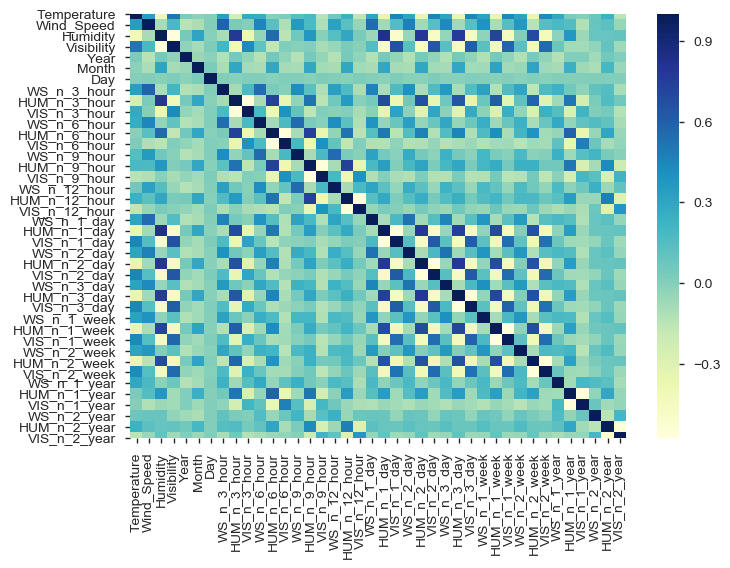

In [150]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu")

In [151]:
corr = supervised_df[WS_columns].corr()

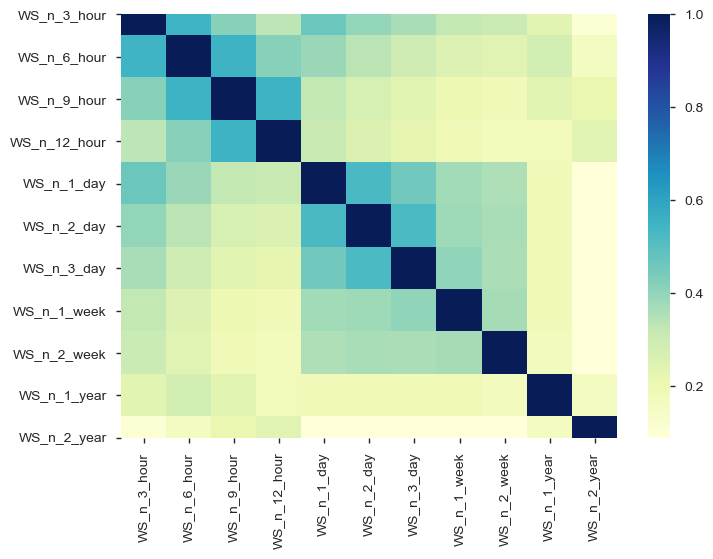

In [152]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu")

In [46]:
WTHR_columns = supervised_df.columns[supervised_df.columns.str.contains('WTHR')]
WS_columns = supervised_df.columns[supervised_df.columns.str.contains('WS')]
VIS_columns = supervised_df.columns[supervised_df.columns.str.contains('VIS')]
HUM_columns = supervised_df.columns[supervised_df.columns.str.contains('HUM')]



In [66]:
supervised_df[WTHR_columns] = supervised_df[WTHR_columns].fillna(
    supervised_df[WTHR_columns].mode(axis=0).iloc[0])

In [67]:
supervised_df[WS_columns] = supervised_df[WS_columns].fillna(
    supervised_df[WS_columns].mean(axis=0))

In [68]:
supervised_df[VIS_columns] = supervised_df[VIS_columns].fillna(
    supervised_df[VIS_columns].mean(axis=0))

In [69]:
supervised_df[HUM_columns] = supervised_df[HUM_columns].fillna(
    supervised_df[HUM_columns].mean(axis=0))

In [70]:
supervised_df.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category', 'WTHR_n_3_hour', 'WS_n_3_hour', 'HUM_n_3_hour',
       'VIS_n_3_hour', 'WTHR_n_6_hour', 'WS_n_6_hour', 'HUM_n_6_hour',
       'VIS_n_6_hour', 'WTHR_n_9_hour', 'WS_n_9_hour', 'HUM_n_9_hour',
       'VIS_n_9_hour', 'WTHR_n_12_hour', 'WS_n_12_hour', 'HUM_n_12_hour',
       'VIS_n_12_hour', 'WTHR_n_1_day', 'WS_n_1_day', 'HUM_n_1_day',
       'VIS_n_1_day', 'WTHR_n_2_day', 'WS_n_2_day', 'HUM_n_2_day',
       'VIS_n_2_day', 'WTHR_n_3_day', 'WS_n_3_day', 'HUM_n_3_day',
       'VIS_n_3_day', 'WTHR_n_1_week', 'WS_n_1_week', 'HUM_n_1_week',
       'VIS_n_1_week', 'WTHR_n_2_week', 'WS_n_2_week', 'HUM_n_2_week',
       'VIS_n_2_week', 'WTHR_n_1_year', 'WS_n_1_year', 'HUM_n_1_year',
       'VIS_n_1_year', 'WTHR_n_2_year', 'WS_n_2_year', 'HUM_n_2_year',
       'VIS_n_2_year'],
      dtype='object')

In [71]:
supervised_df.isna().sum() * 100 / len(supervised_df)

Date               0.00
Clock_Time         0.00
Temperature        0.54
Weather            0.00
Wind_Speed         0.22
Humidity           0.63
Visibility         0.00
Formatted_Date     0.00
Year               0.00
Month              0.00
Day                0.00
Weather_Category   0.00
WTHR_n_3_hour      0.00
WS_n_3_hour        0.00
HUM_n_3_hour       0.00
VIS_n_3_hour       0.00
WTHR_n_6_hour      0.00
WS_n_6_hour        0.00
HUM_n_6_hour       0.00
VIS_n_6_hour       0.00
WTHR_n_9_hour      0.00
WS_n_9_hour        0.00
HUM_n_9_hour       0.00
VIS_n_9_hour       0.00
WTHR_n_12_hour     0.00
WS_n_12_hour       0.00
HUM_n_12_hour      0.00
VIS_n_12_hour      0.00
WTHR_n_1_day       0.00
WS_n_1_day         0.00
HUM_n_1_day        0.00
VIS_n_1_day        0.00
WTHR_n_2_day       0.00
WS_n_2_day         0.00
HUM_n_2_day        0.00
VIS_n_2_day        0.00
WTHR_n_3_day       0.00
WS_n_3_day         0.00
HUM_n_3_day        0.00
VIS_n_3_day        0.00
WTHR_n_1_week      0.00
WS_n_1_week     

In [114]:
supervised_df.to_csv('hourly_supervised_df.csv')

In [ ]:
# [~supervised_df.Year.isin([2018, 2019])]

In [105]:
def X_y(dataset, columns_of_interest, label):
    print(f"Shape of dataset: {dataset.shape}")
    dataset = dataset[pd.notnull(dataset[label])]
    X = dataset[columns_of_interest]
    y = dataset[label]
    print(f"X.shape: {X.shape}, y.shape: {y.shape}")
    return X, y

In [128]:
X, y = X_y(dataset=supervised_df.copy(), 
           columns_of_interest=np.concatenate([WS_columns, VIS_columns, HUM_columns]),
           label='Wind_Speed')

Shape of dataset: (127470, 56)
X.shape: (127188, 33), y.shape: (127188,)


In [178]:
X

WS_n_3_hour  WS_n_6_hour  WS_n_9_hour  WS_n_12_hour  WS_n_1_day  \
0              8.54         8.57         8.59          8.58        8.52   
1              8.54         8.57         8.59          8.58        8.52   
2              8.54         8.57         8.59          8.58        8.52   
3              8.54         8.57         8.59         17.00        8.52   
4             17.00         8.57         8.59          8.58        8.52   
...             ...          ...          ...           ...         ...   
127465        11.00         6.00         9.00         19.00        7.00   
127466        11.00         7.00         9.00          8.58        7.00   
127467        11.00         7.00         6.00         13.00        7.00   
127468        13.00         9.00         7.00         15.00        9.00   
127469        13.00        11.00         6.00         15.00        9.00   

        WS_n_2_day  WS_n_3_day  WS_n_1_week  WS_n_2_week  WS_n_1_year  \
0             8.51        8.51         8.49         8.52         8.54   
1             8.51        8.51         8.49         8.52         8.54   
2             8.51        8.51         8.49         8.52         8.54   
3             8.51        8.51         8.49         8.52         8.54   
4             8.51        8.51         8.49         8.52         8.54   
...            ...         ...          ...          ...          ...   
127465        6.00        6.00         0.00        15.00         0.00   
127466        0.00        0.00         6.00        13.00         0.00   
127467        6.00        6.00         0.00        13.00         0.00   
127468        6.00        6.00         4.00        15.00         0.00   
127469        6.00        6.00         8.49        15.00         0.00   

        WS_n_2_year  VIS_n_3_hour  VIS_n_6_hour  VIS_n_9_hour  VIS_n_12_hour  \
0              8.37          4.17          4.17          4.18           4.17   
1              8.37          4.17          4.17          4.18           4.17   
2              8.37          4.17          4.17          4.18           4.17   
3              8.37          4.17          4.17          4.18           4.00   
4              8.37          6.00          4.17          4.18           4.17   
...             ...           ...           ...           ...            ...   
127465         9.00          4.00          4.00          5.00           5.00   
127466        13.00          4.00          4.00          4.00           4.17   
127467         8.37          4.00          4.00          4.00           5.00   
127468         9.00          4.00          4.00          4.00           5.00   
127469         7.00          4.00          4.00          4.00           5.00   

        VIS_n_1_day  VIS_n_2_day  VIS_n_3_day  VIS_n_1_week  VIS_n_2_week  \
0              4.18         4.17         4.17          4.18          4.17   
1              4.18         4.17         4.17          4.18          4.17   
2              4.18         4.17         4.17          4.18          4.17   
3              4.18         4.17         4.17          4.18          4.17   
4              4.18         4.17         4.17          4.18          4.17   
...             ...          ...          ...           ...           ...   
127465         4.00         3.00         4.00          4.00          4.00   
127466         4.00         3.00         4.00          4.00          4.00   
127467         4.00         3.00         4.00          4.00          4.00   
127468         4.00         3.00         4.00          4.00          4.00   
127469         4.00         3.00         4.00          4.18          4.00   

        VIS_n_1_year  VIS_n_2_year  HUM_n_3_hour  HUM_n_6_hour  HUM_n_9_hour  \
0               4.22          4.25          0.54          0.54          0.54   
1               4.22          4.25          0.54          0.54          0.54   
2               4.22          4.25          0.54          0.54          0.54   
3               4.22    

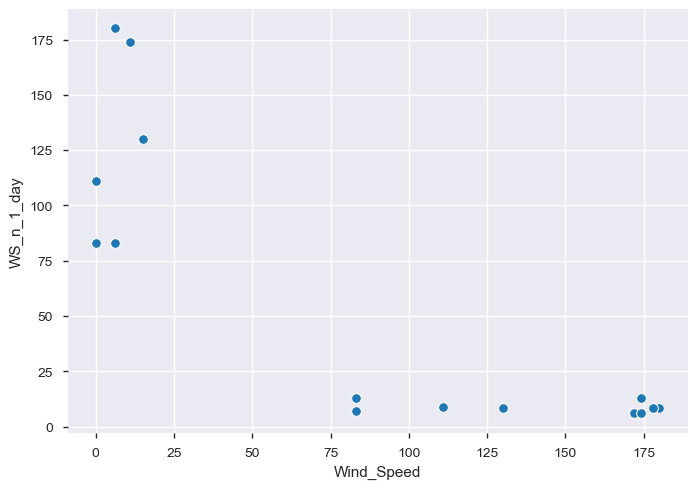

In [199]:
sns.scatterplot(data=supervised_df[(supervised_df.Wind_Speed > 75) | (supervised_df.WS_n_1_day > 75)], 
                x='Wind_Speed', 
                y='WS_n_1_day')

In [153]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [154]:
SCALERS = [
    None,
    StandardScaler(),
    RobustScaler(),
    MinMaxScaler()
]
REGRESSORS = [
    LinearRegression(),
    DecisionTreeRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor()
]
REGRESSORS_NAMES = OrderedDict([('LinearRegression', 'LR'),
                                ('KNeighborsRegressor', 'KNN'),
                                ('DecisionTreeRegressor', 'DTree'),
                                ('AdaBoostRegressor', 'AdaBoost'),
                                ('GradientBoostingRegressor', 'GrBoost'),
                                ('RandomForestRegressor', 'RForest')])

In [156]:
def run_all_models(X, y):
    import warnings; warnings.filterwarnings(action='ignore')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")
    
    cv_scores_df = pd.DataFrame()
    classification_report_dict = OrderedDict()
    
    _ = plt.figure(figsize=(15,8))
    all_pipes = {}
    
    for scaler in SCALERS:
        print("\n\n****************************************************************************************")
        print(f"Current Scaler: {scaler.__class__.__name__}")
        print("****************************************************************************************")
        
        cv_scores_dict, cost_estimations_dict  = OrderedDict(), OrderedDict()
        all_pipes[scaler.__class__.__name__] = {}
        
        for regressor in REGRESSORS:
            print("\n****************************************************************************************")
            print(f"Current Regressor: {regressor.__class__.__name__}")
            pipe = Pipeline(
                steps=[('scaler', scaler),
                       ('regressor', regressor)])
            pipe.fit(X_train, y_train)            
            
            y_predicted = pipe.predict(X_test)
            print(f"Test MSE: {mean_squared_error(y_true=y_test, y_pred=y_predicted):.2f}")
            cross_val_scores = cross_val_score(estimator=pipe, 
                                               X=X_train, 
                                               y=y_train, 
                                               cv=5,
                                               scoring='r2')
            print(f"5 fold cross validation scores {cross_val_scores}")
            print(f"Mean CV R2: {cross_val_scores.mean():.2f}\n")
            all_pipes[scaler.__class__.__name__][regressor.__class__.__name__] = pipe
            cv_scores_dict[regressor.__class__.__name__] = cross_val_scores.mean()
                        
        cv_scores_df = cv_scores_df.append(pd.DataFrame(cv_scores_dict, index = [scaler.__class__.__name__]))
        print("****************************************************************************************")

    return cv_scores_df, all_pipes


In [208]:
%%time
cv_scores_df, pipe = run_all_models(
    X=X[['WS_n_1_day', 'WS_n_2_day', 'WS_n_1_week']], 
    y=y)

X_train.shape: (101750, 3), y_train.shape: (101750,), X_test.shape: (25438, 3), y_test.shape: (25438,)


****************************************************************************************
Current Scaler: NoneType
****************************************************************************************

****************************************************************************************
Current Regressor: LinearRegression
Test MSE: 20.78
5 fold cross validation scores [0.37609482 0.37857254 0.36904636 0.36826865 0.39347874]
Mean CV R2: 0.38


****************************************************************************************
Current Regressor: DecisionTreeRegressor
Test MSE: 20.86
5 fold cross validation scores [0.36567642 0.35564008 0.3492161  0.35087877 0.37582207]
Mean CV R2: 0.36


****************************************************************************************
Current Regressor: AdaBoostRegressor
Test MSE: 22.18
5 fold cross validation scores [0.3066876  0.325

<Figure size 1500x800 with 0 Axes>

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())


In [209]:
cv_scores_df

LinearRegression  DecisionTreeRegressor  AdaBoostRegressor  \
NoneType                    0.38                   0.36               0.32   
StandardScaler              0.38                   0.36               0.33   
RobustScaler                0.38                   0.36               0.33   
MinMaxScaler                0.38                   0.36               0.33   

                GradientBoostingRegressor  RandomForestRegressor  
NoneType                             0.39                   0.37  
StandardScaler                       0.39                   0.37  
RobustScaler                         0.39                   0.37  
MinMaxScaler                         0.39                   0.37

In [202]:
cv_scores_df

LinearRegression  DecisionTreeRegressor  AdaBoostRegressor  \
NoneType                    0.31                   0.32               0.30   
StandardScaler              0.31                   0.32               0.30   
RobustScaler                0.31                   0.32               0.30   
MinMaxScaler                0.31                   0.32               0.30   

                GradientBoostingRegressor  RandomForestRegressor  
NoneType                             0.32                   0.32  
StandardScaler                       0.32                   0.32  
RobustScaler                         0.32                   0.32  
MinMaxScaler                         0.32                   0.32

In [158]:
# with only WS related features
cv_scores_df

LinearRegression  DecisionTreeRegressor  AdaBoostRegressor  \
NoneType                    0.49                  -0.12               0.38   
StandardScaler              0.49                  -0.10               0.38   
RobustScaler                0.49                  -0.11               0.35   
MinMaxScaler                0.49                  -0.11               0.38   

                GradientBoostingRegressor  RandomForestRegressor  
NoneType                             0.51                   0.45  
StandardScaler                       0.51                   0.45  
RobustScaler                         0.51                   0.44  
MinMaxScaler                         0.51                   0.45

In [132]:
#with all features
cv_scores_df

LinearRegression  DecisionTreeRegressor  AdaBoostRegressor  \
NoneType                    0.49                  -0.14               0.37   
StandardScaler              0.49                  -0.10               0.37   
RobustScaler                0.49                  -0.08               0.35   
MinMaxScaler                0.49                  -0.12               0.37   

                GradientBoostingRegressor  RandomForestRegressor  
NoneType                             0.51                   0.45  
StandardScaler                       0.51                   0.45  
RobustScaler                         0.51                   0.45  
MinMaxScaler                         0.51                   0.44

In [210]:
best_pipe = pipe['NoneType']['GradientBoostingRegressor']

In [211]:
test_2019_df = supervised_df[supervised_df.Year.isin([2018, 2019])]
test_2019_df = test_2019_df[pd.notnull(test_2019_df.Wind_Speed)]
X_2019_df = test_2019_df[['WS_n_1_day', 'WS_n_2_day', 'WS_n_1_week']]
y_2019_df = test_2019_df.Wind_Speed

In [212]:
np.rint(best_pipe.predict(X_2019_df))

array([25.,  8., 25., 25.,  8., 25., 25.,  8.,  8., 25.,  8., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 18.,  4.,  3.,  4.,  4., 25., 21.,
       21., 18., 18., 21.,  4., 25., 18., 25., 25., 18., 18., 25., 18.,
        8.,  8., 25., 25.,  8., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,  8., 25.,
        8., 18., 18., 25., 25.,  8., 25., 25., 25.,  8.,  8.,  3., 21.,
       21., 25., 25., 25., 25., 25., 25., 25.,  4.,  4., 25.,  4., 21.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 18., 21., 18., 21., 21., 25., 21.,  4.,
       25., 25., 25.,  4.,  4.,  4., 21., 21., 21., 25., 25., 21., 21.,
       21., 21., 21., 21., 25., 21., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 21., 21., 21.,  3.,  3.,  3.,  3., 21.,  8.,  3., 21

In [213]:
y_2019_df.values

array([  6.,   4.,   6.,   6.,   9.,   7.,   7.,   6.,   6.,   6.,   4.,
         0.,   0.,   4.,   4.,   0.,   6.,   6.,   7.,  13.,   7.,   9.,
         6.,   6.,  11.,   7.,   6.,   9.,   9.,   6.,   7.,   0.,   7.,
         0.,   6.,   6.,   6.,   0.,   6.,   7.,   6.,   0.,   0.,   0.,
         7.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   7.,
         7.,   7.,   7.,   7.,   9.,  11.,  15.,  15.,  15.,  15.,  15.,
        15.,  17.,  13.,  13.,  15.,  15.,  13.,  11.,   9.,   7.,   7.,
         4.,   6.,   7.,   6.,   6.,   9.,  11.,   9.,   9.,  11.,   9.,
         9.,   9.,  11.,   9.,   9.,   6.,   9.,   7.,   7.,   9.,  11.,
        11.,   9.,   9.,   9.,   9.,   9.,  11.,  17.,  13.,  15.,  11.,
         9.,  11.,  13.,   9.,  13.,  11.,  13.,   9.,   9.,   9.,   9.,
         9.,   6.,   9.,   6.,   6.,   6.,   0.,   0.,   0.,   0.,   6.,
         0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,   6.,
         6.,   6.,   6.,   0.,   6.,   6.,   0.,   

In [ ]:
sns.lineplot(range(y_2019_df.shape[0]), y_2019_df.astype('int'))

In [214]:
r2_score(
    y_true=y_2019_df.values,
    y_pred=np.rint(best_pipe.predict(X_2019_df)))

-5.655551275792112

In [218]:
supervised_df.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category', 'WTHR_n_3_hour', 'WS_n_3_hour', 'HUM_n_3_hour',
       'VIS_n_3_hour', 'WTHR_n_6_hour', 'WS_n_6_hour', 'HUM_n_6_hour',
       'VIS_n_6_hour', 'WTHR_n_9_hour', 'WS_n_9_hour', 'HUM_n_9_hour',
       'VIS_n_9_hour', 'WTHR_n_12_hour', 'WS_n_12_hour', 'HUM_n_12_hour',
       'VIS_n_12_hour', 'WTHR_n_1_day', 'WS_n_1_day', 'HUM_n_1_day',
       'VIS_n_1_day', 'WTHR_n_2_day', 'WS_n_2_day', 'HUM_n_2_day',
       'VIS_n_2_day', 'WTHR_n_3_day', 'WS_n_3_day', 'HUM_n_3_day',
       'VIS_n_3_day', 'WTHR_n_1_week', 'WS_n_1_week', 'HUM_n_1_week',
       'VIS_n_1_week', 'WTHR_n_2_week', 'WS_n_2_week', 'HUM_n_2_week',
       'VIS_n_2_week', 'WTHR_n_1_year', 'WS_n_1_year', 'HUM_n_1_year',
       'VIS_n_1_year', 'WTHR_n_2_year', 'WS_n_2_year', 'HUM_n_2_year',
       'VIS_n_2_year'],
      dtype='object')

In [268]:
supervised_df.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category', 'WTHR_n_3_hour', 'WS_n_3_hour', 'HUM_n_3_hour',
       'VIS_n_3_hour', 'WTHR_n_6_hour', 'WS_n_6_hour', 'HUM_n_6_hour',
       'VIS_n_6_hour', 'WTHR_n_9_hour', 'WS_n_9_hour', 'HUM_n_9_hour',
       'VIS_n_9_hour', 'WTHR_n_12_hour', 'WS_n_12_hour', 'HUM_n_12_hour',
       'VIS_n_12_hour', 'WTHR_n_1_day', 'WS_n_1_day', 'HUM_n_1_day',
       'VIS_n_1_day', 'WTHR_n_2_day', 'WS_n_2_day', 'HUM_n_2_day',
       'VIS_n_2_day', 'WTHR_n_3_day', 'WS_n_3_day', 'HUM_n_3_day',
       'VIS_n_3_day', 'WTHR_n_1_week', 'WS_n_1_week', 'HUM_n_1_week',
       'VIS_n_1_week', 'WTHR_n_2_week', 'WS_n_2_week', 'HUM_n_2_week',
       'VIS_n_2_week', 'WTHR_n_1_year', 'WS_n_1_year', 'HUM_n_1_year',
       'VIS_n_1_year', 'WTHR_n_2_year', 'WS_n_2_year', 'HUM_n_2_year',
       'VIS_n_2_year'],
      dtype='object')

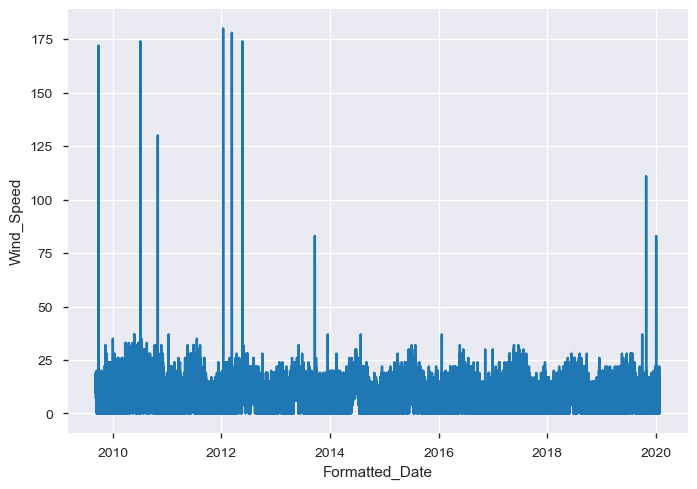

In [220]:
sns.lineplot(data=supervised_df[supervised_df.Wind_Speed < 20],
             x='Formatted_Date', 
             y='Wind_Speed')

In [231]:
count = np.arange(len(supervised_df.Wind_Speed))
np.corrcoef(count, supervised_df.Wind_Speed)

array([[ 1., nan],
       [nan, nan]])

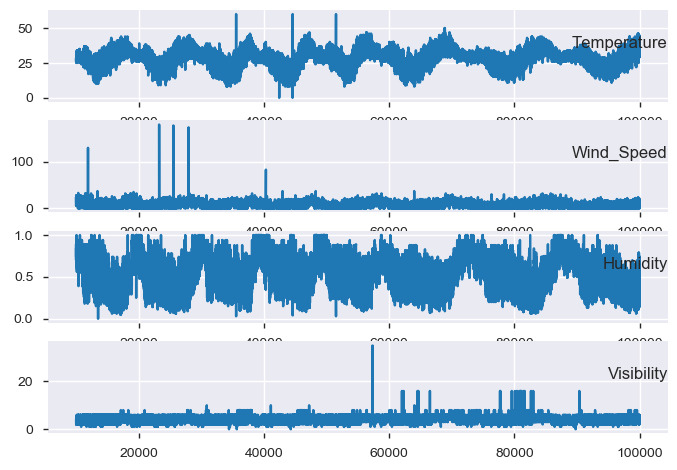

In [256]:

groups = ['Temperature', 'Wind_Speed', 'Humidity', 'Visibility']
i = 1

plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(supervised_df.iloc[10000:100000][group])
    plt.title(group, y=0.5, loc='right')
    i += 1
plt.show()

In [254]:
supervised_df.shape

(127470, 56)

In [224]:
from pandas.plotting import lag_plot, autocorrelation_plot

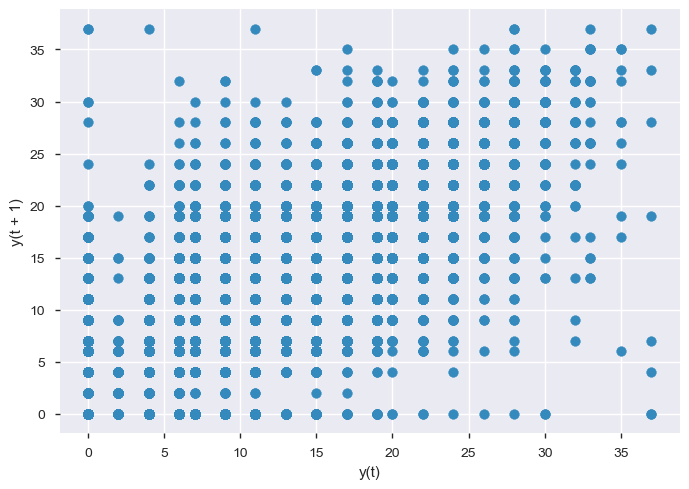

In [223]:
lag_plot(supervised_df[supervised_df.Wind_Speed < 75].Wind_Speed)

(0, 50000)

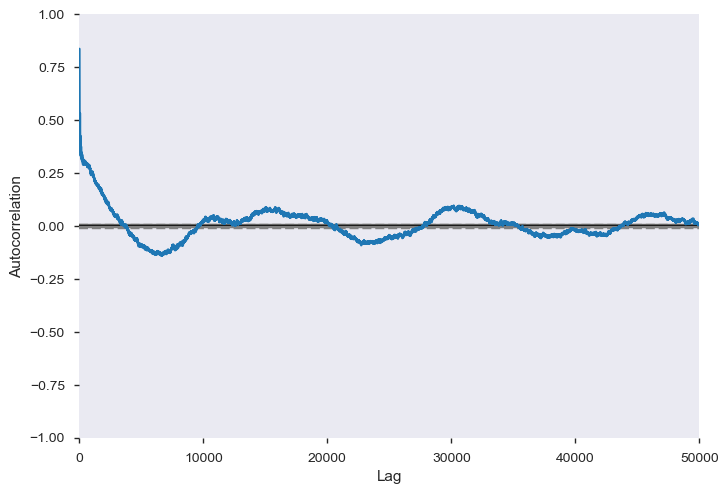

In [234]:
ax = autocorrelation_plot(supervised_df[supervised_df.Wind_Speed < 75].Wind_Speed)
ax.set_xlim([0, 50000])

Lag: 72
Coefficients: const             0.33
L1.Wind_Speed     0.52
L2.Wind_Speed     0.16
L3.Wind_Speed     0.07
L4.Wind_Speed     0.02
L5.Wind_Speed     0.01
L6.Wind_Speed     0.01
L7.Wind_Speed    -0.00
L8.Wind_Speed    -0.00
L9.Wind_Speed    -0.00
L10.Wind_Speed    0.00
L11.Wind_Speed   -0.01
L12.Wind_Speed    0.00
L13.Wind_Speed   -0.01
L14.Wind_Speed    0.00
L15.Wind_Speed    0.01
L16.Wind_Speed    0.01
L17.Wind_Speed   -0.00
L18.Wind_Speed    0.01
L19.Wind_Speed    0.00
L20.Wind_Speed    0.01
L21.Wind_Speed    0.01
L22.Wind_Speed    0.00
L23.Wind_Speed    0.00
L24.Wind_Speed   -0.01
L25.Wind_Speed    0.00
L26.Wind_Speed   -0.00
L27.Wind_Speed   -0.00
L28.Wind_Speed    0.00
L29.Wind_Speed    0.01
L30.Wind_Speed    0.00
L31.Wind_Speed    0.01
L32.Wind_Speed    0.01
L33.Wind_Speed    0.01
L34.Wind_Speed    0.01
L35.Wind_Speed    0.01
L36.Wind_Speed    0.01
L37.Wind_Speed    0.01
L38.Wind_Speed    0.02
L39.Wind_Speed    0.01
L40.Wind_Speed    0.01
L41.Wind_Speed    0.01
L42.Wind_Spe

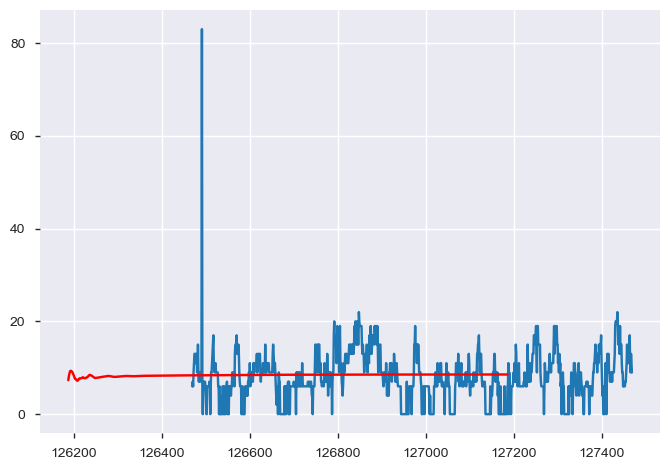

In [244]:
from statsmodels.tsa.ar_model import AR

X = supervised_df.Wind_Speed.dropna()
train, test = X[1:len(X)-1000], X[len(X)-1000:]

# train autoregression
model = AR(train)
model_fit = model.fit()

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start = len(train), 
                                end = len(train) + len(test) - 1, 
                                dynamic = False)
for i in range(len(predictions)):
    # print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]))

    error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [267]:
dataset_hourly.to_csv('dataset_formatted.csv')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(x=supervised_df.set_index('Datetime').Wind_Speed, 
                            model='additive', freq=20)
result.plot()

In [ ]:
supervised_df['Wind_Speed'] = supervised_df['Wind_Speed'].astype('int64')

In [ ]:
supervised_df.set_index('Datetime').asfreq('d').index